## Molecule descriptors for Anti-malarial studies

#### Materials: Scikit Learn, Pyclustering, Scipy, Matplotlib, Pandas and Numpy libraries

#### Methods: 

Molecule descriptor dataset was analyzed using Principal Component Analysis (PCA) and T-Distributed Stochastic Neighbour Embedding (t-SNE) based techniques. Different clustering algorithms (KMeans, DBSCAN, KMedoids clustering - PAM (Partitioning Around Medoids), Clarans, and Agglomerative Hierarchical clustering with Gower) were implemented to provide visualizations. Furthemore, PCA and t-SNE were compared to examine the effects of dimension reduction on the quality of clusters obtained from KMeans.

#### Description of the dataset
The dataset has 11481 molecules with known anti-malarial properties. It also has 340 different atributes/features.

##### Importing of relevant libraries

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import manhattan_distance,euclidean_distance_square
import gower
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [98]:
# Loading the dataset

molecule = pd.read_csv("Dataset for Clustering Project.csv")

#### Inspection, cleaning and processing of the dataset

Molecule descriptor dataset has 349 rows with missing values. The rows with missing values were dropped, thereby reducing the dataset to 11132 molecules (rows) and 340 features (columns). There were no duplicate values in the dataset.

In [99]:
molecule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Columns: 341 entries, ID to zagreb
dtypes: float64(340), int64(1)
memory usage: 29.9 MB


In [79]:
# Checking for duplicate values

molecule.duplicated().sum()

0

In [100]:
molecule.head()

ID  AM1_dipole       AM1_E   AM1_Eele     AM1_HF  AM1_HOMO   AM1_IP  \
0   1    1.319920  -69493.070 -455029.72  85.696503  -8.01281  8.01281   
1   2    3.326244 -118221.550 -873203.50 -48.735088  -8.71407  8.71407   
2   3    3.418354 -118221.350 -873296.81 -48.540100  -8.70629  8.70629   
3   4    2.090005 -103461.740 -796599.50  13.063520  -8.65922  8.65922   
4   5    5.202969  -76984.094 -451933.41 -84.414909  -9.27016  9.27016   

   AM1_LUMO       apol        ASA  ...  vsurf_Wp3  vsurf_Wp4  vsurf_Wp5  \
0  -0.41004  41.208309  462.93146  ...     89.250     16.125      6.875   
1   0.08265  60.571033  719.67706  ...    222.375     59.375     22.000   
2   0.05556  60.571033  711.94922  ...    228.375     59.750     23.375   
3   0.04051  58.967033  667.70203  ...    197.250     53.500     18.625   
4  -0.98585  36.275928  451.24734  ...     52.125      6.125      2.125   

   vsurf_Wp6  vsurf_Wp7  vsurf_Wp8     Weight  weinerPath  weinerPol  zagreb  
0       2.00      0.000        0.0  268.74698       866.0       32.0   104.0  
1       5.75      0.125        0.0  396.44699      2692.0       45.0   146.0  
2       6.75      0.500        0.0  396.44699      2692.0       45.0   146.0  
3       5.00      0.250        0.0  364.44901      2052.0       41.0   136.0  
4       0.25      0.000        0.0  254.24100       670.0       31.0   102.0  

[5 rows x 341 columns]

In [101]:
molecule.shape

(11481, 341)

In [102]:
molecule.isnull().sum()

ID              0
AM1_dipole      2
AM1_E         164
AM1_Eele      164
AM1_HF        164
             ... 
vsurf_Wp8       2
Weight          2
weinerPath      2
weinerPol       2
zagreb          2
Length: 341, dtype: int64

In [103]:
molecule = molecule.dropna()

molecule.isnull().sum()

ID            0
AM1_dipole    0
AM1_E         0
AM1_Eele      0
AM1_HF        0
             ..
vsurf_Wp8     0
Weight        0
weinerPath    0
weinerPol     0
zagreb        0
Length: 341, dtype: int64

In [104]:
molecule.shape

(11132, 341)

In [105]:
molecule.describe().T

count           mean            std           min  \
ID          11132.0    5736.079860    3318.254042  1.000000e+00   
AM1_dipole  11132.0       4.250251       2.434699  1.000000e-03   
AM1_E       11132.0 -106905.805131   30286.545243 -2.670421e+05   
AM1_Eele    11132.0 -790302.577994  345324.379012 -3.013898e+06   
AM1_HF      11132.0      22.531817     200.537476 -5.831885e+02   
...             ...            ...            ...           ...   
vsurf_Wp8   11132.0       0.104024       0.535674  0.000000e+00   
Weight      11132.0     379.276937      99.165031  8.904999e+01   
weinerPath  11132.0    2460.828872    2809.984191  2.900000e+01   
weinerPol   11132.0      41.137442      13.228718  4.000000e+00   
zagreb      11132.0     138.622709      38.710900  2.200000e+01   

                      25%            50%            75%            max  
ID            2853.750000    5726.500000    8605.250000   11495.000000  
AM1_dipole       2.654771       3.943258       5.324716      34.555798  
AM1_E      -122373.580000 -102779.090000  -85951.406500  -30241.963000  
AM1_Eele   -937494.082500 -712764.595000 -553723.560000 -102220.360000  
AM1_HF         -62.243113       1.125485      64.618948    1601.576400  
...                   ...            ...            ...            ...  
vsurf_Wp8        0.000000       0.000000       0.000000       5.125000  
Weight         309.412990     362.428990     436.575990     877.552000  
weinerPath    1057.000000    1677.500000    2852.000000   35333.000000  
weinerPol       32.000000      39.000000      49.000000     107.000000  
zagreb         112.000000     132.000000     160.000000     304.000000  

[341 rows x 8 columns]

In [106]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(molecule['ID'])
true_labels[:]

array([    0,     1,     2, ..., 11129, 11130, 11131], dtype=int64)

In [107]:
label_encoder.classes_

array([    1,     2,     3, ..., 11493, 11494, 11495], dtype=int64)

In [108]:
# Drop the 'ID column' since its not needed for our clustering

molecule.drop(['ID'], axis=1, inplace=True)

In [109]:
molecule.shape

(11132, 340)

#### Exploratory data analysis

This is done to examine relationship between variables.

Text(0, 0.5, 'Weight')

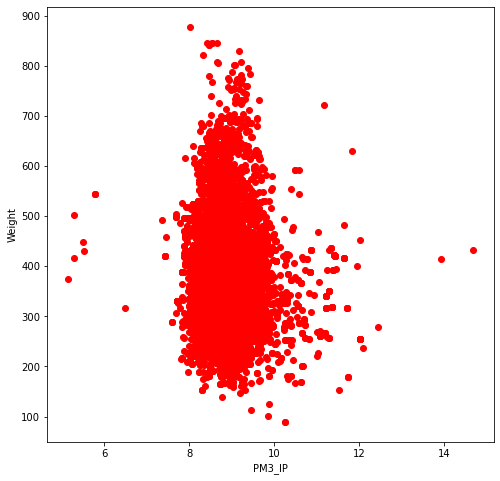

In [110]:
plt.figure(figsize=(8, 8))

plt.scatter(molecule['PM3_IP'], molecule['Weight'], color='r')

plt.xlabel('PM3_IP')
plt.ylabel('Weight')

In [111]:
# Putting molecule into an array, and storing it in X

X = molecule.values[:]

X[:]

array([[ 1.3199201e+00, -6.9493070e+04, -4.5502972e+05, ...,
         8.6600000e+02,  3.2000000e+01,  1.0400000e+02],
       [ 3.3262436e+00, -1.1822155e+05, -8.7320350e+05, ...,
         2.6920000e+03,  4.5000000e+01,  1.4600000e+02],
       [ 3.4183543e+00, -1.1822135e+05, -8.7329681e+05, ...,
         2.6920000e+03,  4.5000000e+01,  1.4600000e+02],
       ...,
       [ 4.7929411e+00, -7.5167805e+04, -4.5994219e+05, ...,
         7.6400000e+02,  2.6000000e+01,  9.2000000e+01],
       [ 4.7317615e+00, -6.7752320e+04, -4.1878528e+05, ...,
         6.2500000e+02,  2.4000000e+01,  1.0200000e+02],
       [ 1.6933370e+00, -8.8069172e+04, -6.3411769e+05, ...,
         1.0620000e+03,  3.5000000e+01,  1.2000000e+02]])

#### Standardization of the dataset

All features must be on the same scale because KMeans is very sensitive to scale. The final cluster shape will be more influenced by features with larger variations since KMeans will give them more weight or focus. 
Molecule descriptor dataset was normalized using standard scaler. This brought all the features to the same scale, a mean of 0, and standard deviation of 1.

In [112]:
# Standardization/Normalization using standard scaler

scaler = StandardScaler()
stdmolecule = scaler.fit_transform(X)

df_stdmolecule = pd.DataFrame(stdmolecule, columns=molecule.columns)
df_stdmolecule.head()

df_stdmolecule.head()

AM1_dipole     AM1_E  AM1_Eele    AM1_HF  AM1_HOMO    AM1_IP  AM1_LUMO  \
0   -1.203624  1.235348  0.970936  0.314991  1.603428 -1.509670  0.447039   
1   -0.379533 -0.373640 -0.240078 -0.355395  0.179508 -0.190973  0.938104   
2   -0.341699 -0.373633 -0.240348 -0.354423  0.195305 -0.205604  0.911103   
3   -0.887314  0.113721 -0.018236 -0.047217  0.290883 -0.294118  0.896103   
4    0.391326  0.987998  0.979903 -0.533324 -0.949641  0.854734 -0.126870   

       apol       ASA      ASA+  ...  vsurf_Wp3  vsurf_Wp4  vsurf_Wp5  \
0 -0.926607 -1.243242  0.020932  ...  -0.076978  -0.215898  -0.165322   
1  0.256934  0.529747  2.851429  ...   2.439751   2.034294   1.651234   
2  0.256934  0.476382  2.788222  ...   2.553182   2.053804   1.816375   
3  0.158890  0.170827  2.363413  ...   1.964763   1.728632   1.245887   
4 -1.228098 -1.323928 -0.033141  ...  -0.778826  -0.736173  -0.735811   

   vsurf_Wp6  vsurf_Wp7  vsurf_Wp8    Weight  weinerPath  weinerPol    zagreb  
0  -0.245244  -0.372104  -0.194202 -1.114656   -0.567583  -0.690759 -0.894432  
1   0.915068  -0.269026  -0.194202  0.173154    0.082271   0.291996  0.190583  
2   1.224485   0.040205  -0.194202  0.173154    0.082271   0.291996  0.190583  
3   0.683005  -0.165949  -0.194202 -0.149534   -0.145498  -0.010390 -0.067754  
4  -0.786723  -0.372104  -0.194202 -1.260944   -0.637338  -0.766355 -0.946099  

[5 rows x 340 columns]

##### Determining the number of clusters on the original dataset

The Elbow method was utilized to determine the optimal number of clusters KMeans should obtain. From the plot, 5 or 6 clusters will be best, but for clarity purposes, 6 was utilized.

Applying KMeans on the original dataset requesting 6 clusters achieved a Silhouette score of 0.11, which is on the low side

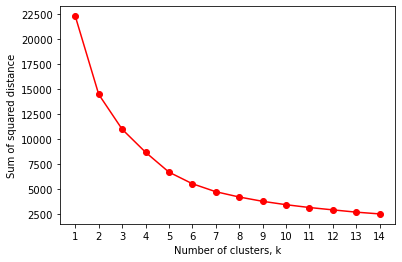

In [113]:
list_k = range(1, 15)
sse = []
for k in list_k:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(
    init ='k-means++',
    n_clusters = k,
    n_init = 100,
    max_iter = 400,
    random_state =42
)
    # Fit model to samples
    kmeans.fit(df_stdmolecule.iloc[:,:2])
    
    # Append the sse (inertia) to the list of inertias
    sse.append(kmeans.inertia_)
    
plt.plot(list_k, sse, '-o', color='red')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distance')
plt.xticks(list_k)
plt.show()

#### Figure: Optimal Number of Clusters using Elbow Method(Scaled data)

In [114]:
# Silhouette coefficient is a measure of cluster cohesion and separation

silhouette_coefficient = []
for k in range(2,15):
        kmeans = KMeans(n_clusters=6)
        kmeans.fit(df_stdmolecule)
        score = silhouette_score(df_stdmolecule, kmeans.labels_)
        silhouette_coefficient.append(score)
score

0.08167399399245734

#### Reduce dimensionality

It was done to capture the optimal number of components that explains the greatest amount of variance on the dataset. 

The first two components account for the majority of the variance in our data, as shown by Fig. As a result of this, the first two components were plotted to visualize any distinct clusters.

In [115]:
# Create a PCA instance: pca

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_stdmolecule)

[0.27467327 0.12326751 0.06143021 0.04091279 0.03935779 0.0362638
 0.02788777 0.02496629 0.0216954  0.01981139 0.01701503 0.01579177
 0.0147038  0.0142042  0.01159448 0.0110439  0.00978909 0.00913692
 0.00788853 0.00742036]


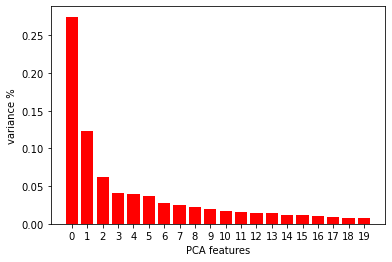

In [116]:
# Plot the explained variances

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

print(pca.explained_variance_ratio_)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Figure: Scree plot showing variance drop-off after the second component

Text(0, 0.5, 'PCA 2')

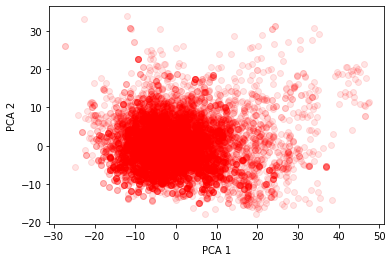

In [117]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Figure: Scatter plot of the first two components of the PCA model.

Figure depicts at least two distinct clusters. However, not all of the significant principal components are displayed. k-means clustering will be used to show the remaining portions of the reduced dataset.

#### Applying KMeans to PCA Principal Components

The top two PCA components will be shown in this stage using k-means clustering. To do this, the optimal number of clusters will be determined by fitting the principal components to the k-means algorithm. The sum of the squared distances (inertia) to the nearest cluster center can be used to get the ideal number of clusters for k-means model.

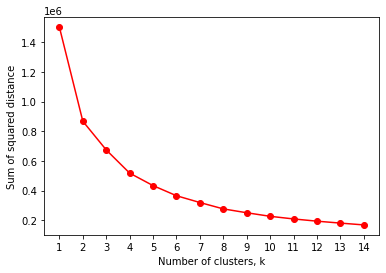

In [118]:
list_k = range(1, 15)
sse = []
for k in list_k:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(
    init ='k-means++',
    n_clusters = k,
    n_init = 100,
    max_iter = 400,
    random_state =42
)
    # Fit model to samples
    kmeans.fit(PCA_components.iloc[:,:2])
    
    # Append the sse (inertia) to the list of inertias
    sse.append(kmeans.inertia_)
    
plt.plot(list_k, sse, '-o', color='red')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distance')
plt.xticks(list_k)
plt.show()


Figure: Scree plot showing a slow decrease of inertia after k = 6 (PCA data)

Figure depicts that the change in the inertia value is no longer significant after 6 clusters (at the elbow), and most likely, neither is the variance of the remaining data after the elbow point. As a result, we can skip everything that comes after k=6 and move on to the final stage of the procedure.

#### Visualize and Interpret the Clusters

In [119]:
pca = PCA(n_components = 2)

In [120]:
pca.fit(df_stdmolecule)

PCA(n_components=2)

In [121]:
pca.transform(df_stdmolecule)

array([[-10.75949414,  -6.69610874],
       [  3.95267757,   2.52375446],
       [  3.97661872,   2.91169218],
       ...,
       [ -9.64500113,   0.82094534],
       [-11.14301481,   1.42384123],
       [ -5.47420412,   0.37615669]])

In [122]:
scores_pca = pca.transform(df_stdmolecule)

In [123]:
wcss = []
for k in range(0,10):
    kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', n_init = 100, max_iter = 400, random_state=42)

kmeans_pca.fit(scores_pca)
wcss.append(kmeans_pca.inertia_)

In [124]:
kmeans_pca.fit(scores_pca)

KMeans(max_iter=400, n_clusters=6, n_init=100, random_state=42)

In [125]:
pred = kmeans_pca.predict(scores_pca)

In [126]:
pca_centroid = kmeans_pca.cluster_centers_

In [127]:
molecule_pca_kmeans = pd.concat([molecule.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
molecule_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
molecule_pca_kmeans['Molecule k-means PCA'] = kmeans_pca.labels_

In [128]:
molecule_pca_kmeans['Cluster'] = molecule_pca_kmeans['Molecule k-means PCA'].map({0:'cluster 1',
                                                                                1:'cluster 2',
                                                                                2:'cluster 3',
                                                                                3:'cluster 4',
                                                                                4:'cluster 5',
                                                                                5:'cluster 6'})

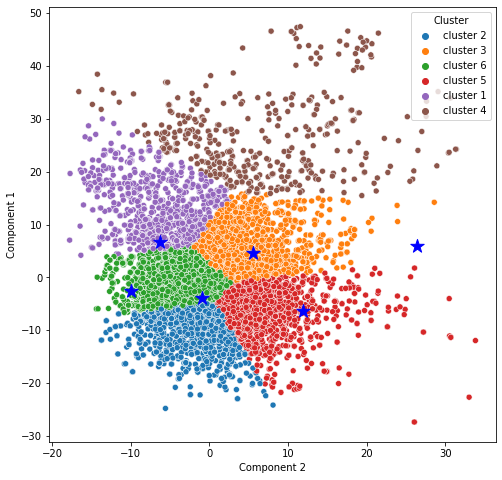

In [129]:
x_axis = molecule_pca_kmeans['Component 2']
y_axis = molecule_pca_kmeans['Component 1']
plt.figure(figsize =(8,8))
sns.scatterplot(x_axis, y_axis, hue = molecule_pca_kmeans['Cluster'])

plt.scatter(pca_centroid[:, 0], pca_centroid[:, 1], marker='*', s=200, c='b', label='centroid')

plt.show()

Figure: Molecule descriptor clusters by PCA components with KMeans

In [130]:
#Higher silhouette score relates to a model with better defined clusters.
#Scores around 0 indicate overlapping clusters

metrics.silhouette_score(scores_pca, pred, metric ='euclidean')

0.32213688440435617

Applying KMeans on the PCA principal components increased the Silhouette score from 0.11 to 0.32.

In [131]:
#Higher scores indicate better defined clusters

metrics.calinski_harabasz_score(scores_pca, pred)

6936.362596756402

In [132]:
#Zero is the lowest possible score
#Values close to 0 indicate a better partition

davies_bouldin_score(scores_pca, pred)

0.8834339724458481

In [133]:
# Determing the number of molecules in each cluster

molecule_pca_kmeans['cluster'] = pred
molecule_pca_kmeans['cluster'].value_counts()

5    3034
1    2245
4    2080
2    2031
0    1295
3     447
Name: cluster, dtype: int64

In [134]:
molecule_pca_kmeans_index = molecule_pca_kmeans

molecule_index = molecule.index[:]

molecule_pca_kmeans_index = molecule_pca_kmeans.index[:]

In [135]:
molecule_pca_kmeans_map = pd.DataFrame()
molecule_pca_kmeans_map['molecule_pca_kmeans_index'] = molecule_pca_kmeans.index.values
molecule_pca_kmeans_map['cluster'] = kmeans.labels_

In [136]:
pd.set_option('display.max_rows',3034)

molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 0]

molecule_pca_kmeans_index  cluster
1                              1        0
2                              2        0
3                              3        0
6                              6        0
7                              7        0
10                            10        0
35                            35        0
64                            64        0
66                            66        0
70                            70        0
83                            83        0
95                            95        0
96                            96        0
97                            97        0
98                            98        0
112                          112        0
114                          114        0
116                          116        0
139                          139        0
145                          145        0
161                          161        0
173                          173        0
179                          179        0
214                          214        0
228                          228        0
230                          230        0
231                          231        0
232                          232        0
233                          233        0
235                          235        0
243                          243        0
275                          275        0
287                          287        0
288                          288        0
296                          296        0
297                          297        0
315                          315        0
324                          324        0
346                          346        0
347                          347        0
379                          379        0
380                          380        0
391                          391        0
392                          392        0
395                          395        0
397                          397        0
399                          399        0
402                          402        0
405                          405        0
408                          408        0
411                          411        0
413                          413        0
415                          415        0
417                          417        0
422                          422        0
425                          425        0
429                          429        0
431                          431        0
433                          433        0
436                          436        0
437                          437        0
438                          438        0
442                          442        0
443                          443        0
451                          451        0
452                          452        0
464                          464        0
469                          469        0
482                          482        0
492                          492        0
493                          493        0
497                          497        0
539                          539        0
540                          540        0
542                          542        0
547                          547        0
549                          549        0
550                          550        0
552                          552        0
556                          556        0
585                          585        0
616                          616        0
636                          636        0
668                          668        0
669                          669        0
673                          673        0
677                          677        0
678                          678        0
679                          679        0
685                          685        0
692                          692        0
719                          719        0
734                          734        0
739                          739        0
749              

In [137]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 1]

molecule_pca_kmeans_index  cluster
0                              0        1
17                            17        1
26                            26        1
36                            36        1
39                            39        1
71                            71        1
90                            90        1
110                          110        1
120                          120        1
128                          128        1
142                          142        1
147                          147        1
174                          174        1
176                          176        1
183                          183        1
185                          185        1
193                          193        1
195                          195        1
209                          209        1
216                          216        1
248                          248        1
260                          260        1
299                          299        1
309                          309        1
330                          330        1
339                          339        1
416                          416        1
455                          455        1
457                          457        1
479                          479        1
515                          515        1
518                          518        1
533                          533        1
564                          564        1
569                          569        1
570                          570        1
579                          579        1
587                          587        1
589                          589        1
649                          649        1
660                          660        1
667                          667        1
674                          674        1
722                          722        1
727                          727        1
740                          740        1
744                          744        1
764                          764        1
884                          884        1
895                          895        1
897                          897        1
901                          901        1
902                          902        1
911                          911        1
971                          971        1
993                          993        1
1041                        1041        1
1046                        1046        1
1054                        1054        1
1085                        1085        1
1088                        1088        1
1097                        1097        1
1108                        1108        1
1127                        1127        1
1139                        1139        1
1140                        1140        1
1161                        1161        1
1186                        1186        1
1189                        1189        1
1203                        1203        1
1226                        1226        1
1243                        1243        1
1260                        1260        1
1269                        1269        1
1289                        1289        1
1296                        1296        1
1302                        1302        1
1306                        1306        1
1308                        1308        1
1325                        1325        1
1329                        1329        1
1334                        1334        1
1339                        1339        1
1340                        1340        1
1344                        1344        1
1355                        1355        1
1358                        1358        1
1366                        1366        1
1394                        1394        1
1435                        1435        1
1446                        1446        1
1450                        1450        1
1457                        1457        1
1491                        1491        1
1498             

In [138]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 2]

molecule_pca_kmeans_index  cluster
15                            15        2
16                            16        2
119                          119        2
130                          130        2
201                          201        2
384                          384        2
461                          461        2
478                          478        2
538                          538        2
594                          594        2
598                          598        2
599                          599        2
625                          625        2
637                          637        2
639                          639        2
643                          643        2
646                          646        2
699                          699        2
700                          700        2
715                          715        2
718                          718        2
941                          941        2
943                          943        2
1374                        1374        2
1449                        1449        2
1522                        1522        2
1526                        1526        2
1539                        1539        2
1545                        1545        2
1957                        1957        2
1959                        1959        2
2016                        2016        2
2045                        2045        2
2151                        2151        2
2198                        2198        2
2201                        2201        2
2282                        2282        2
2360                        2360        2
2365                        2365        2
2599                        2599        2
2894                        2894        2
2895                        2895        2
2901                        2901        2
2921                        2921        2
3104                        3104        2
3105                        3105        2
3106                        3106        2
3107                        3107        2
3109                        3109        2
3117                        3117        2
3129                        3129        2
3334                        3334        2
3359                        3359        2
3444                        3444        2
3451                        3451        2
3453                        3453        2
3615                        3615        2
3705                        3705        2
3707                        3707        2
3711                        3711        2
3723                        3723        2
3795                        3795        2
3877                        3877        2
4007                        4007        2
4157                        4157        2
4195                        4195        2
4196                        4196        2
4197                        4197        2
4198                        4198        2
4199                        4199        2
4321                        4321        2
4384                        4384        2
4385                        4385        2
4500                        4500        2
4545                        4545        2
4777                        4777        2
4786                        4786        2
4790                        4790        2
4791                        4791        2
4849                        4849        2
4911                        4911        2
4963                        4963        2
5447                        5447        2
5639                        5639        2
5719                        5719        2
5720                        5720        2
5855                        5855        2
5879                        5879        2
5922                        5922        2
5952                        5952        2
6139                        6139        2
6140                        6140        2
6142                        6142        2
6143                        6143        2
6144             

In [140]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 3]

molecule_pca_kmeans_index  cluster
4                              4        3
5                              5        3
45                            45        3
62                            62        3
80                            80        3
81                            81        3
85                            85        3
91                            91        3
131                          131        3
137                          137        3
196                          196        3
227                          227        3
229                          229        3
242                          242        3
262                          262        3
313                          313        3
334                          334        3
360                          360        3
366                          366        3
367                          367        3
368                          368        3
375                          375        3
412                          412        3
427                          427        3
480                          480        3
487                          487        3
490                          490        3
498                          498        3
499                          499        3
500                          500        3
554                          554        3
580                          580        3
592                          592        3
605                          605        3
612                          612        3
613                          613        3
614                          614        3
642                          642        3
648                          648        3
675                          675        3
702                          702        3
704                          704        3
728                          728        3
750                          750        3
755                          755        3
758                          758        3
766                          766        3
778                          778        3
779                          779        3
780                          780        3
781                          781        3
782                          782        3
783                          783        3
784                          784        3
785                          785        3
787                          787        3
788                          788        3
801                          801        3
814                          814        3
819                          819        3
826                          826        3
828                          828        3
833                          833        3
867                          867        3
918                          918        3
935                          935        3
949                          949        3
954                          954        3
978                          978        3
1016                        1016        3
1050                        1050        3
1058                        1058        3
1071                        1071        3
1075                        1075        3
1079                        1079        3
1080                        1080        3
1083                        1083        3
1107                        1107        3
1109                        1109        3
1112                        1112        3
1113                        1113        3
1123                        1123        3
1124                        1124        3
1142                        1142        3
1149                        1149        3
1166                        1166        3
1179                        1179        3
1184                        1184        3
1188                        1188        3
1207                        1207        3
1210                        1210        3
1222                        1222        3
1229                        1229        3
1233                        1233        3
1234             

In [141]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 4]

molecule_pca_kmeans_index  cluster
44                            44        4
51                            51        4
63                            63        4
75                            75        4
89                            89        4
102                          102        4
117                          117        4
122                          122        4
123                          123        4
127                          127        4
134                          134        4
135                          135        4
153                          153        4
155                          155        4
158                          158        4
162                          162        4
164                          164        4
166                          166        4
171                          171        4
178                          178        4
181                          181        4
194                          194        4
200                          200        4
206                          206        4
226                          226        4
241                          241        4
250                          250        4
253                          253        4
269                          269        4
271                          271        4
277                          277        4
286                          286        4
292                          292        4
301                          301        4
302                          302        4
310                          310        4
320                          320        4
350                          350        4
383                          383        4
387                          387        4
389                          389        4
465                          465        4
473                          473        4
505                          505        4
516                          516        4
519                          519        4
521                          521        4
522                          522        4
537                          537        4
611                          611        4
617                          617        4
618                          618        4
626                          626        4
638                          638        4
647                          647        4
664                          664        4
666                          666        4
681                          681        4
682                          682        4
688                          688        4
689                          689        4
694                          694        4
703                          703        4
705                          705        4
714                          714        4
724                          724        4
726                          726        4
732                          732        4
745                          745        4
762                          762        4
789                          789        4
791                          791        4
859                          859        4
891                          891        4
896                          896        4
898                          898        4
903                          903        4
920                          920        4
924                          924        4
927                          927        4
930                          930        4
938                          938        4
946                          946        4
953                          953        4
980                          980        4
985                          985        4
991                          991        4
1034                        1034        4
1044                        1044        4
1099                        1099        4
1103                        1103        4
1148                        1148        4
1151                        1151        4
1181                        1181        4
1202             

In [142]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 5]

molecule_pca_kmeans_index  cluster
27                            27        5
72                            72        5
73                            73        5
77                            77        5
101                          101        5
106                          106        5
115                          115        5
187                          187        5
219                          219        5
223                          223        5
357                          357        5
358                          358        5
361                          361        5
376                          376        5
393                          393        5
394                          394        5
418                          418        5
421                          421        5
426                          426        5
441                          441        5
445                          445        5
454                          454        5
483                          483        5
496                          496        5
553                          553        5
557                          557        5
603                          603        5
607                          607        5
610                          610        5
697                          697        5
708                          708        5
721                          721        5
768                          768        5
771                          771        5
805                          805        5
822                          822        5
824                          824        5
825                          825        5
834                          834        5
850                          850        5
854                          854        5
855                          855        5
942                          942        5
956                          956        5
957                          957        5
964                          964        5
1003                        1003        5
1006                        1006        5
1010                        1010        5
1021                        1021        5
1025                        1025        5
1028                        1028        5
1031                        1031        5
1089                        1089        5
1152                        1152        5
1158                        1158        5
1172                        1172        5
1178                        1178        5
1192                        1192        5
1214                        1214        5
1224                        1224        5
1240                        1240        5
1275                        1275        5
1284                        1284        5
1411                        1411        5
1414                        1414        5
1419                        1419        5
1431                        1431        5
1453                        1453        5
1490                        1490        5
1496                        1496        5
1518                        1518        5
1549                        1549        5
1580                        1580        5
1581                        1581        5
1583                        1583        5
1584                        1584        5
1593                        1593        5
1617                        1617        5
1633                        1633        5
1645                        1645        5
1653                        1653        5
1656                        1656        5
1665                        1665        5
1673                        1673        5
1680                        1680        5
1732                        1732        5
1746                        1746        5
1763                        1763        5
1782                        1782        5
1796                        1796        5
1810                        1810        5
1816                        1816        5
1821                        1821        5
1831             

#### Feature Reduction via t-SNE

The dataset was reduced again using t-SNE, while the KMeans results were compared with PCA KMeans.

Applying KMeans to two t-SNE derived components increased the Silhouette score from 0.32 to 0.38.

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 11132 samples in 0.074s...
[t-SNE] Computed neighbors for 11132 samples in 14.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11132
[t-SNE] Computed conditional probabilities for sample 2000 / 11132
[t-SNE] Computed conditional probabilities for sample 3000 / 11132
[t-SNE] Computed conditional probabilities for sample 4000 / 11132
[t-SNE] Computed conditional probabilities for sample 5000 / 11132
[t-SNE] Computed conditional probabilities for sample 6000 / 11132
[t-SNE] Computed conditional probabilities for sample 7000 / 11132
[t-SNE] Computed conditional probabilities for sample 8000 / 11132
[t-SNE] Computed conditional probabilities for sample 9000 / 11132
[t-SNE] Computed conditional probabilities for sample 10000 / 11132
[t-SNE] Computed conditional probabilities for sample 11000 / 11132
[t-SNE] Computed conditional probabilities for sample 11132 / 11132
[t-SNE] Mean sigma: 5.744779
[t-SNE] KL divergen

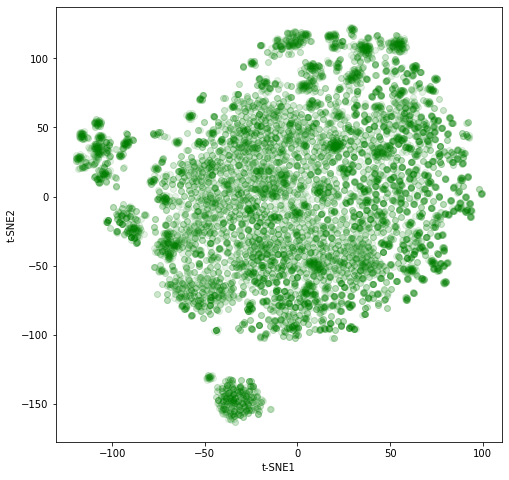

In [143]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_stdmolecule)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (8,8))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.1, facecolor='green')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

Figure: The result of reducing the dataset into two t-SNE components

Text(0, 0.5, 'Inertia')

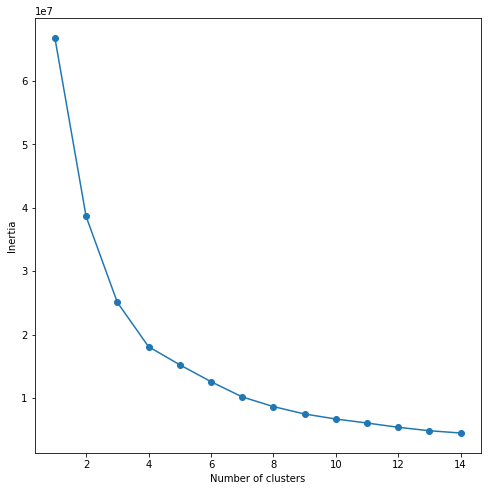

In [144]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(8,8))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Figure: Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)

In [145]:
kmeans_tsne_scale = KMeans(n_clusters=6, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.38066813349723816


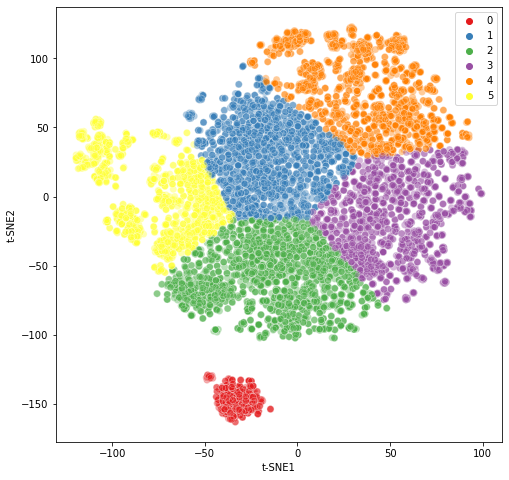

In [146]:
plt.figure(figsize = (8,8))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=50, alpha=0.4)

plt.legend()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

Figure: Molecule descriptors clusters by t-SNE with KMeans

#### Comparing PCA and t-SNE Derived KMeans Clusters

In [147]:
cluster_tsne_profile = pd.merge(molecule, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_pca_profile = pd.merge(molecule, molecule_pca_kmeans['Molecule k-means PCA'], left_index=True, right_index=True )

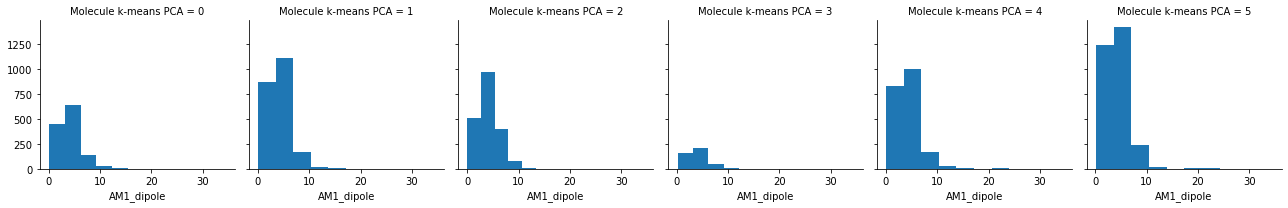

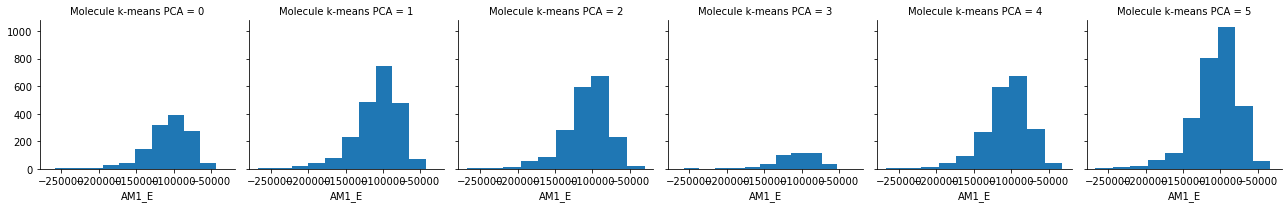

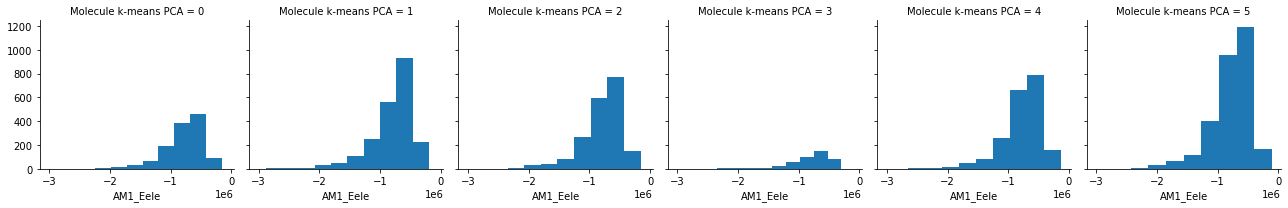

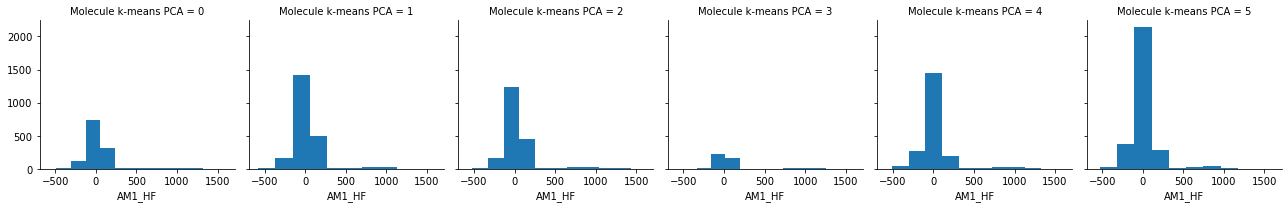

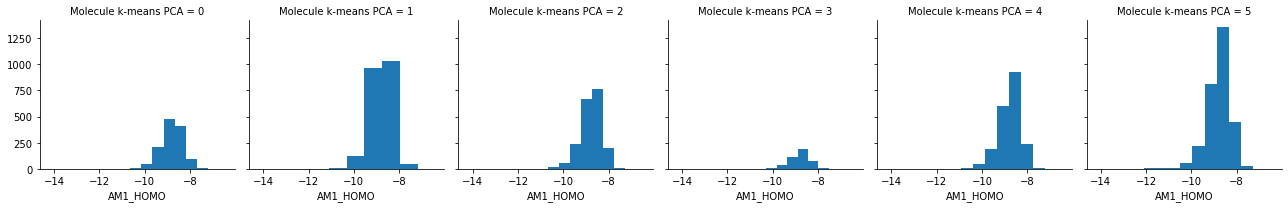

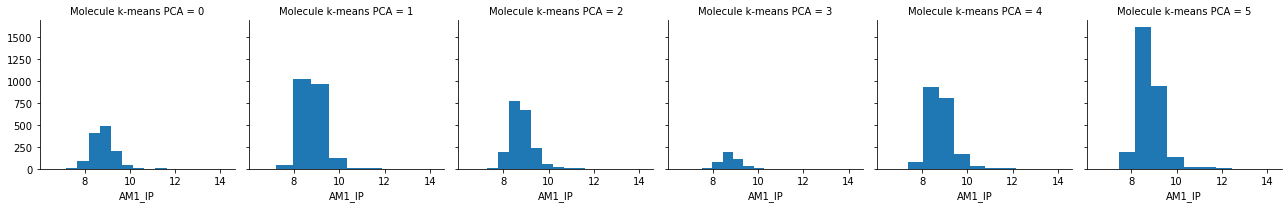

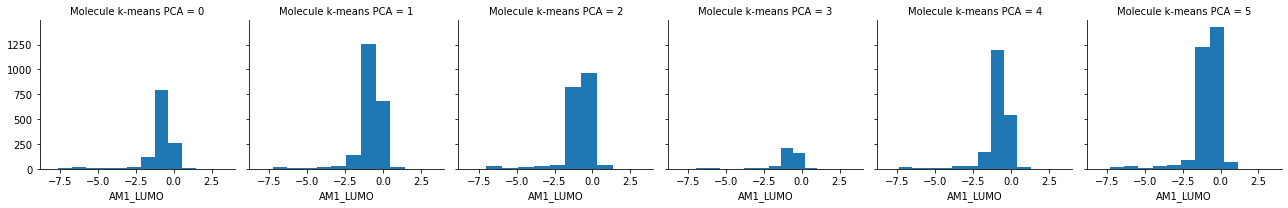

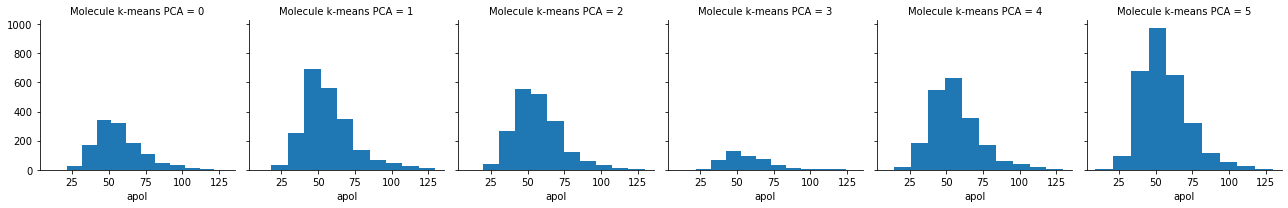

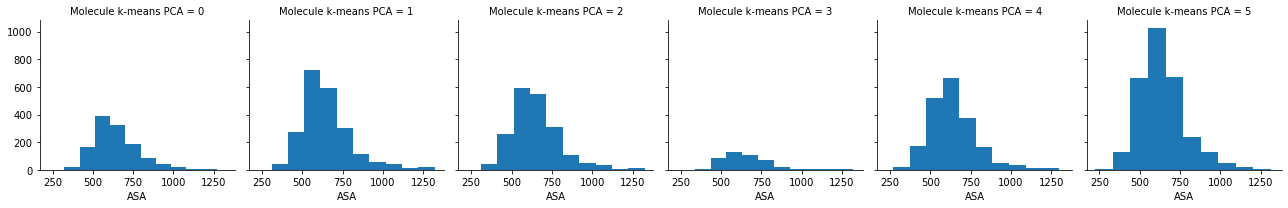

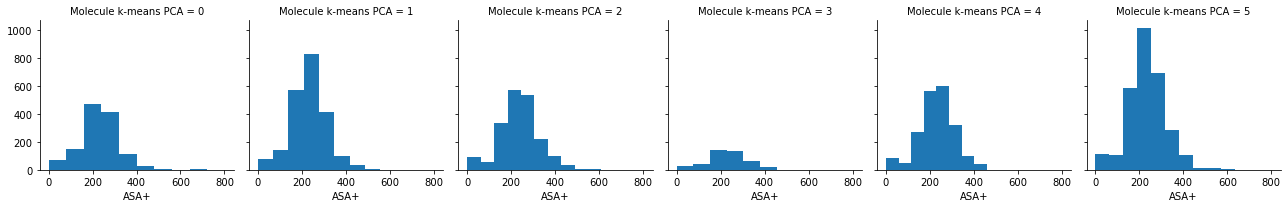

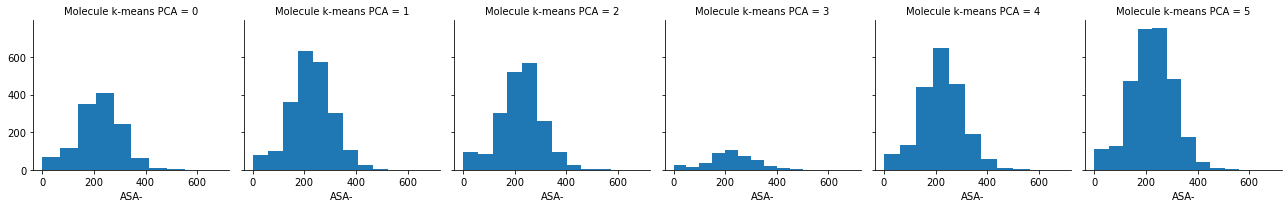

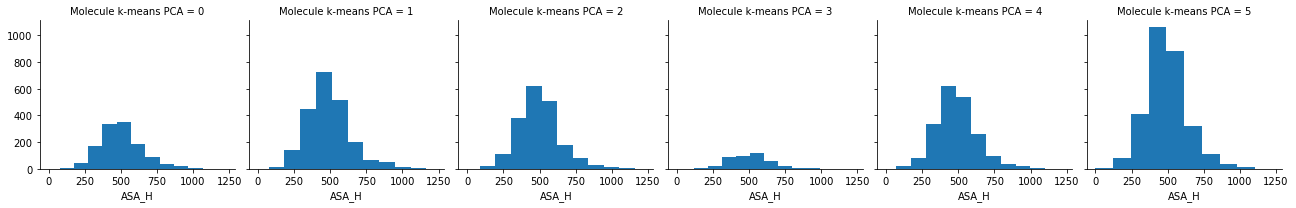

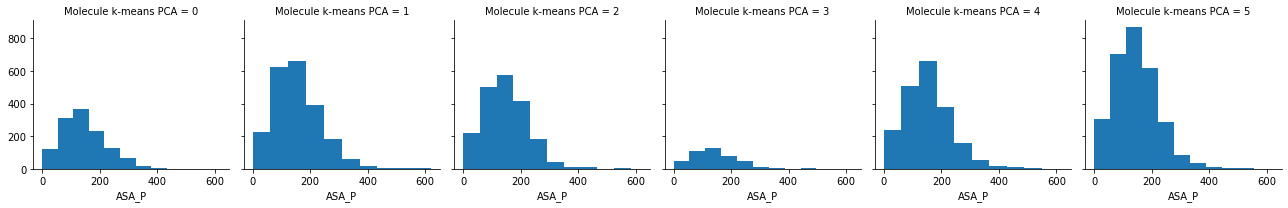

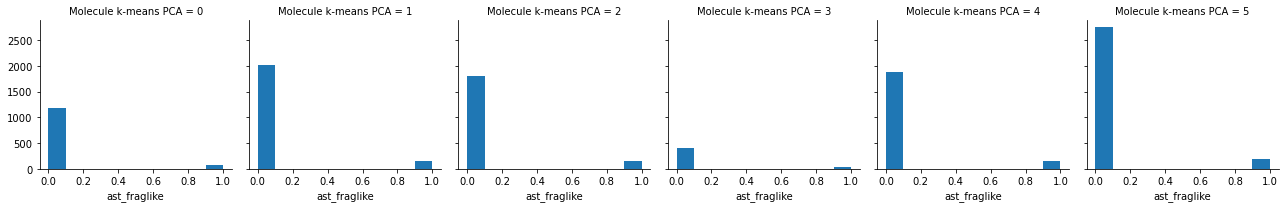

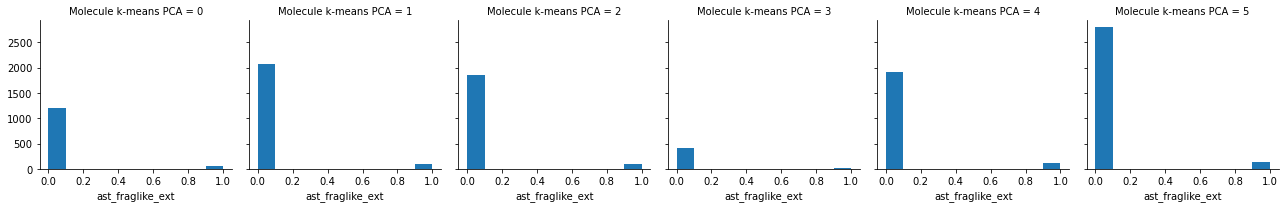

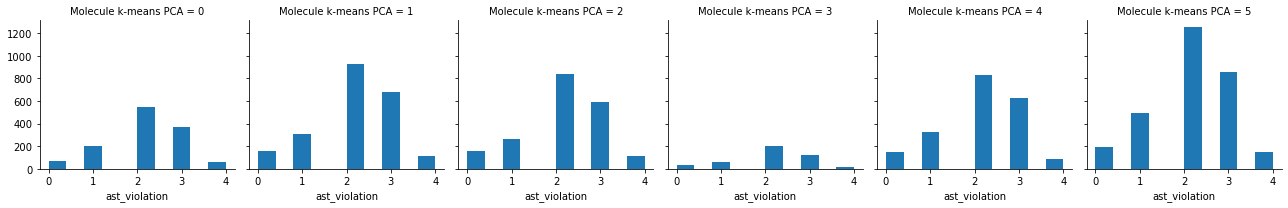

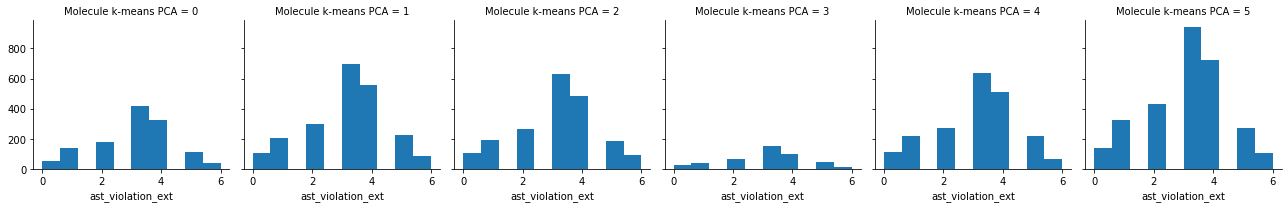

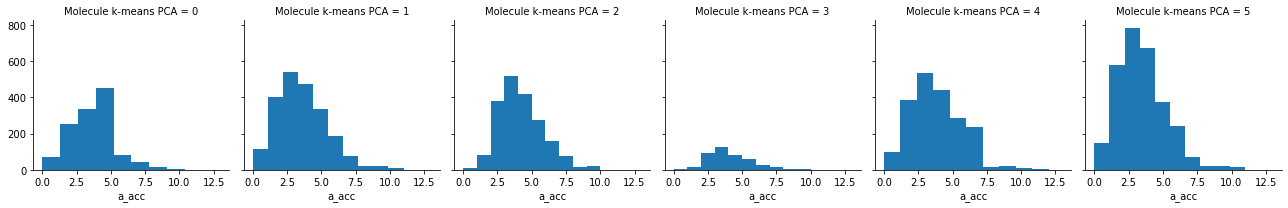

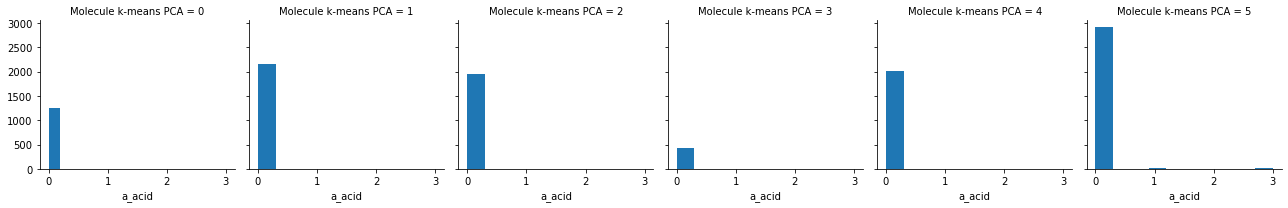

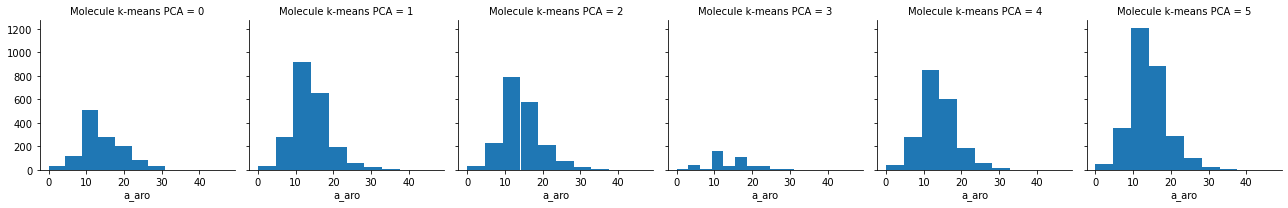

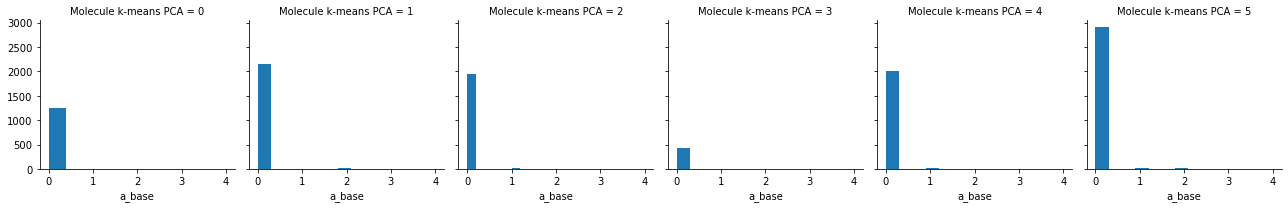

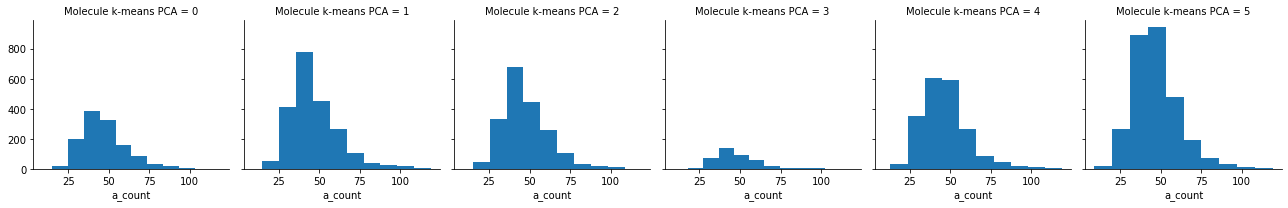

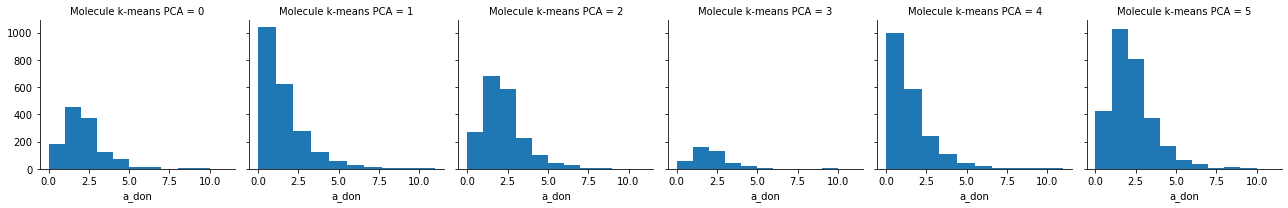

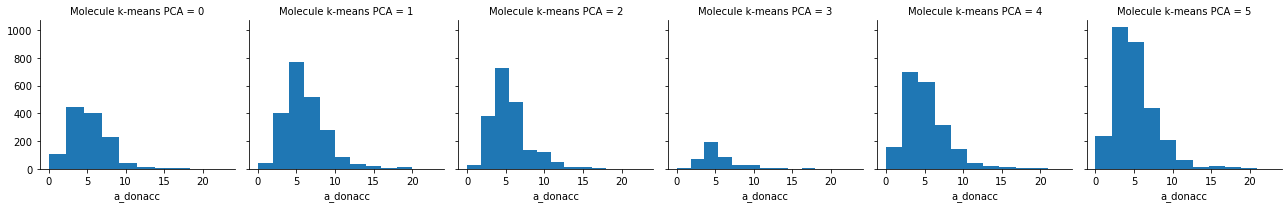

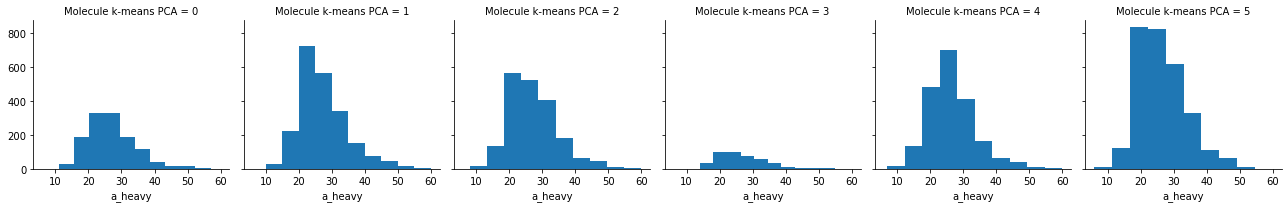

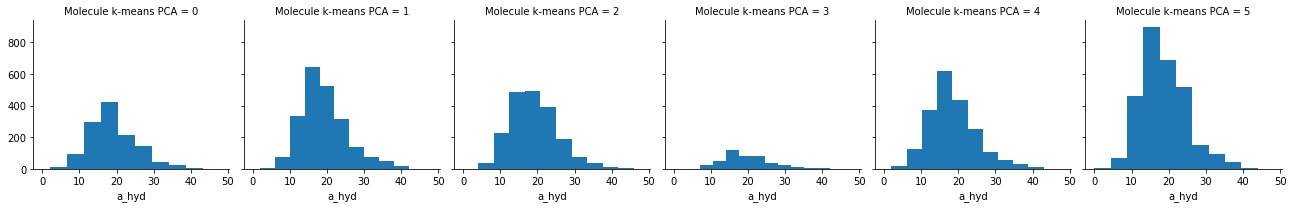

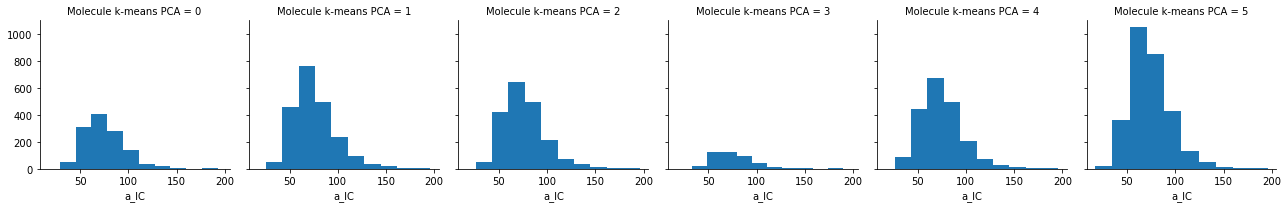

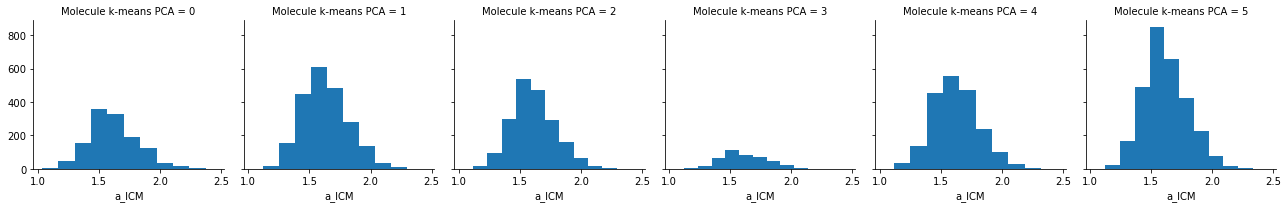

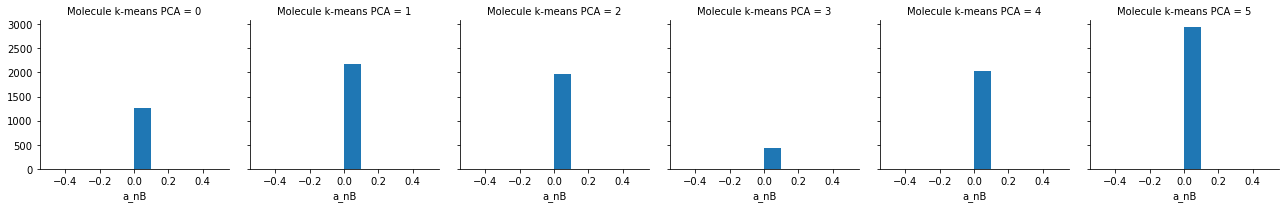

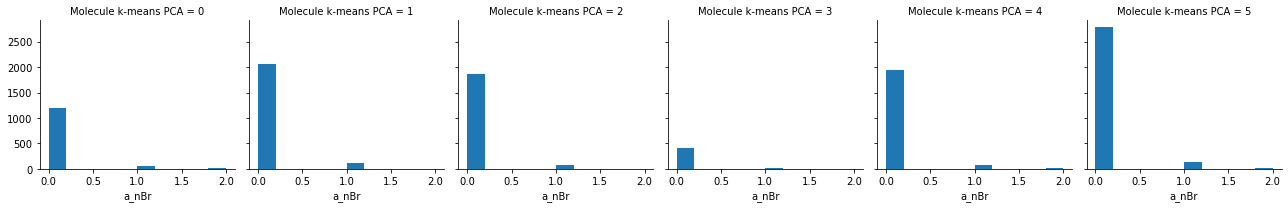

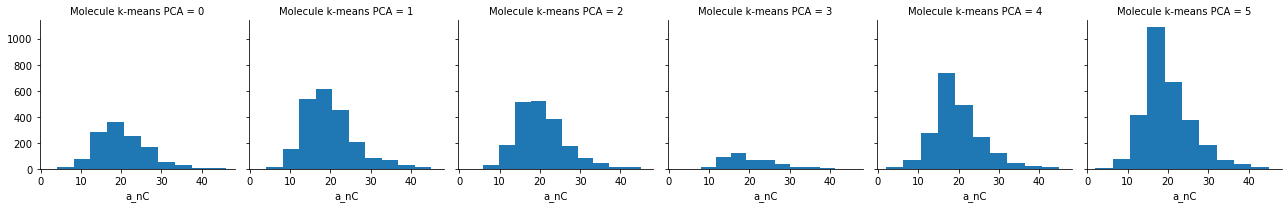

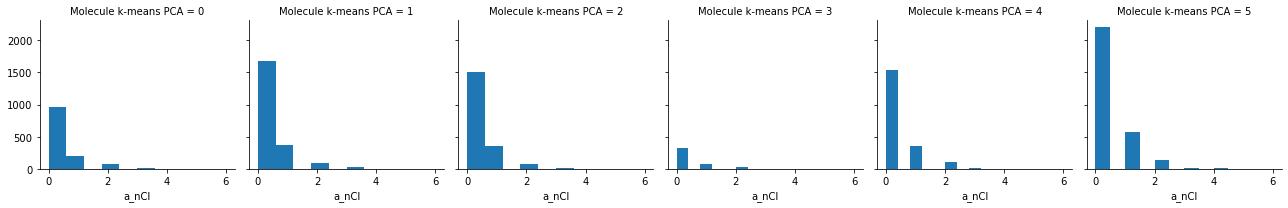

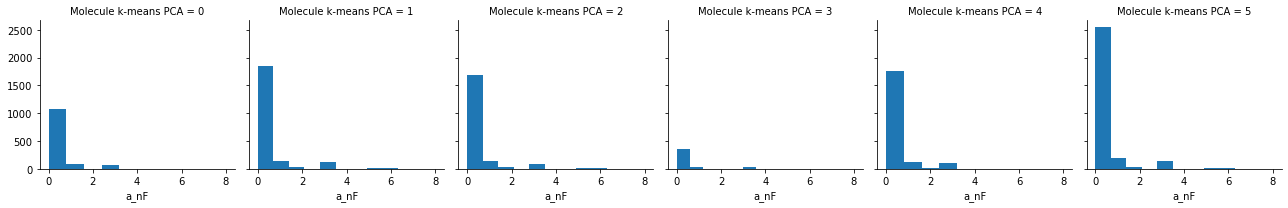

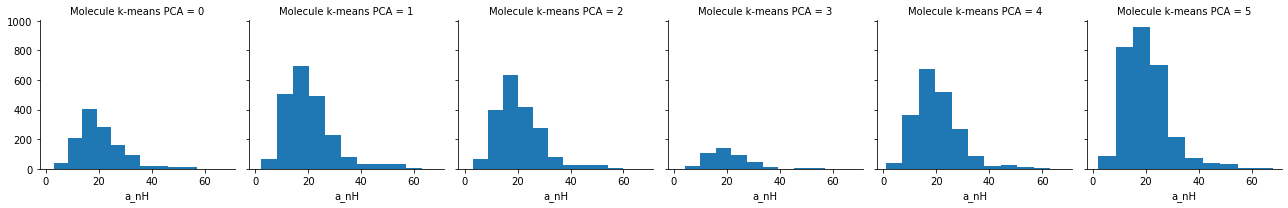

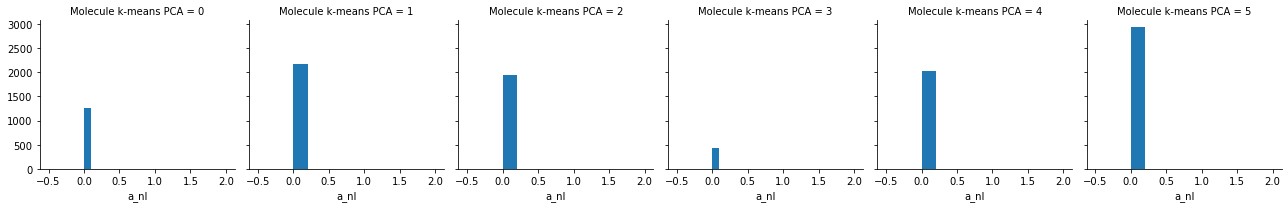

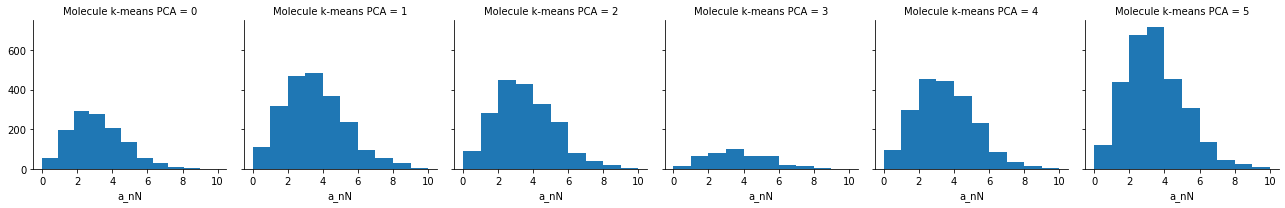

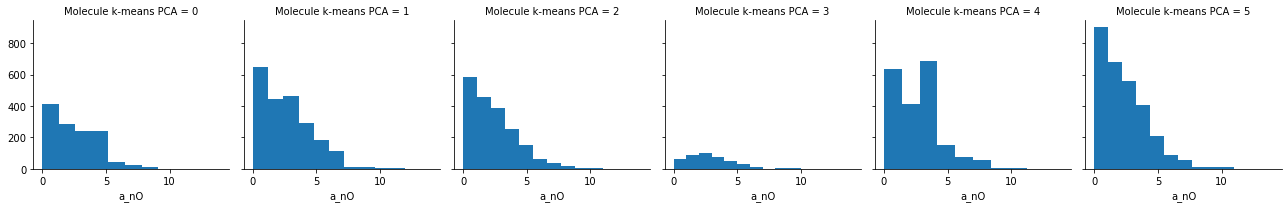

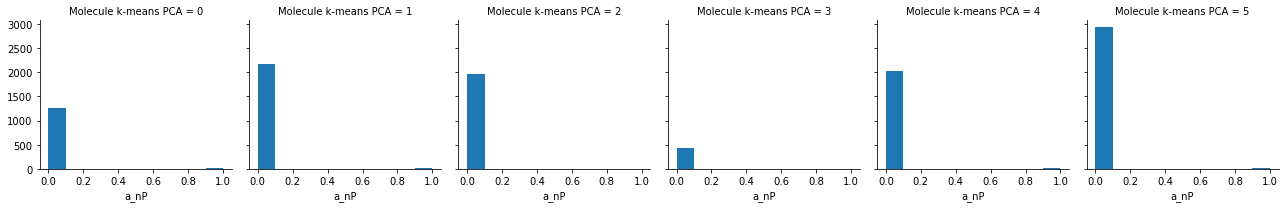

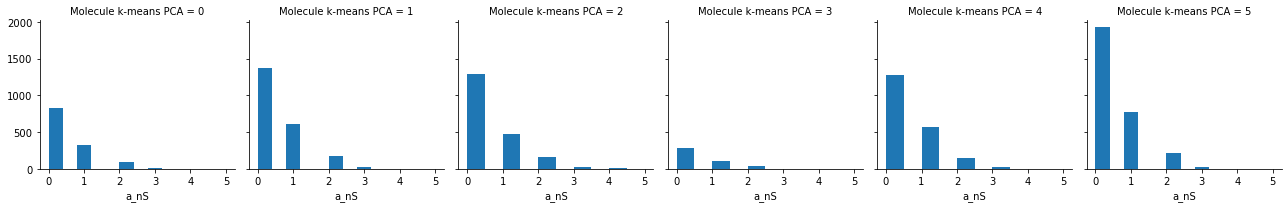

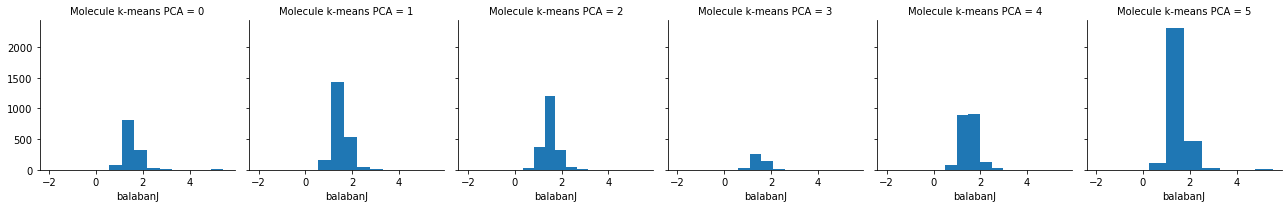

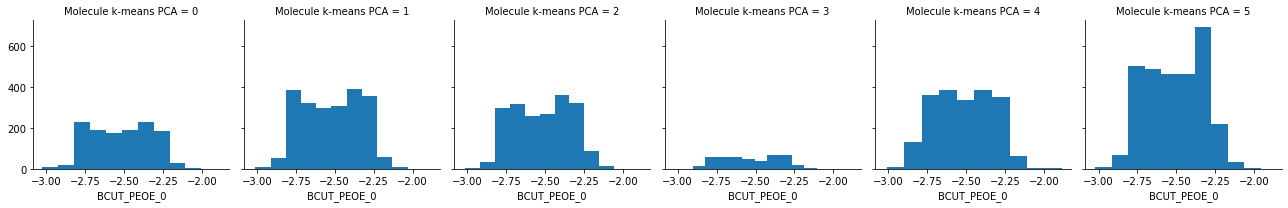

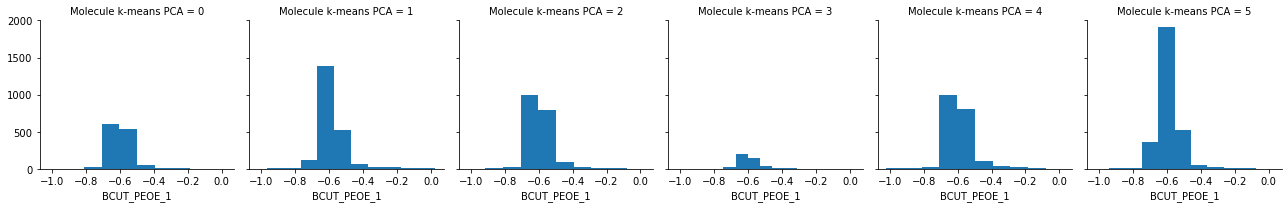

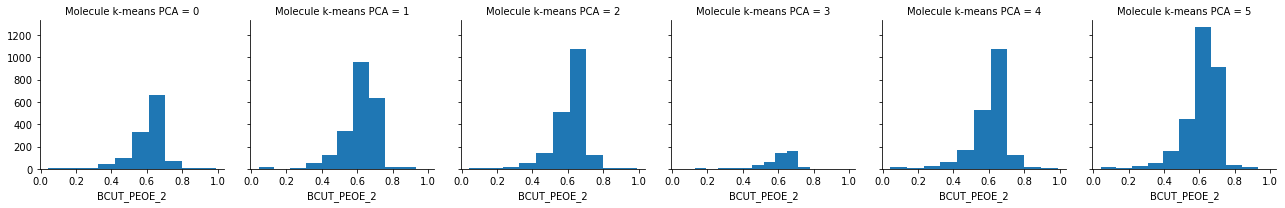

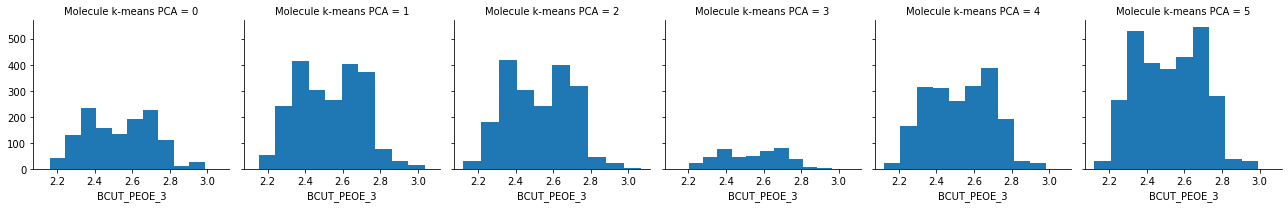

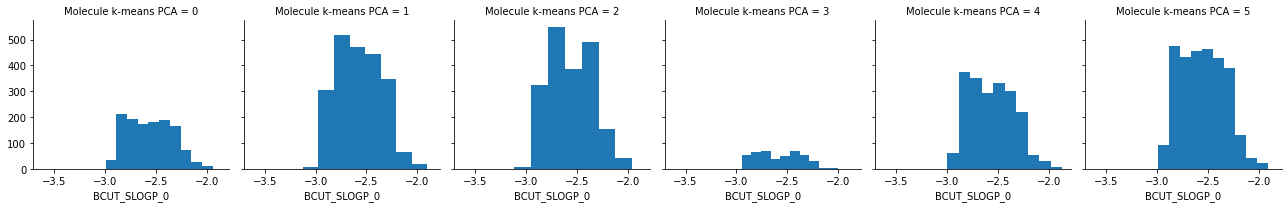

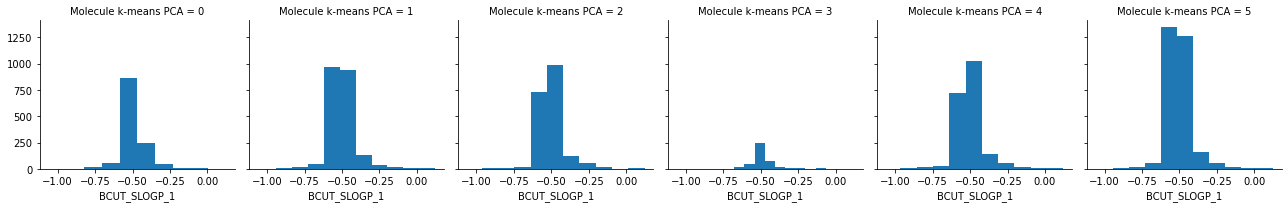

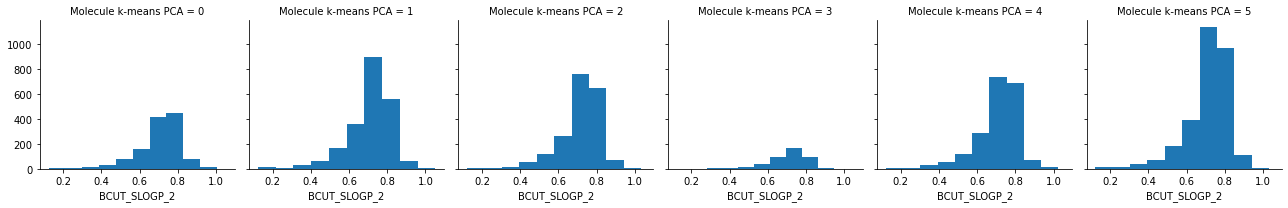

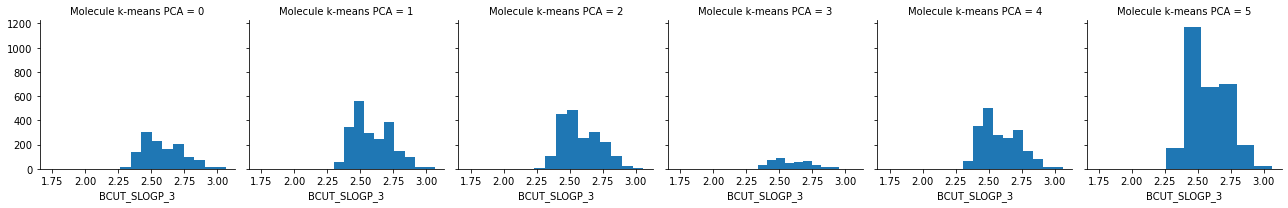

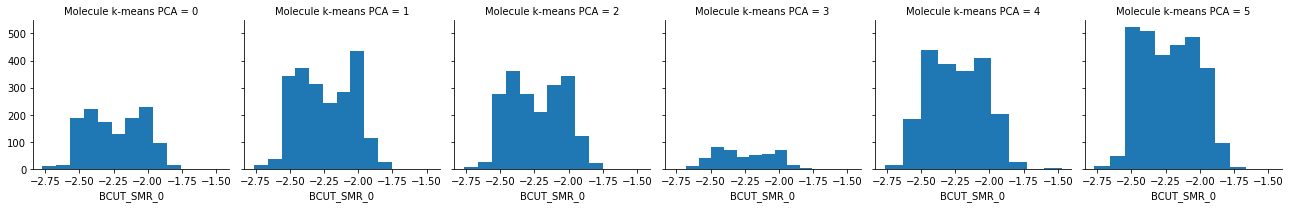

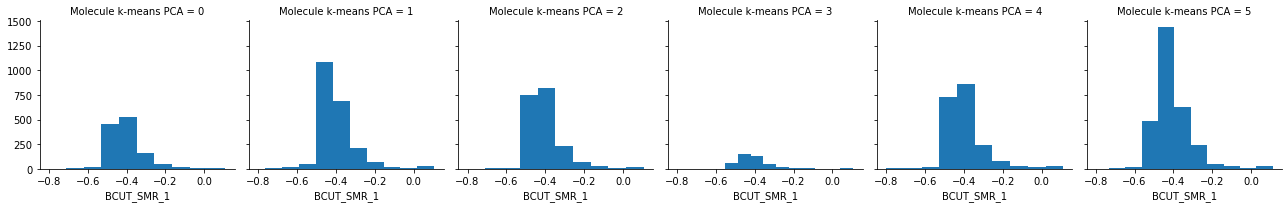

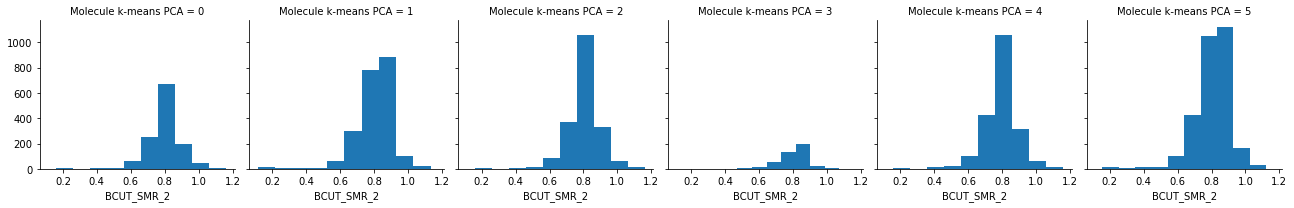

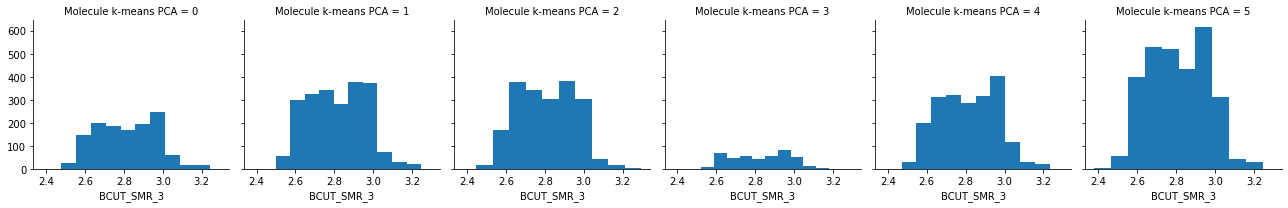

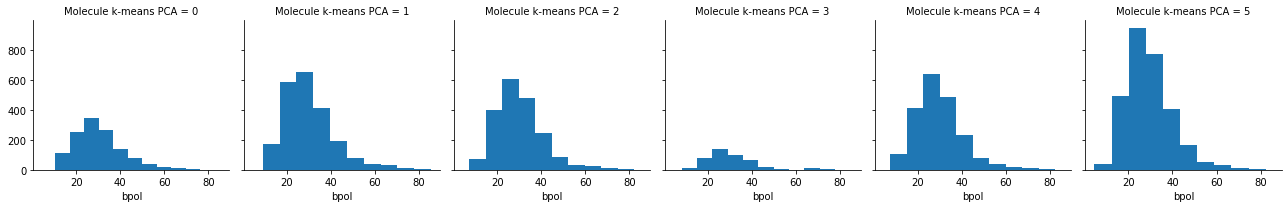

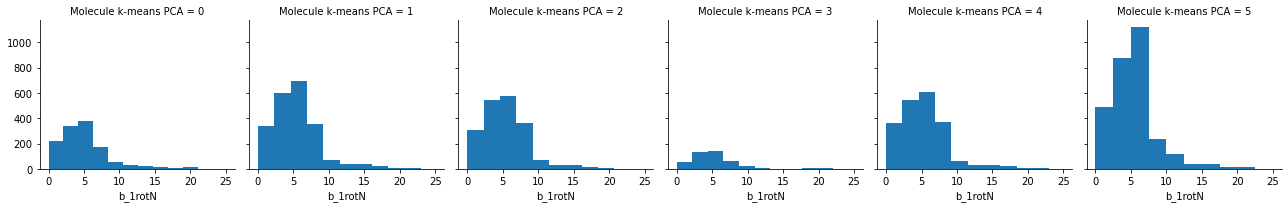

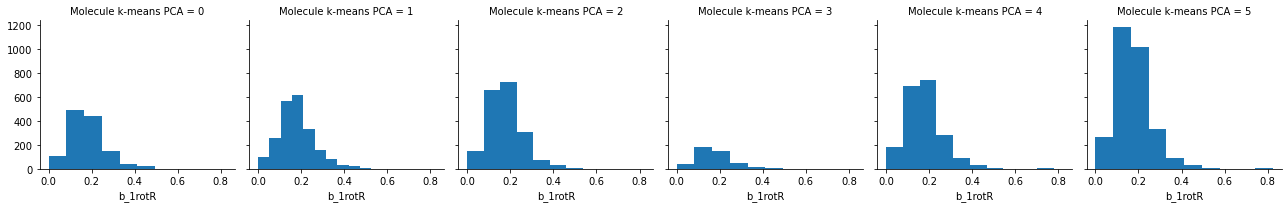

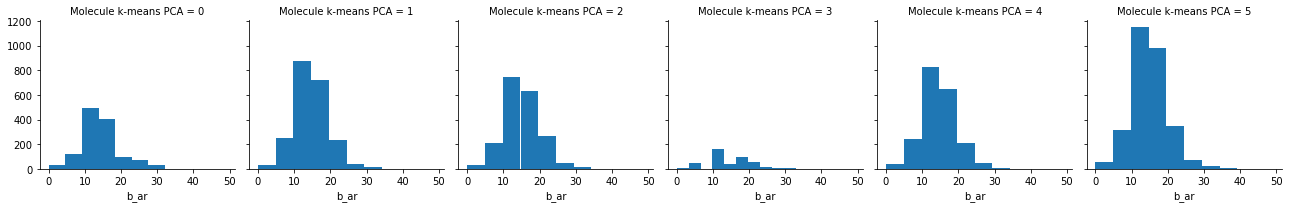

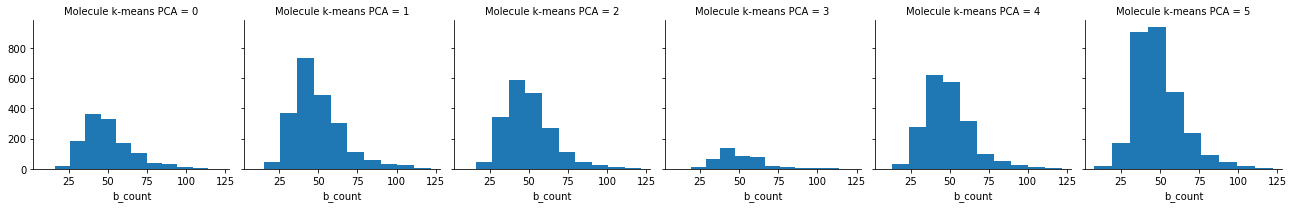

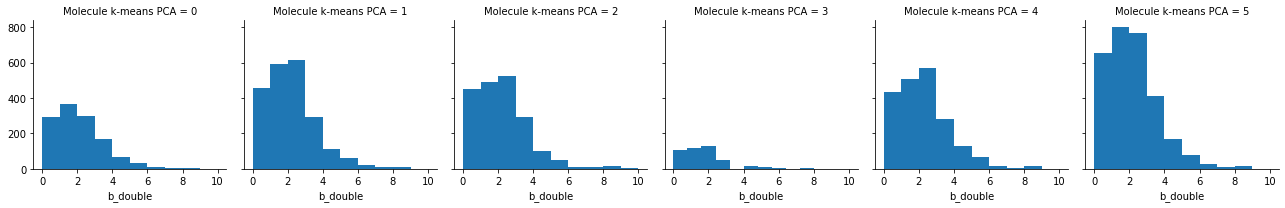

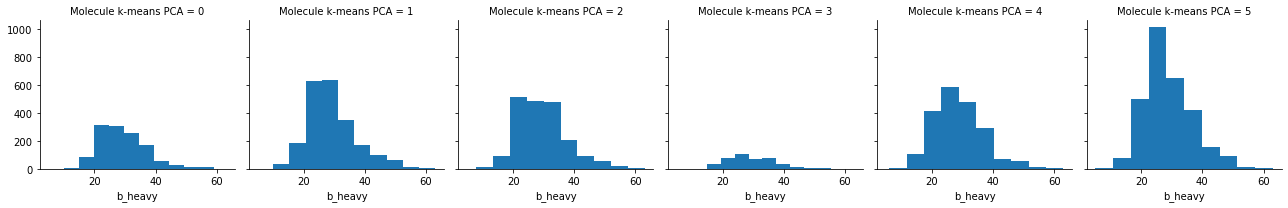

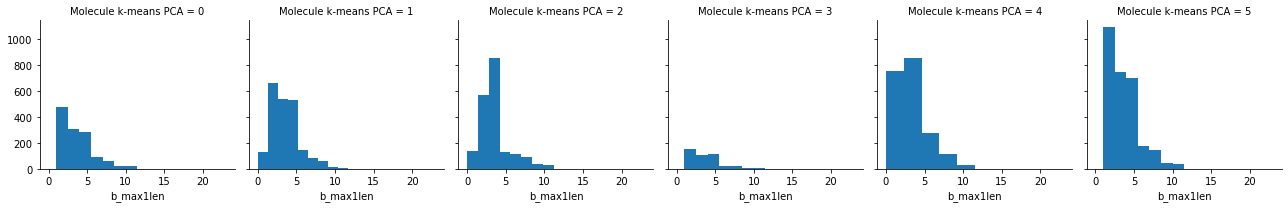

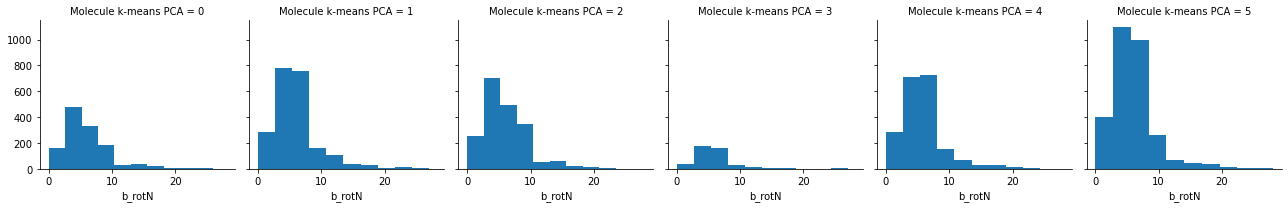

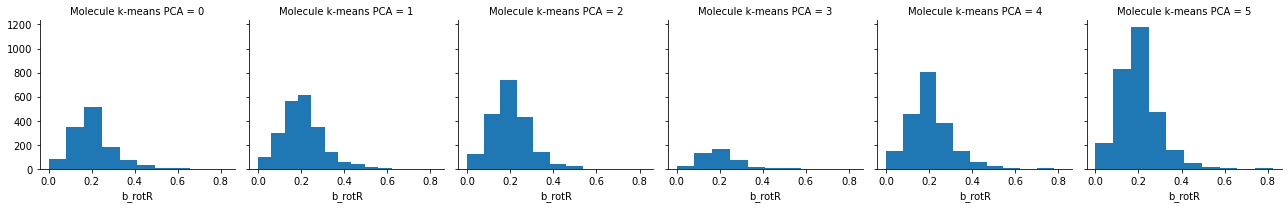

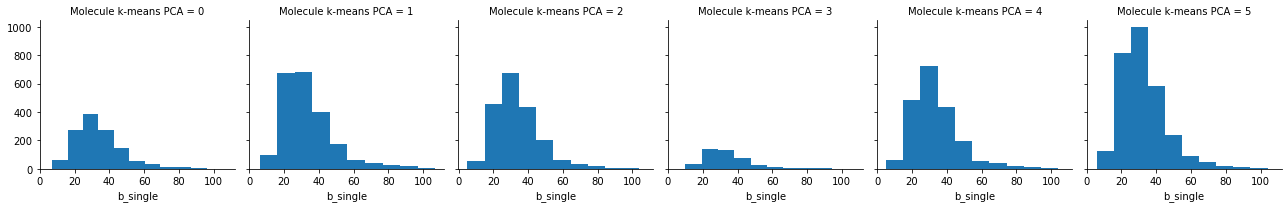

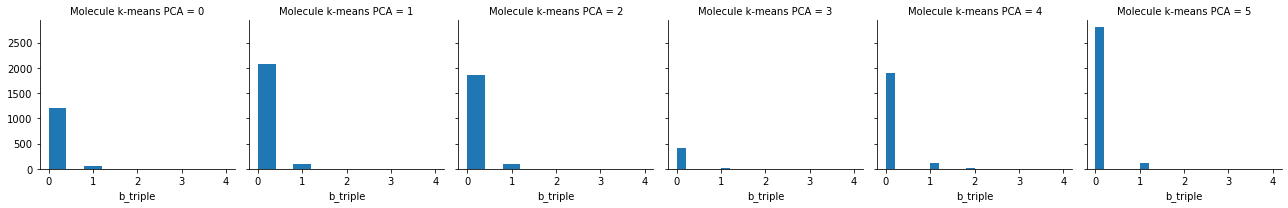

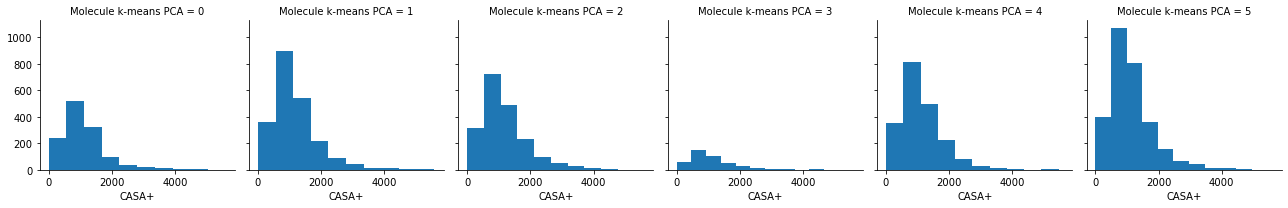

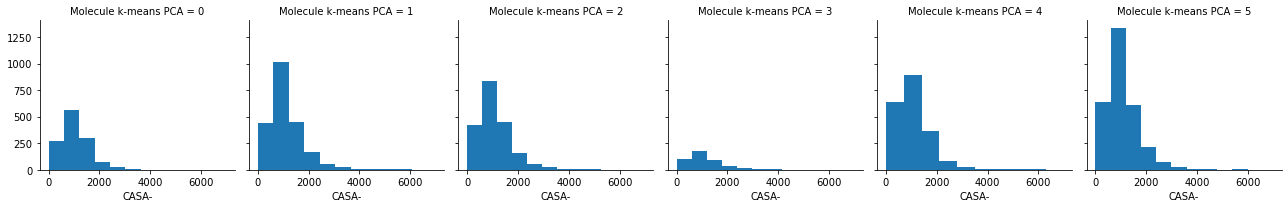

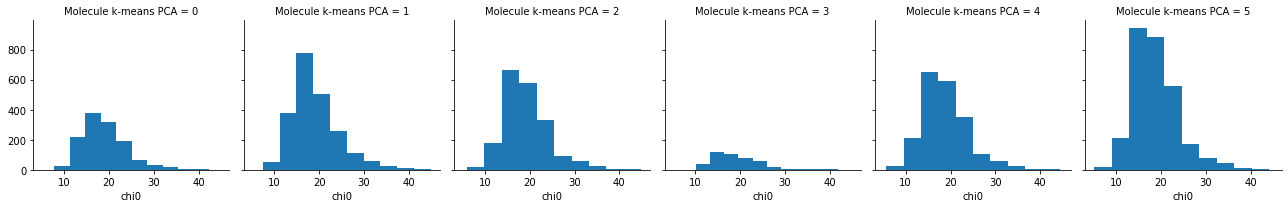

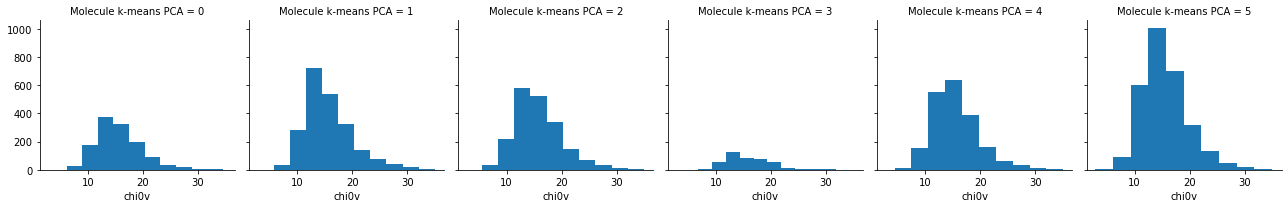

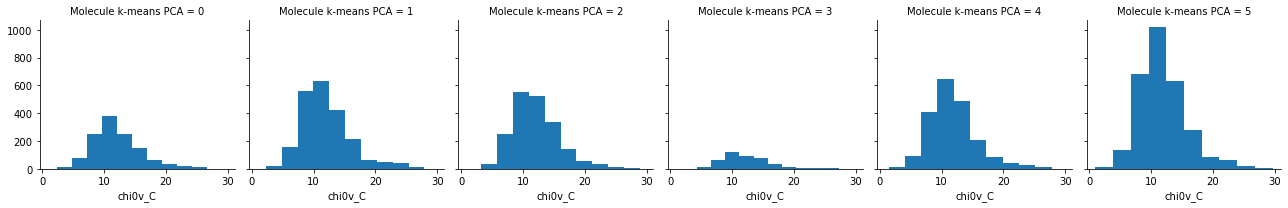

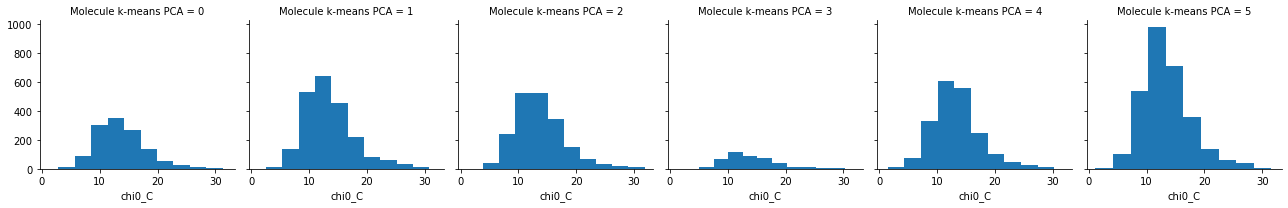

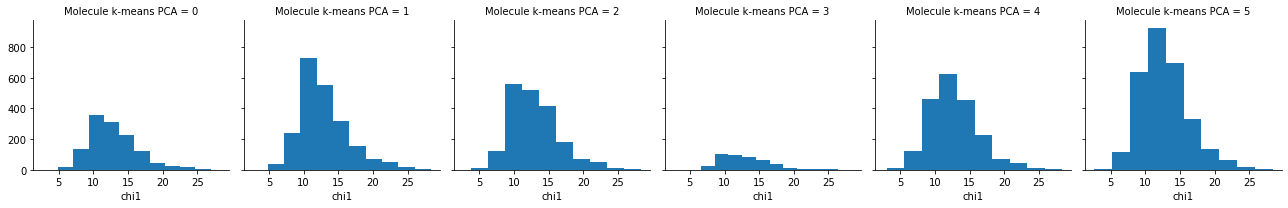

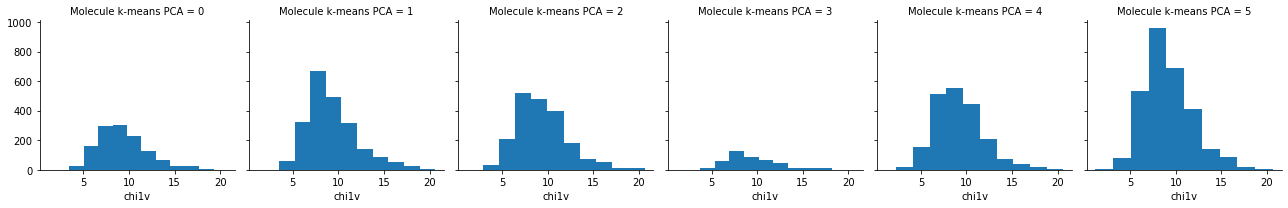

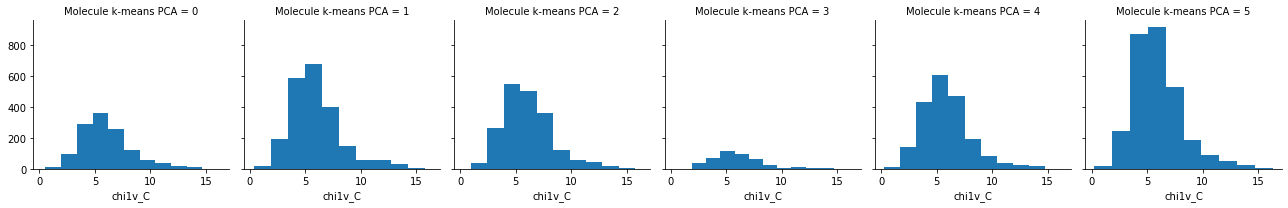

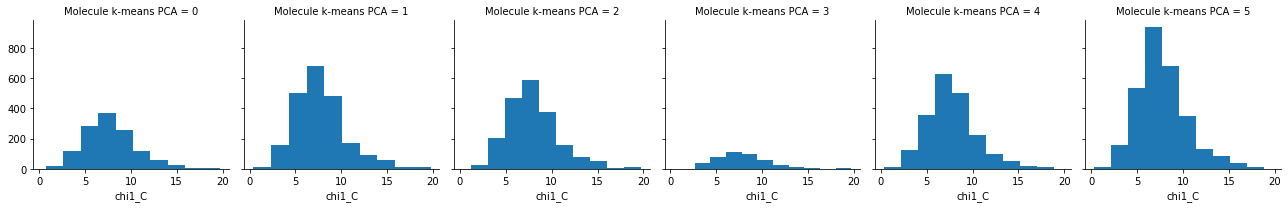

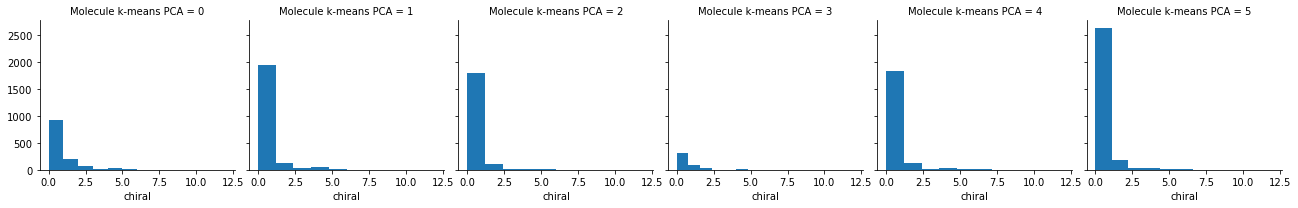

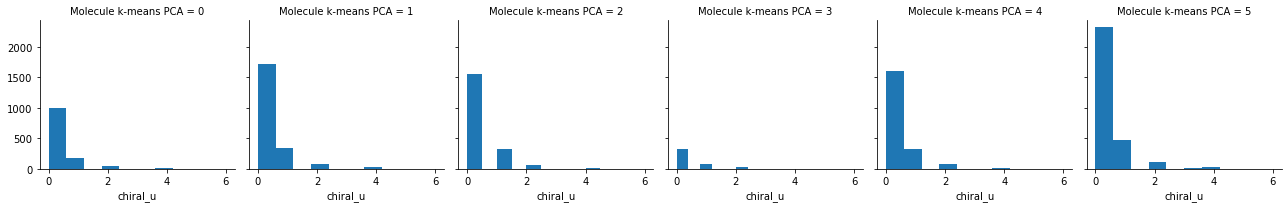

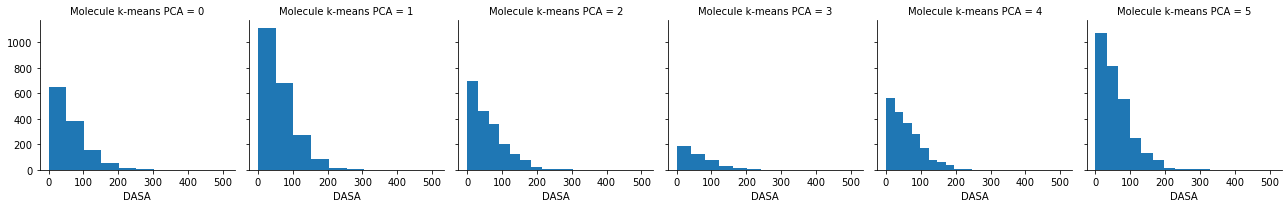

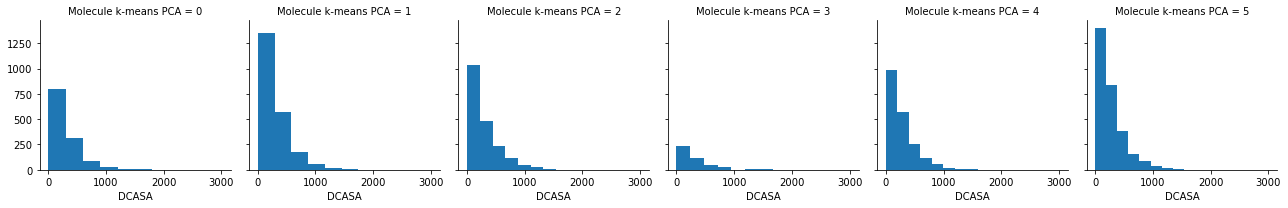

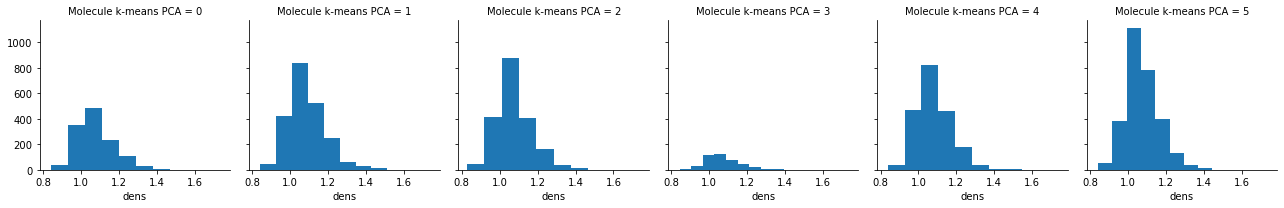

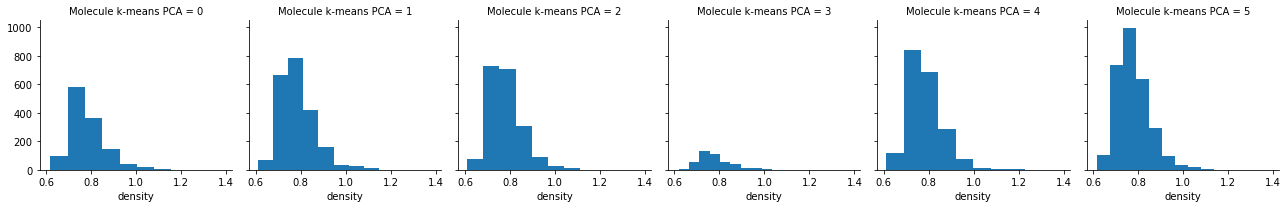

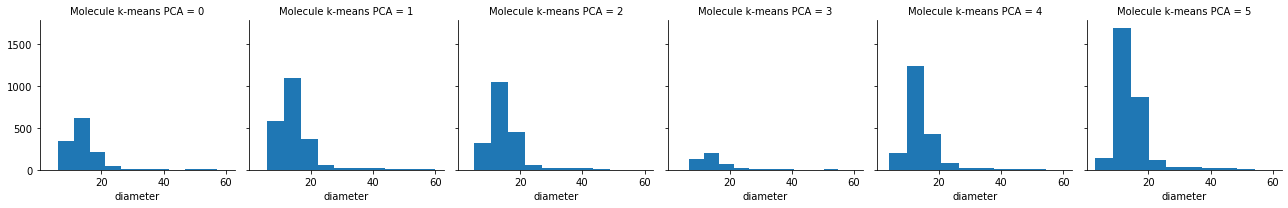

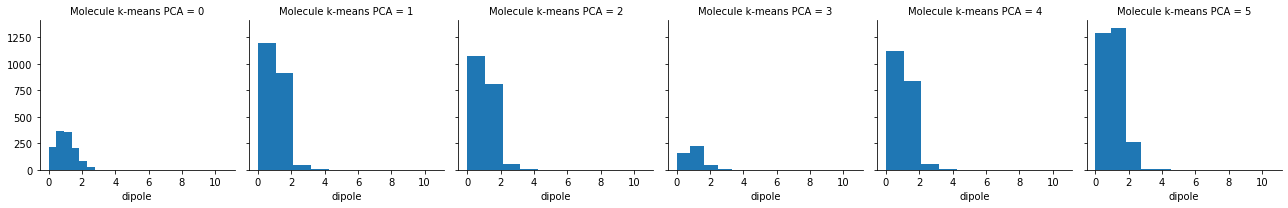

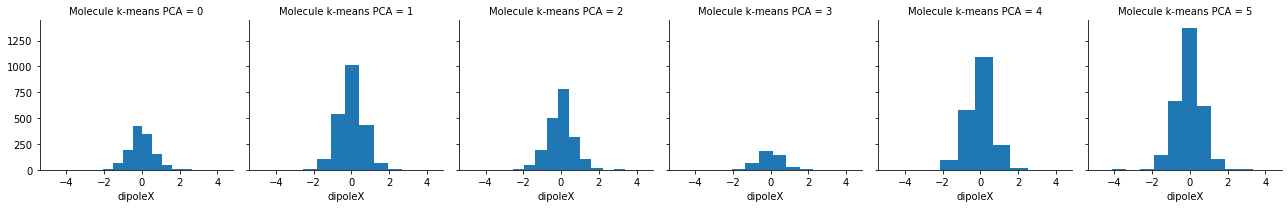

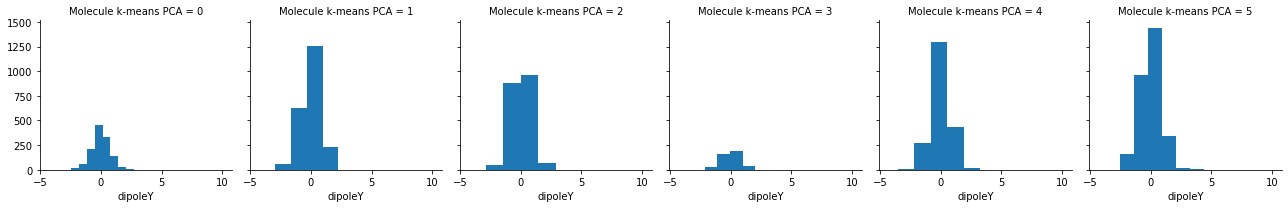

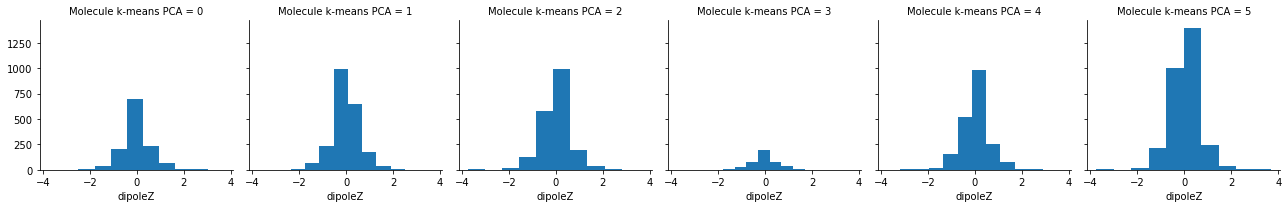

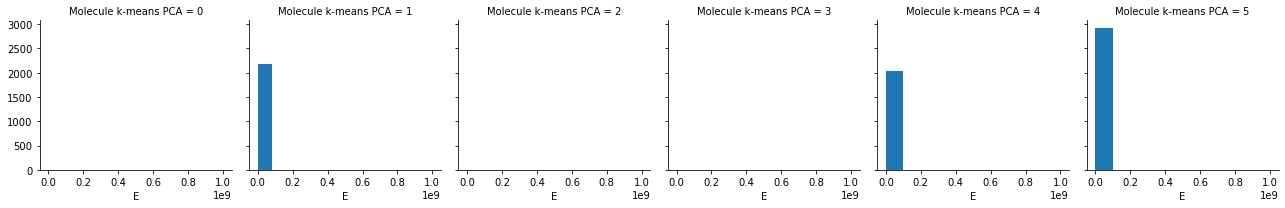

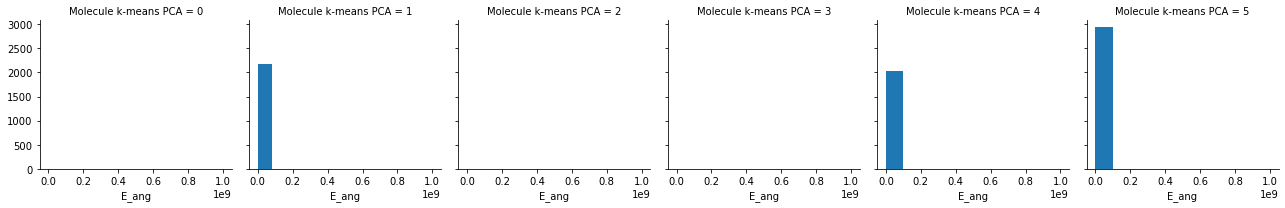

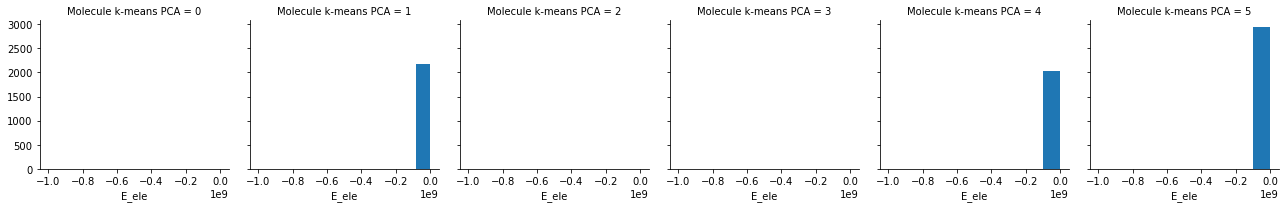

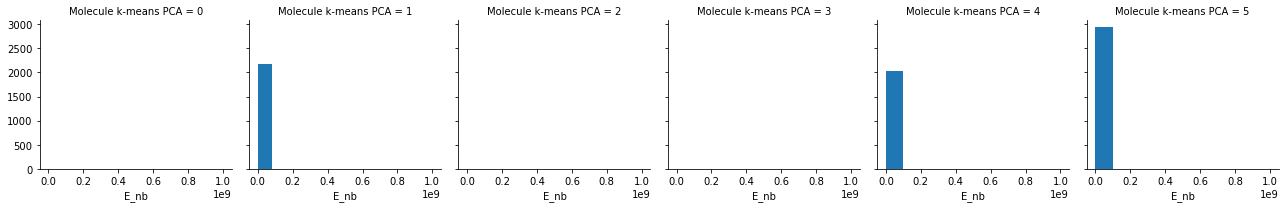

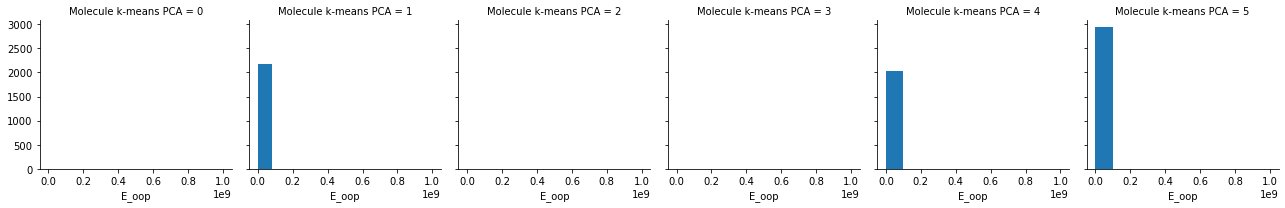

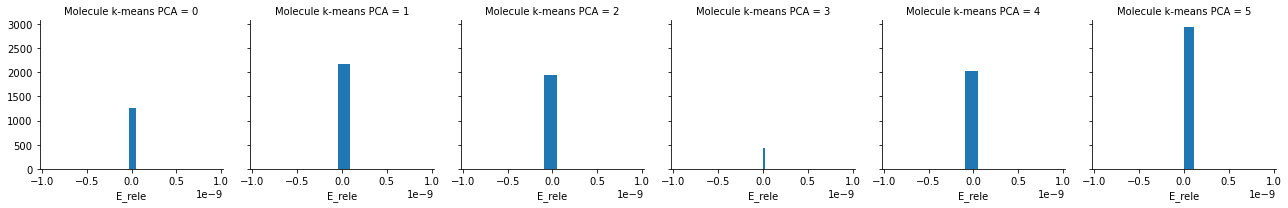

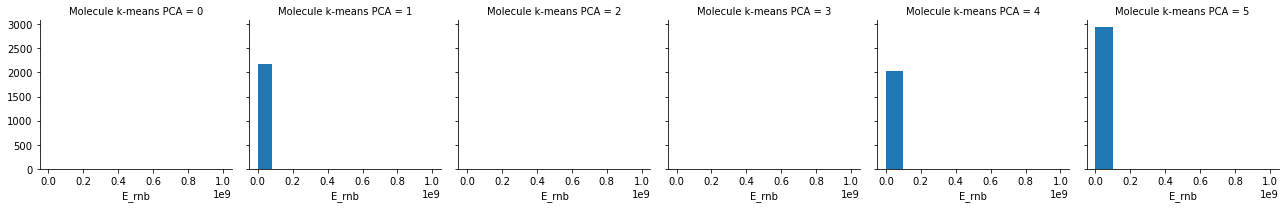

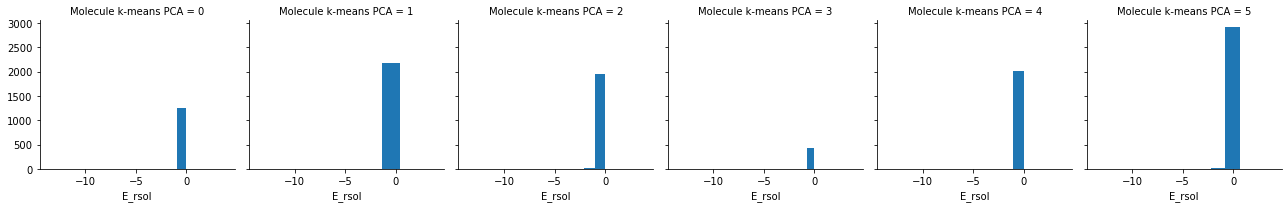

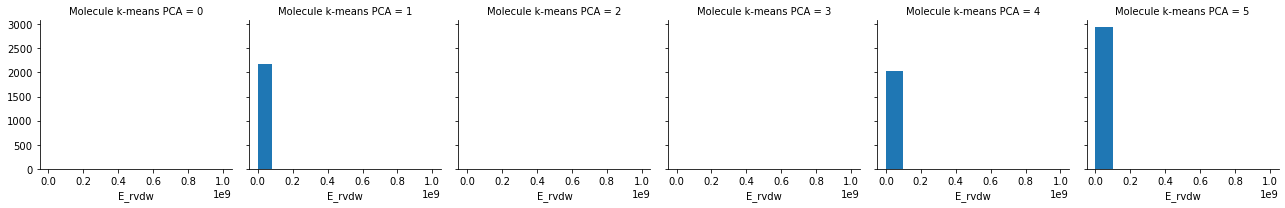

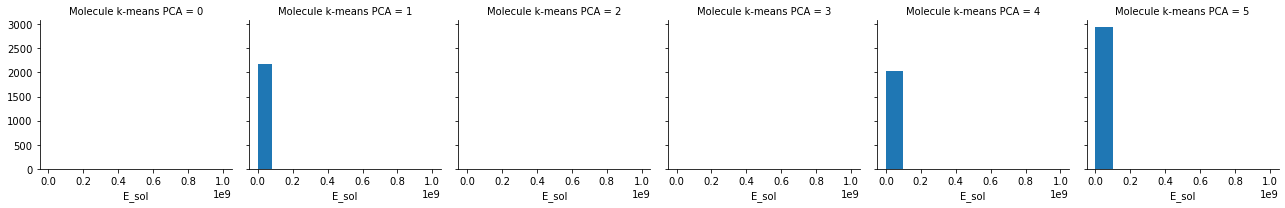

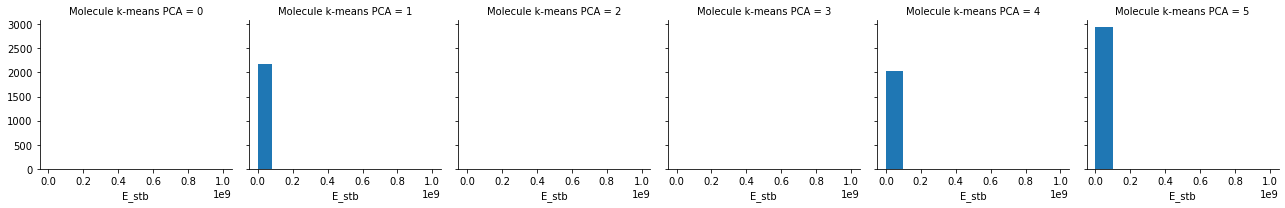

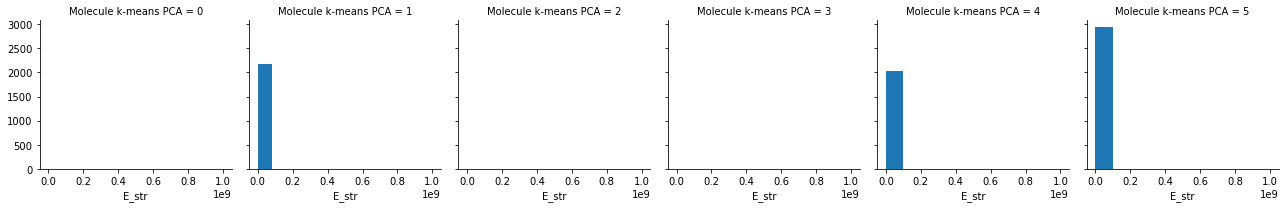

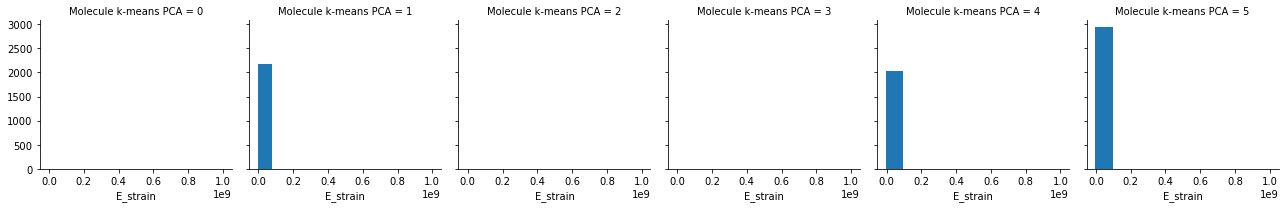

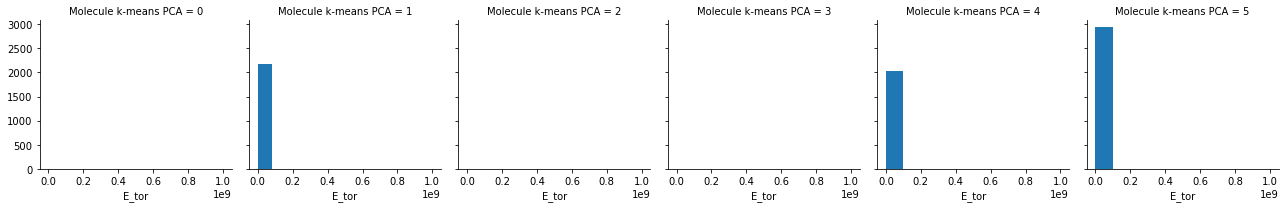

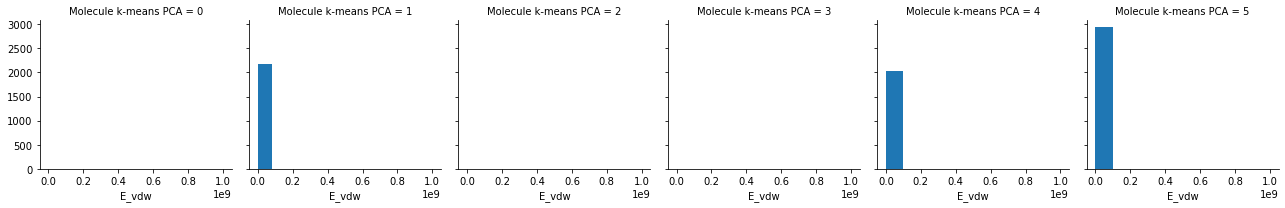

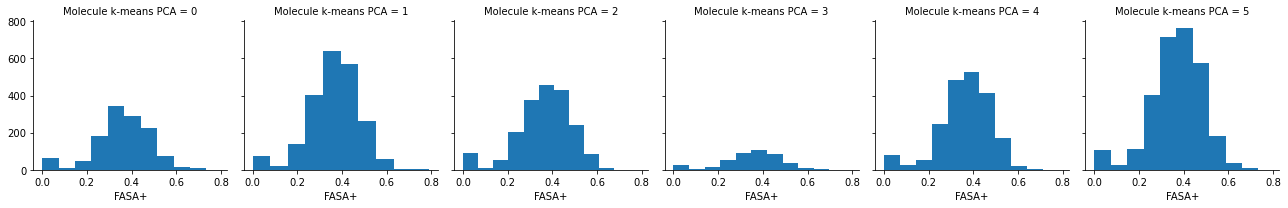

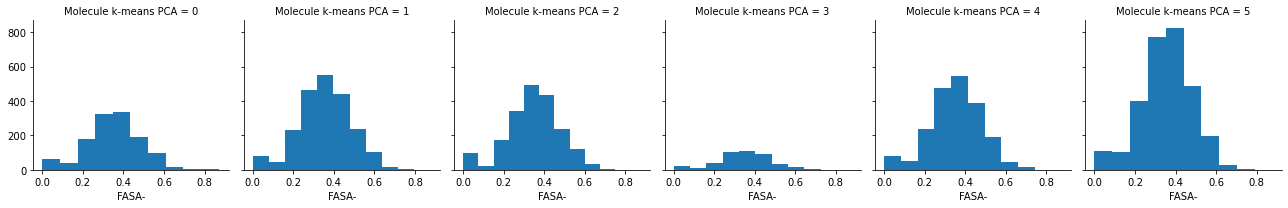

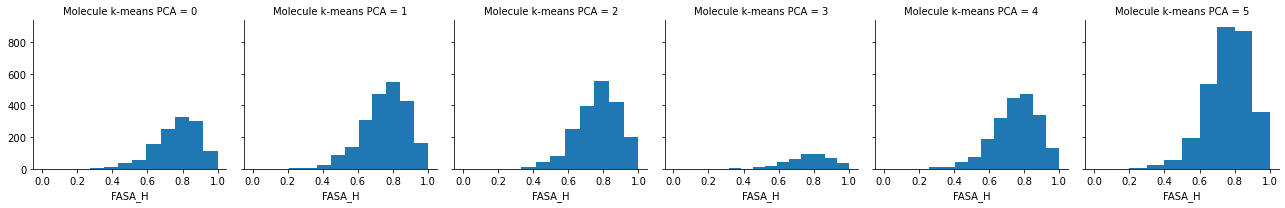

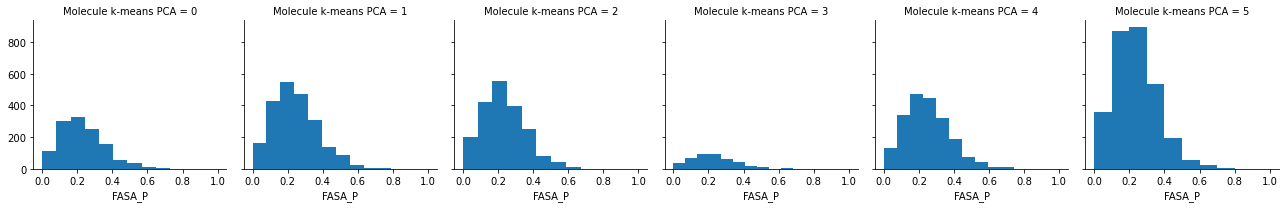

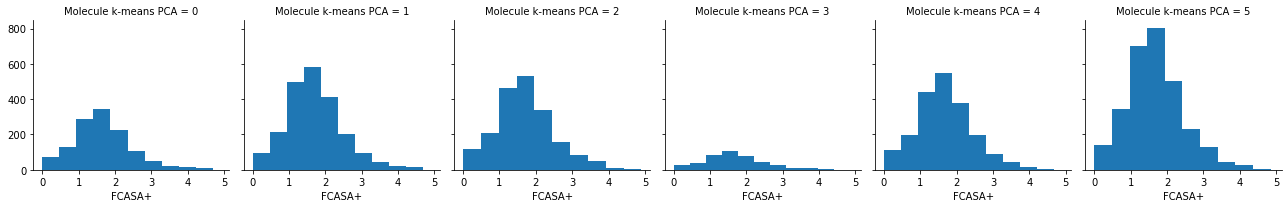

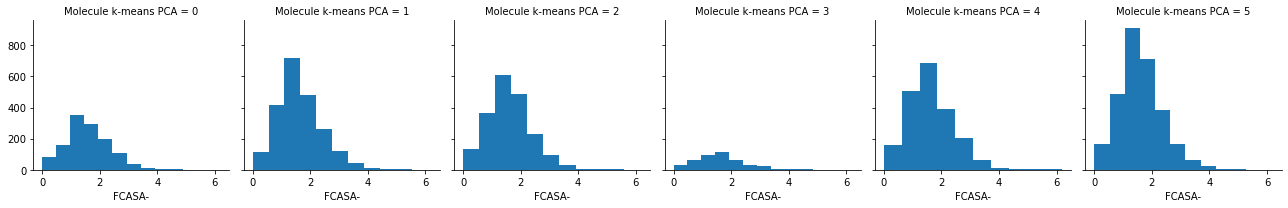

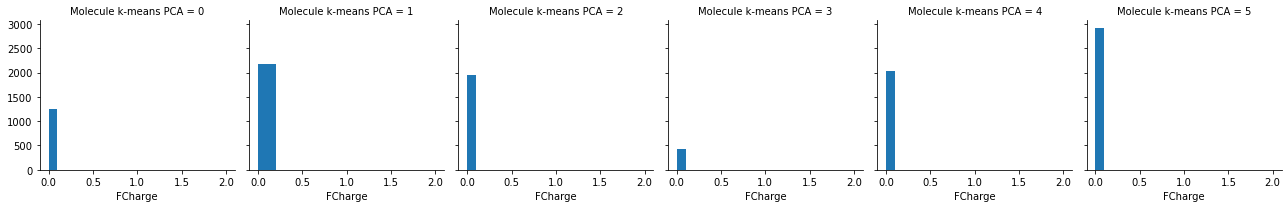

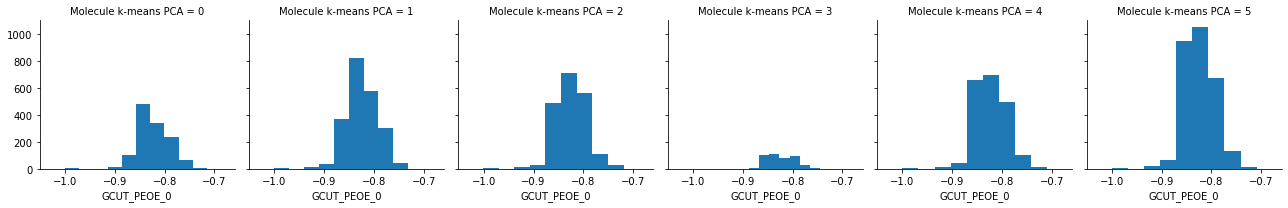

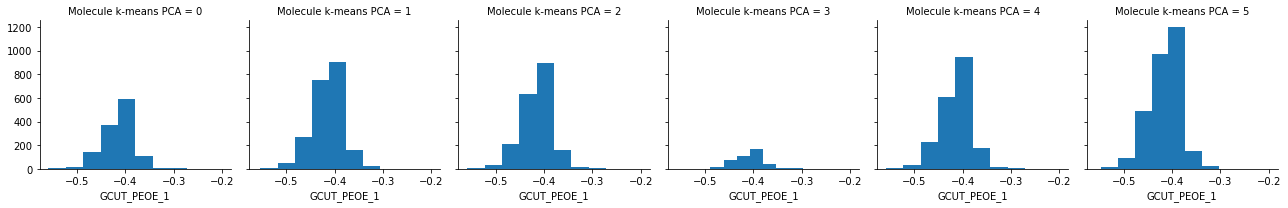

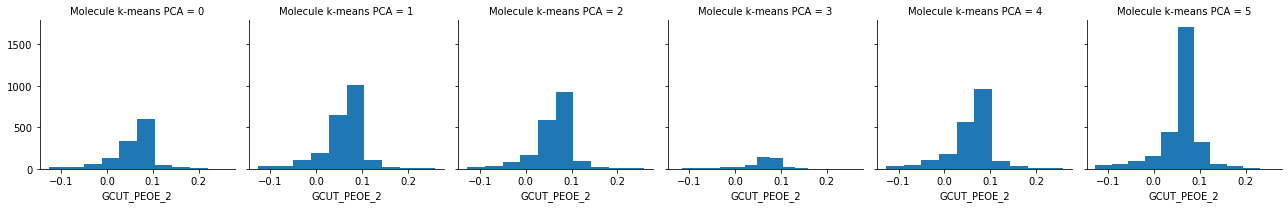

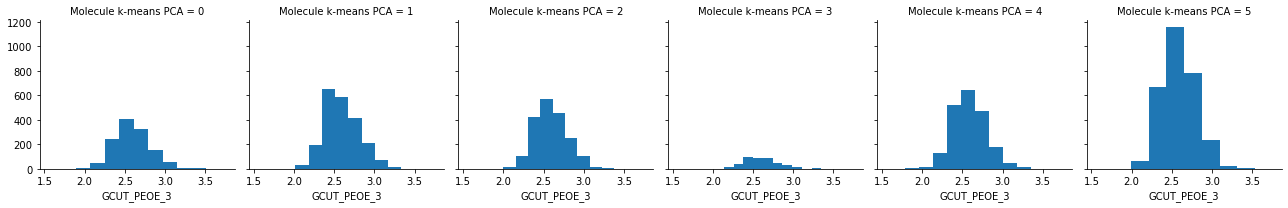

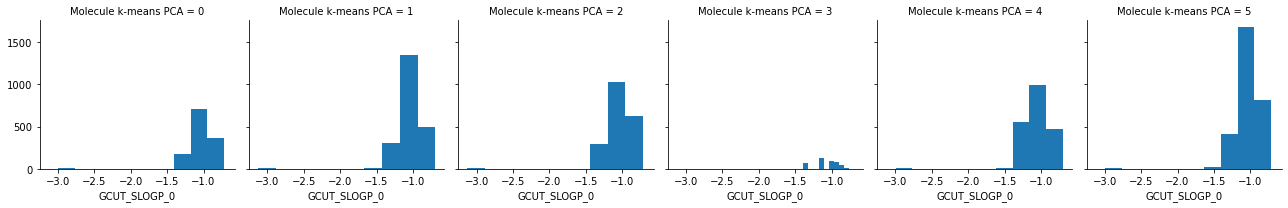

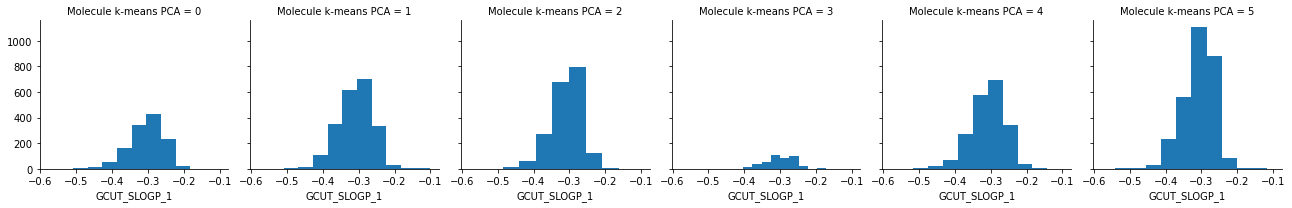

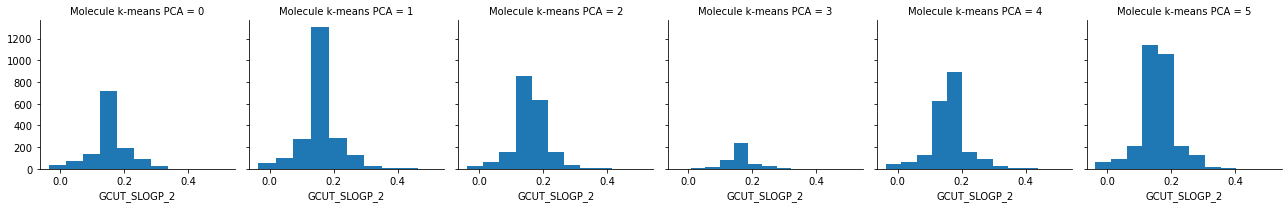

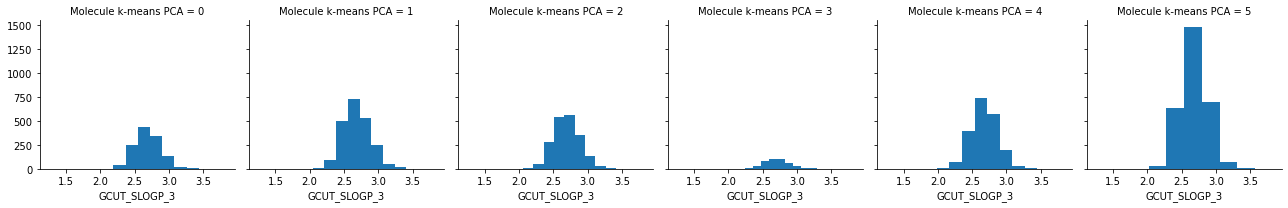

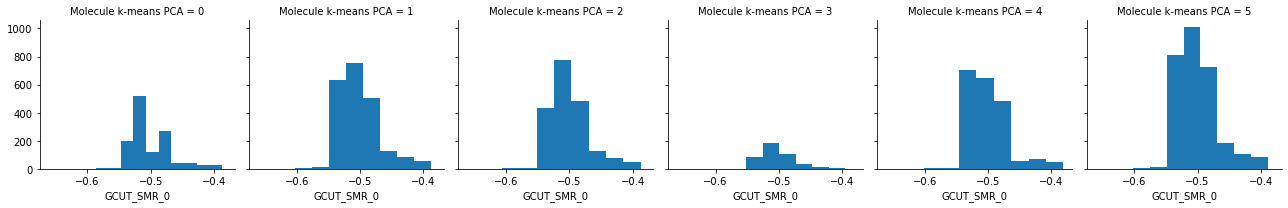

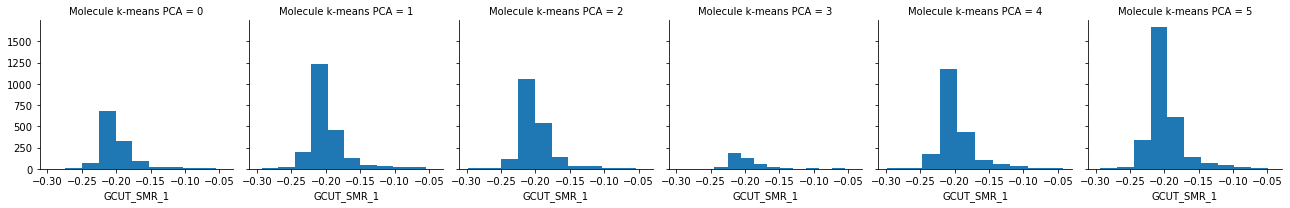

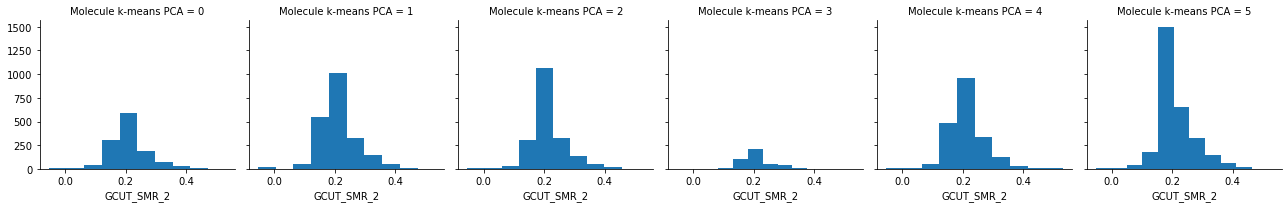

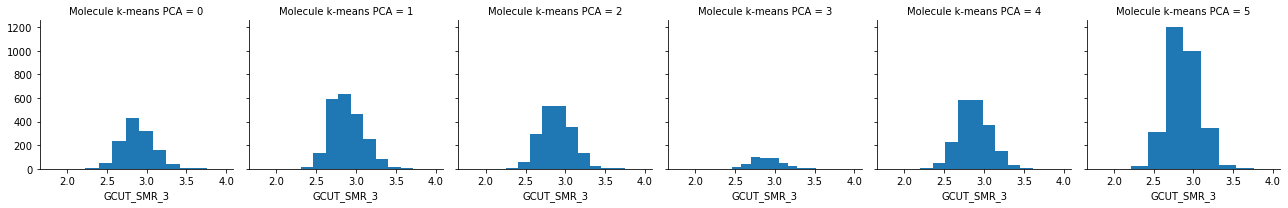

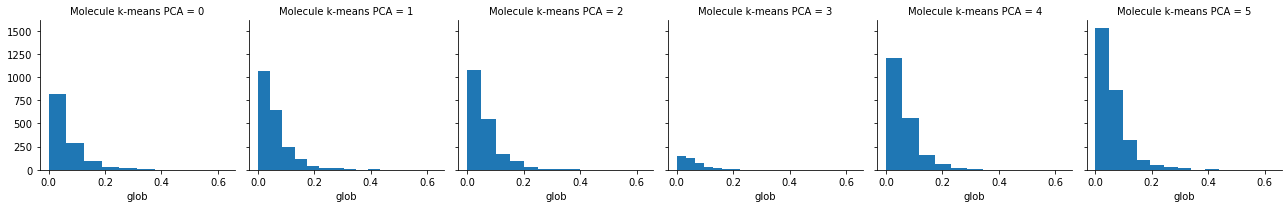

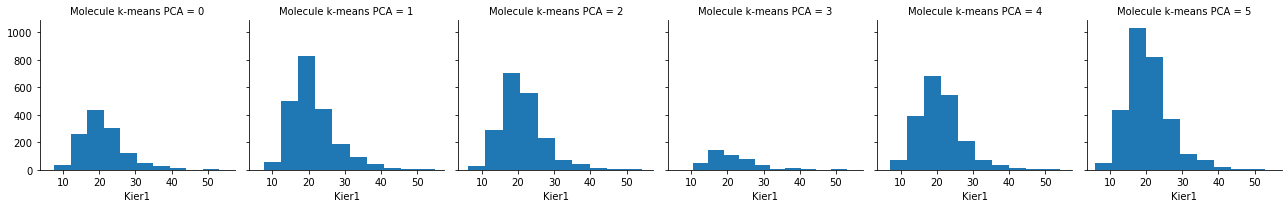

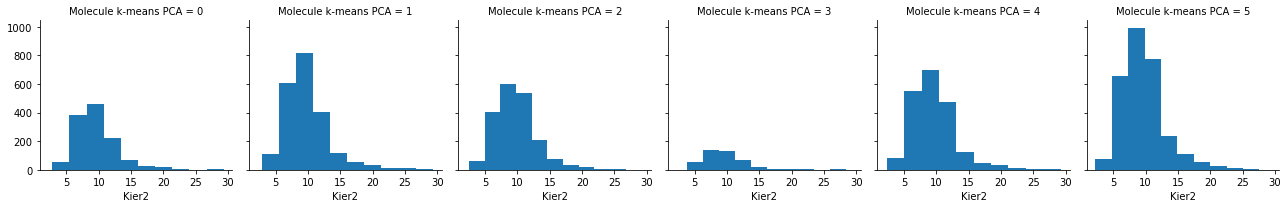

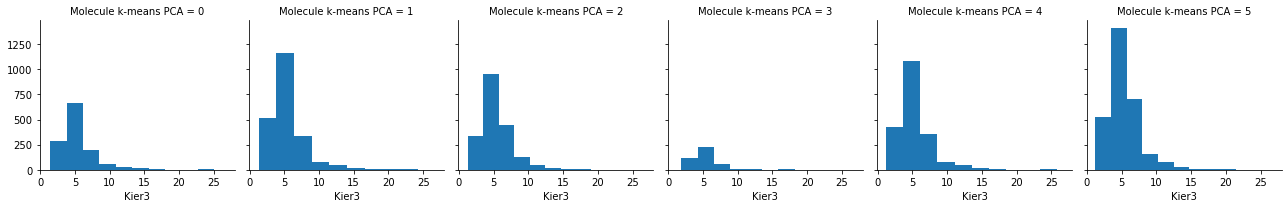

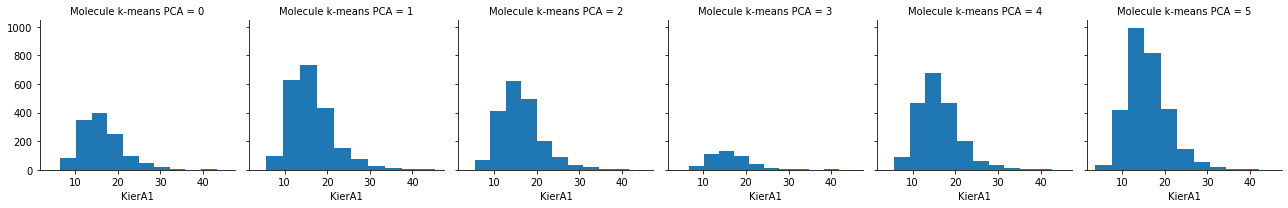

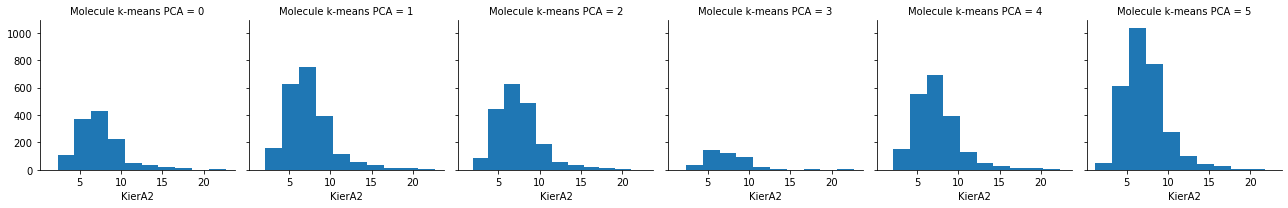

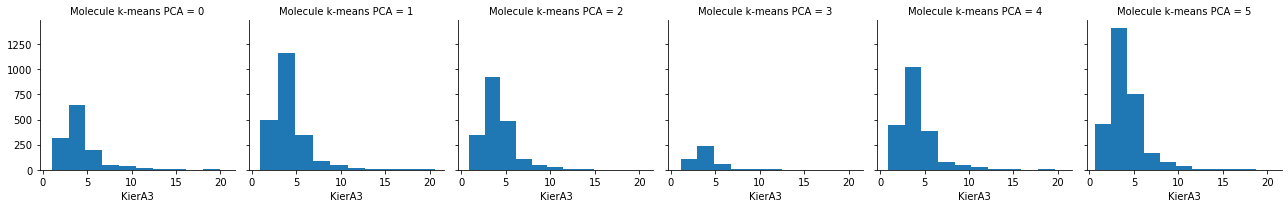

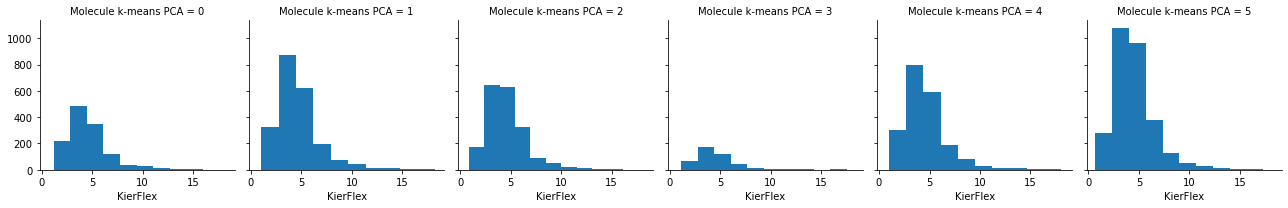

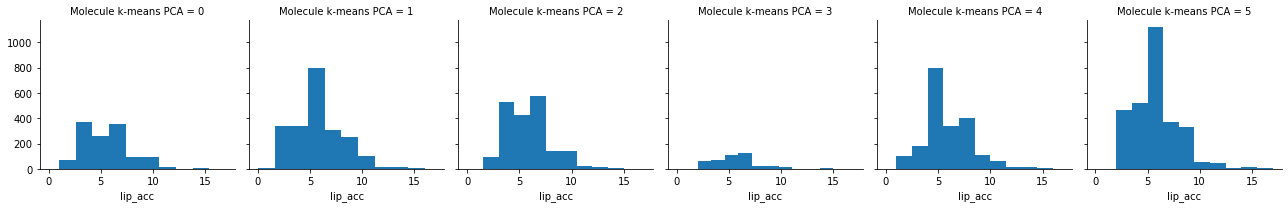

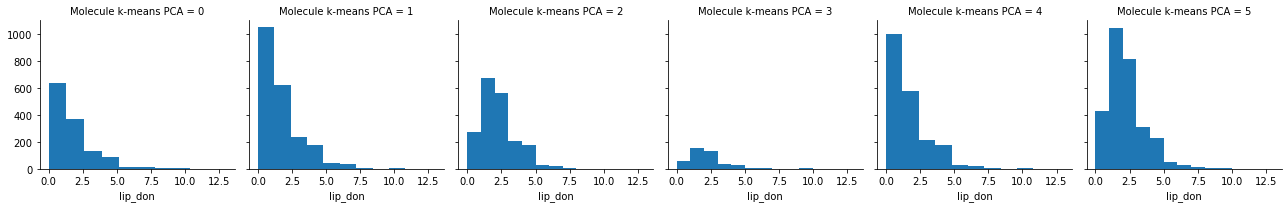

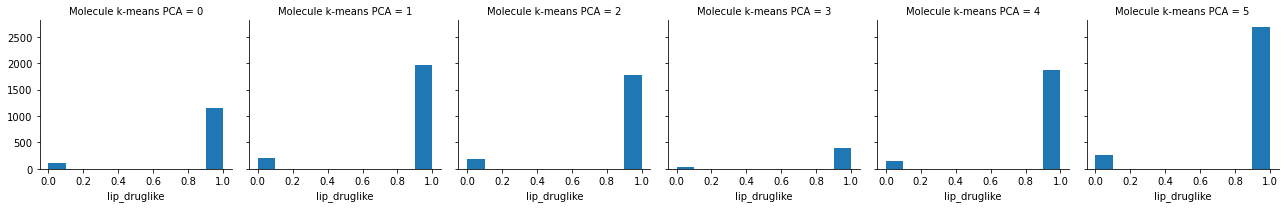

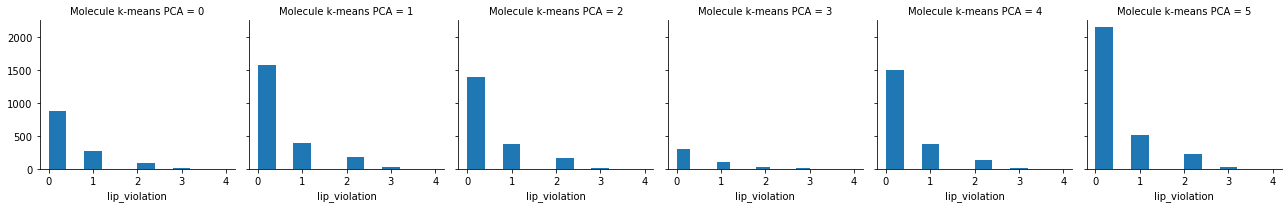

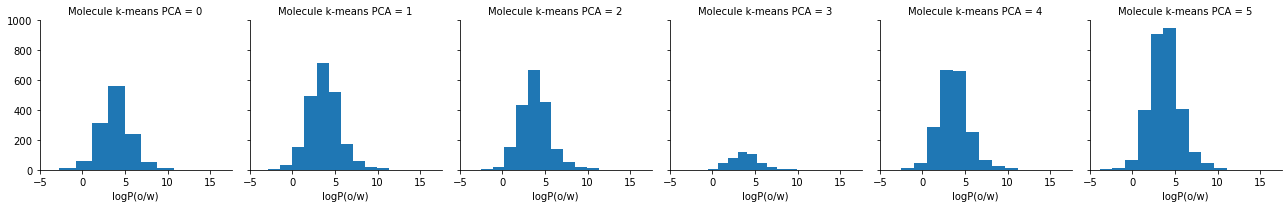

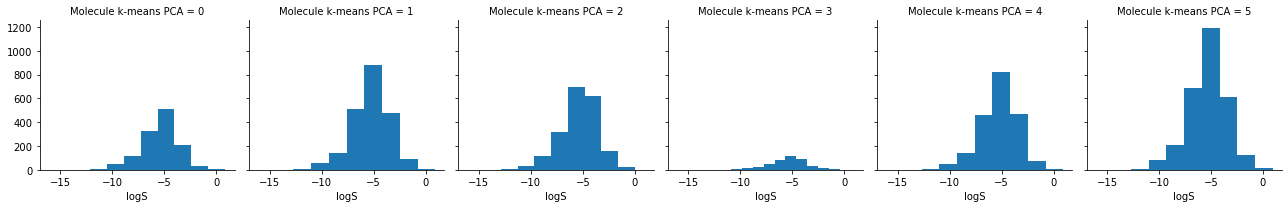

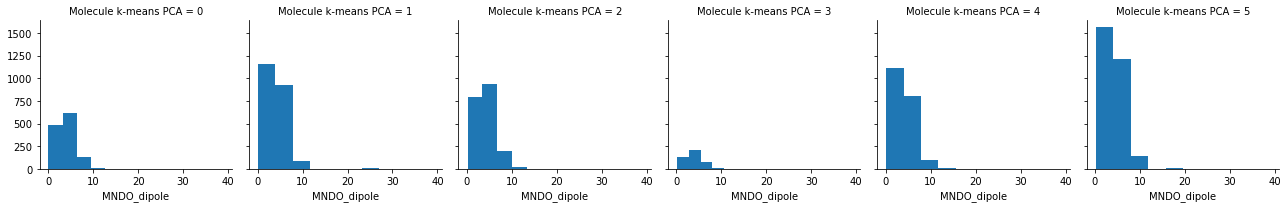

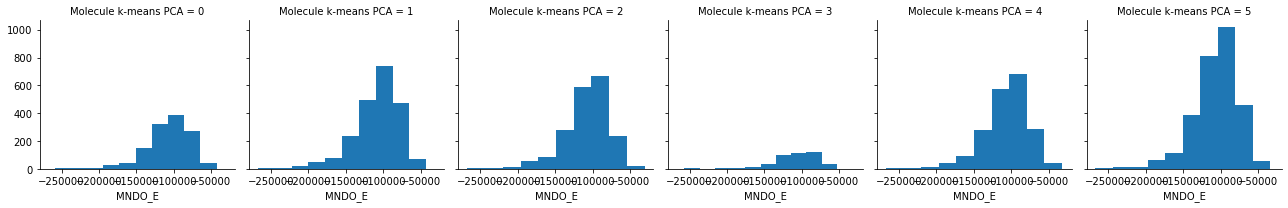

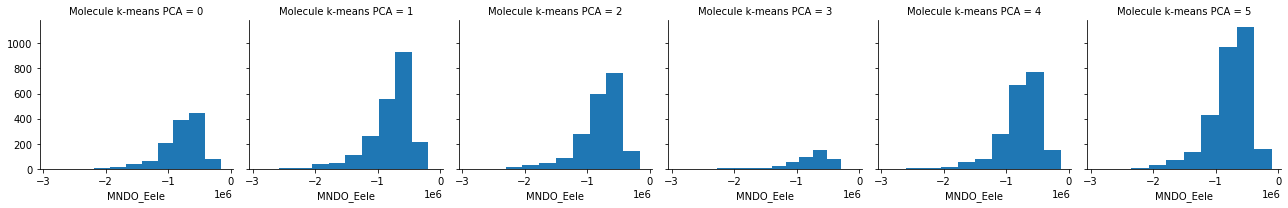

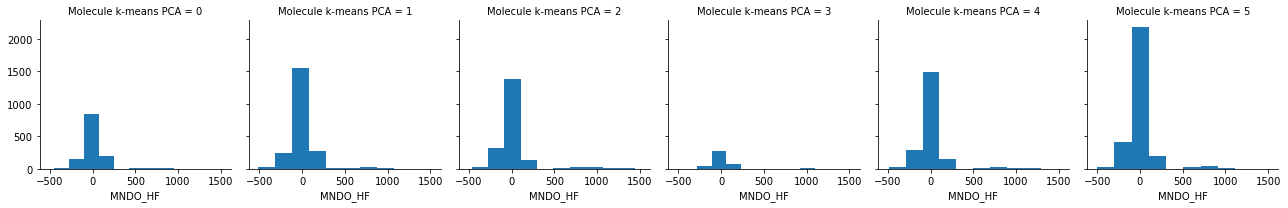

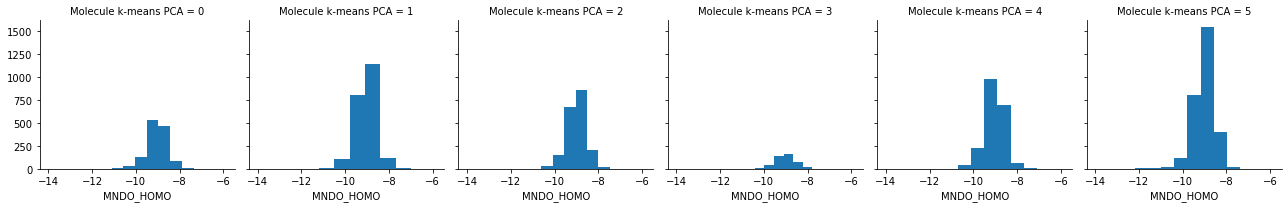

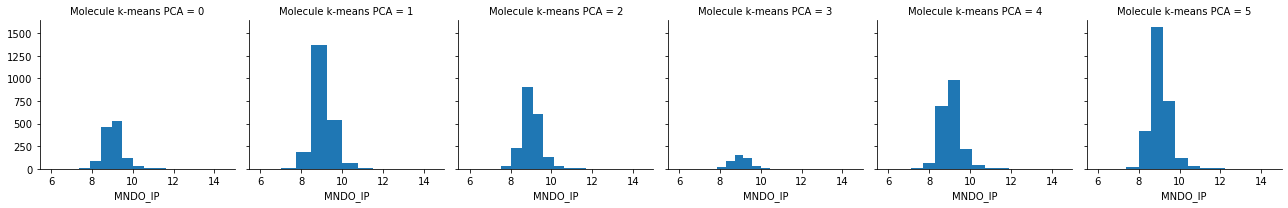

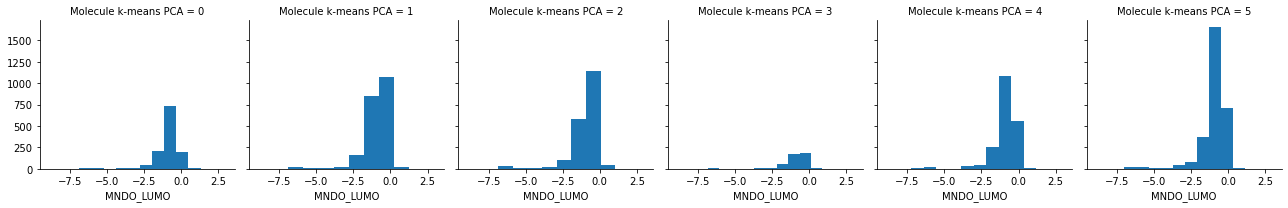

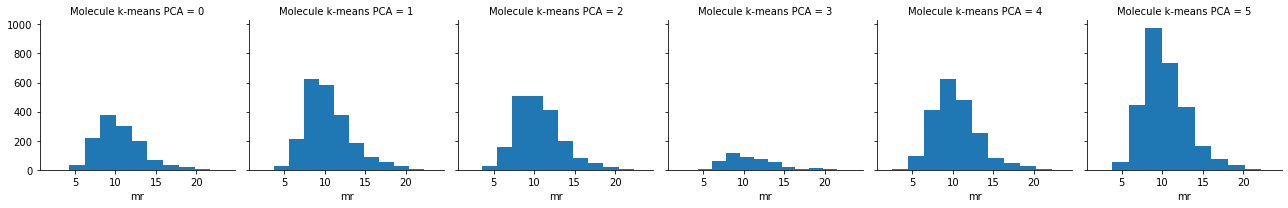

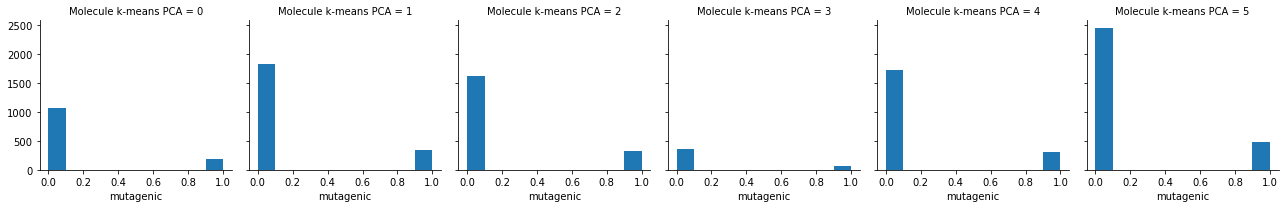

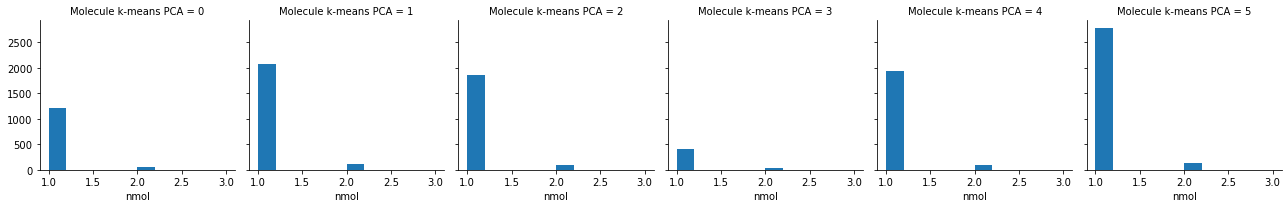

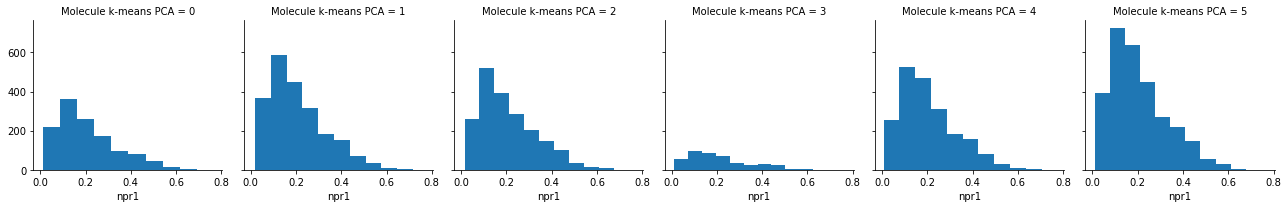

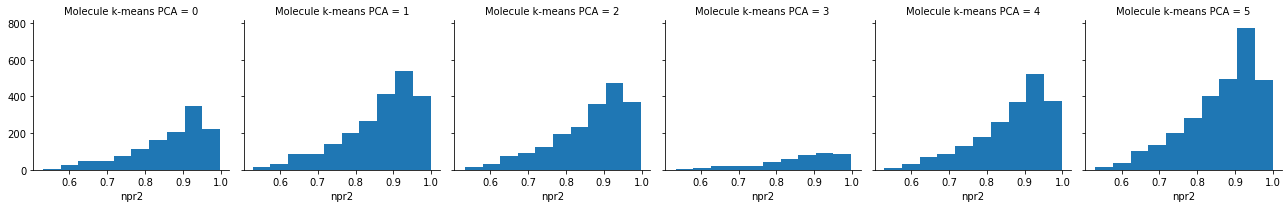

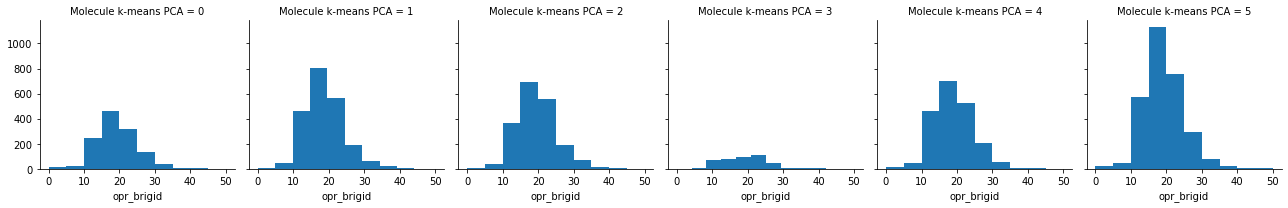

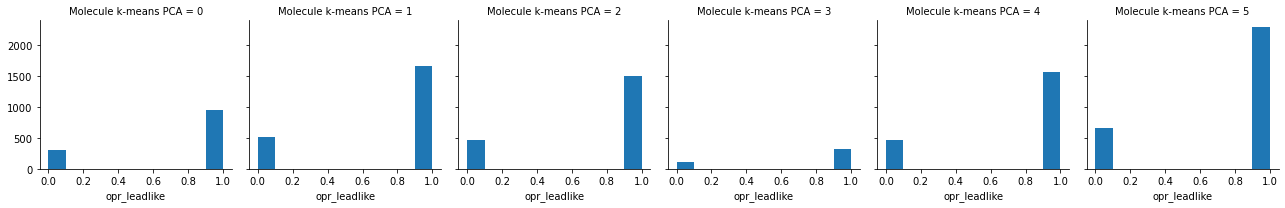

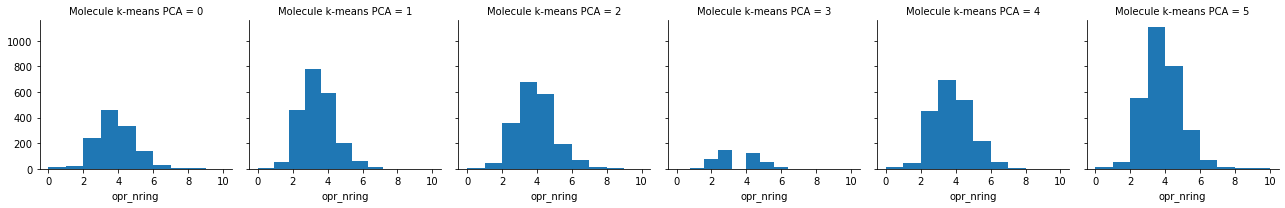

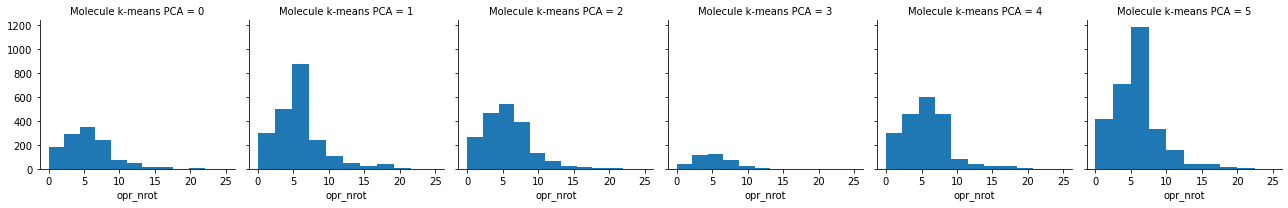

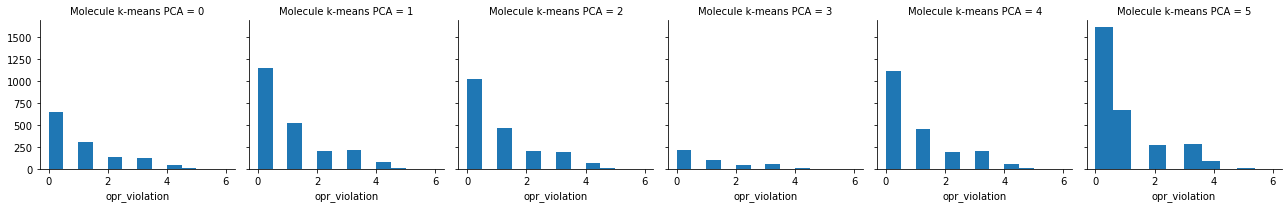

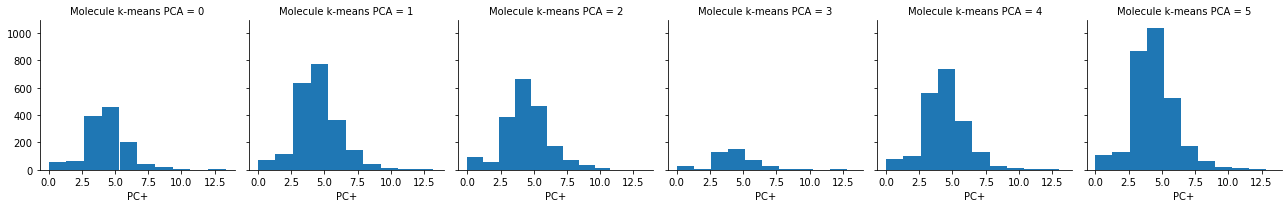

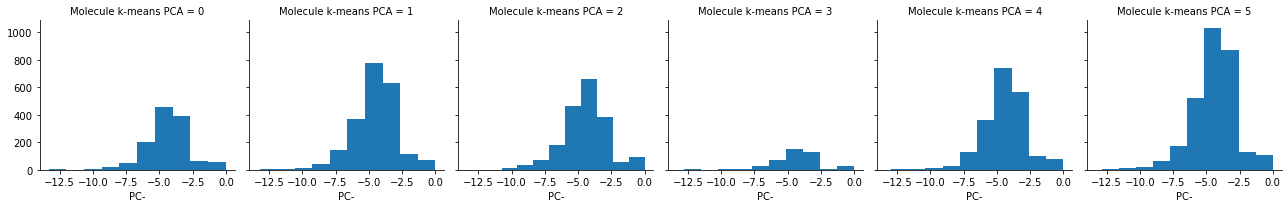

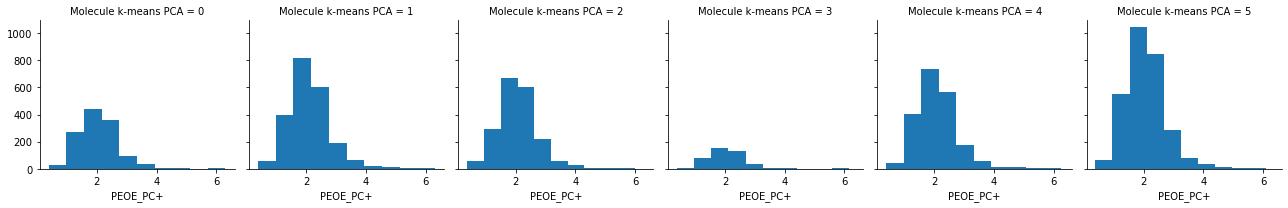

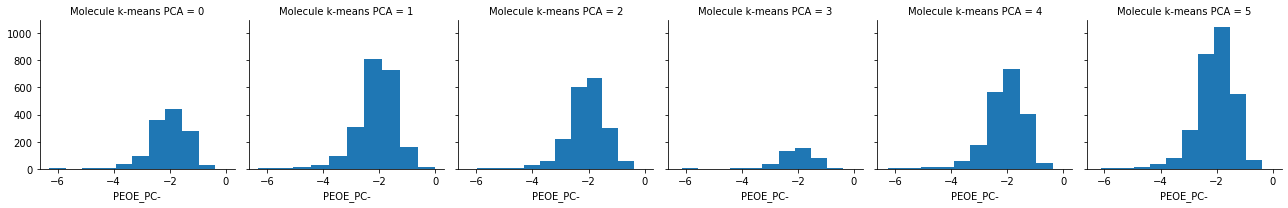

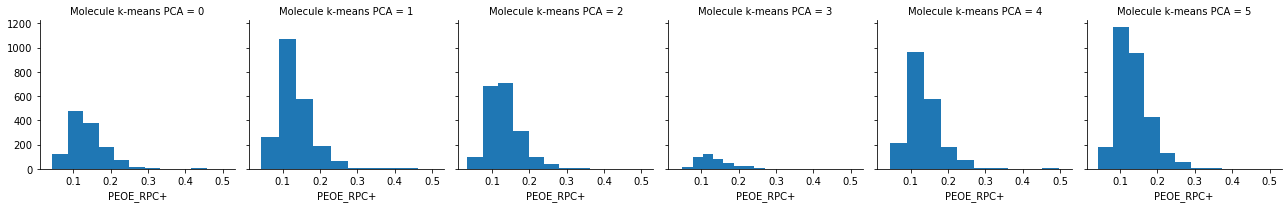

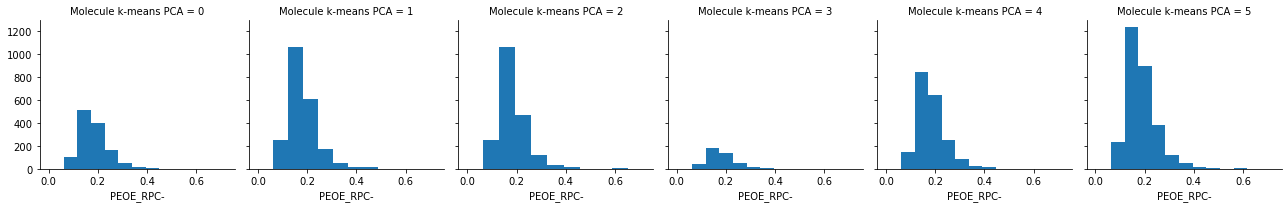

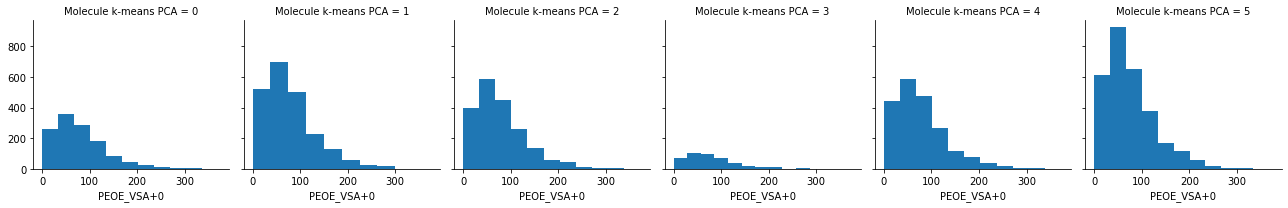

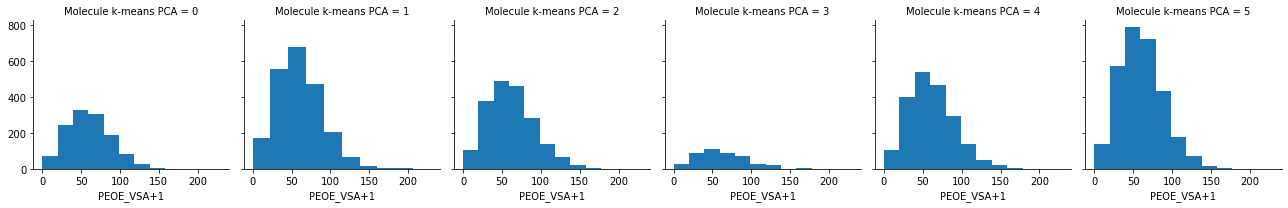

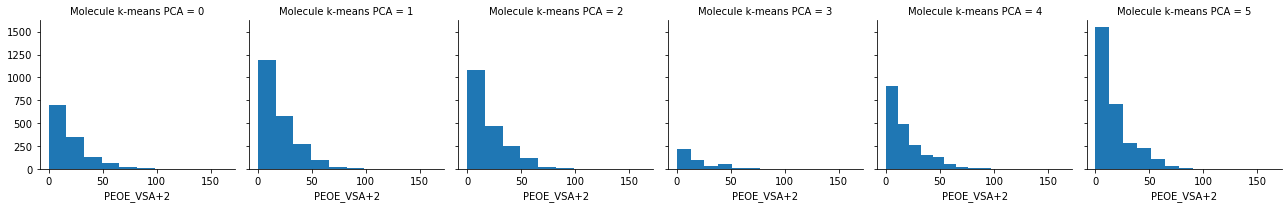

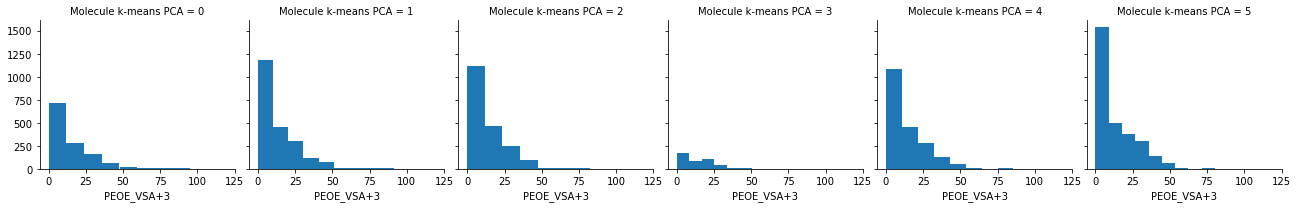

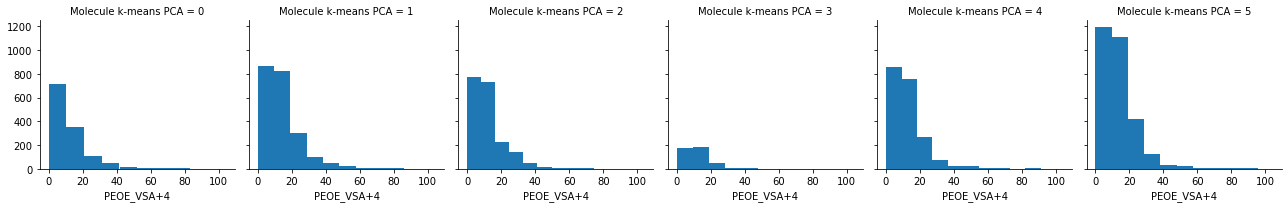

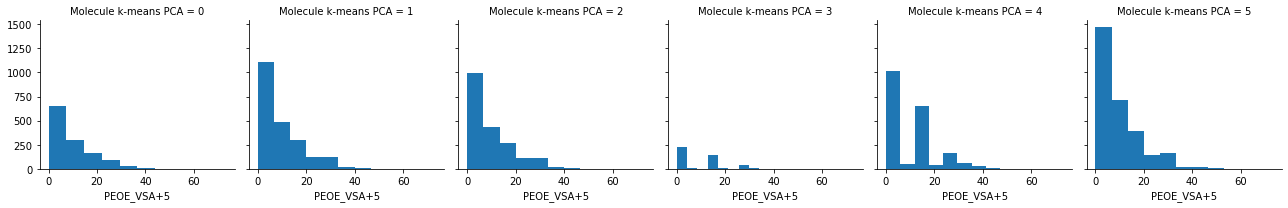

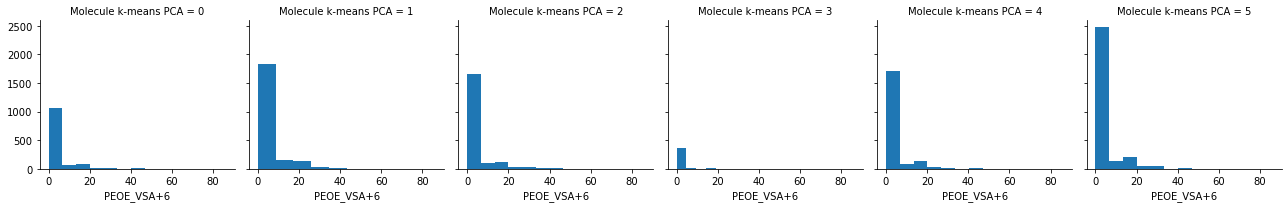

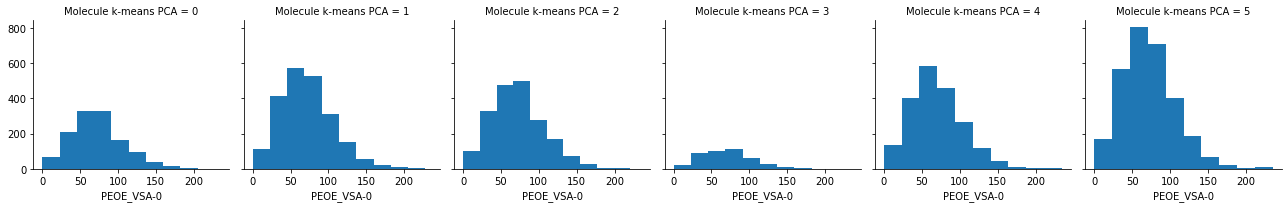

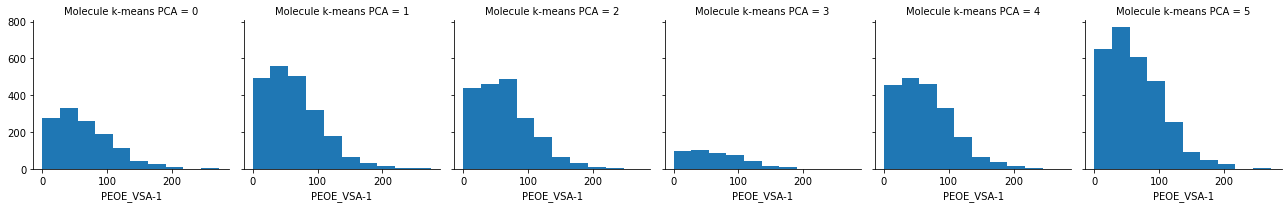

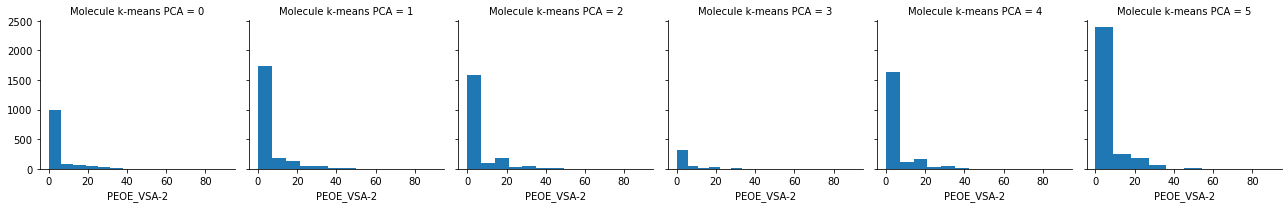

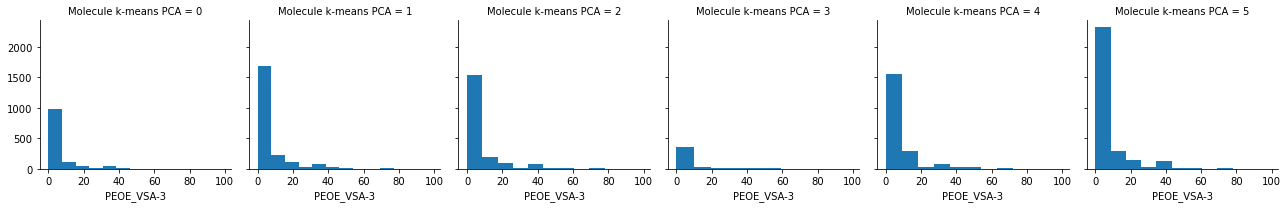

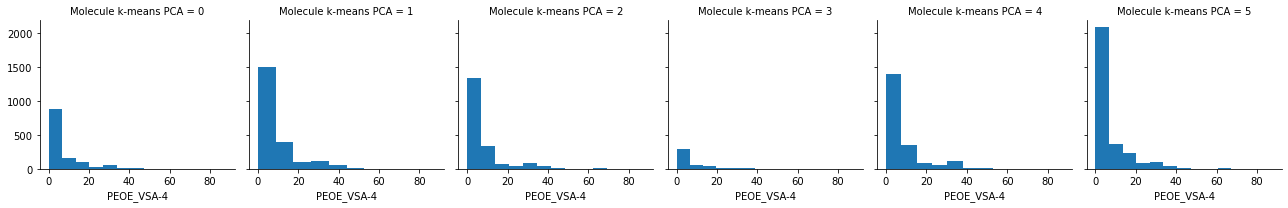

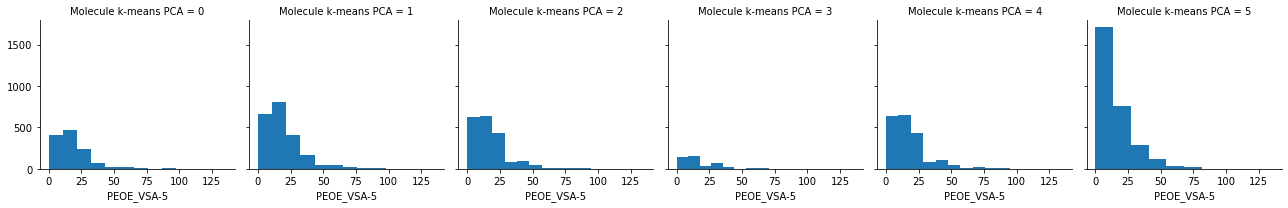

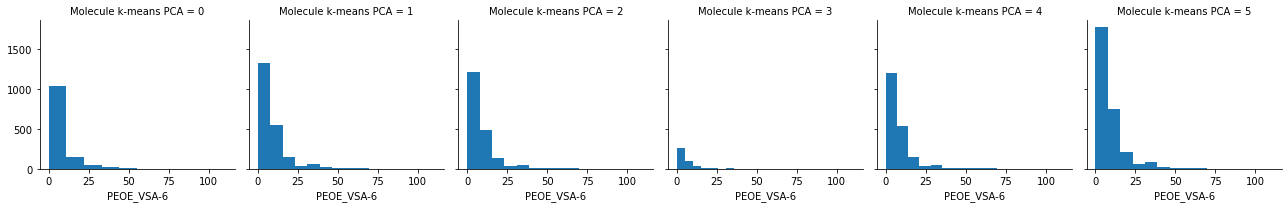

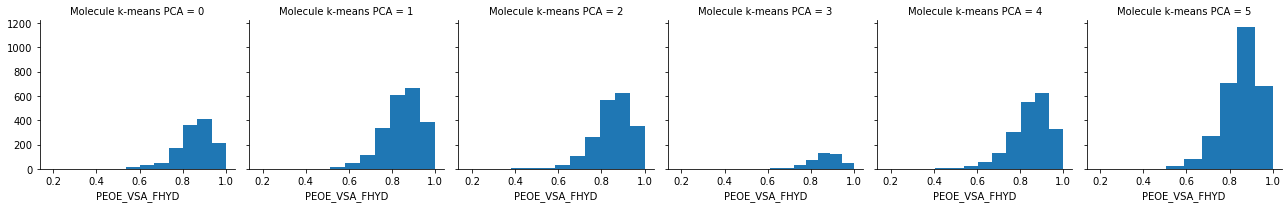

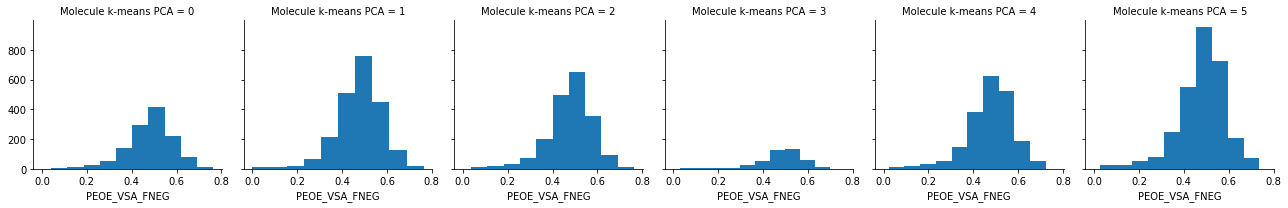

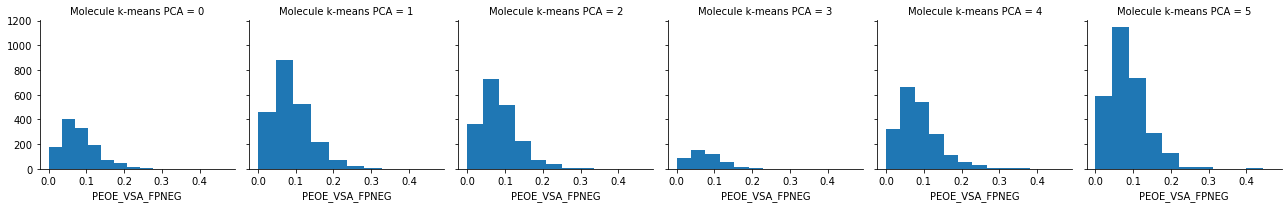

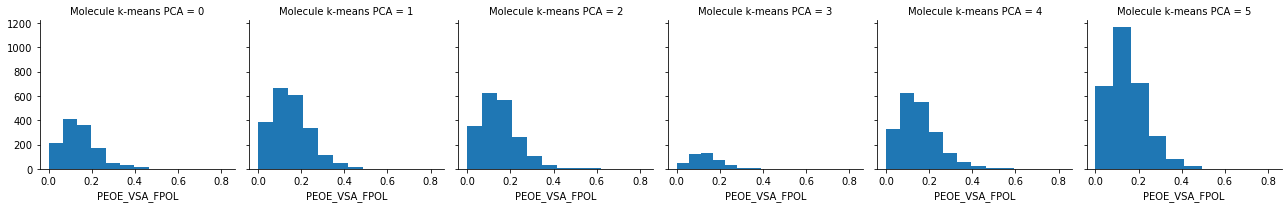

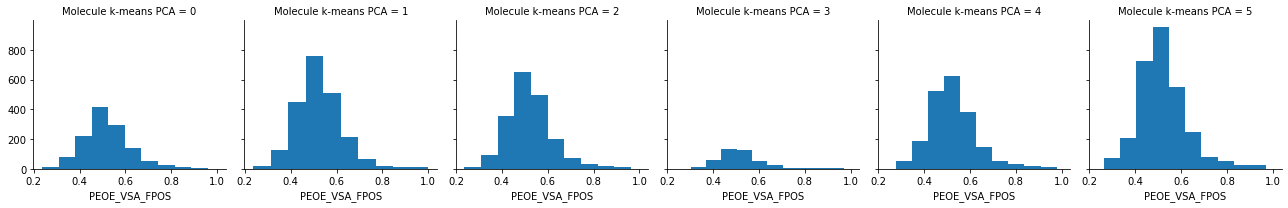

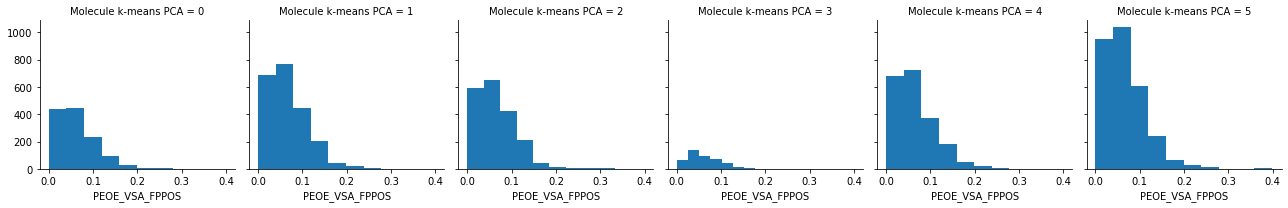

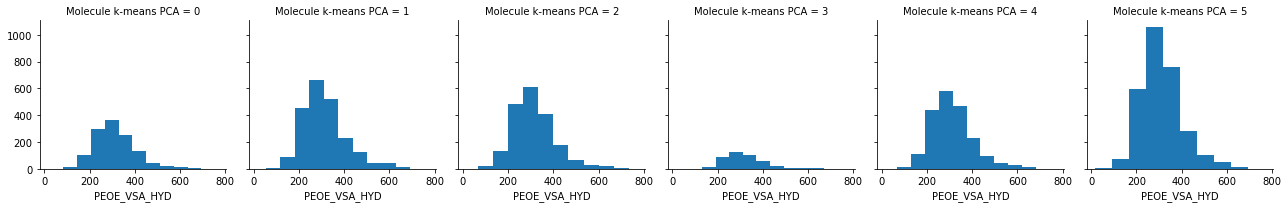

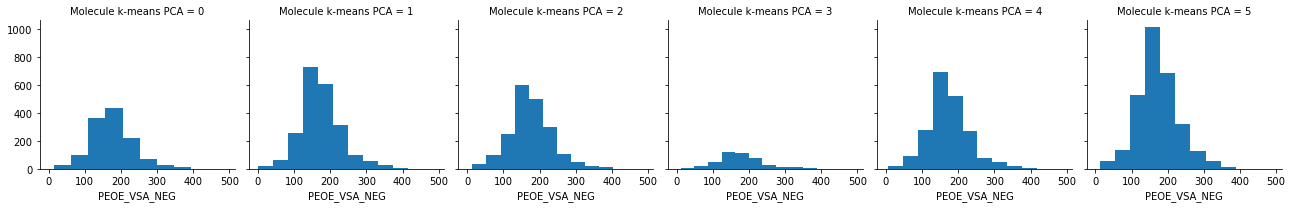

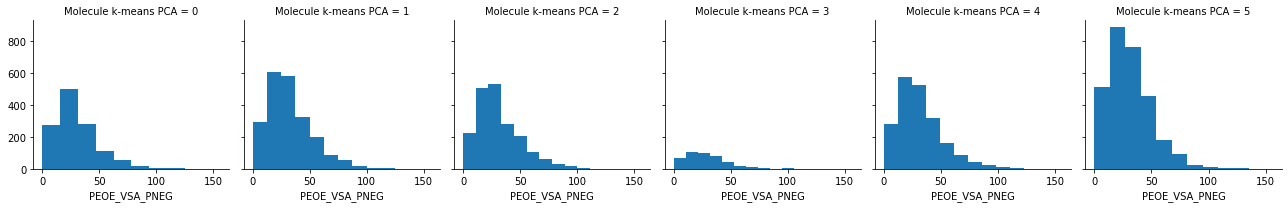

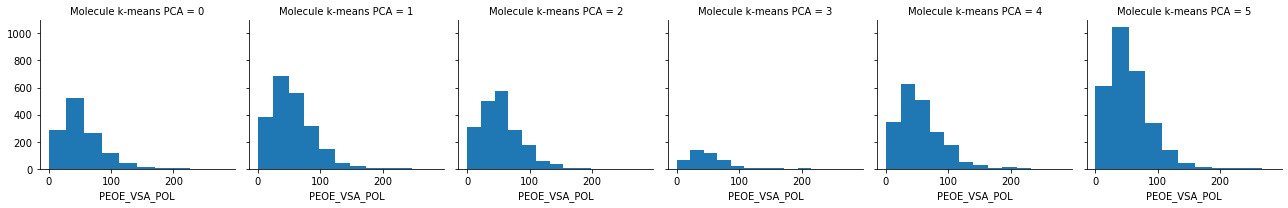

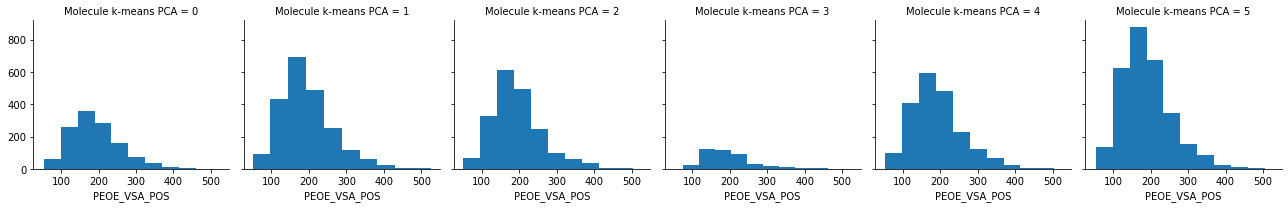

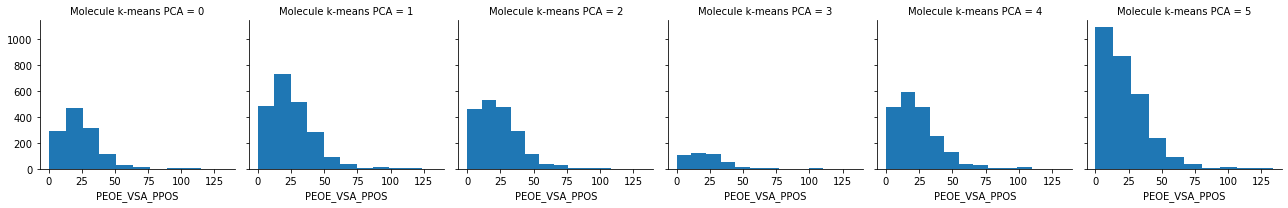

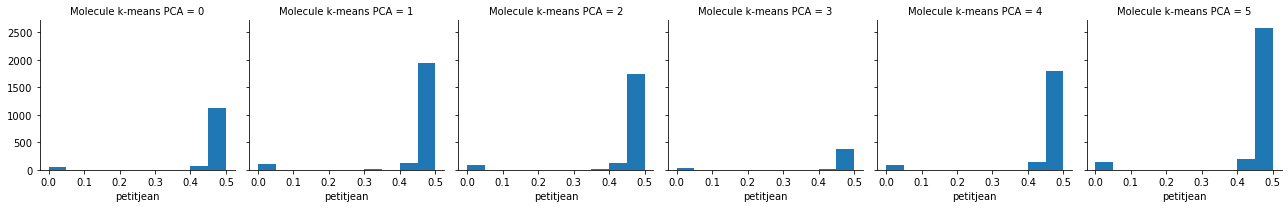

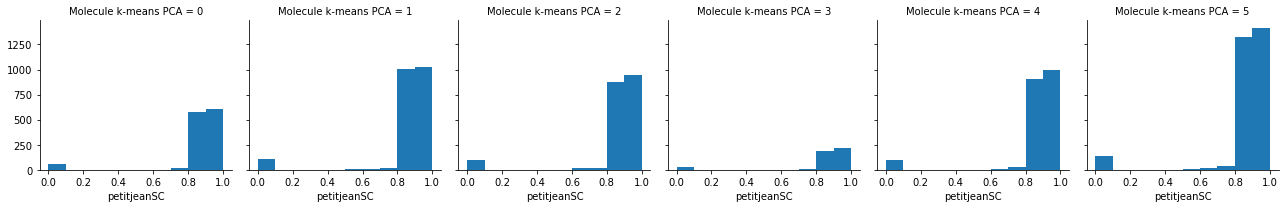

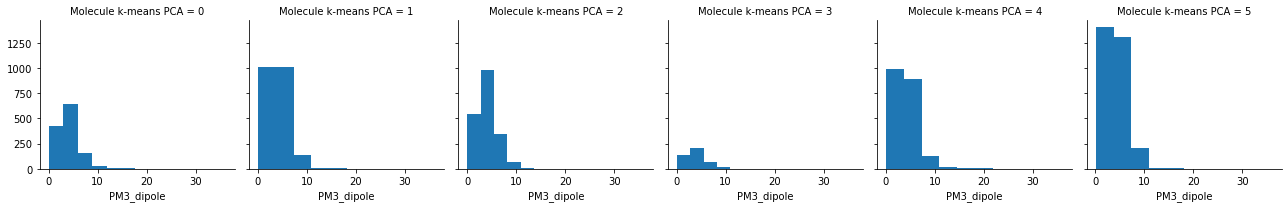

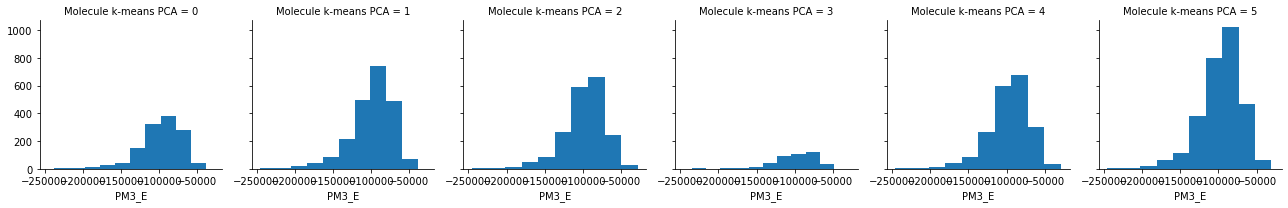

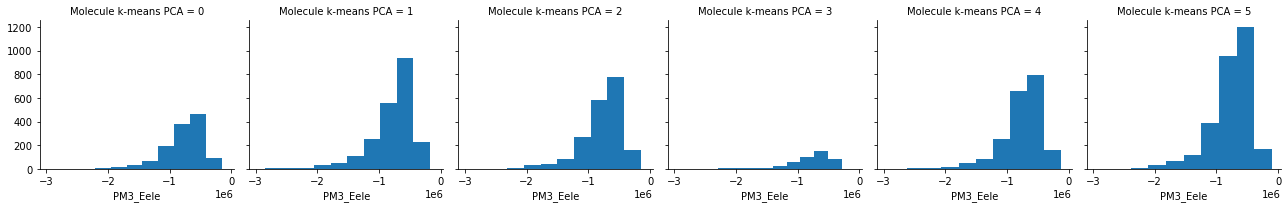

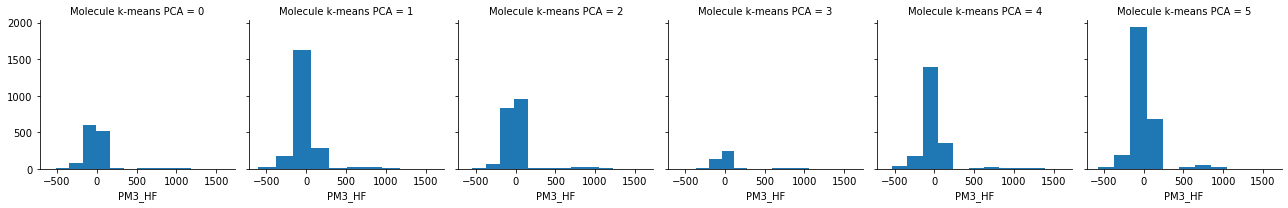

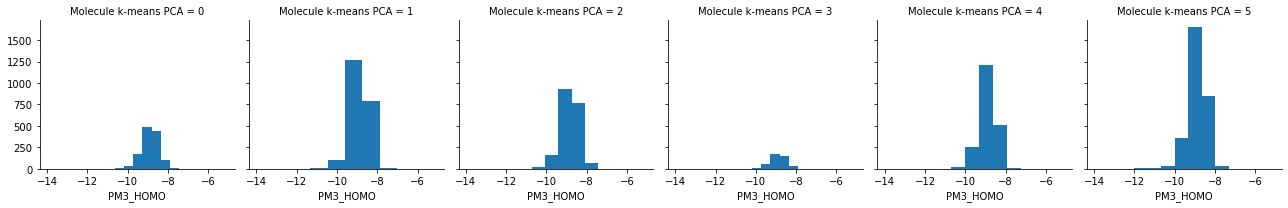

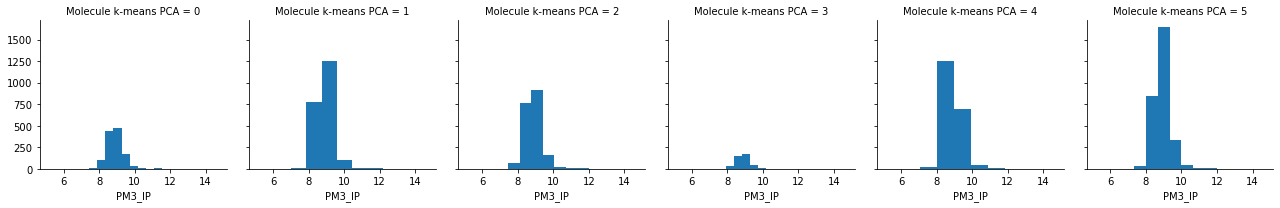

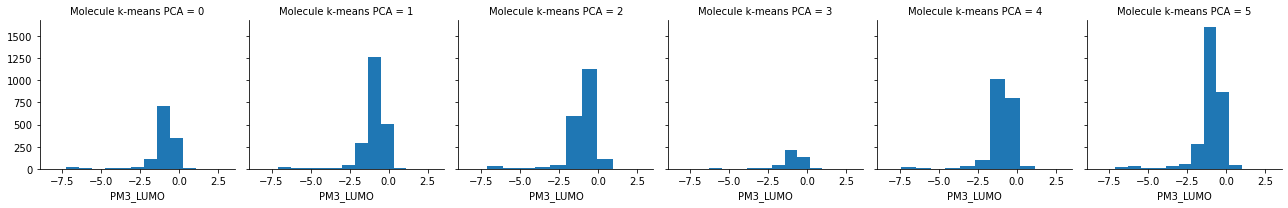

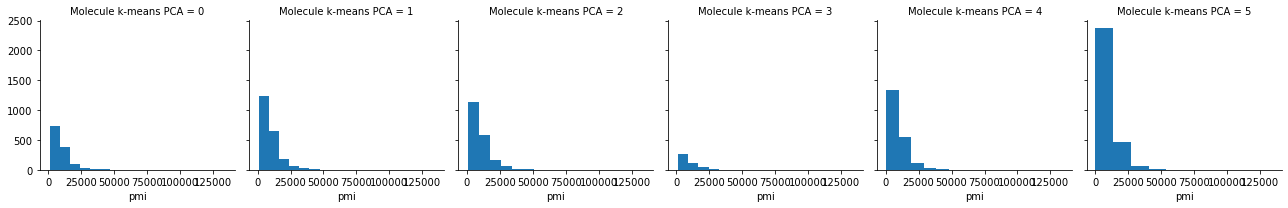

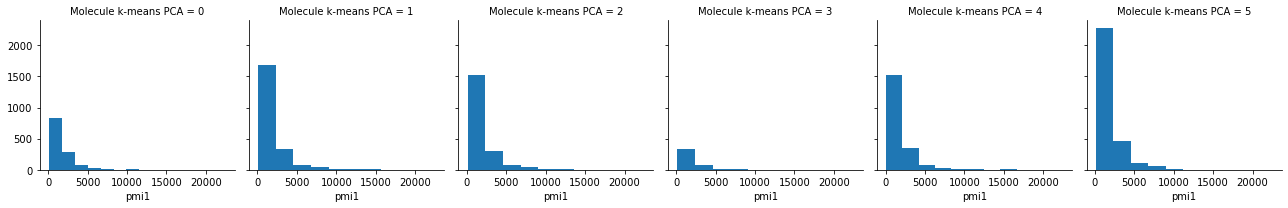

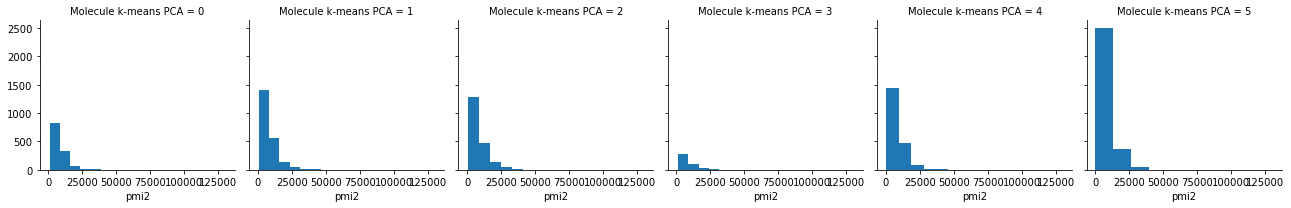

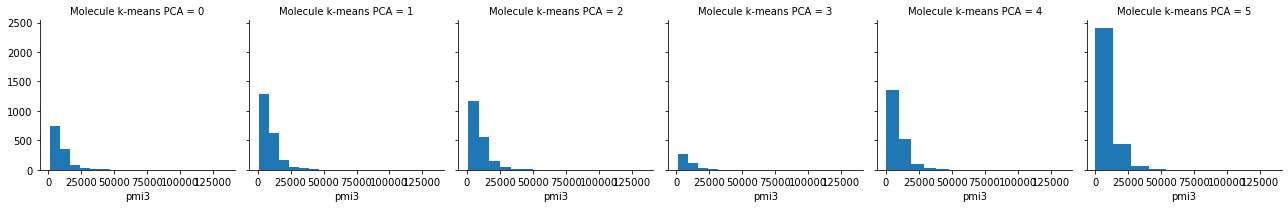

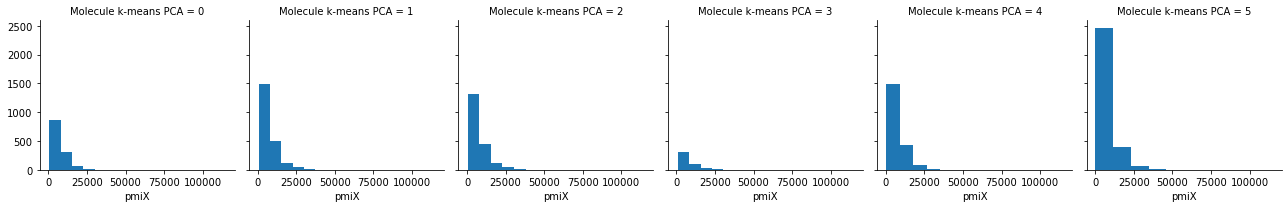

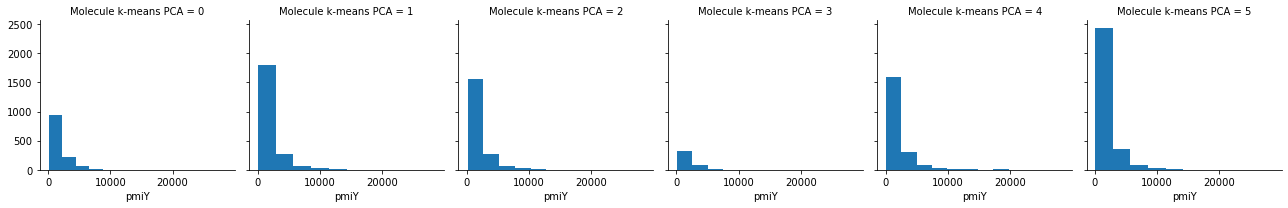

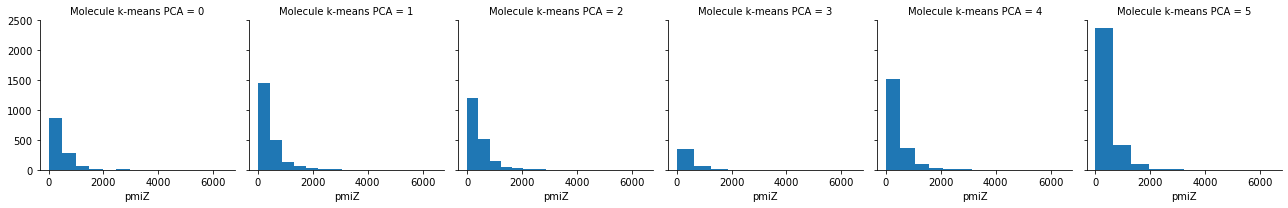

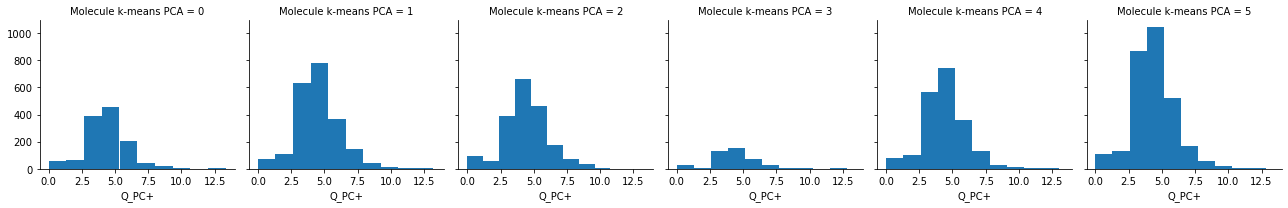

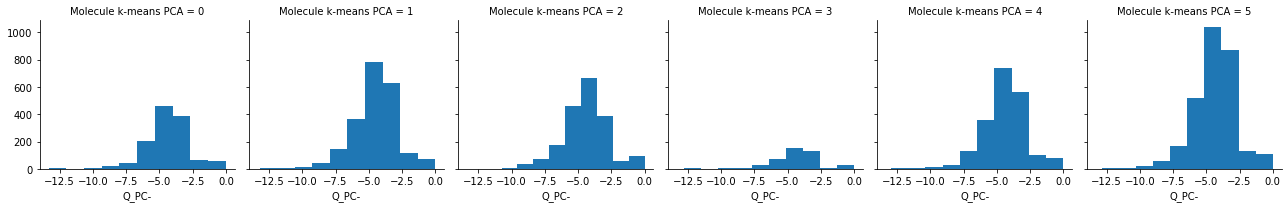

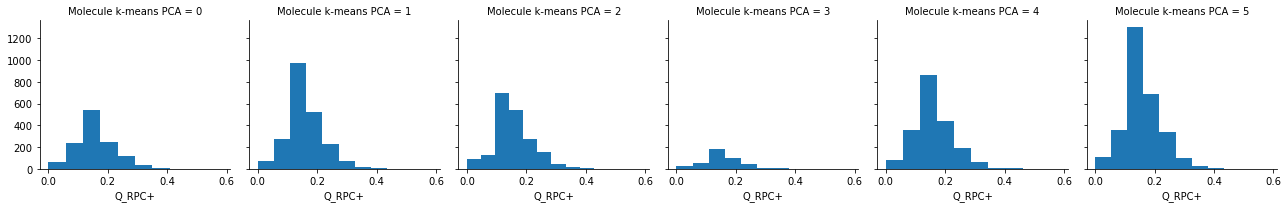

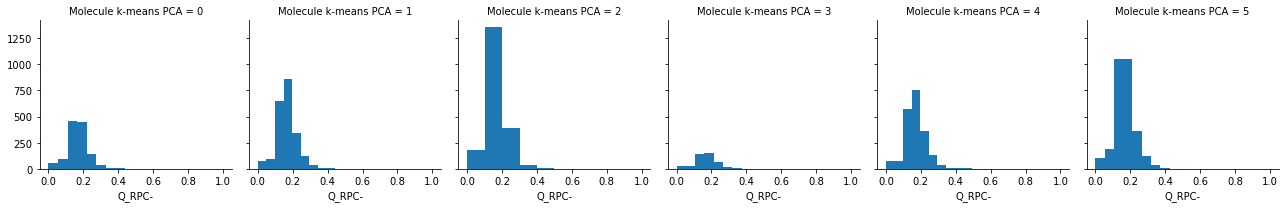

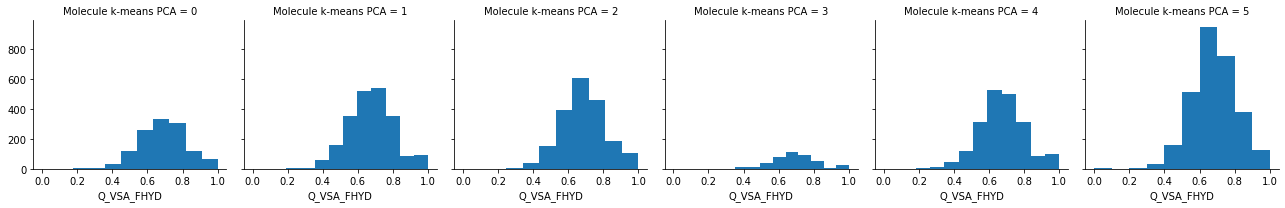

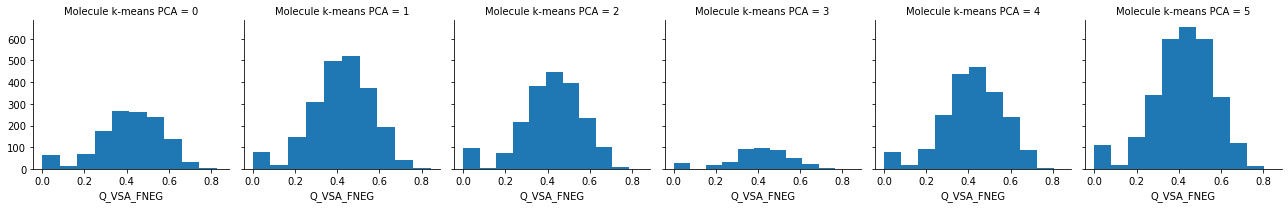

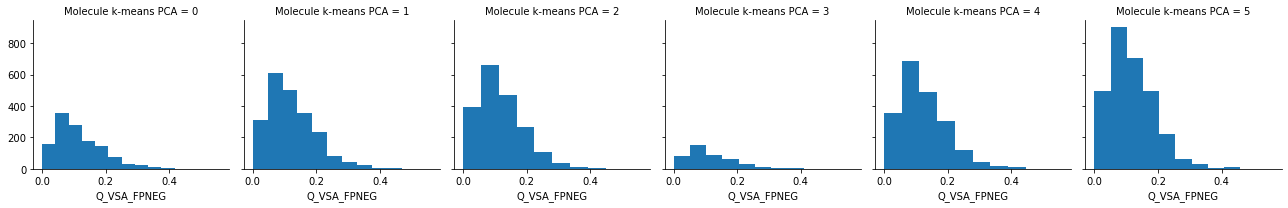

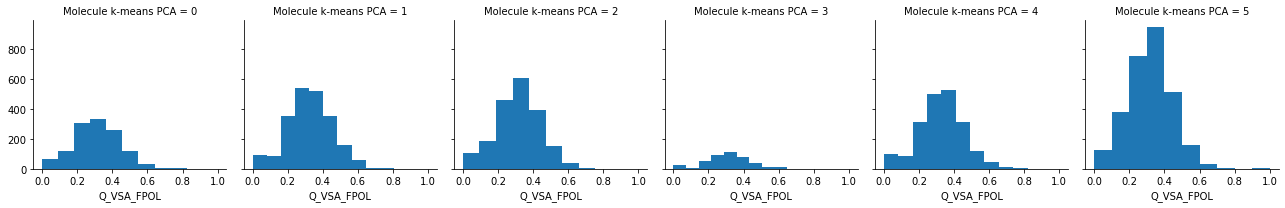

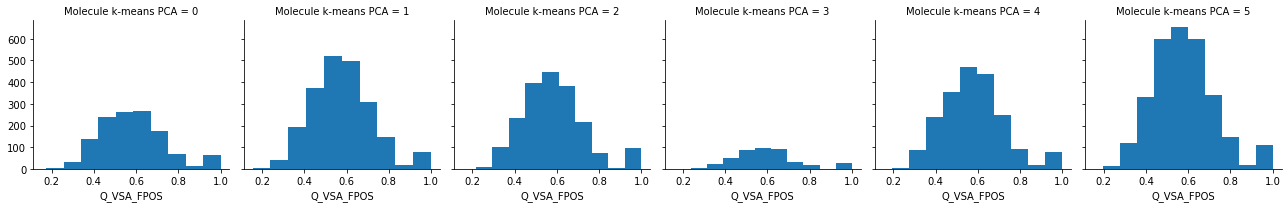

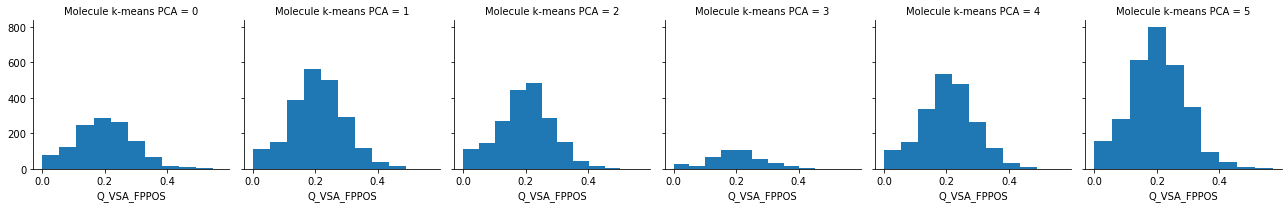

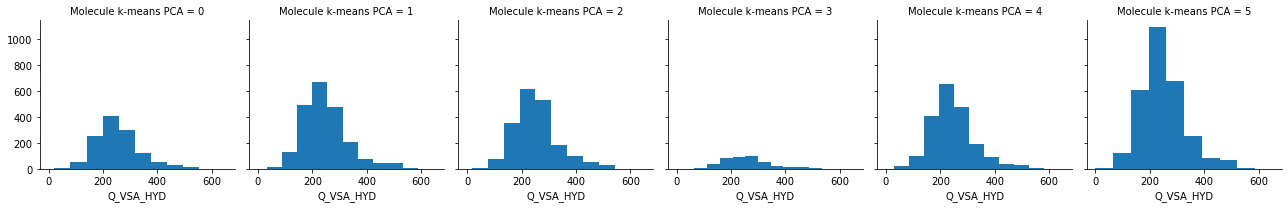

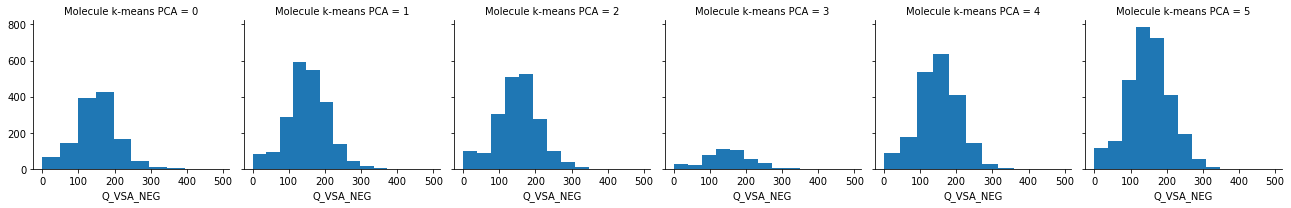

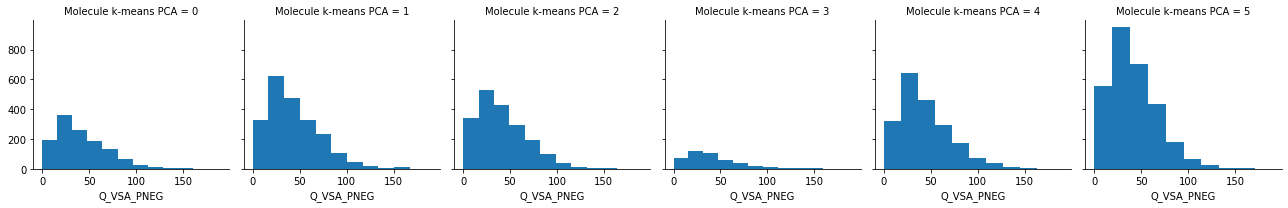

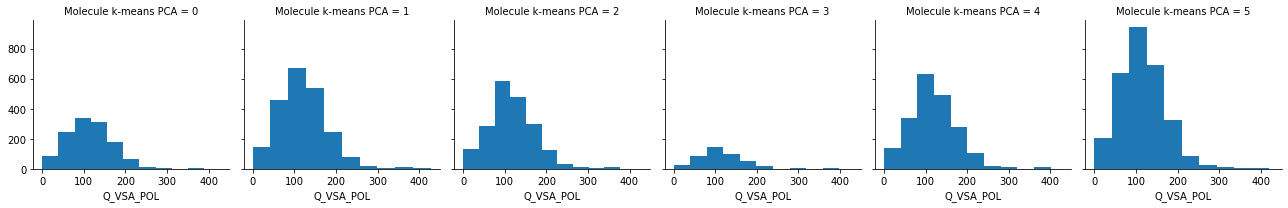

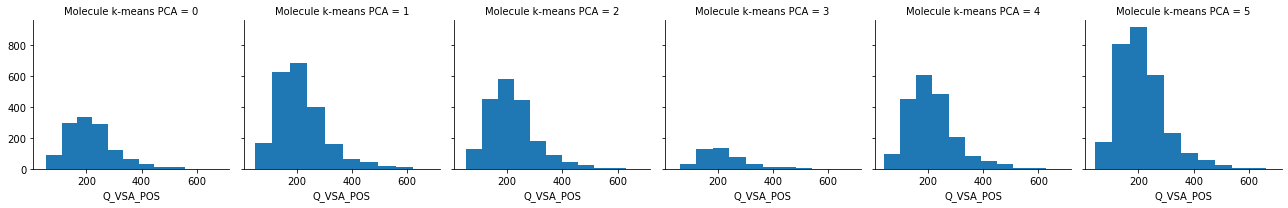

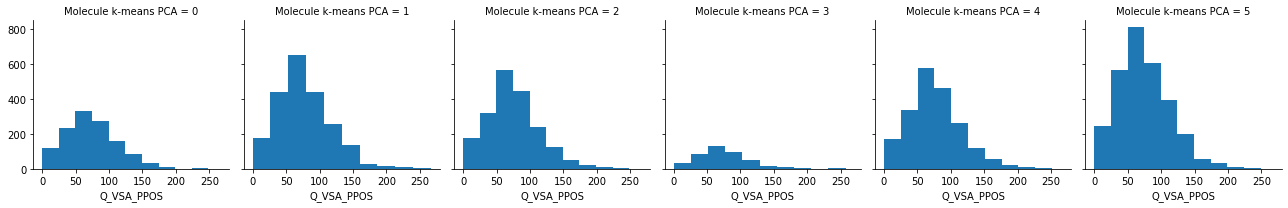

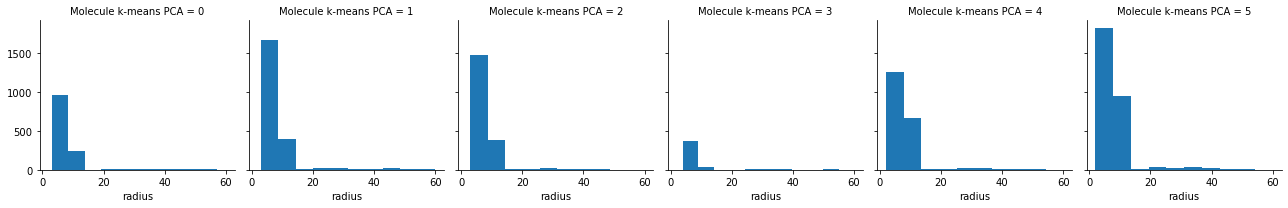

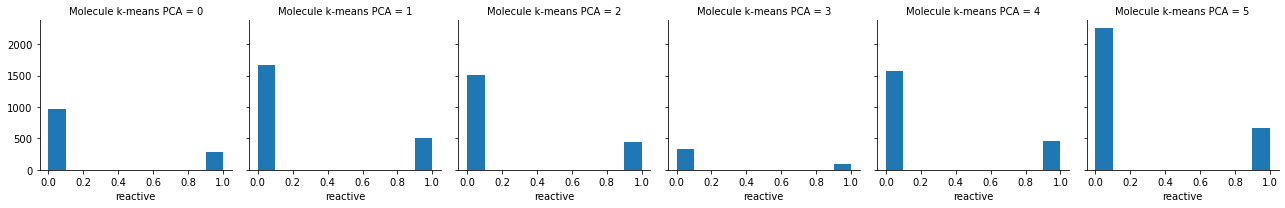

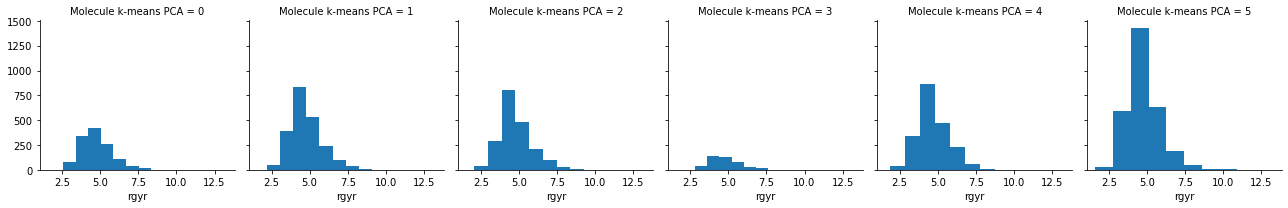

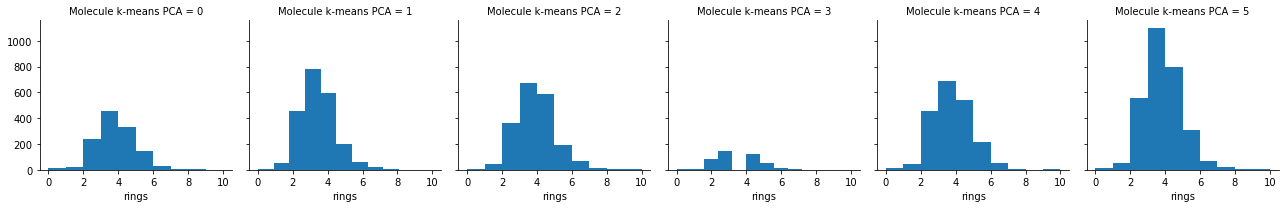

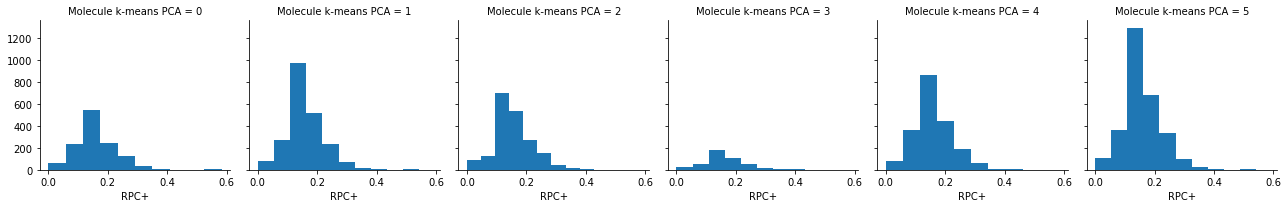

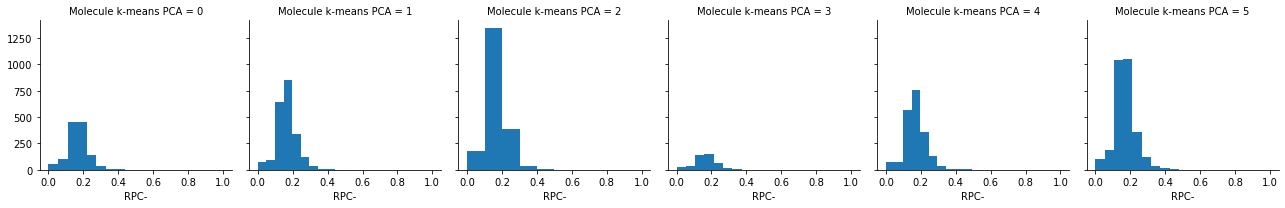

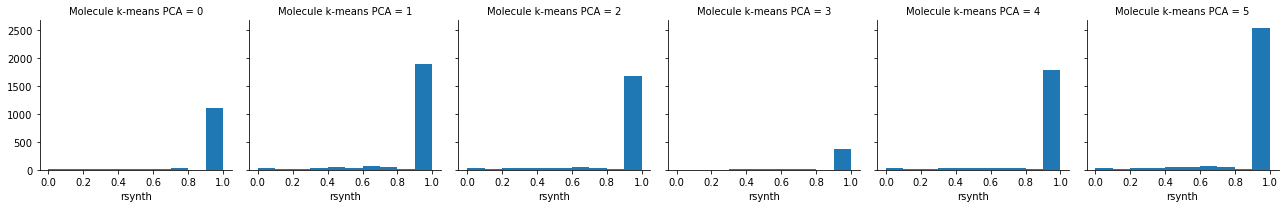

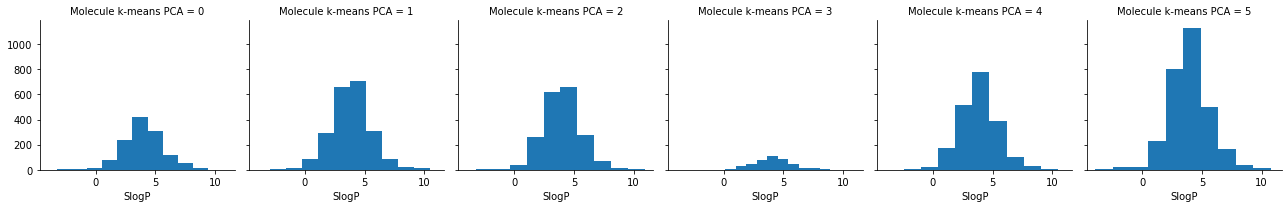

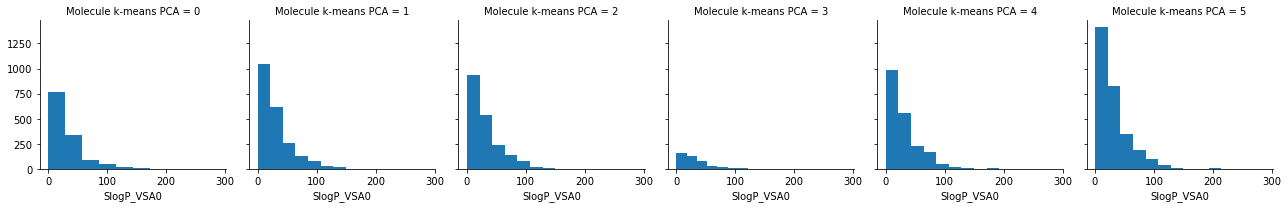

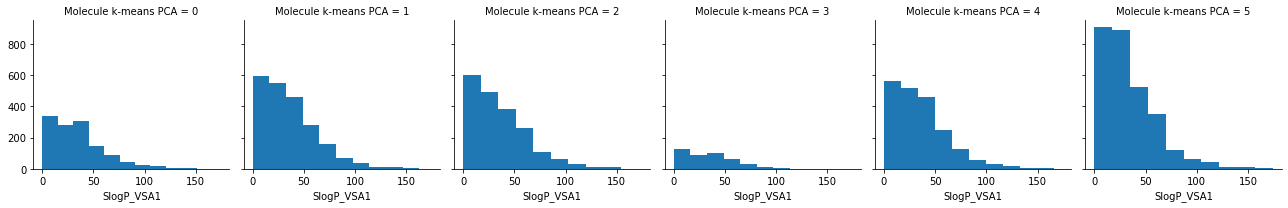

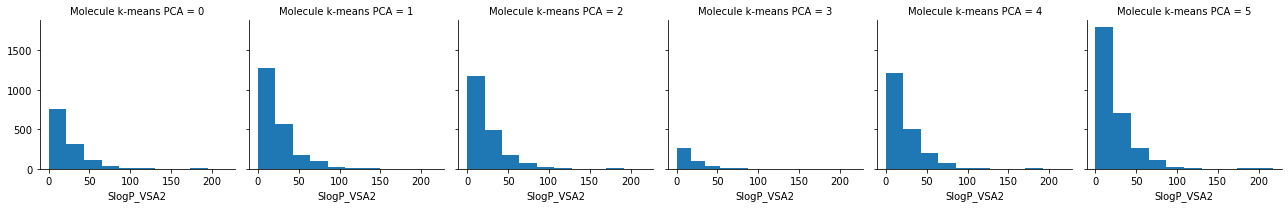

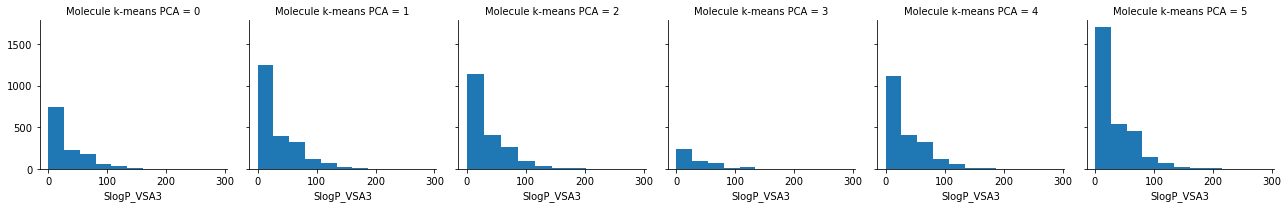

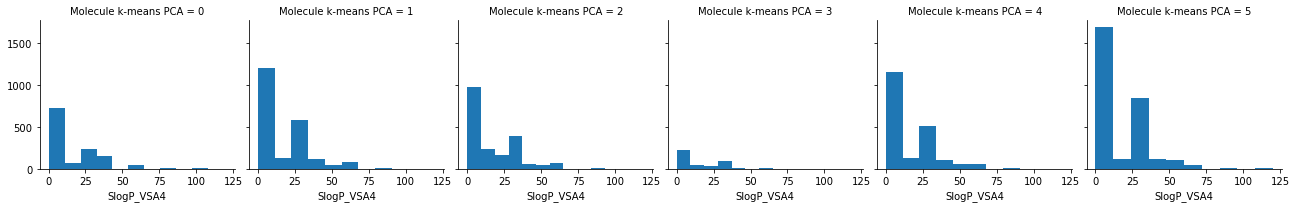

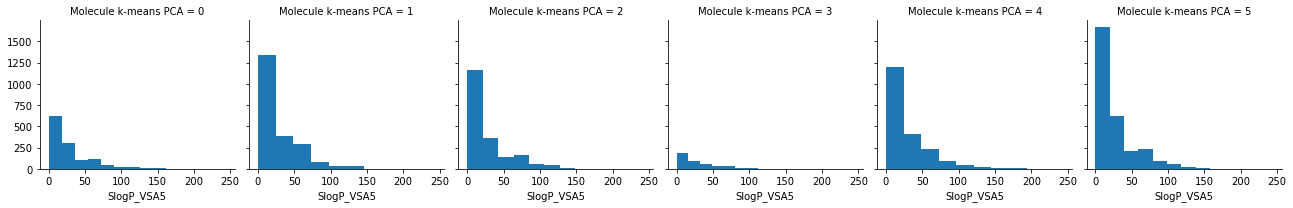

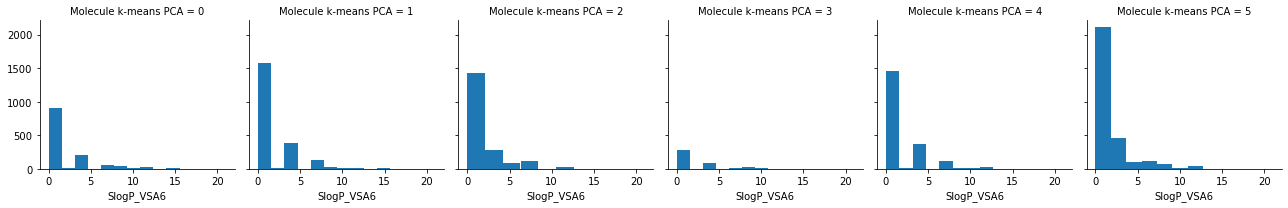

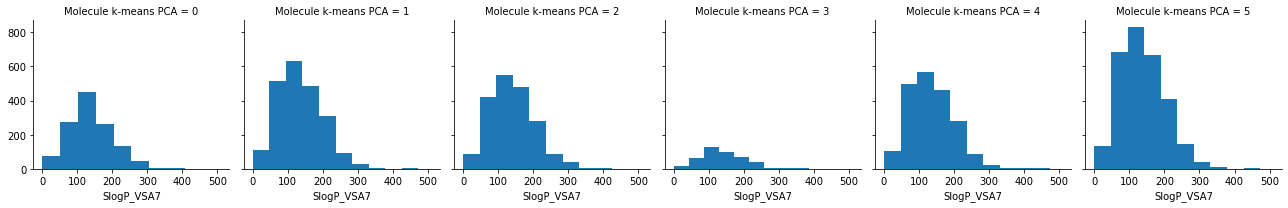

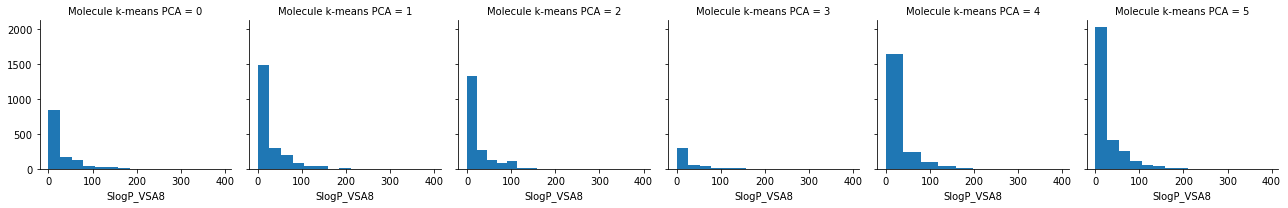

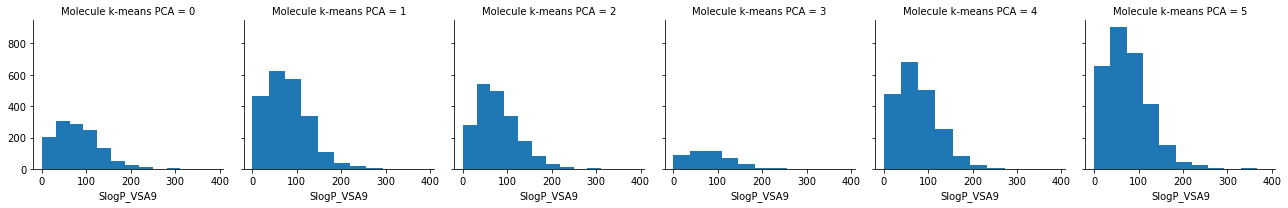

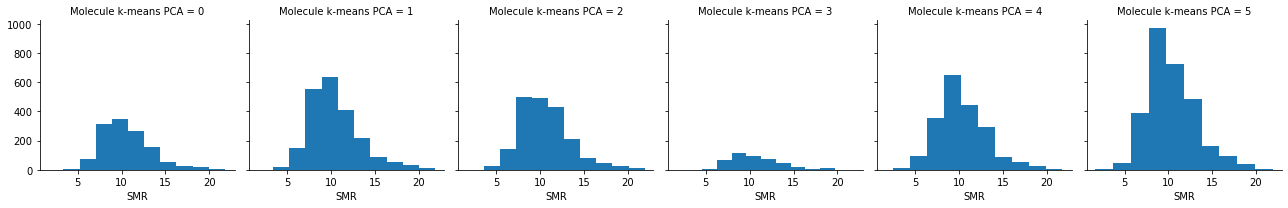

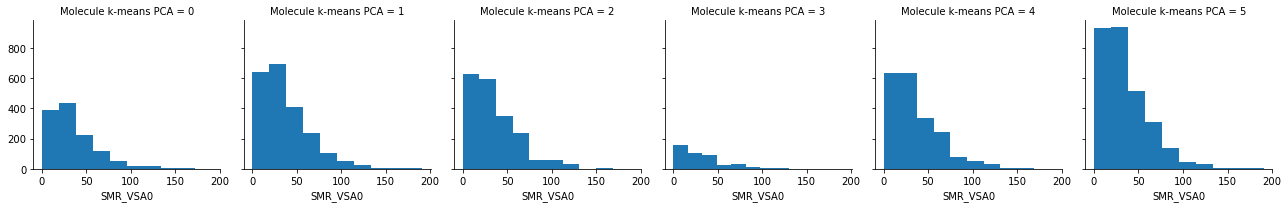

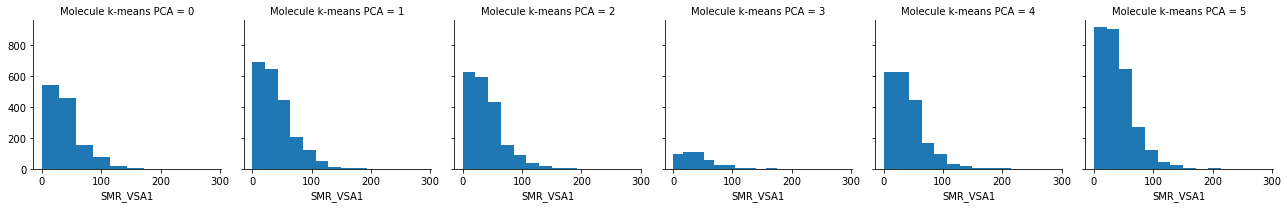

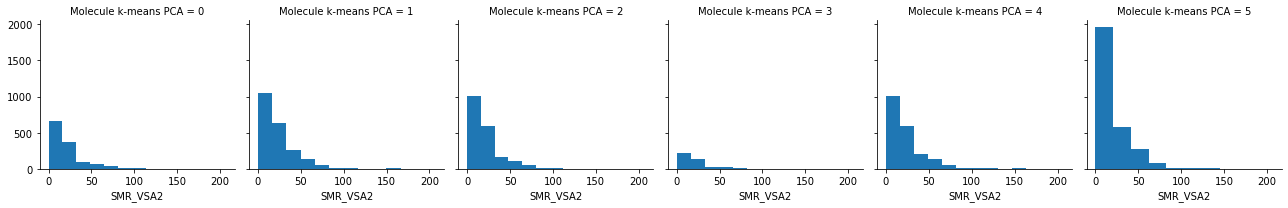

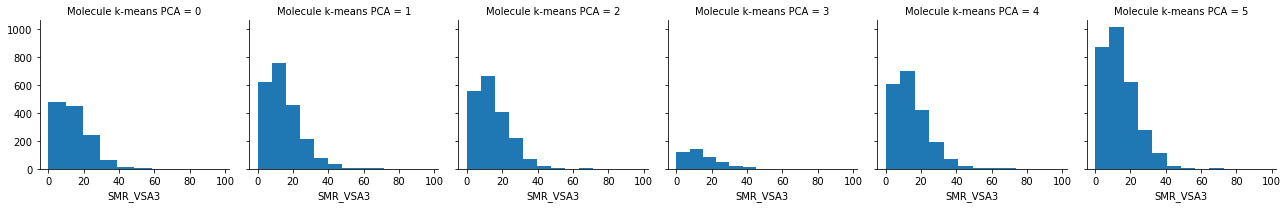

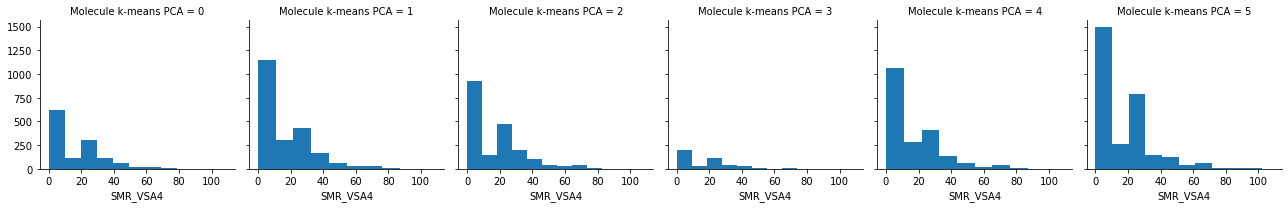

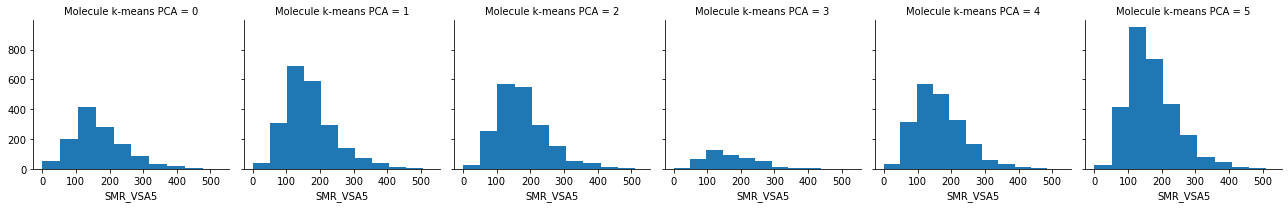

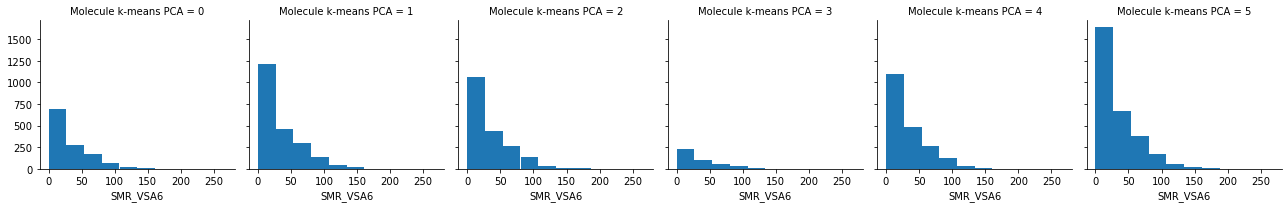

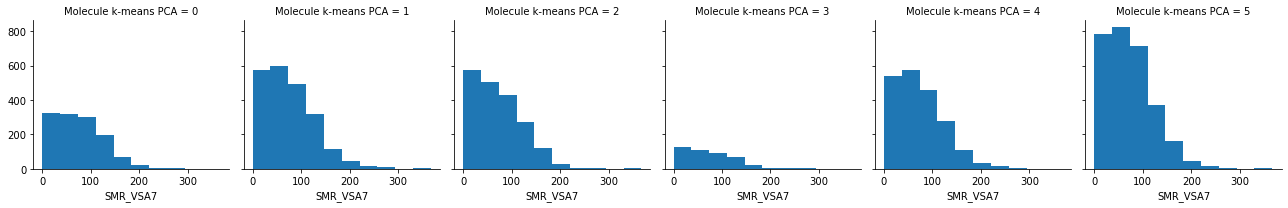

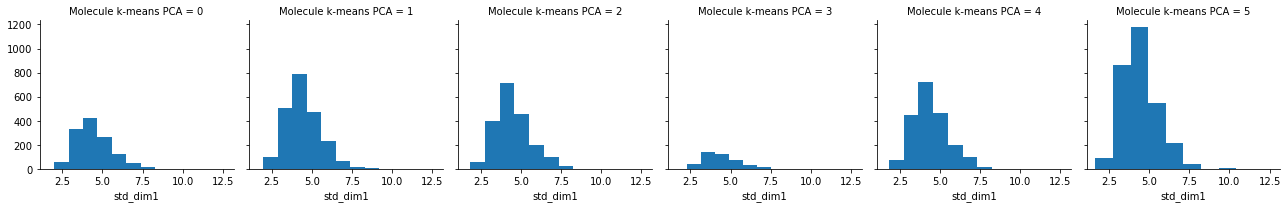

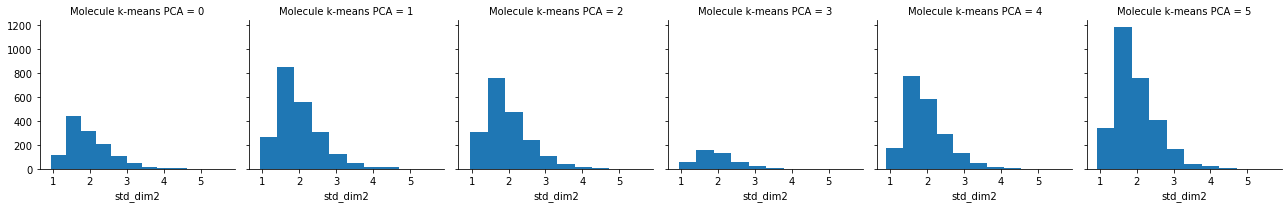

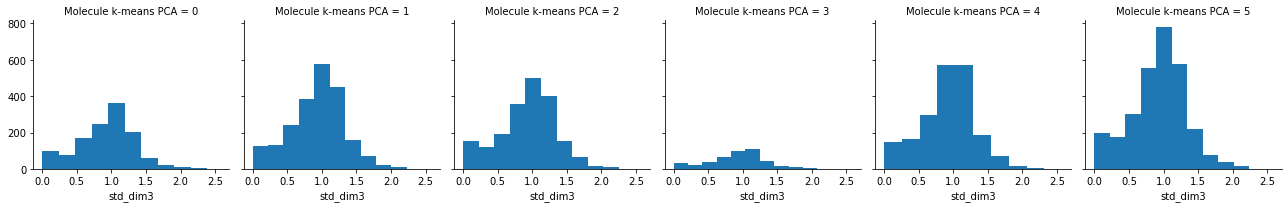

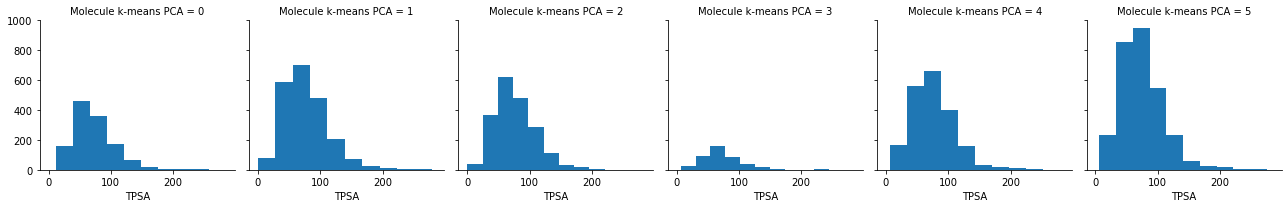

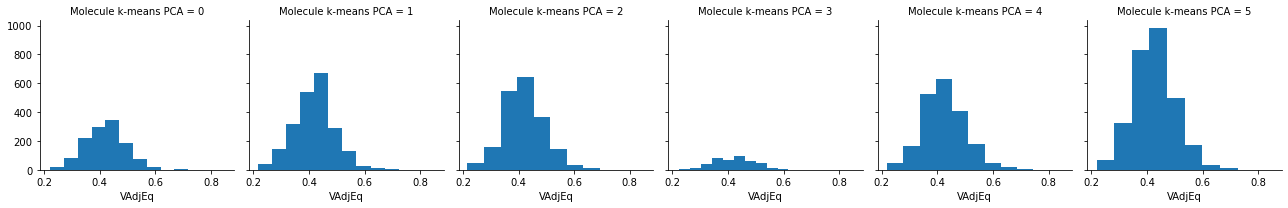

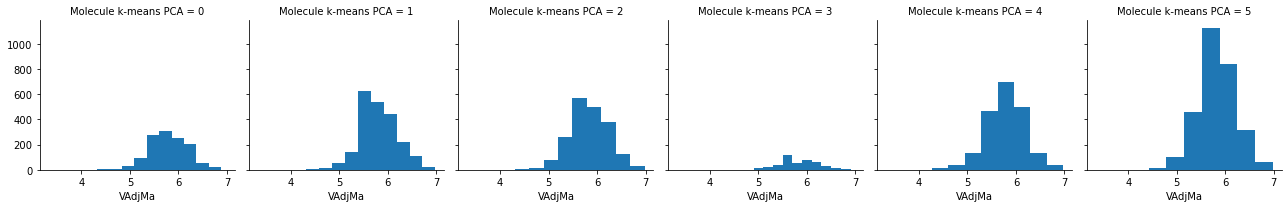

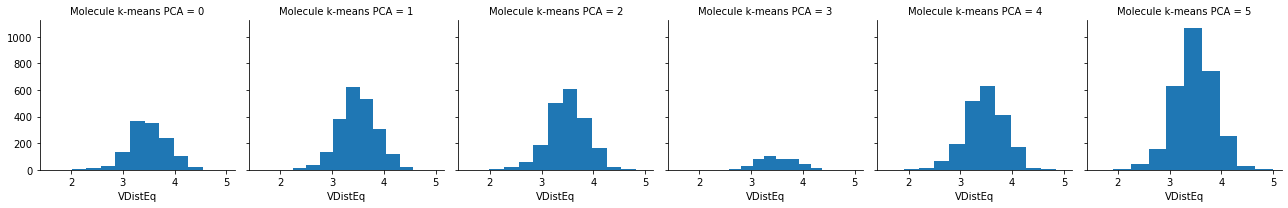

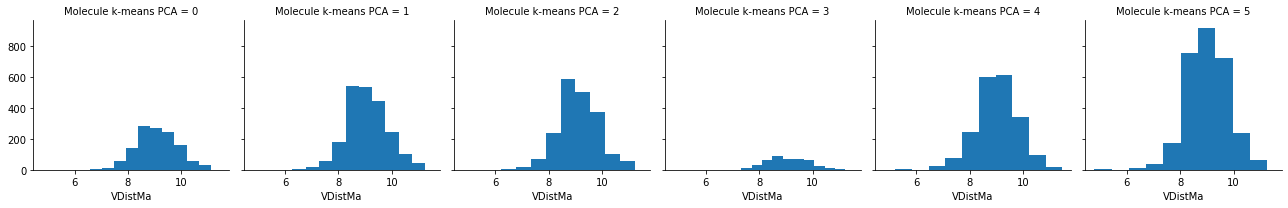

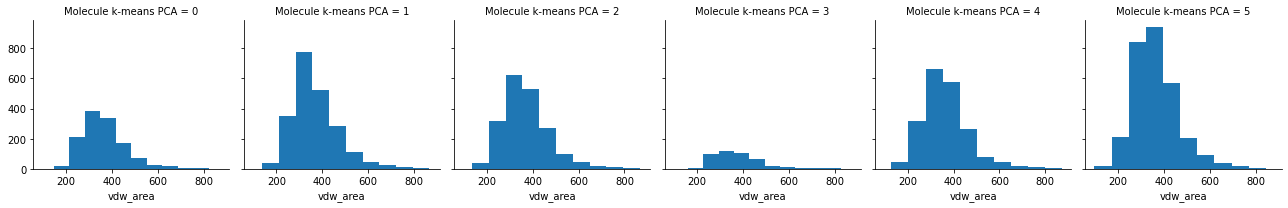

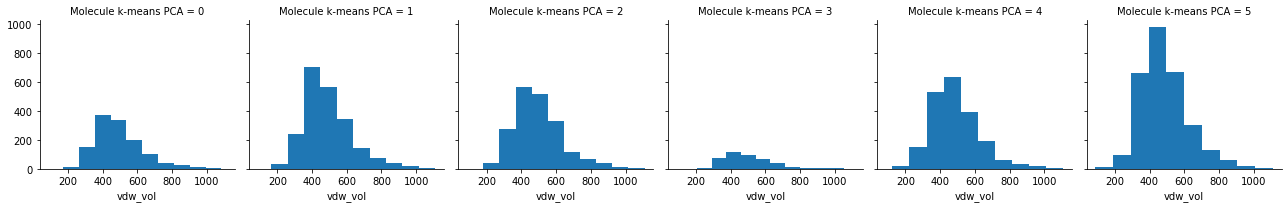

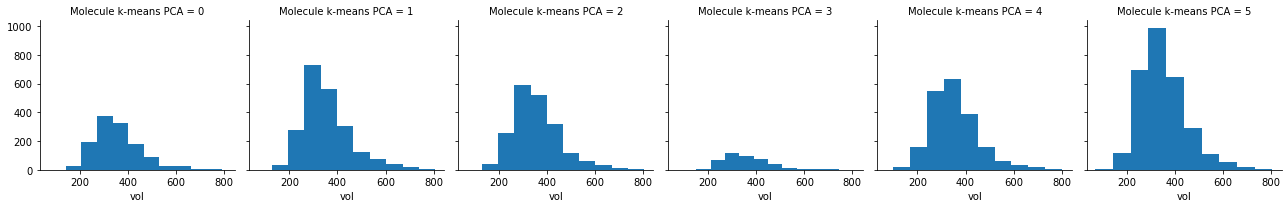

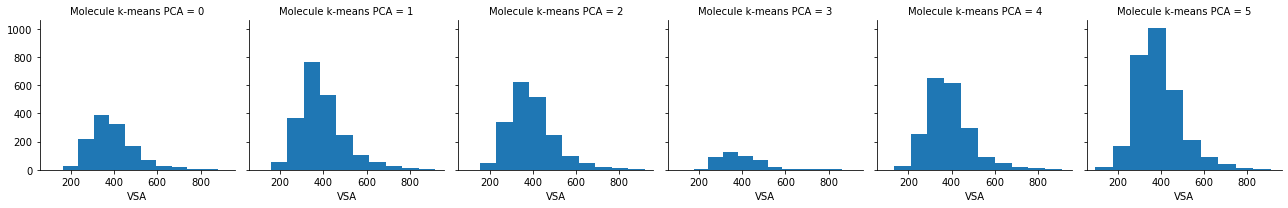

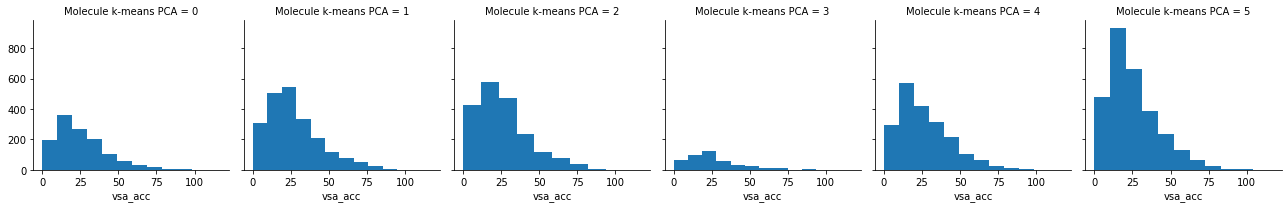

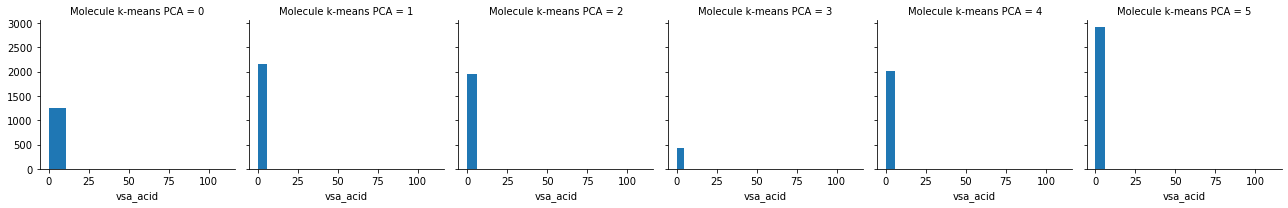

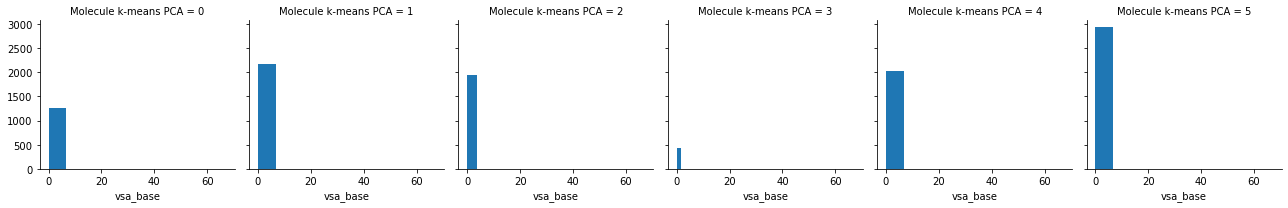

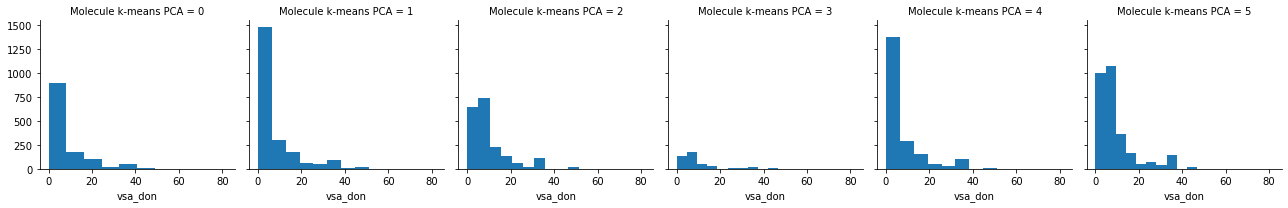

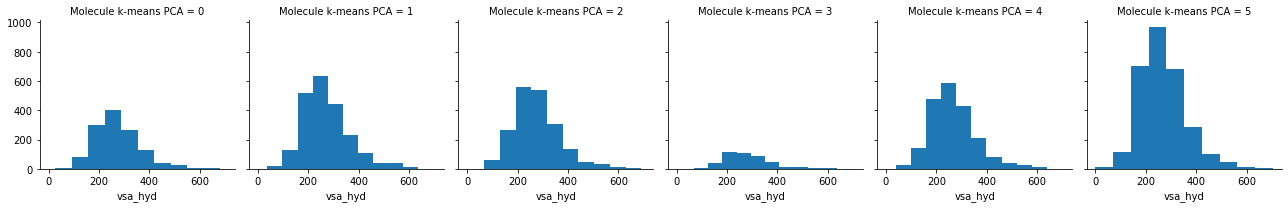

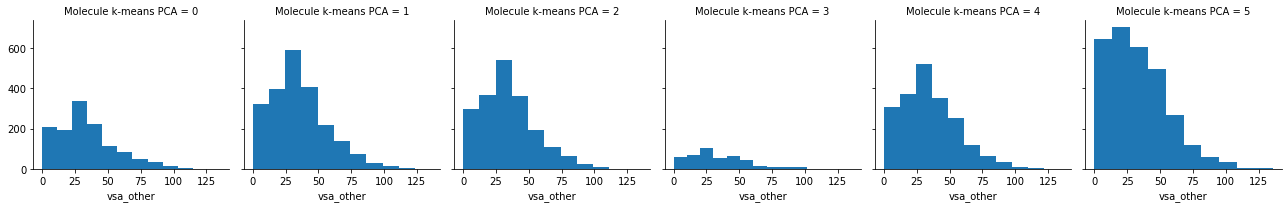

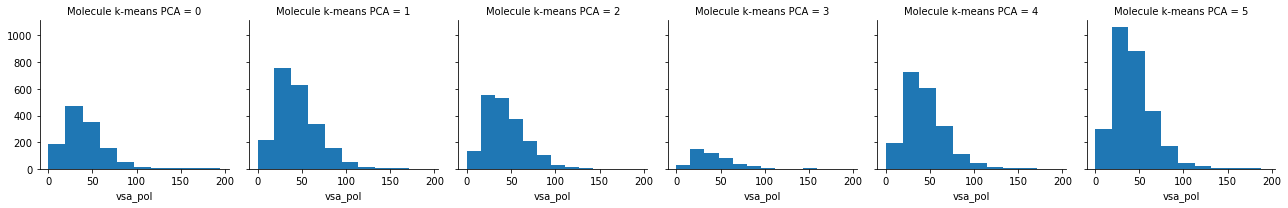

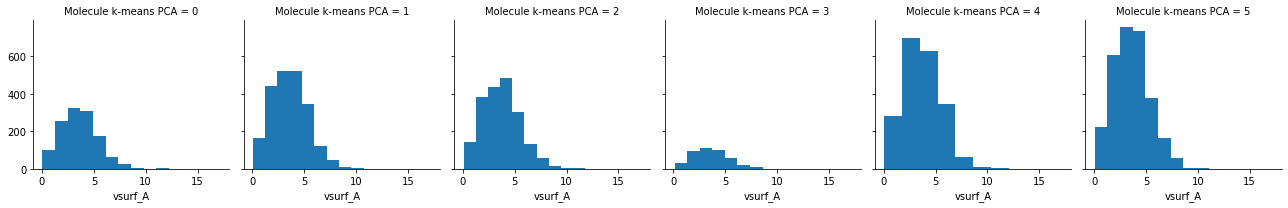

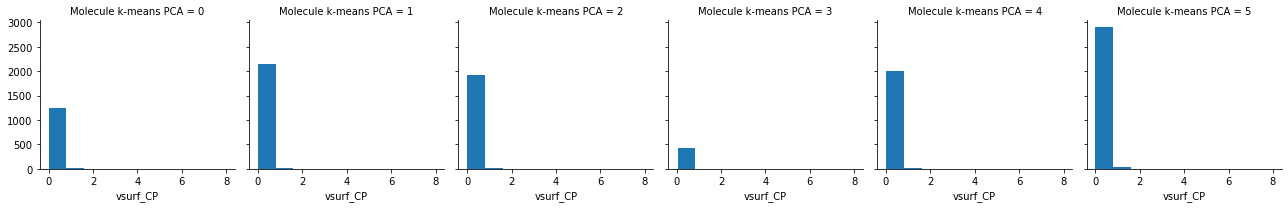

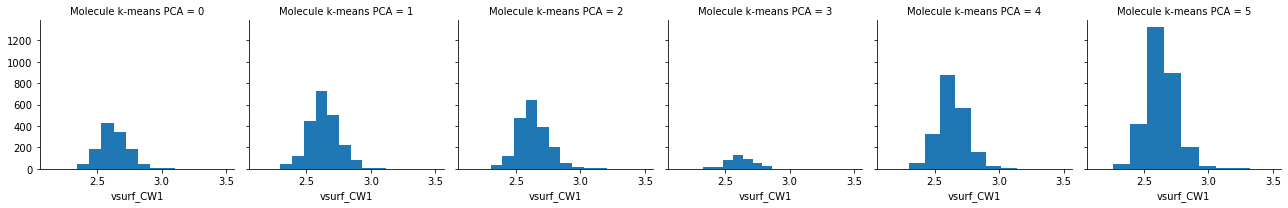

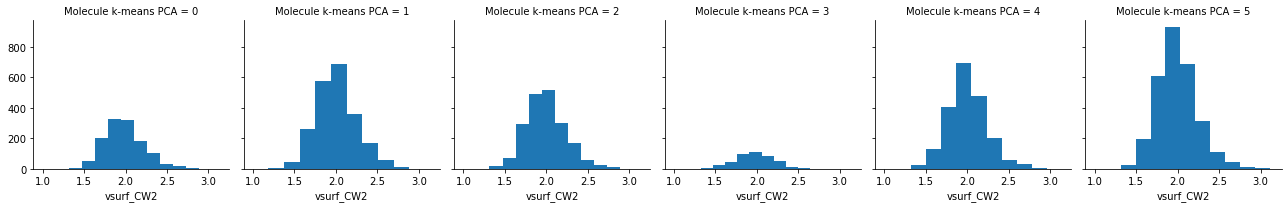

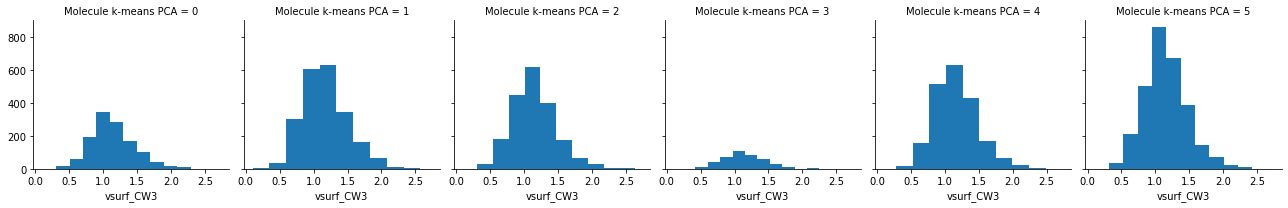

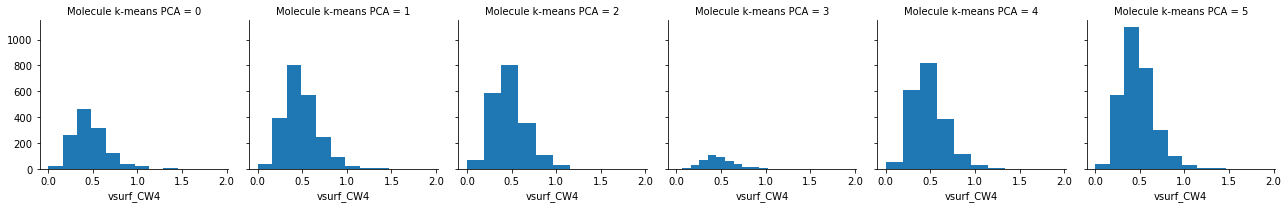

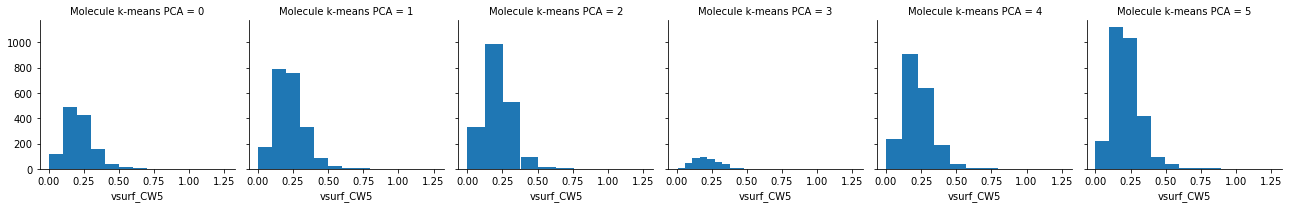

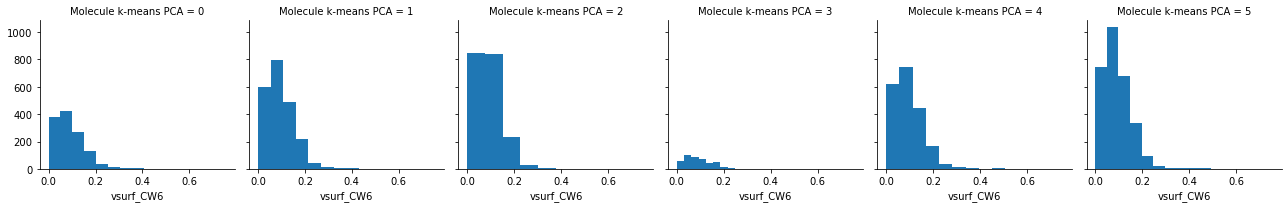

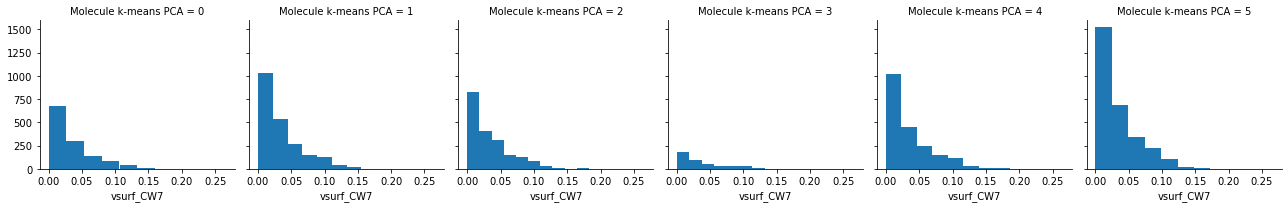

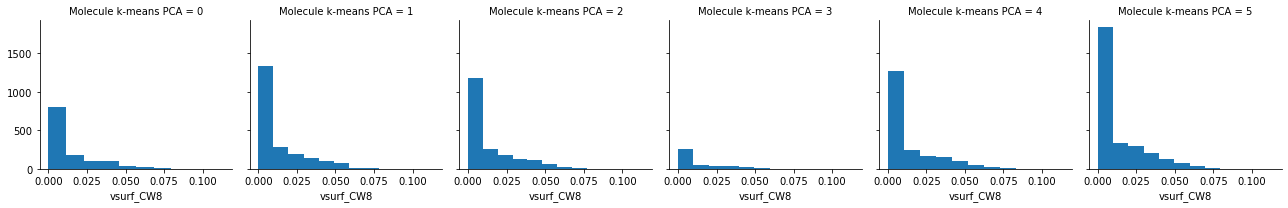

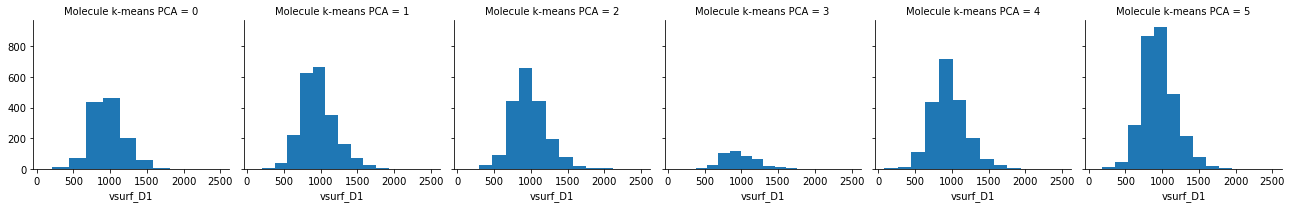

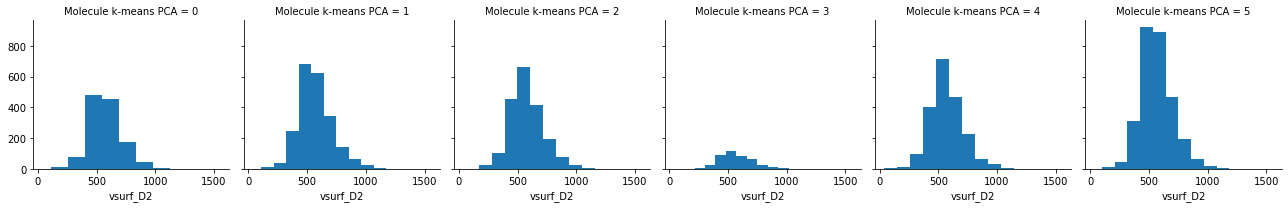

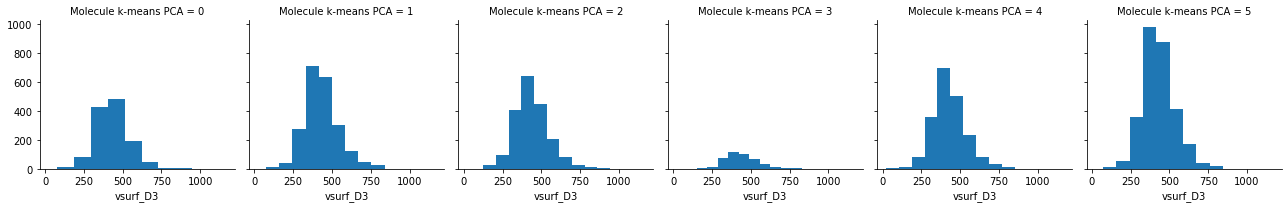

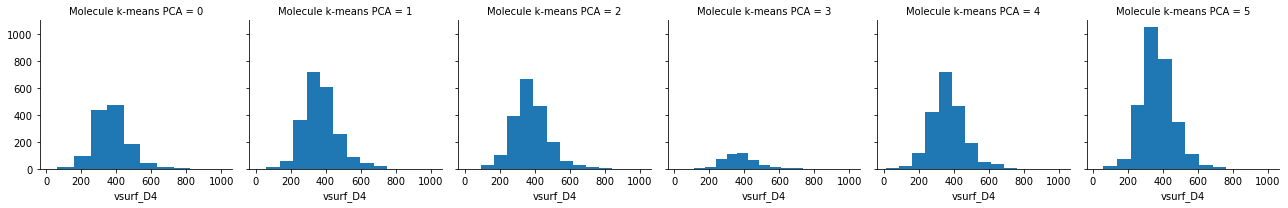

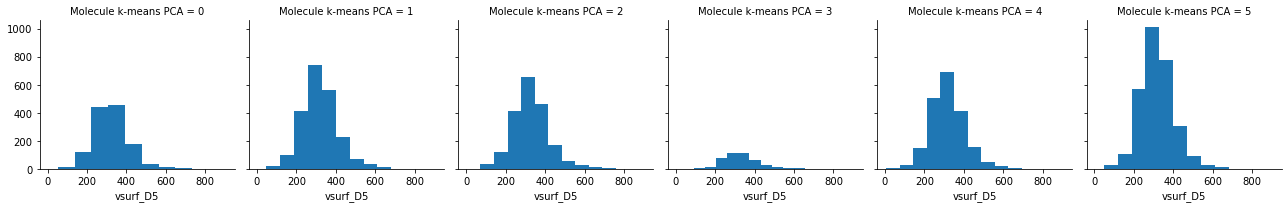

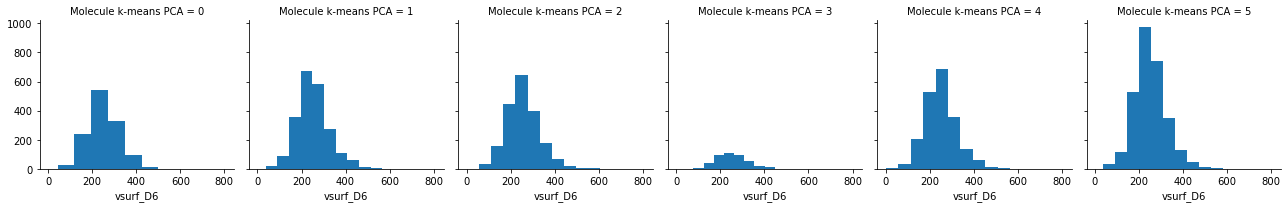

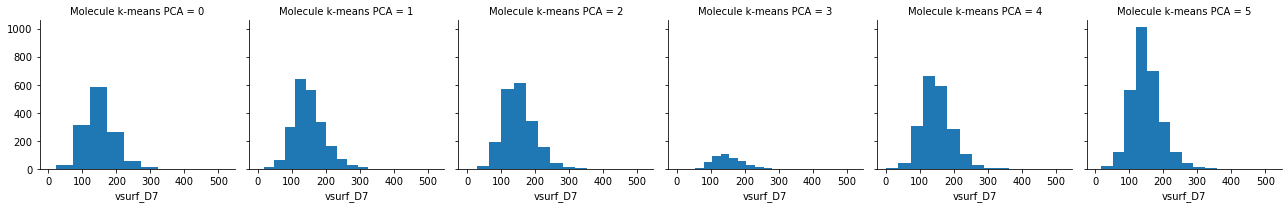

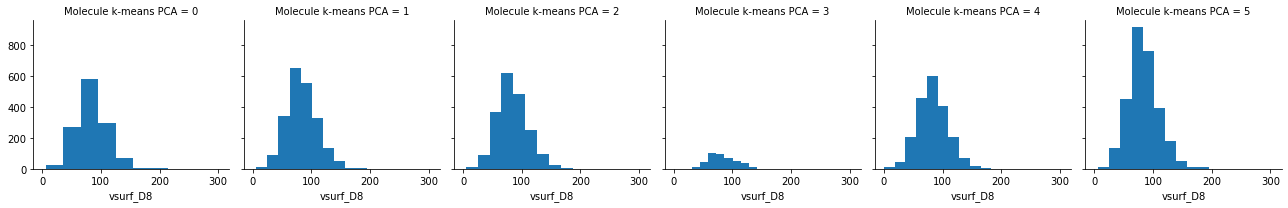

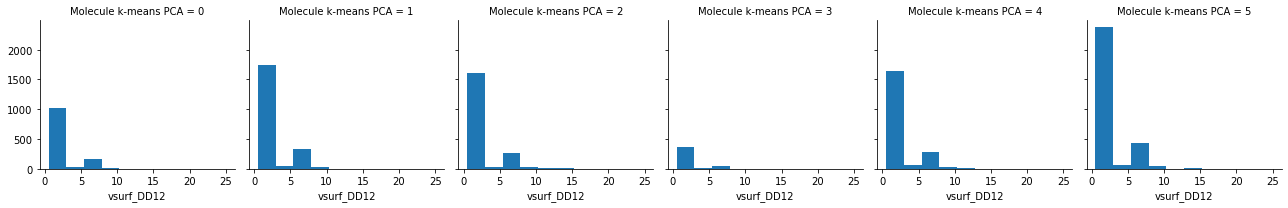

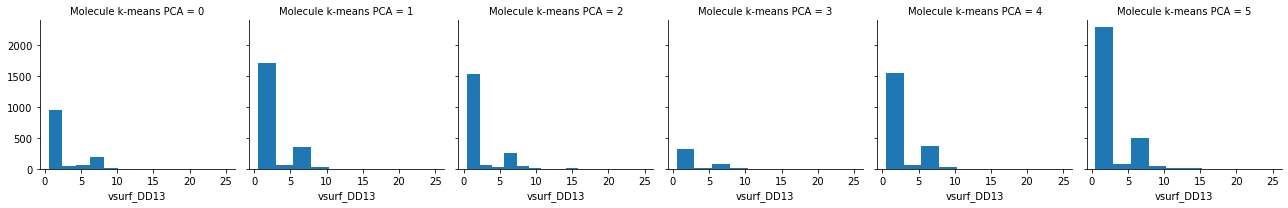

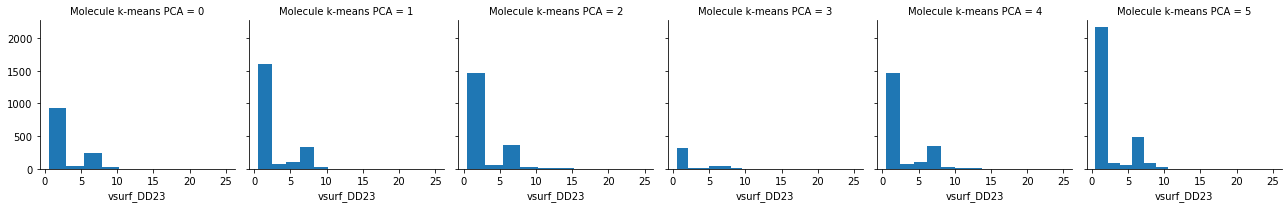

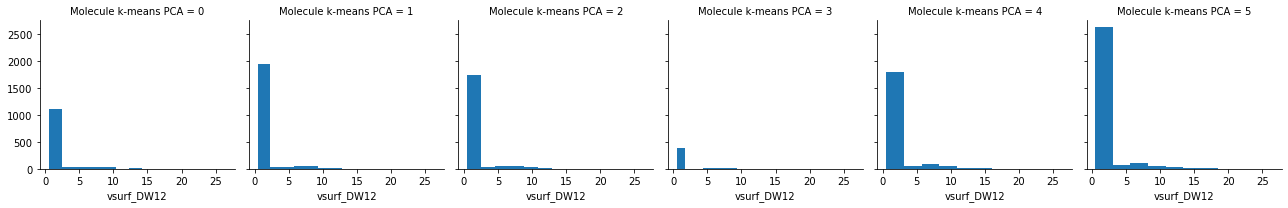

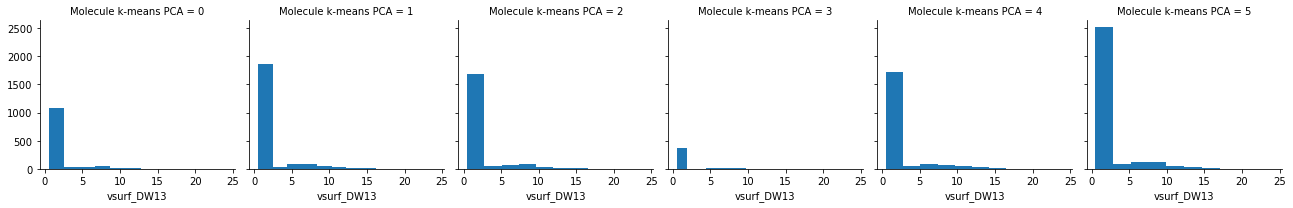

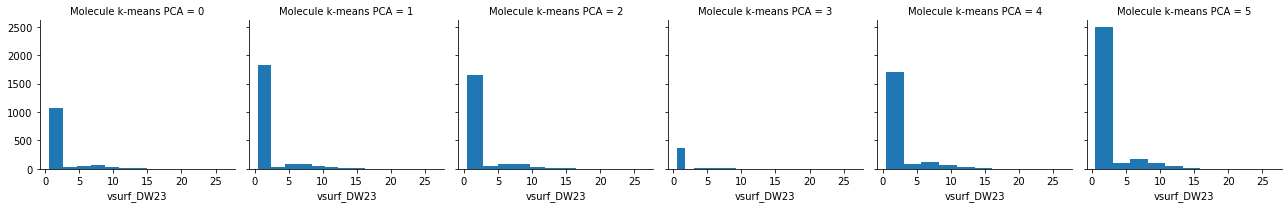

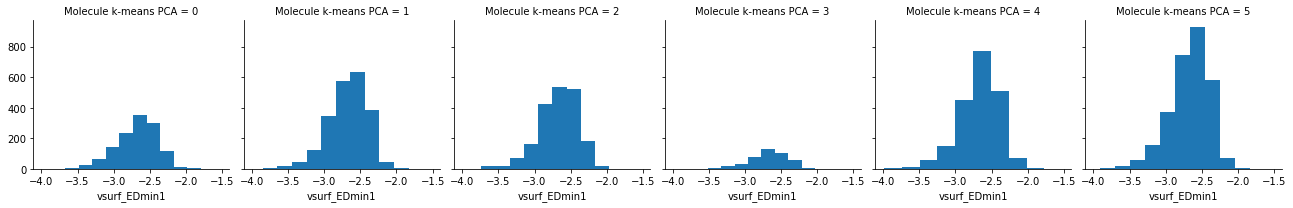

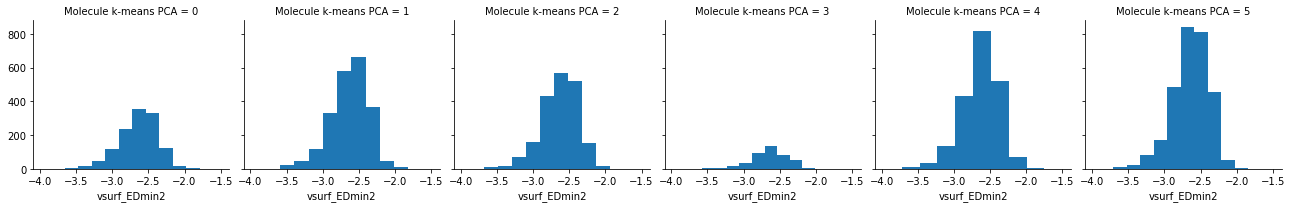

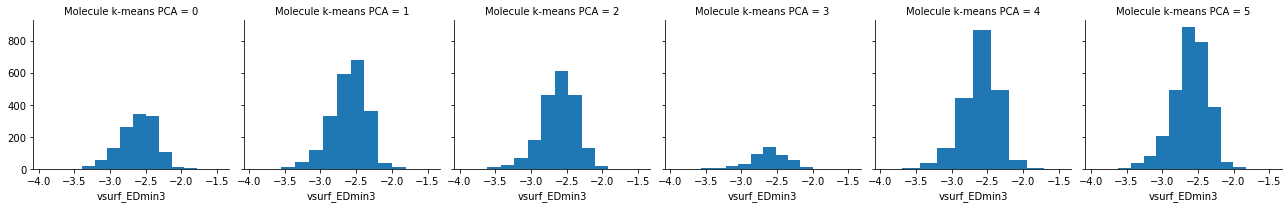

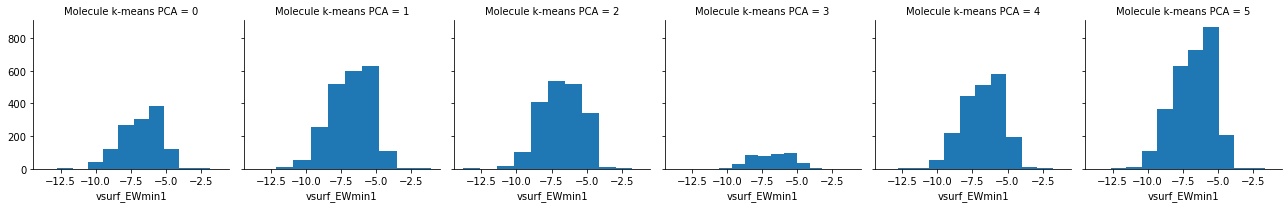

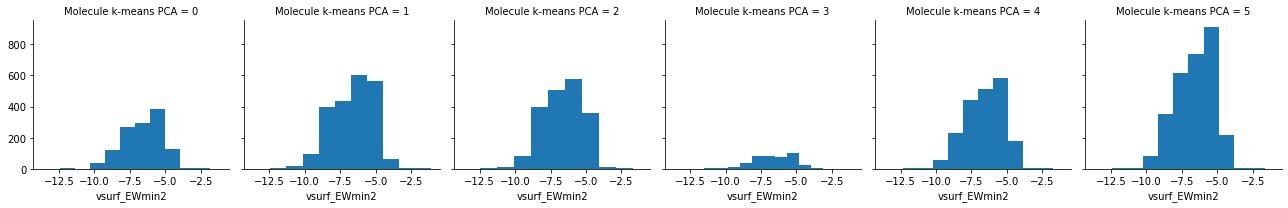

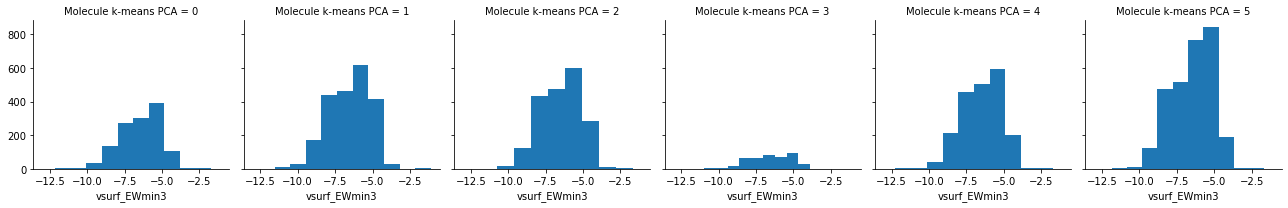

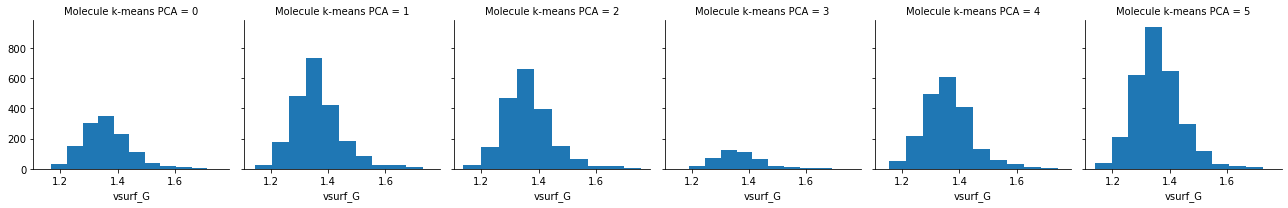

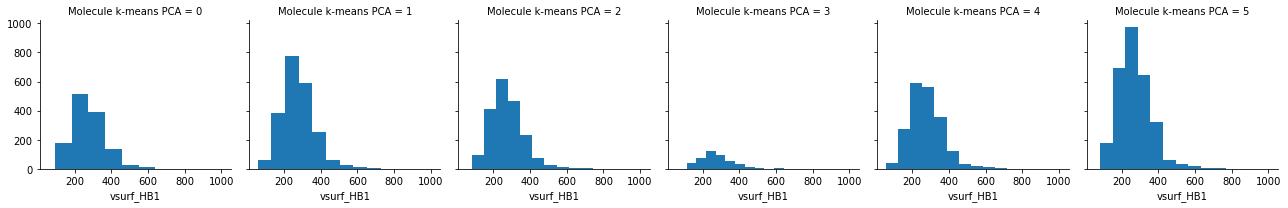

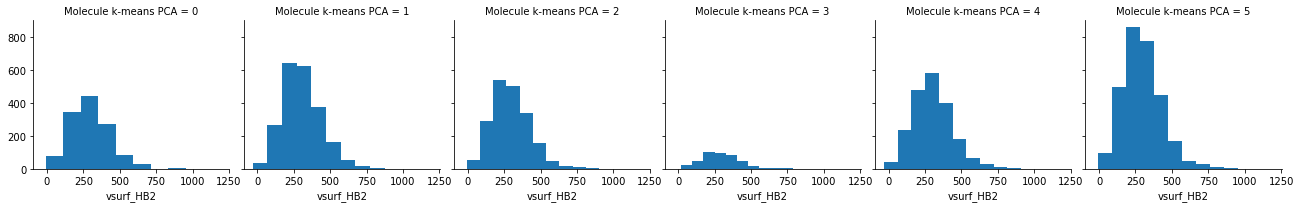

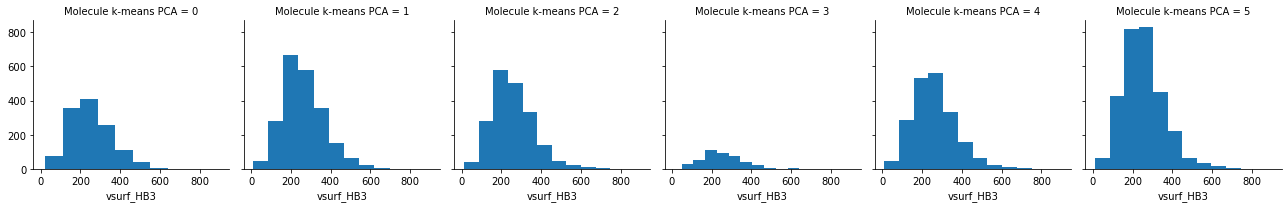

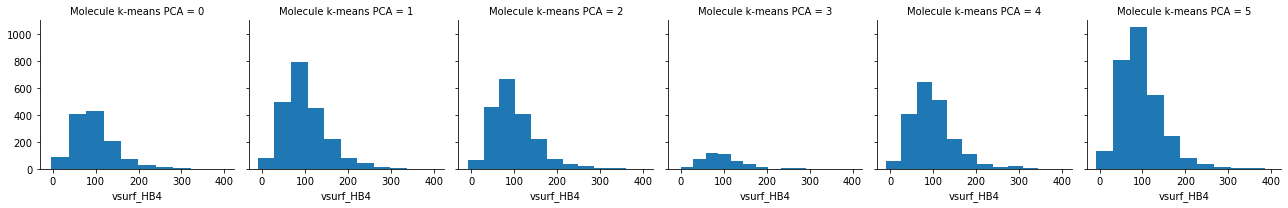

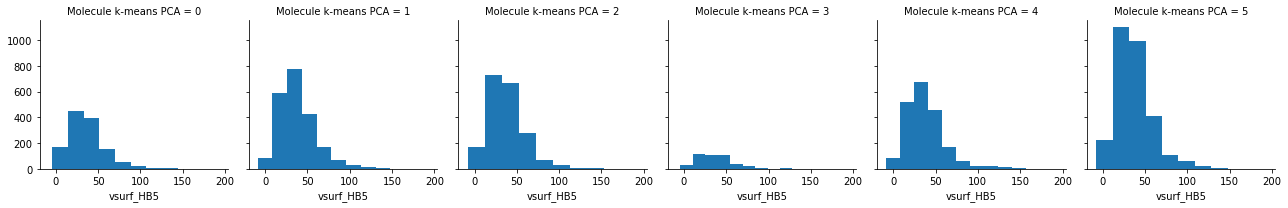

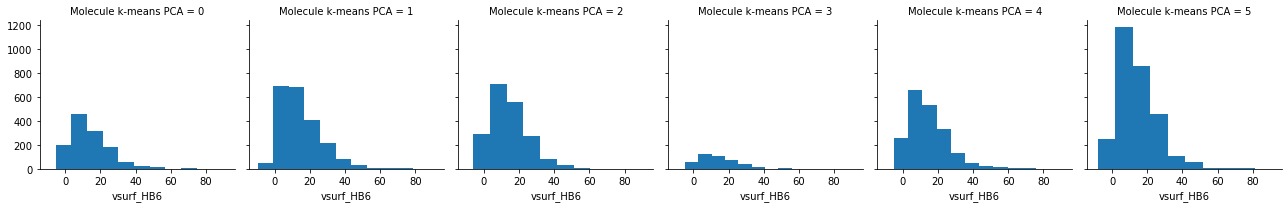

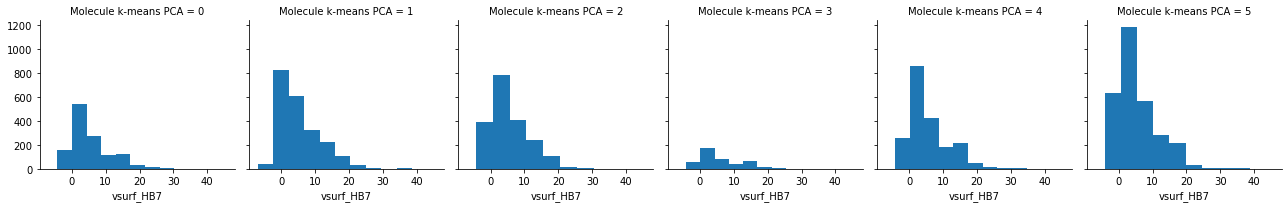

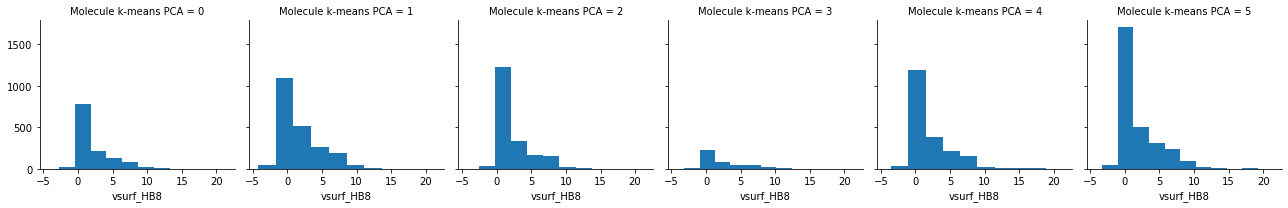

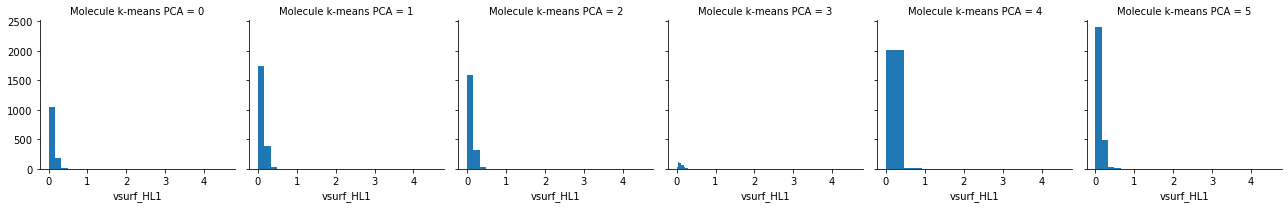

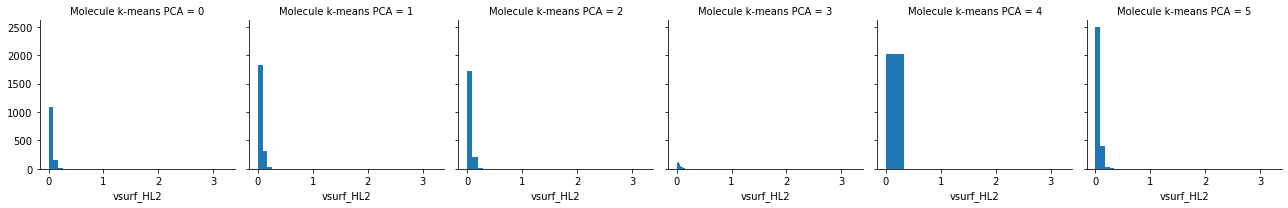

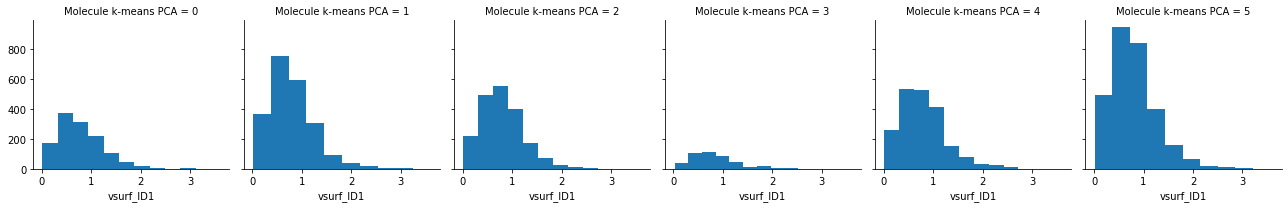

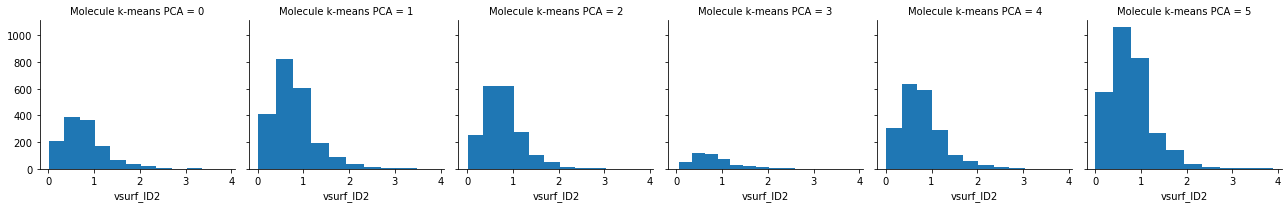

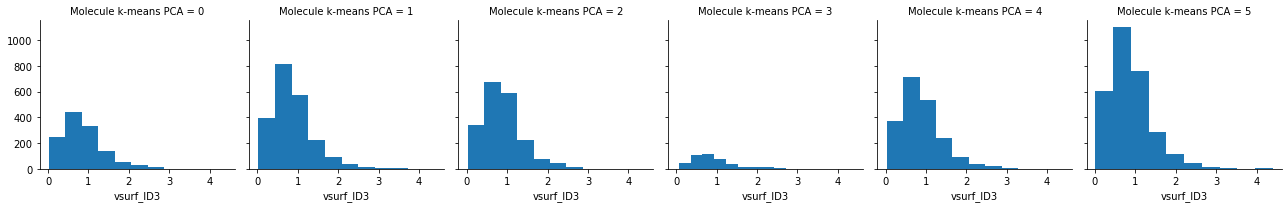

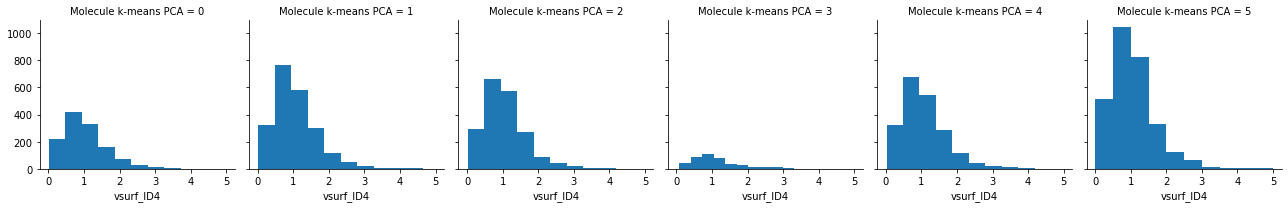

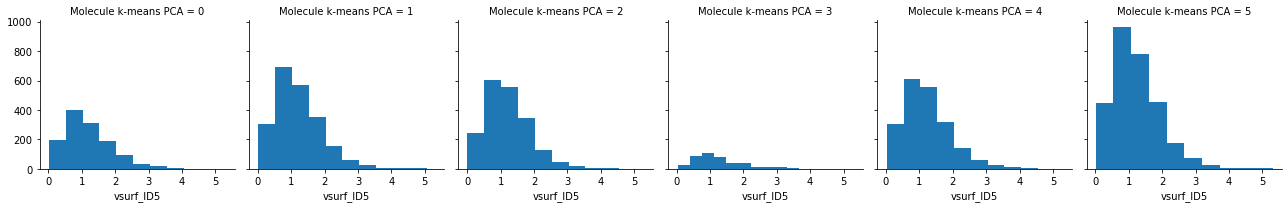

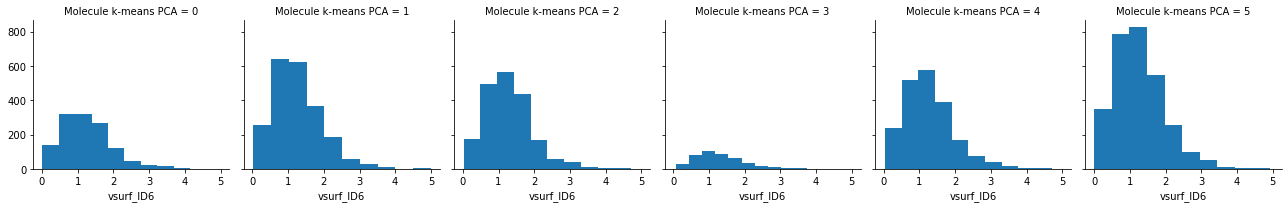

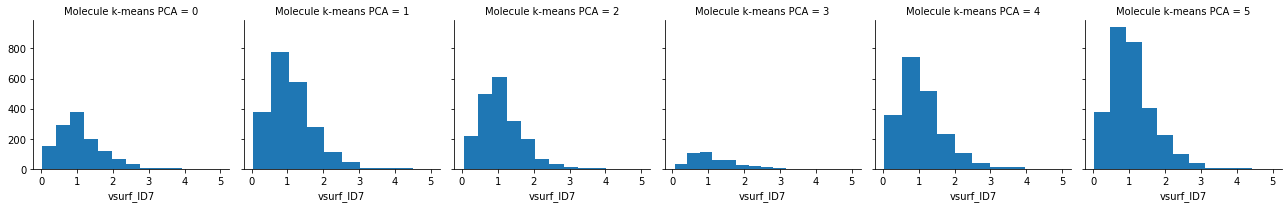

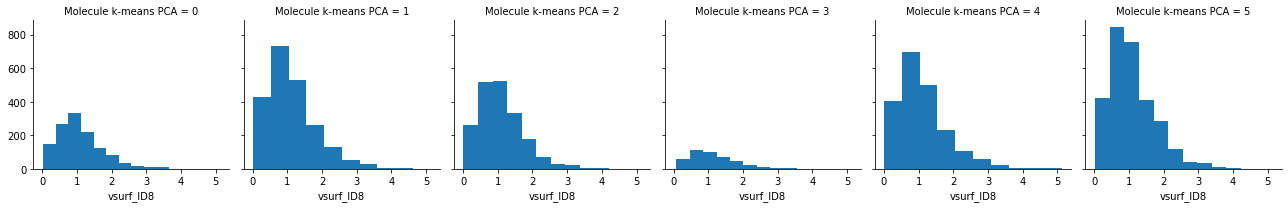

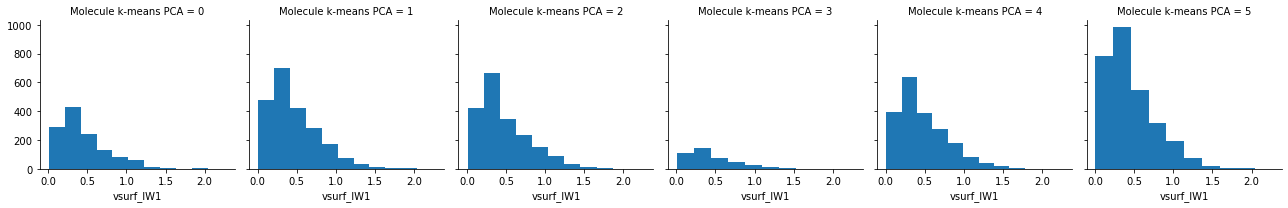

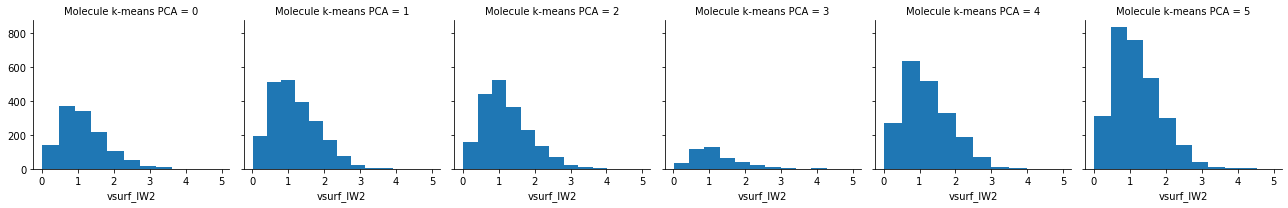

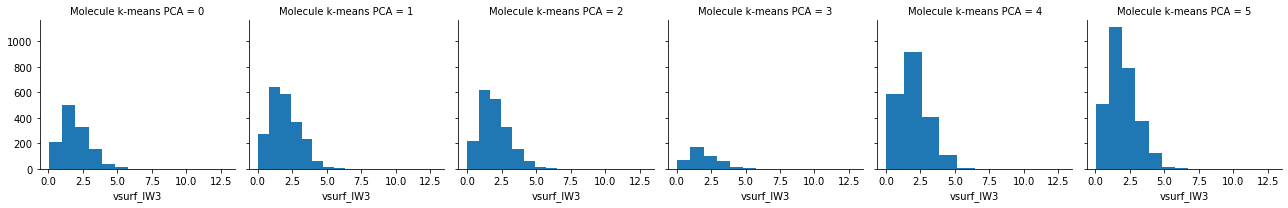

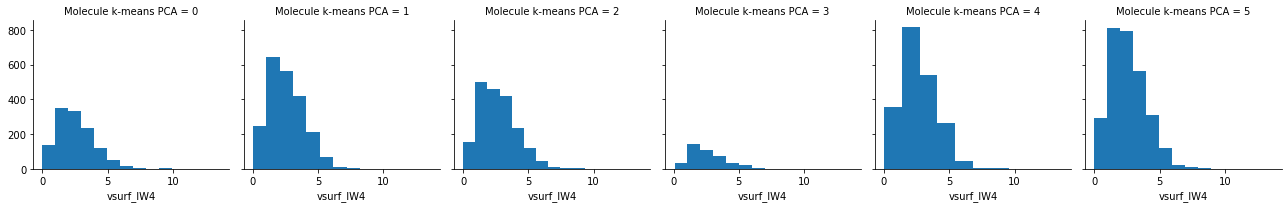

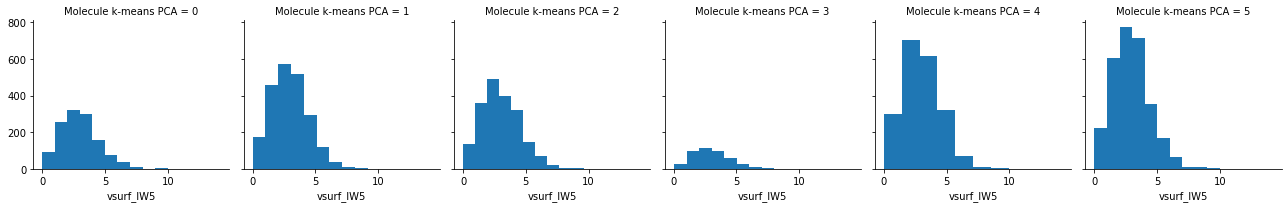

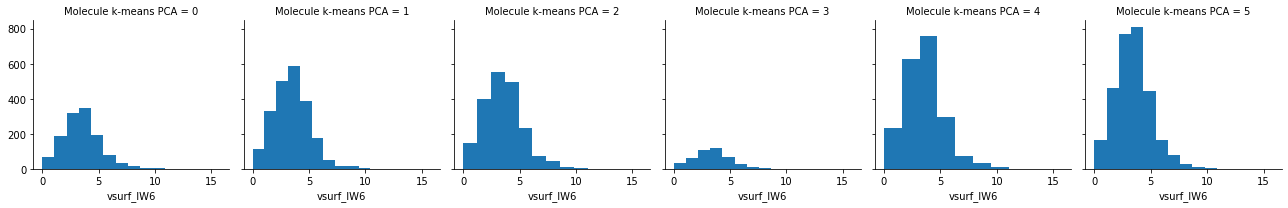

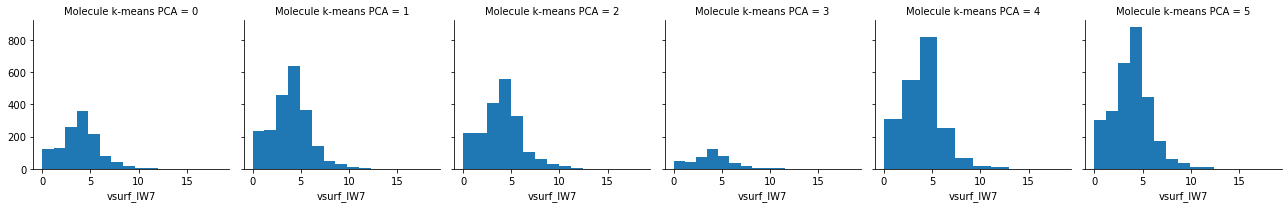

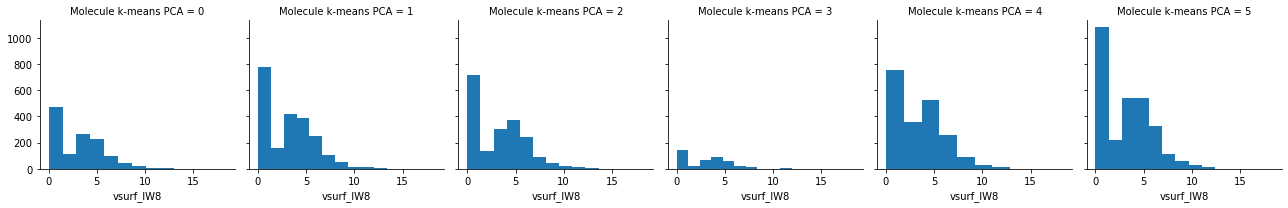

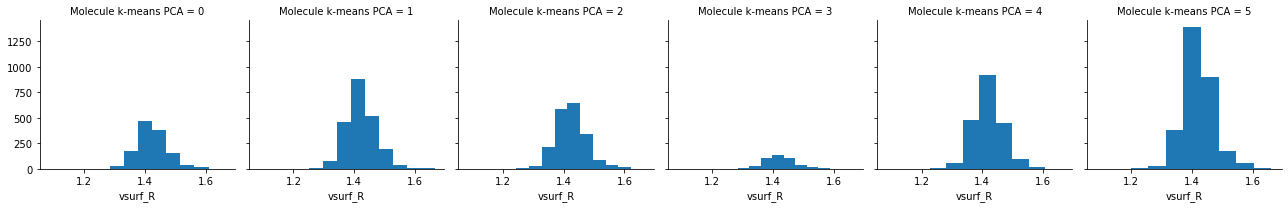

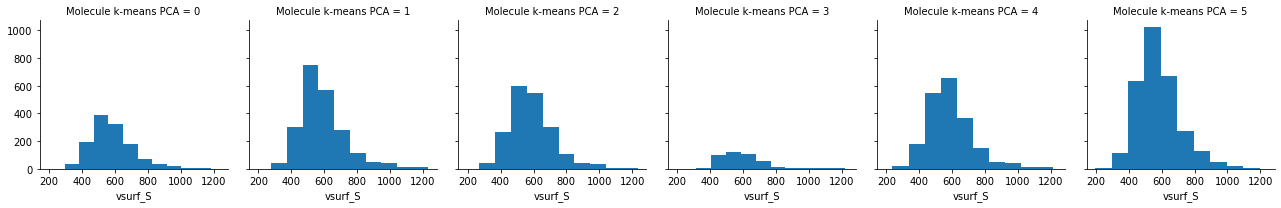

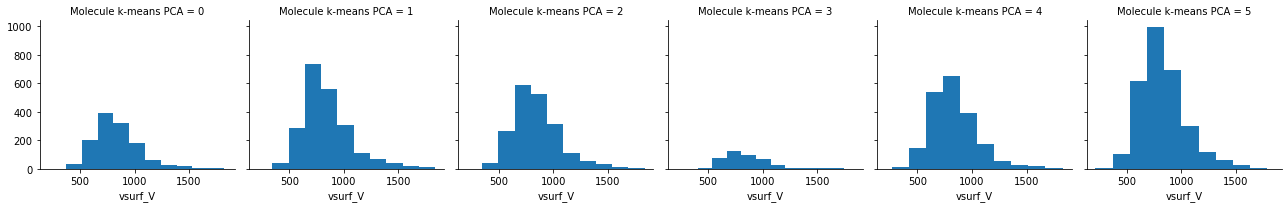

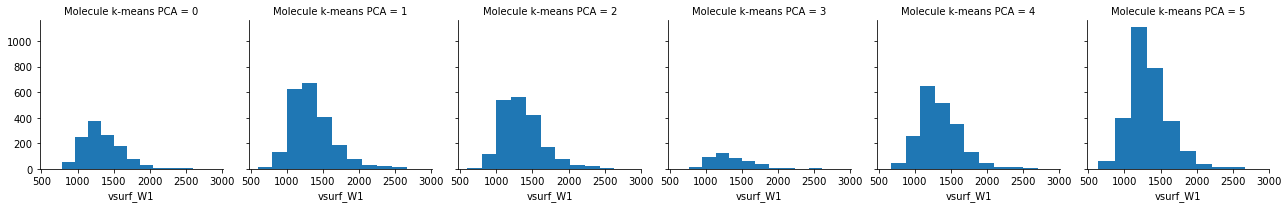

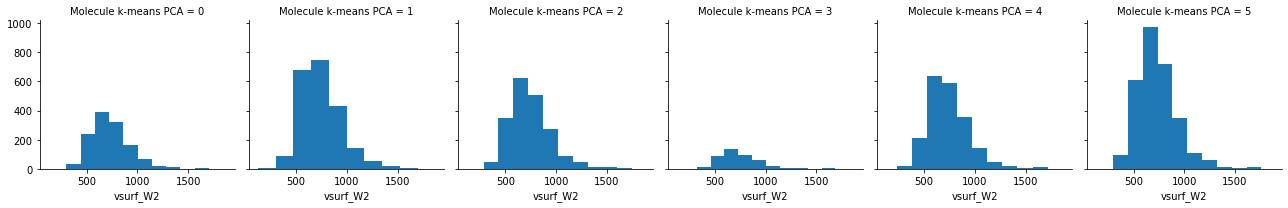

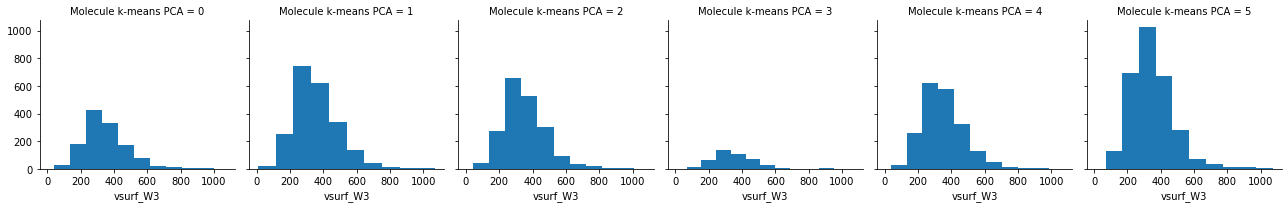

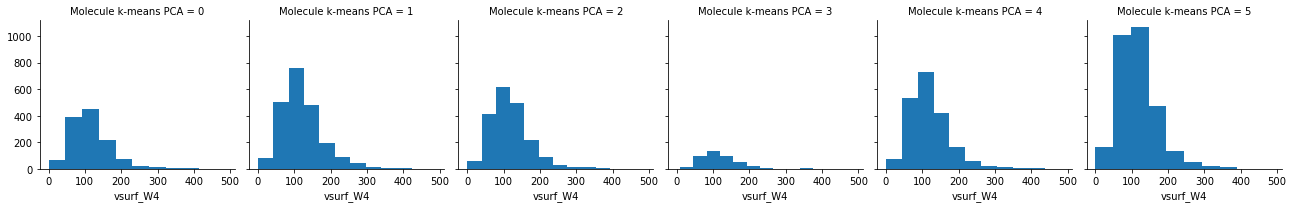

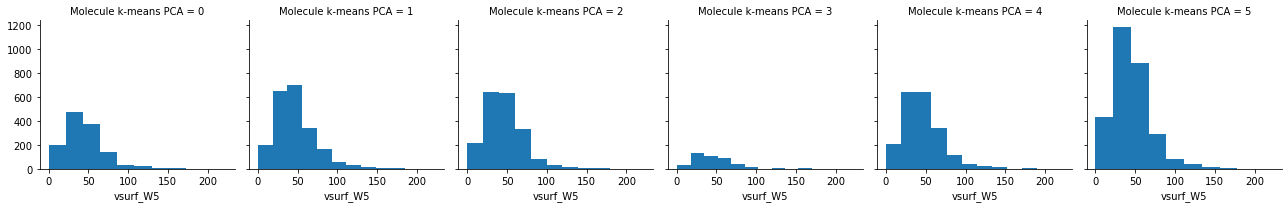

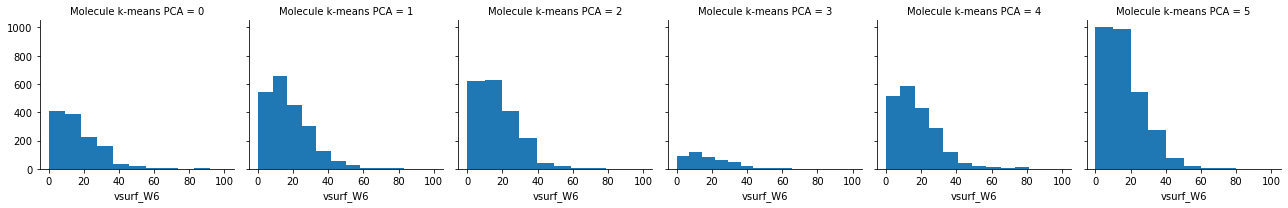

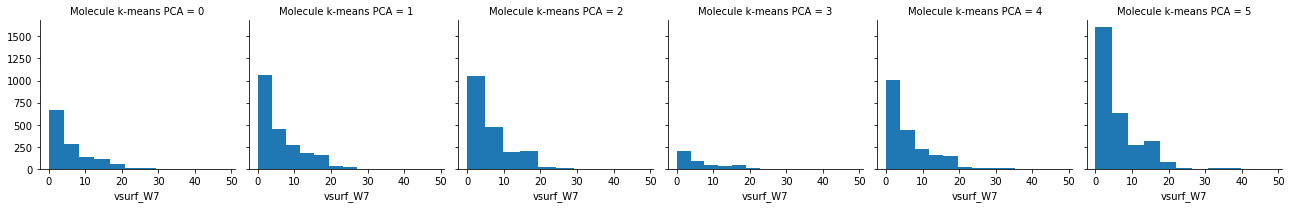

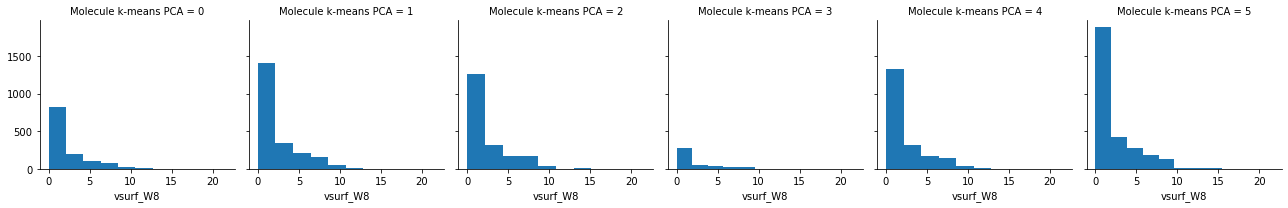

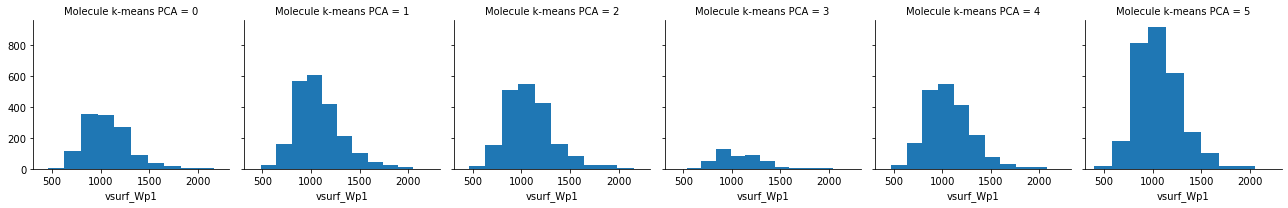

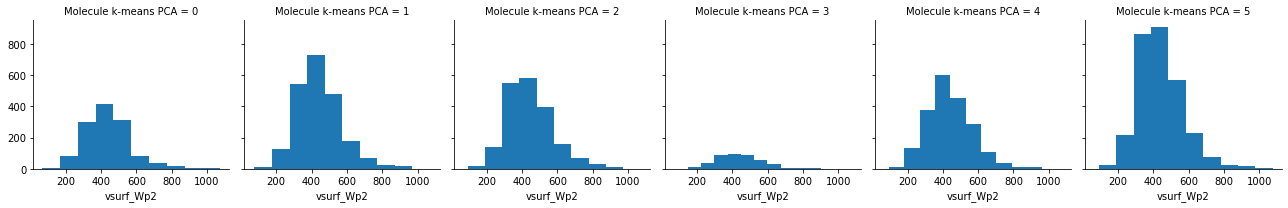

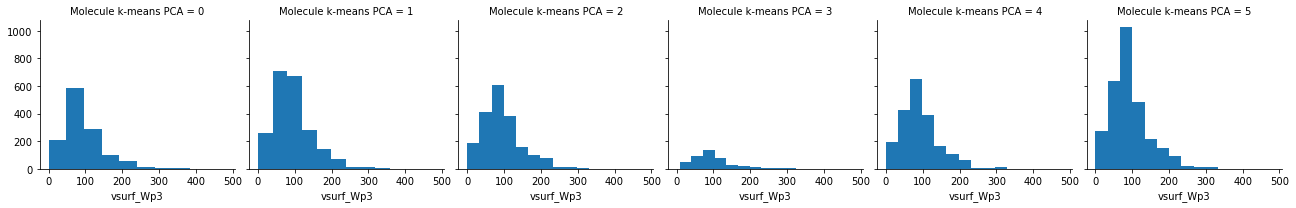

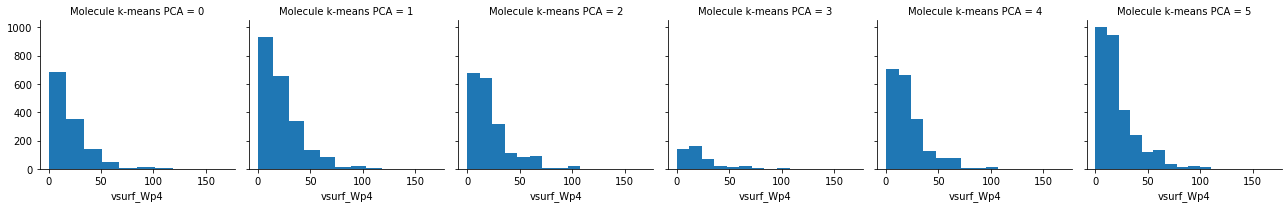

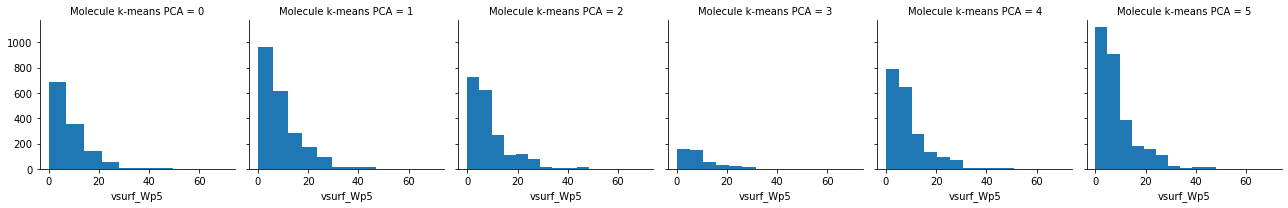

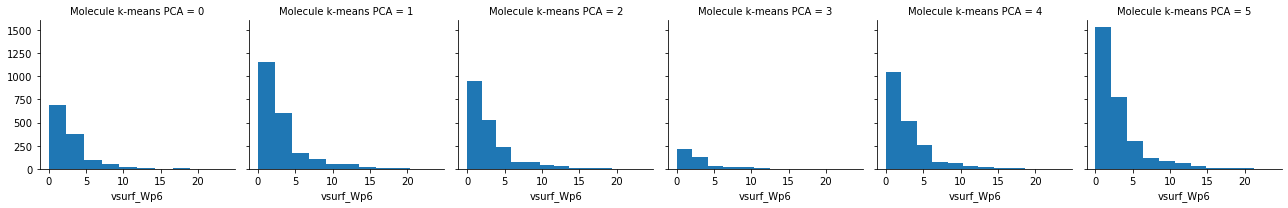

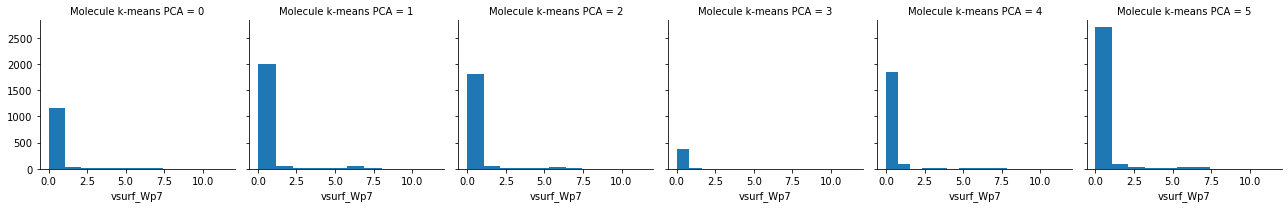

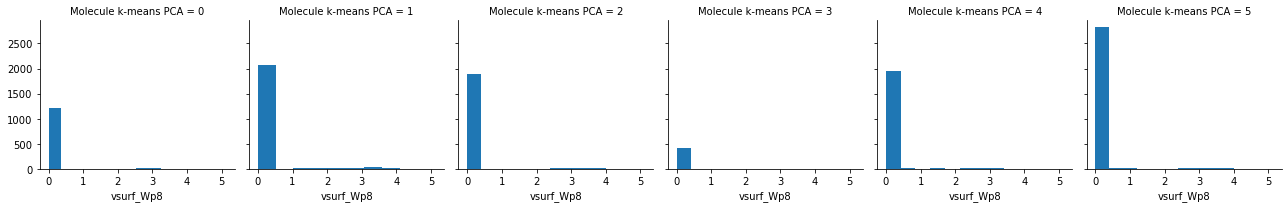

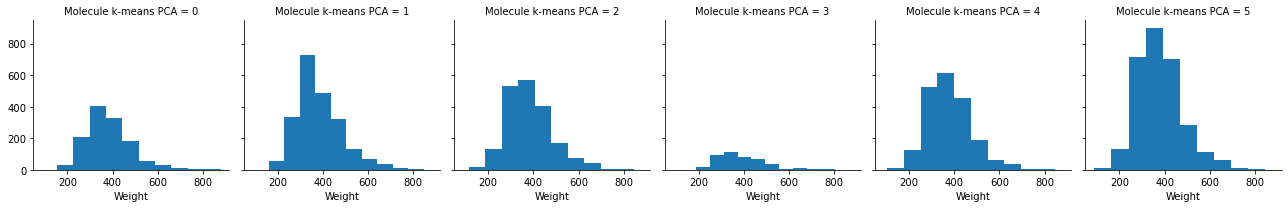

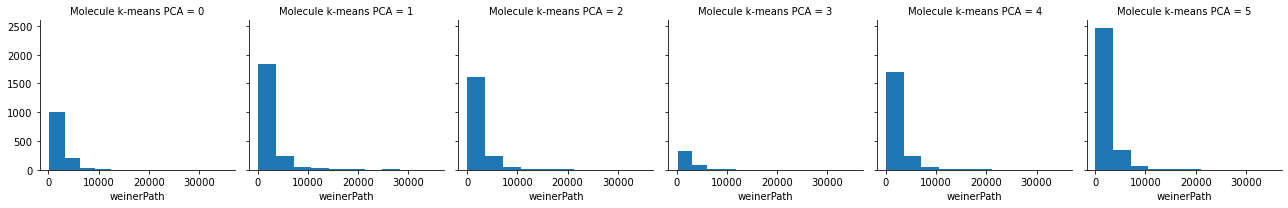

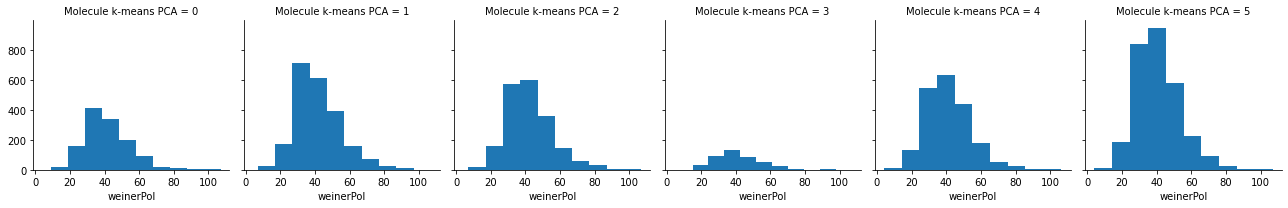

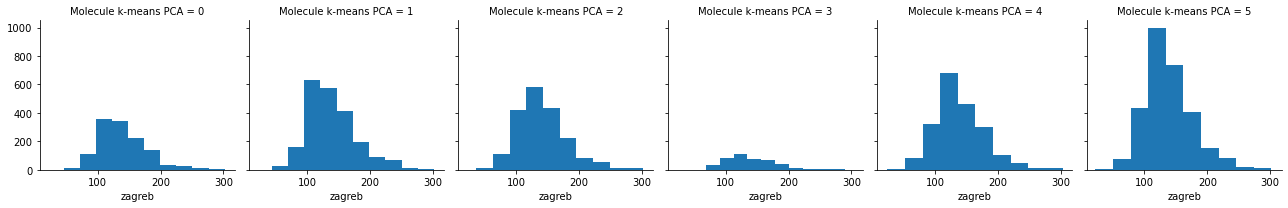

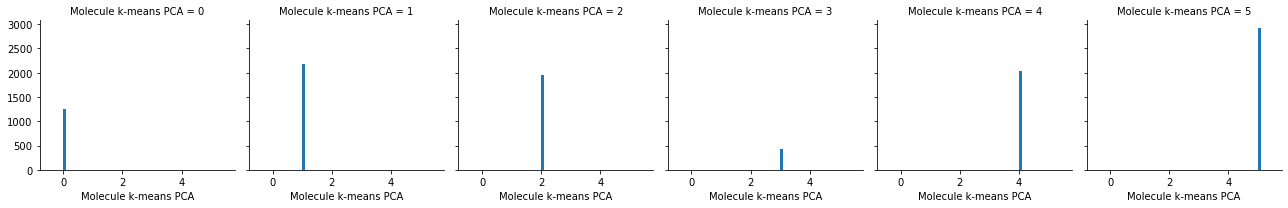

In [60]:
# Univariate review of the clusters by comparing the clusters based on 
# each individual features.

for c in cluster_pca_profile:
    grid = sns.FacetGrid(cluster_pca_profile, col='Molecule k-means PCA')
    grid.map(plt.hist, c)


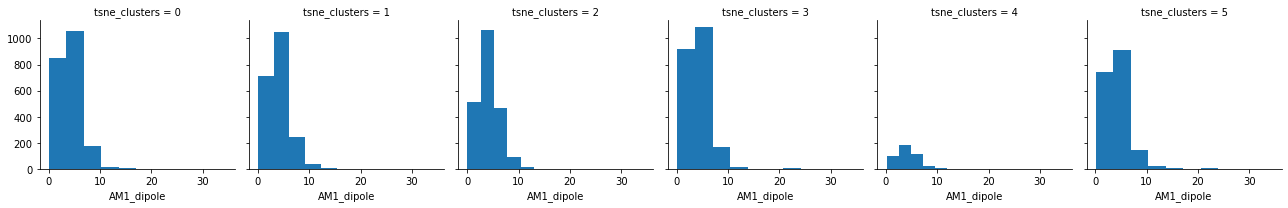

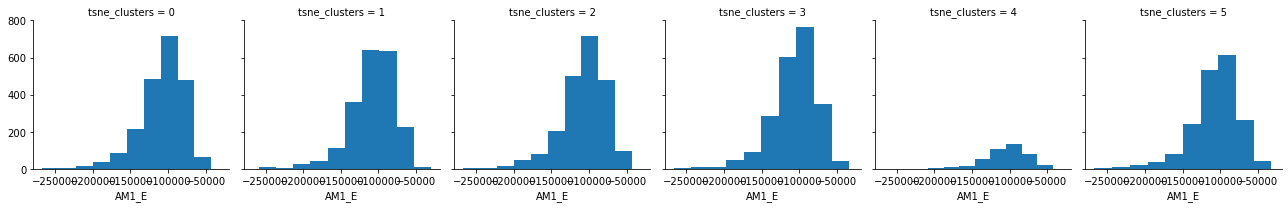

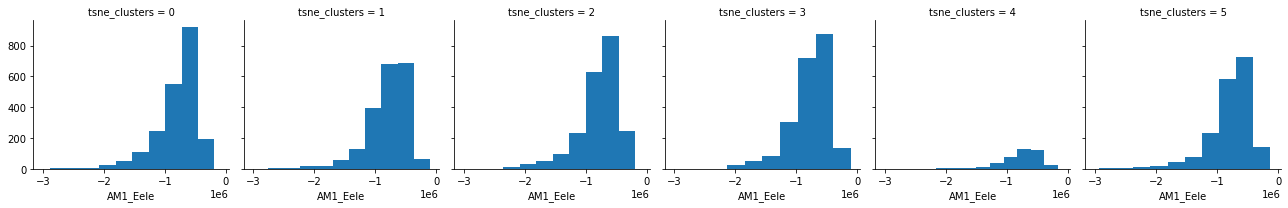

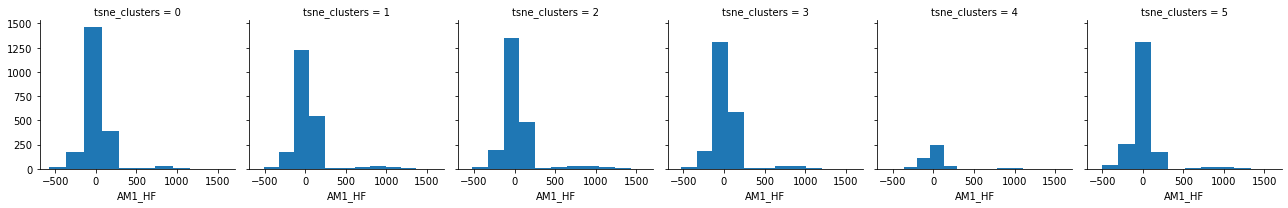

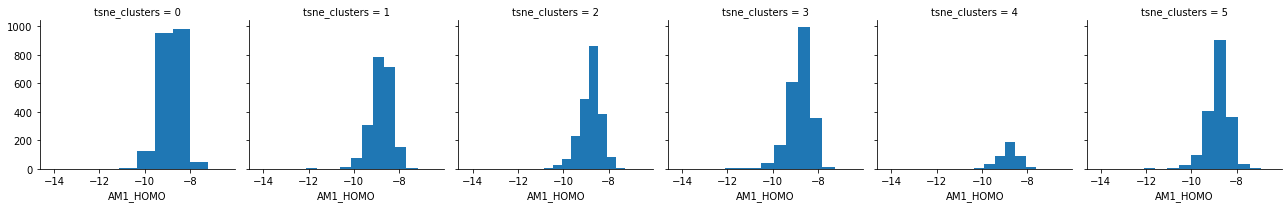

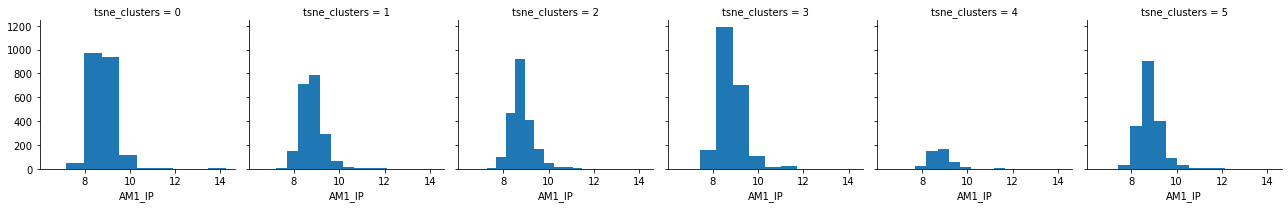

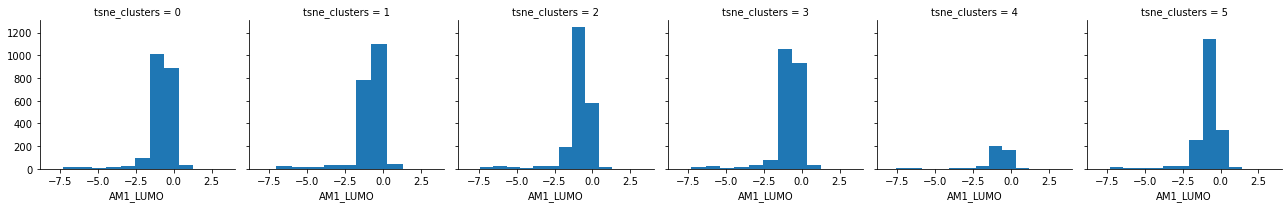

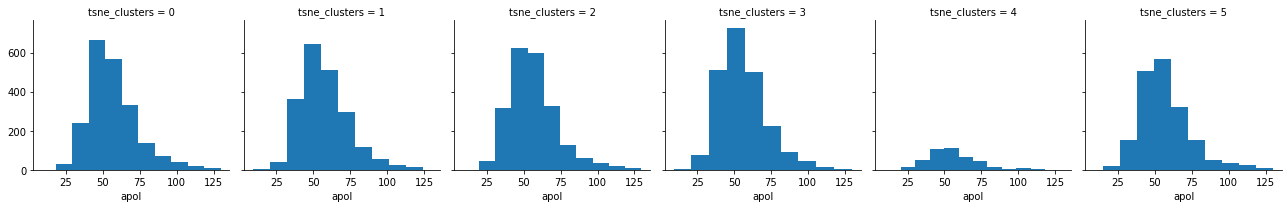

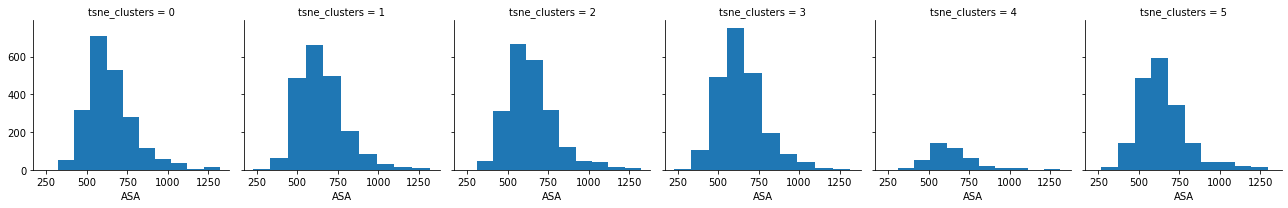

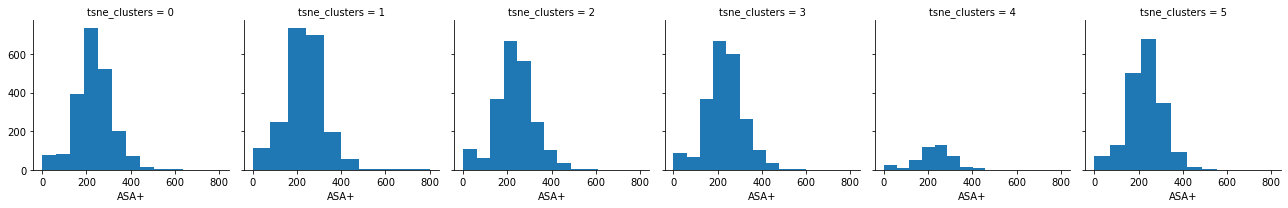

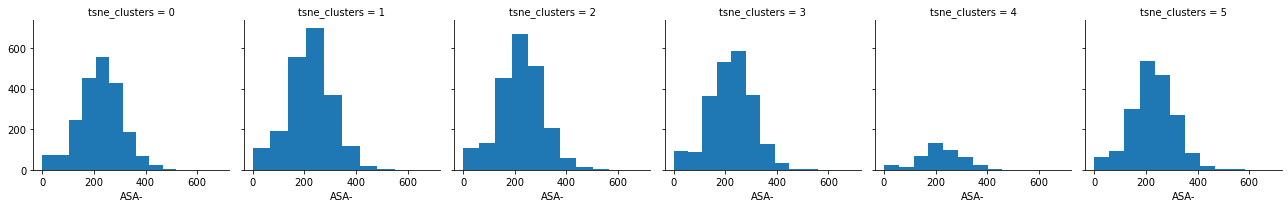

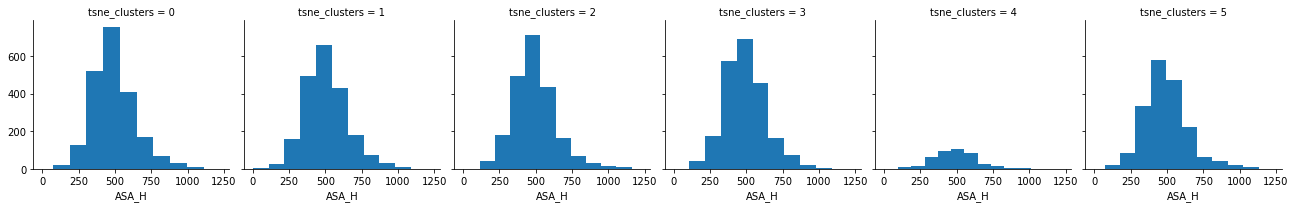

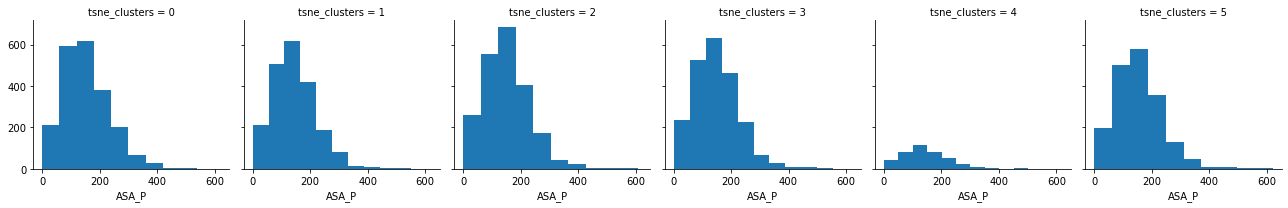

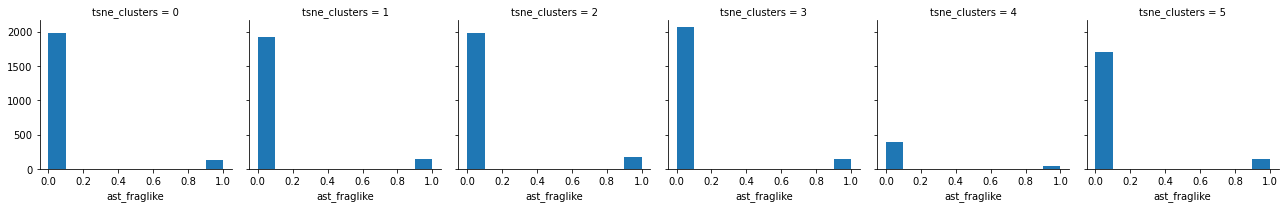

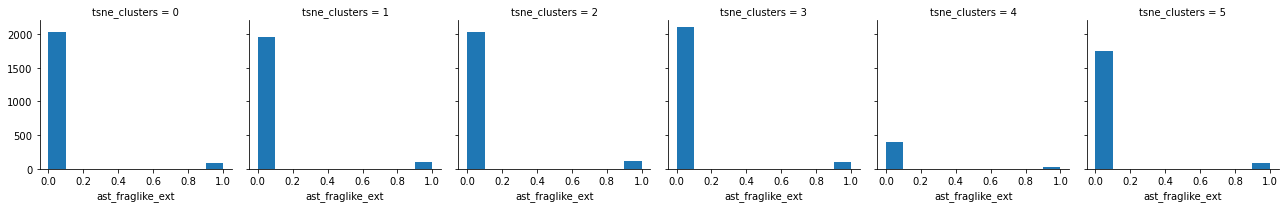

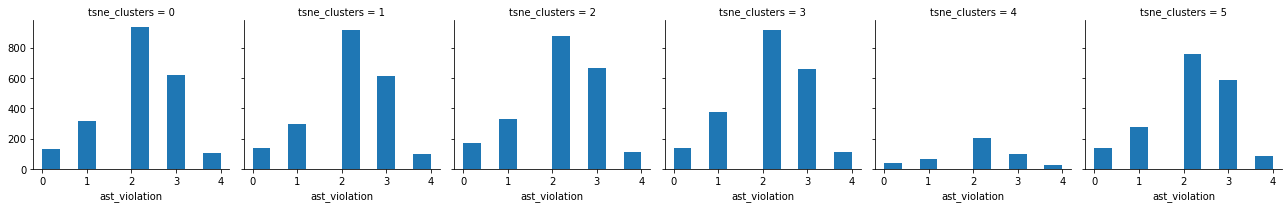

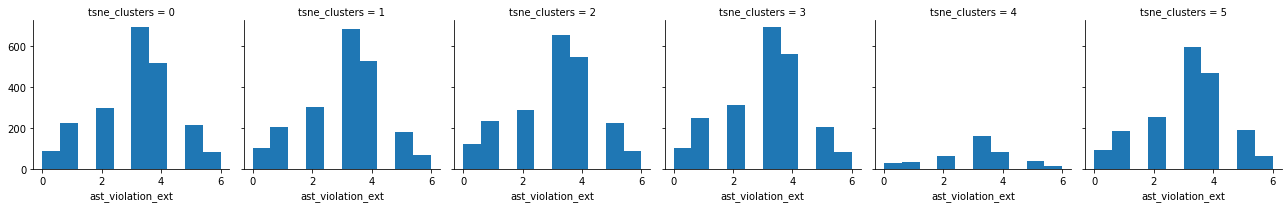

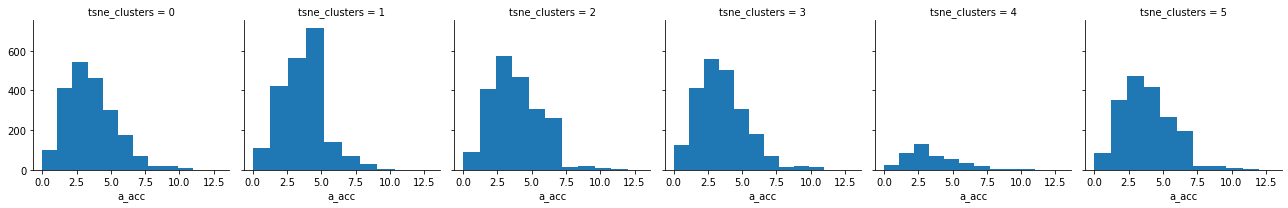

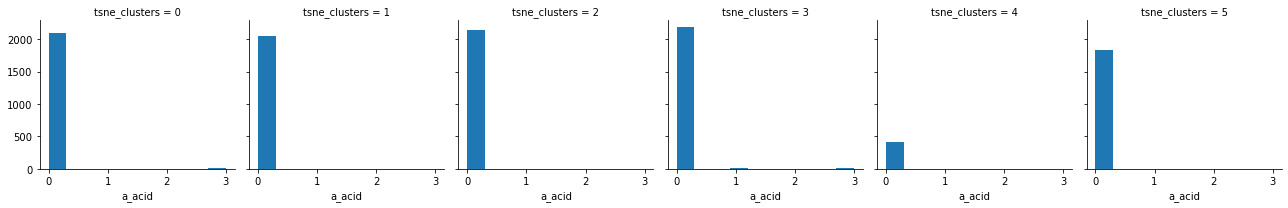

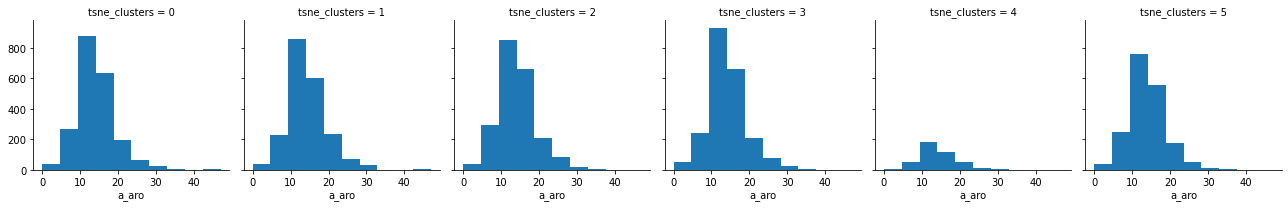

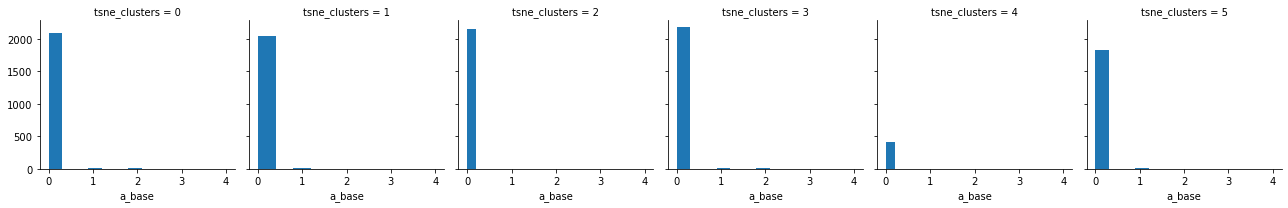

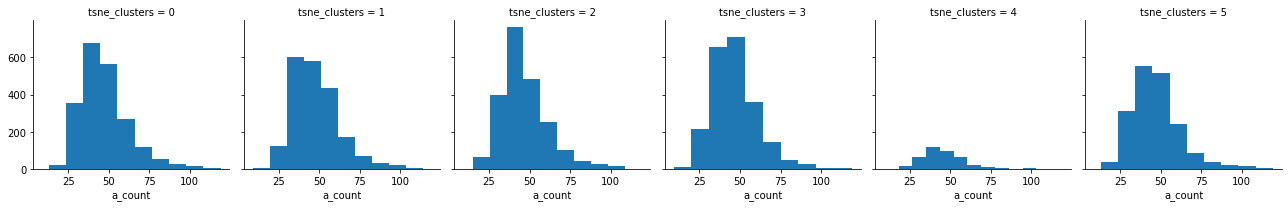

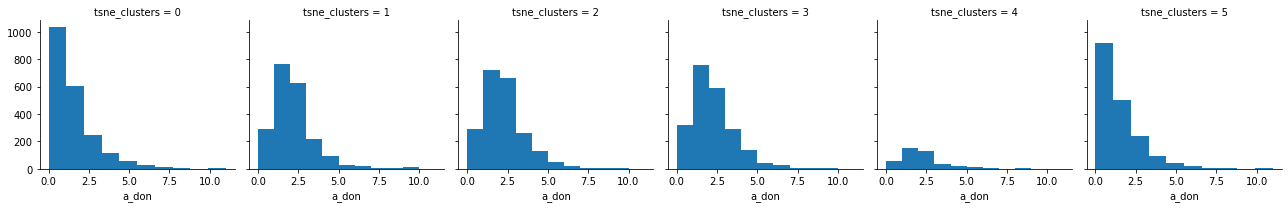

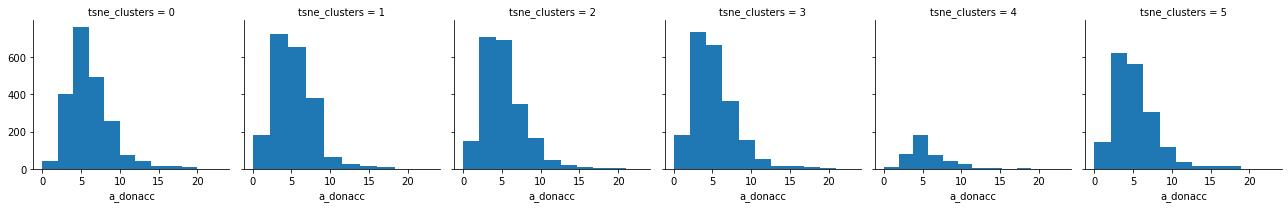

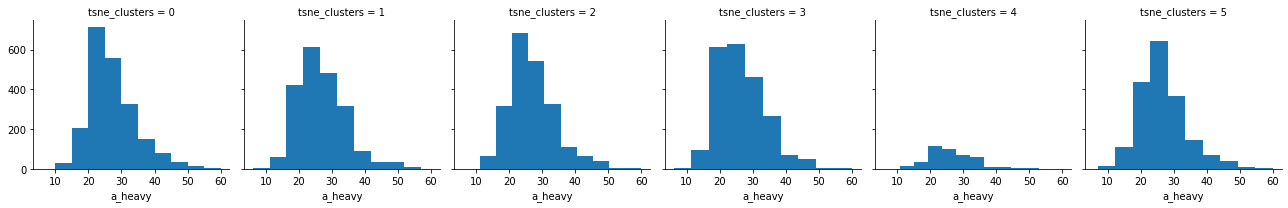

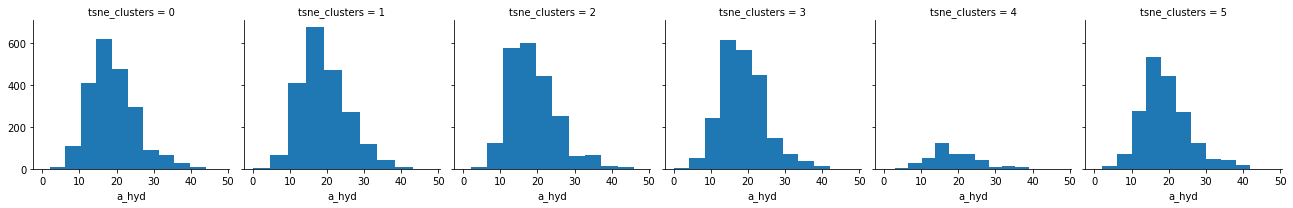

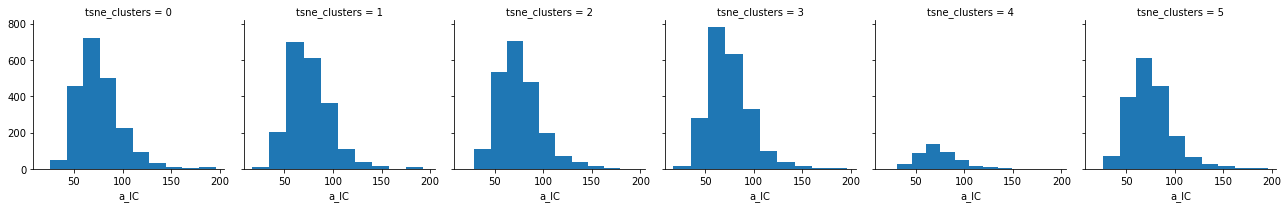

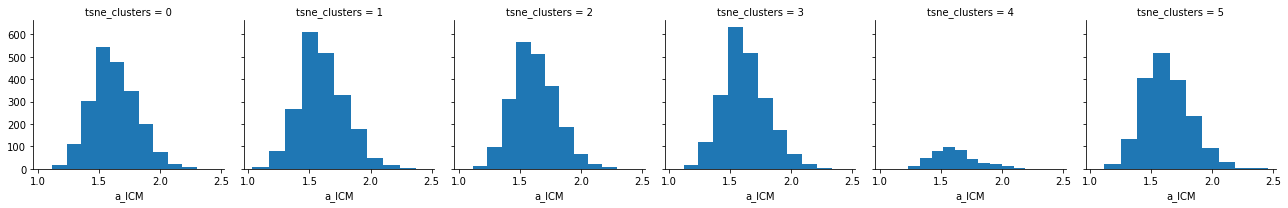

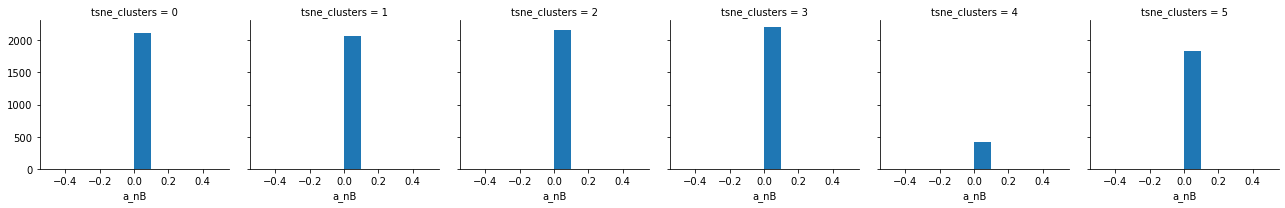

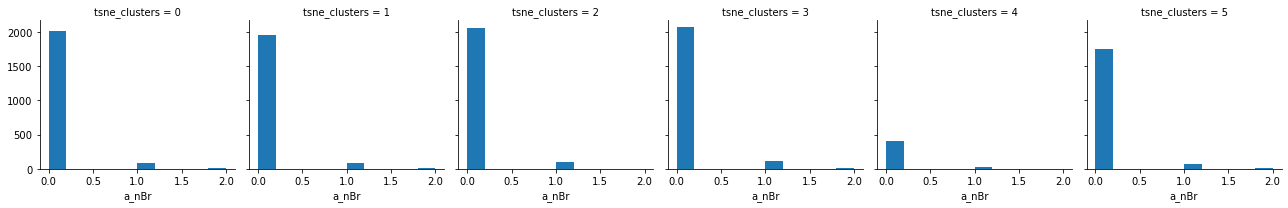

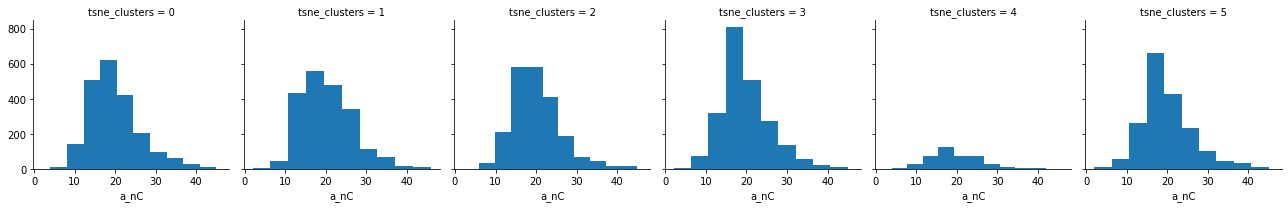

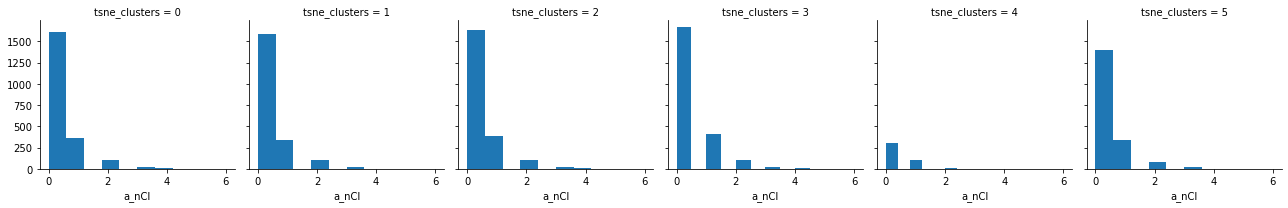

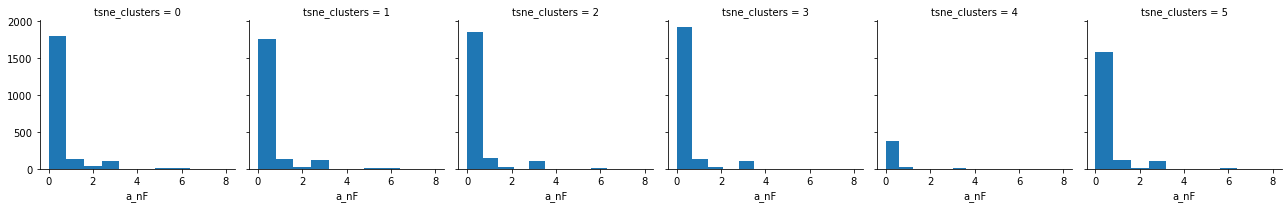

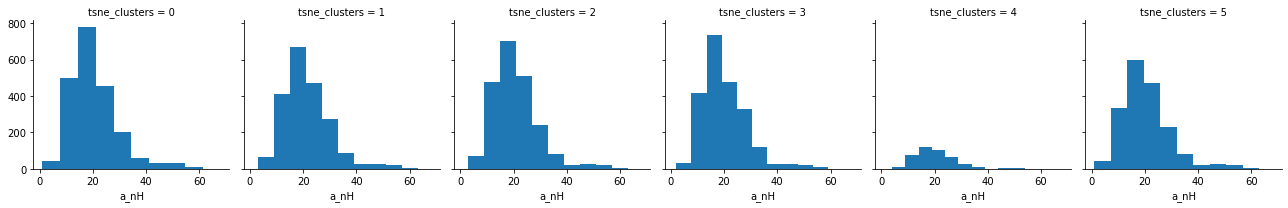

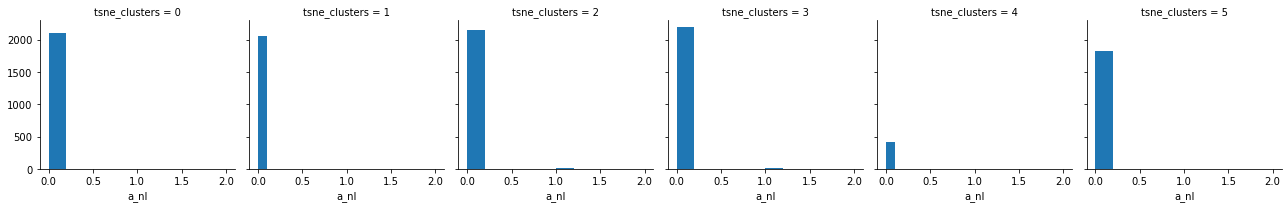

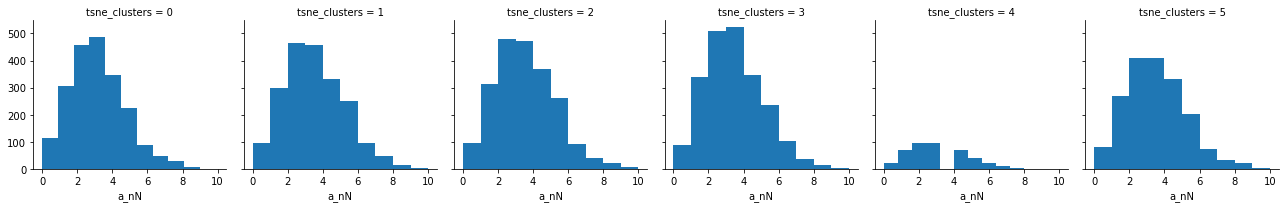

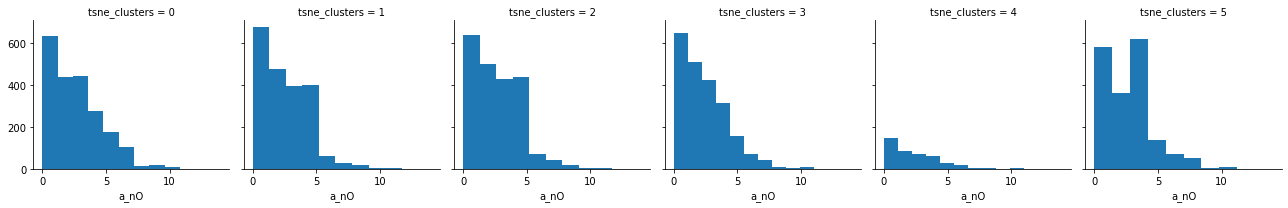

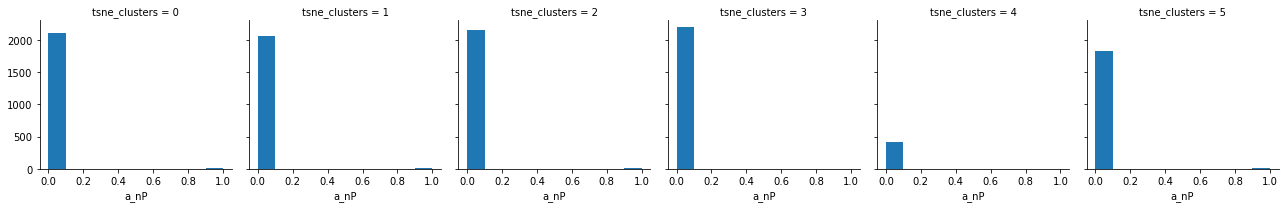

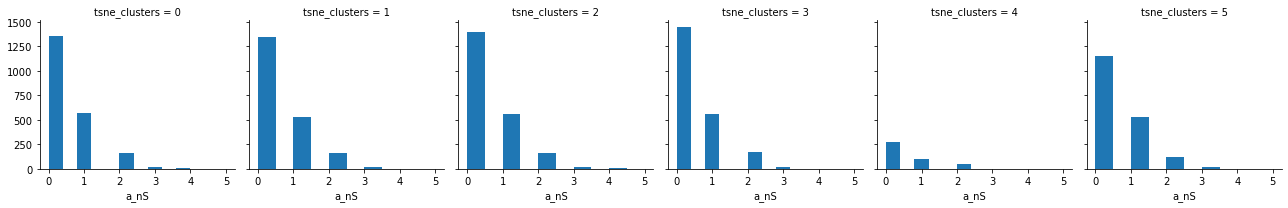

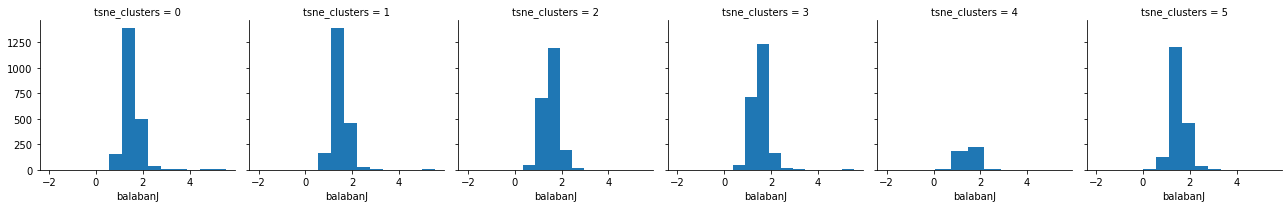

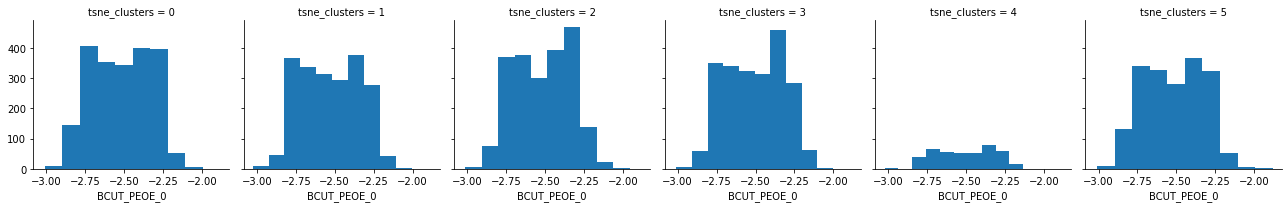

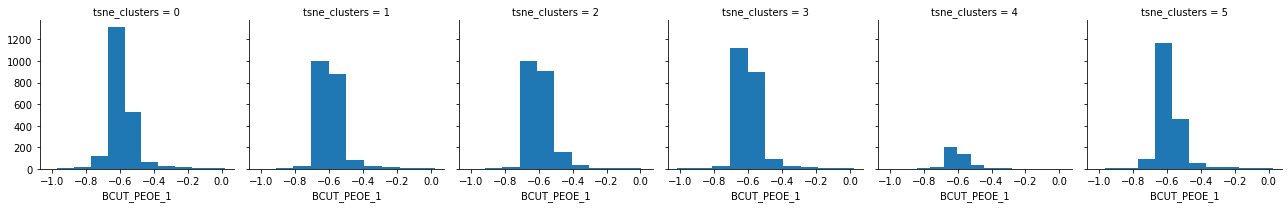

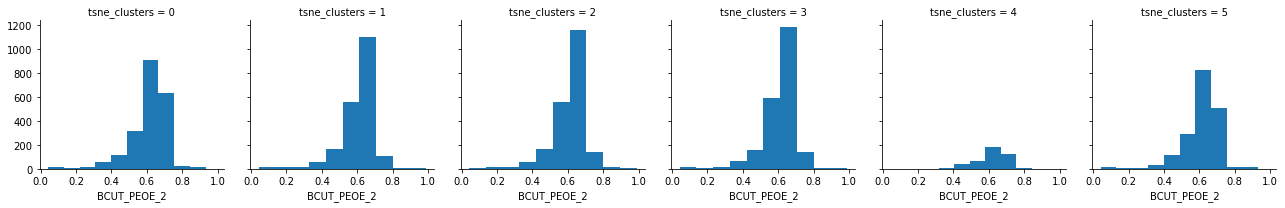

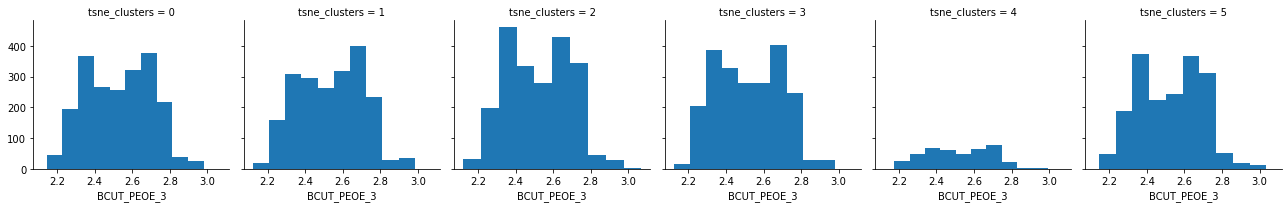

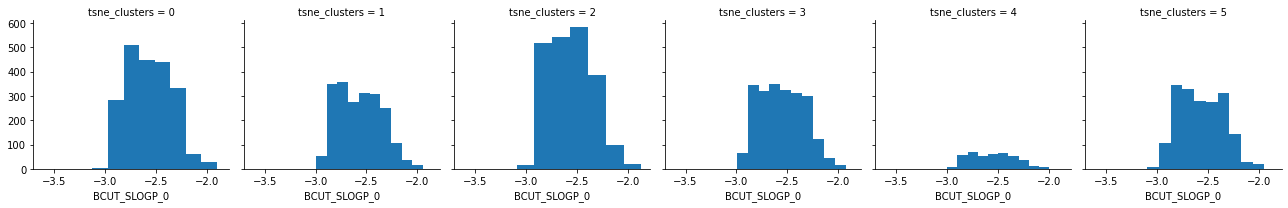

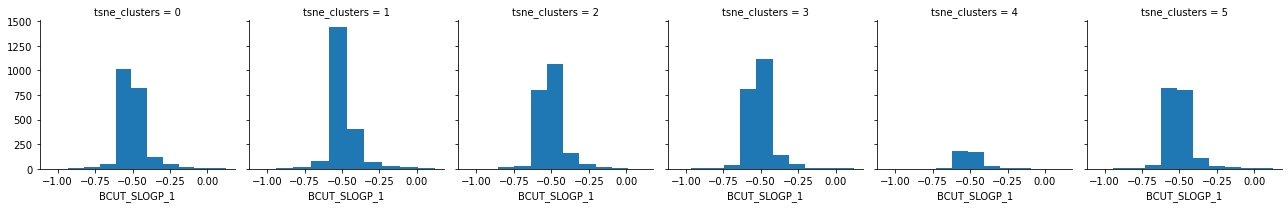

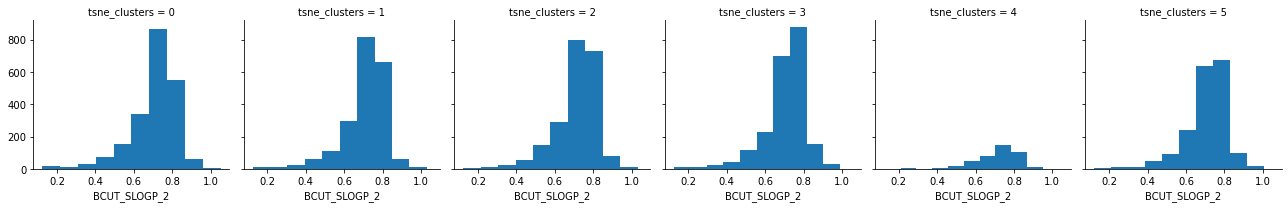

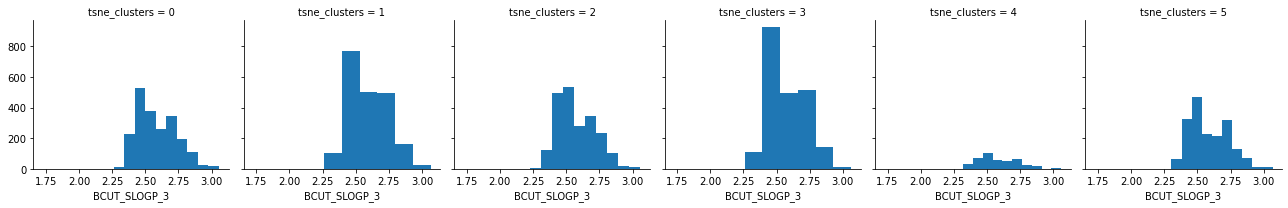

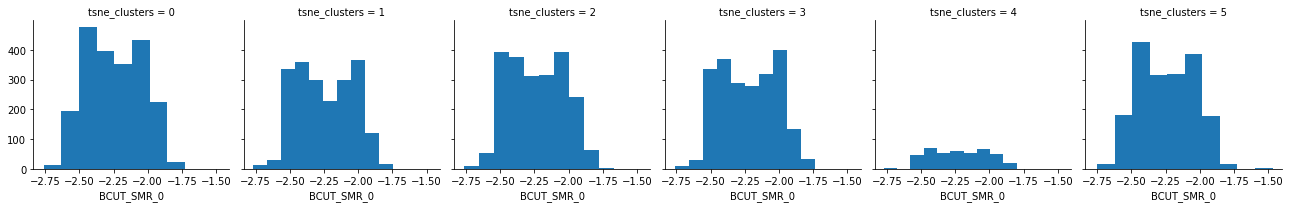

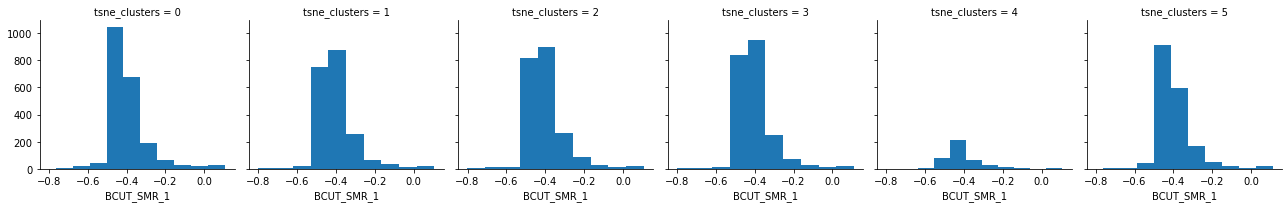

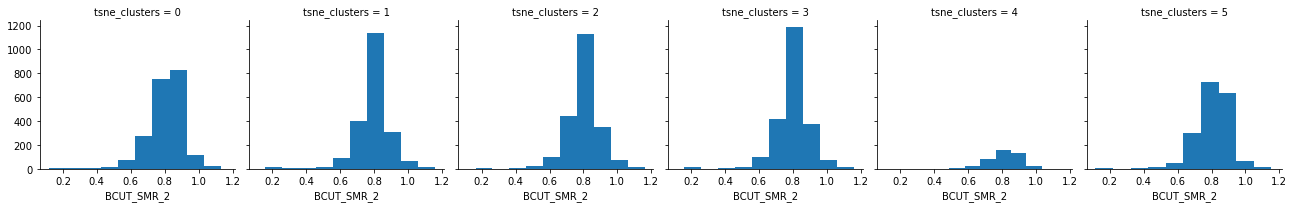

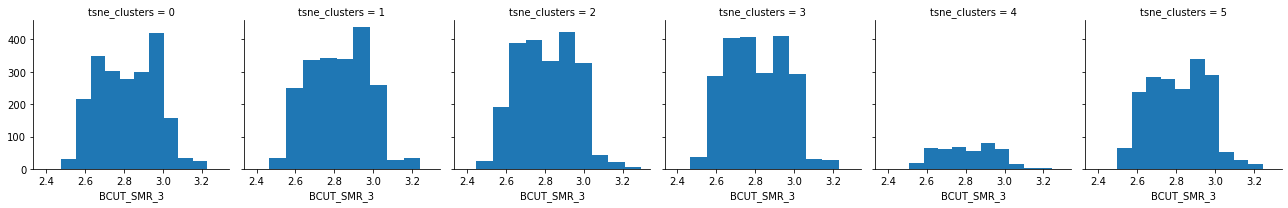

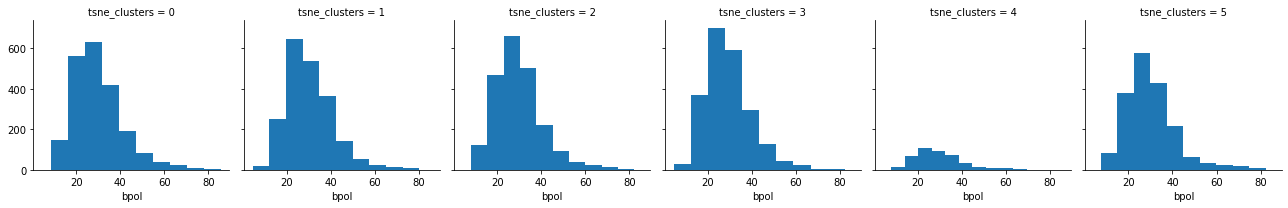

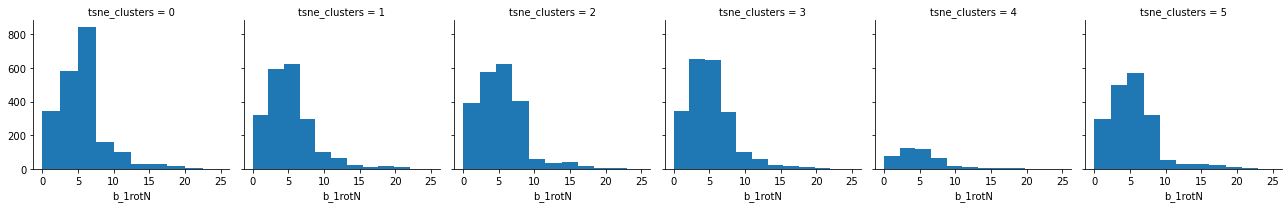

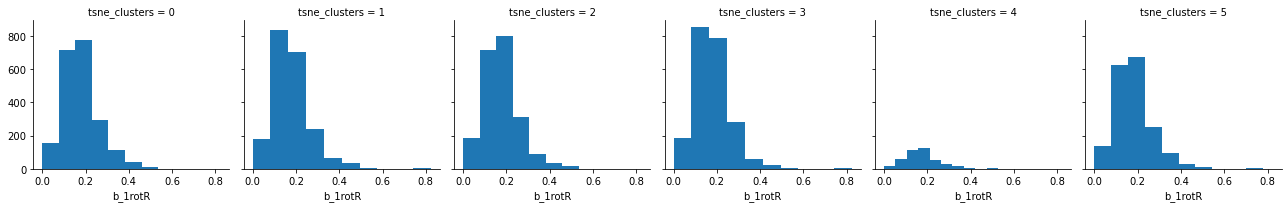

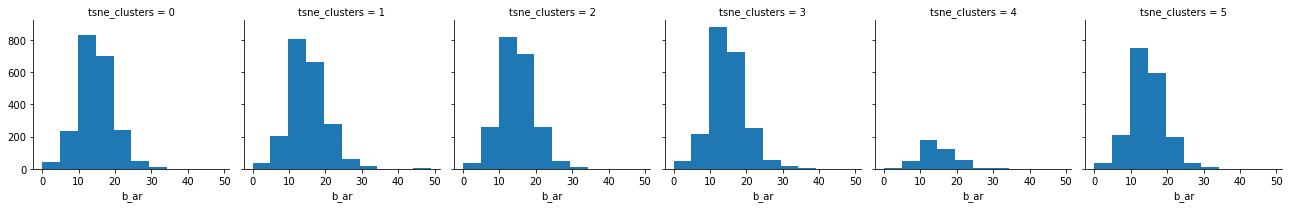

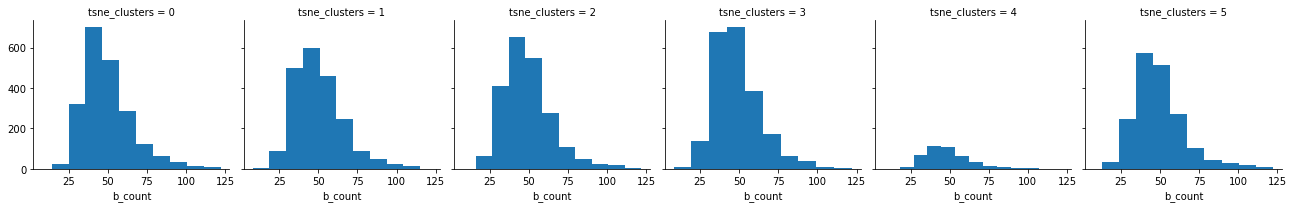

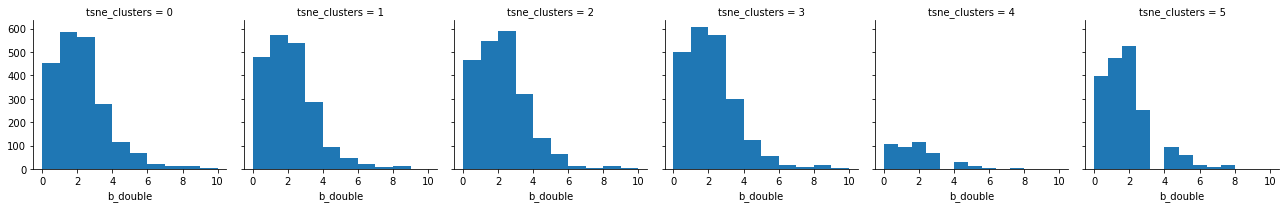

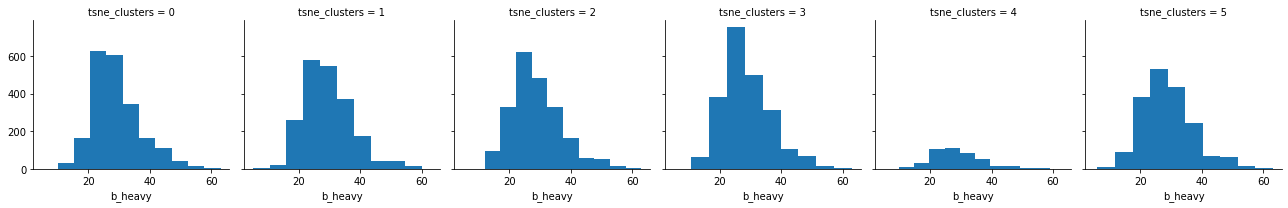

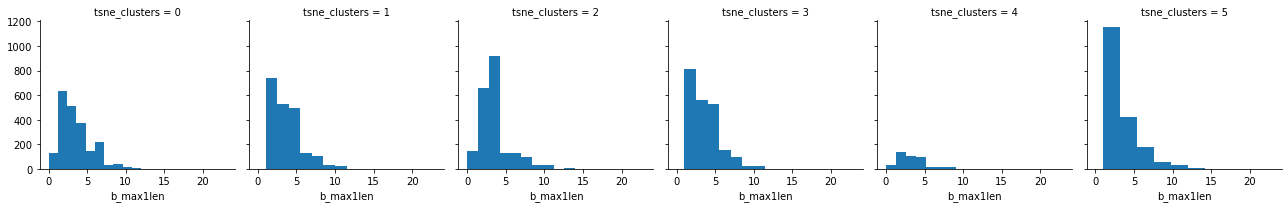

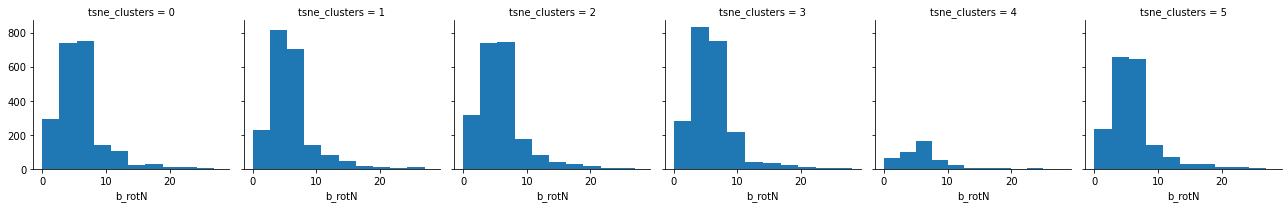

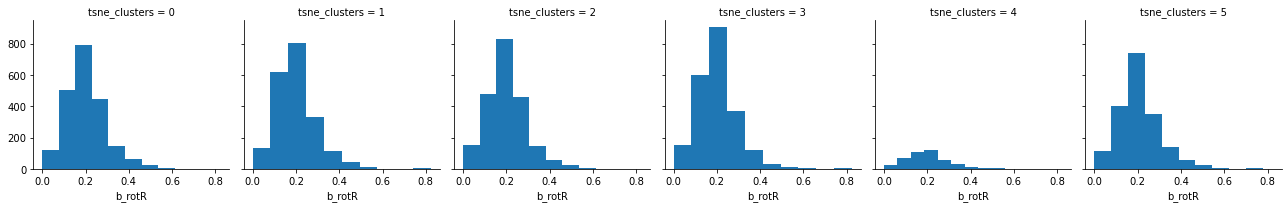

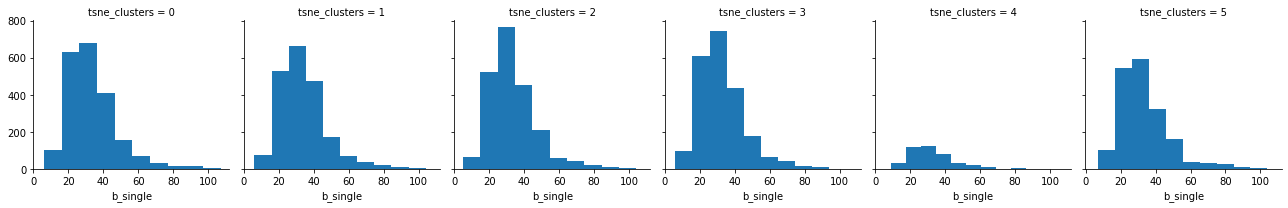

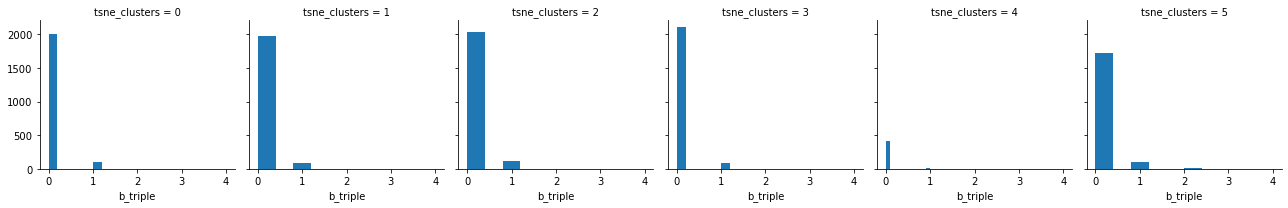

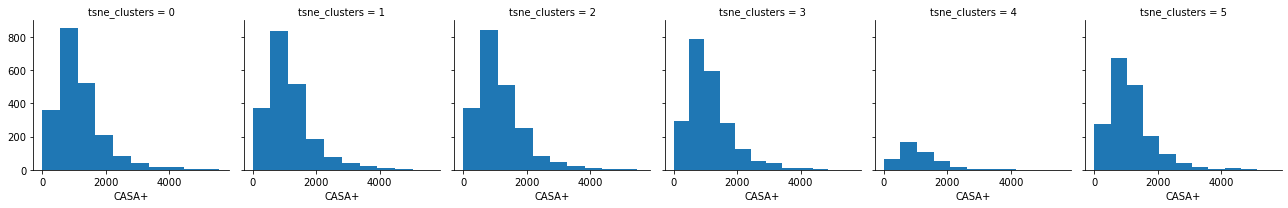

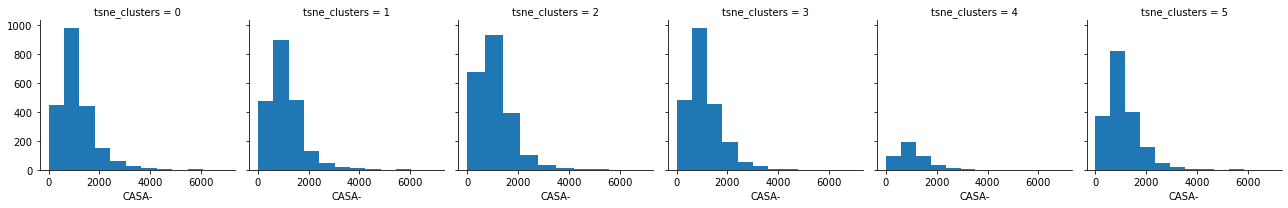

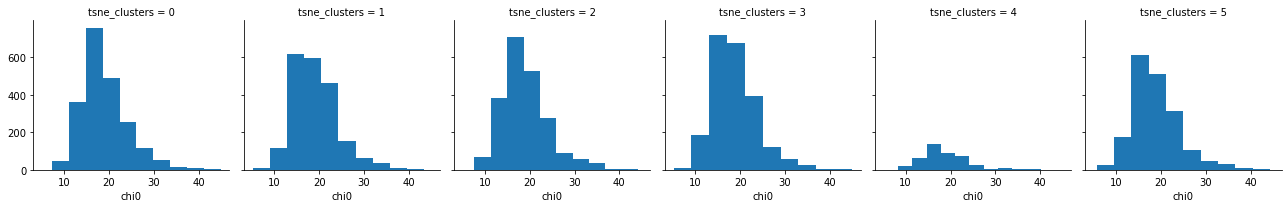

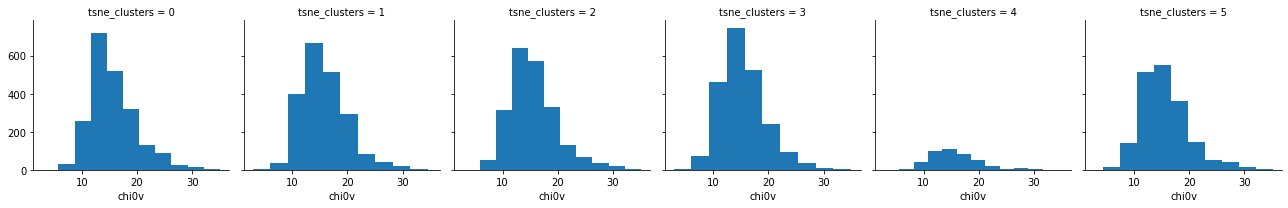

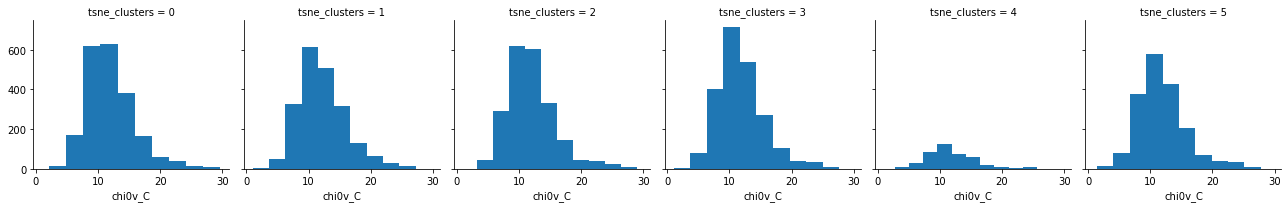

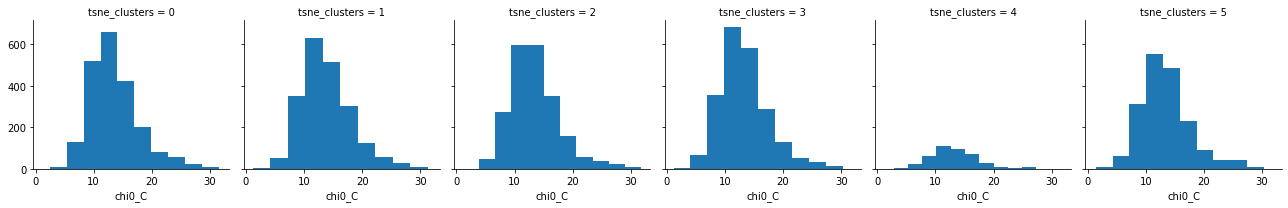

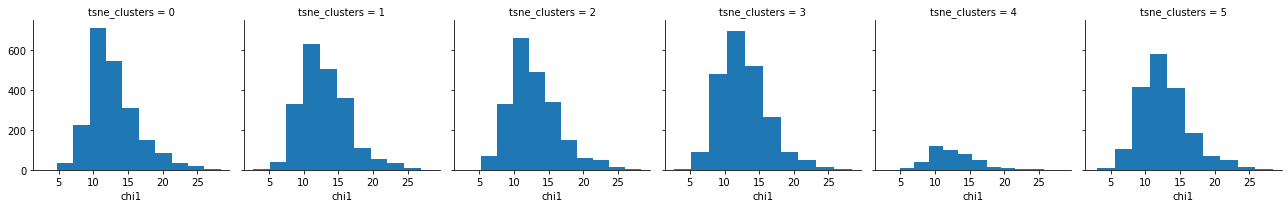

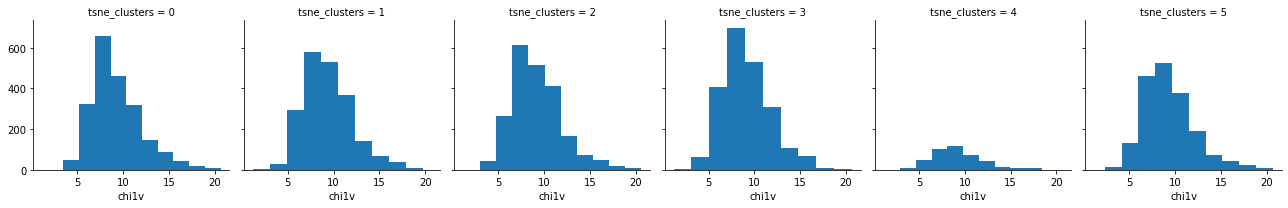

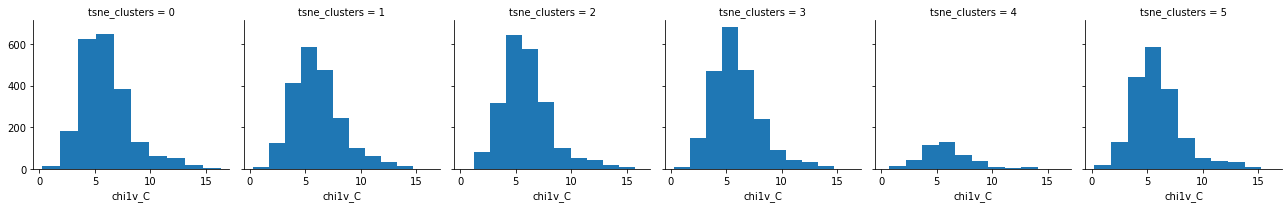

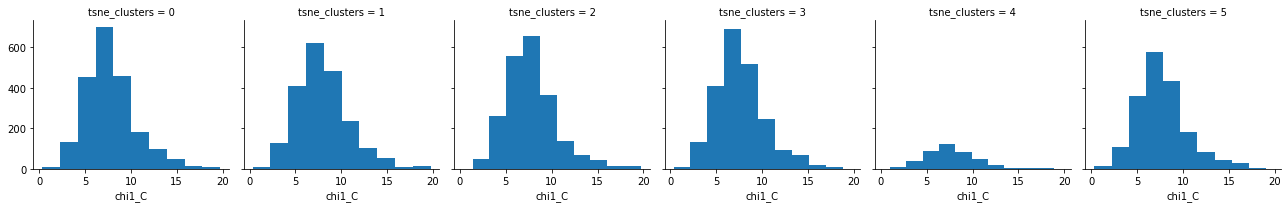

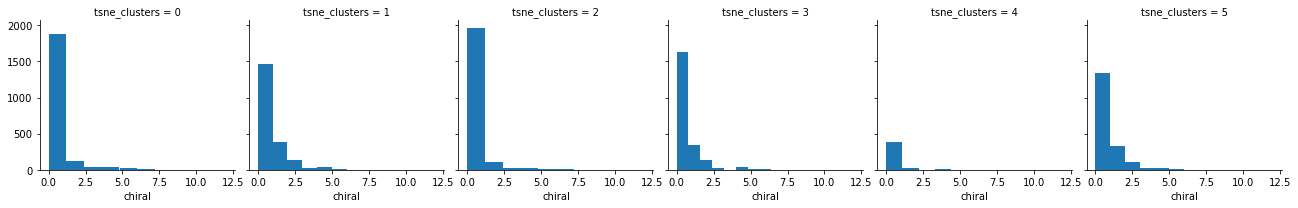

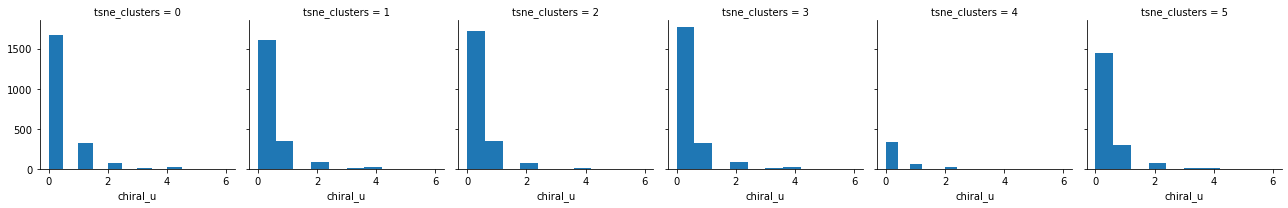

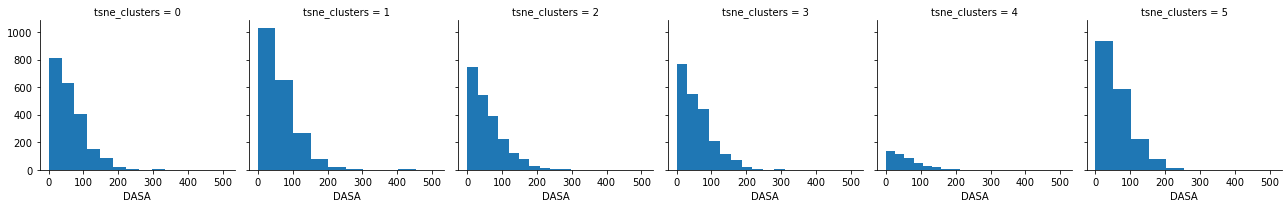

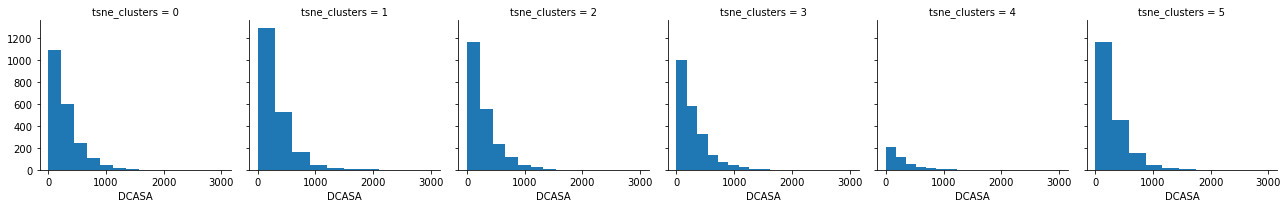

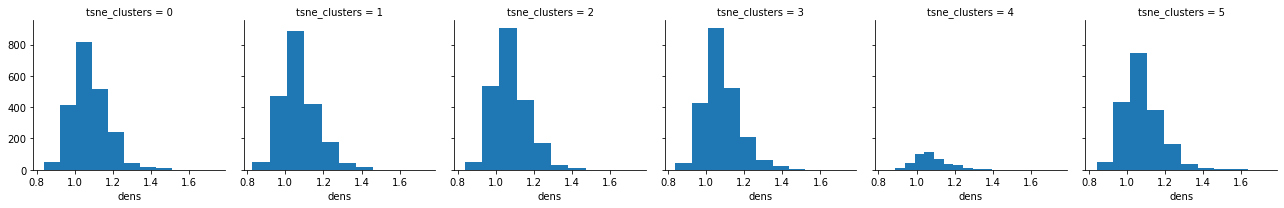

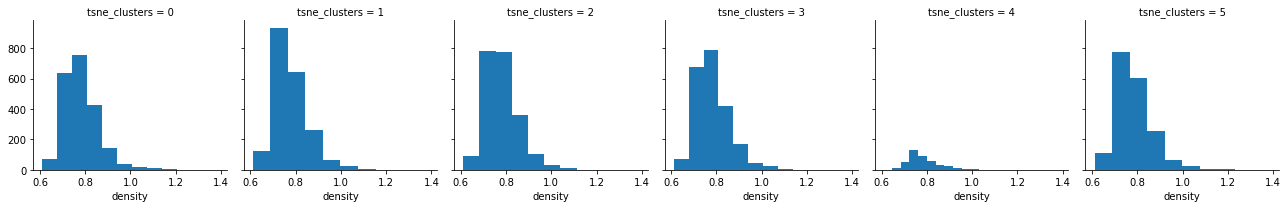

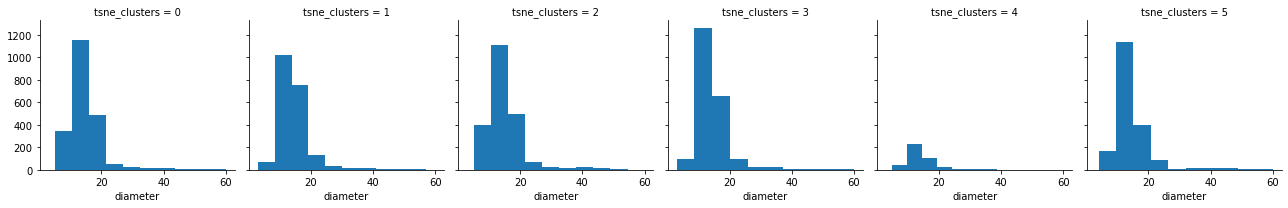

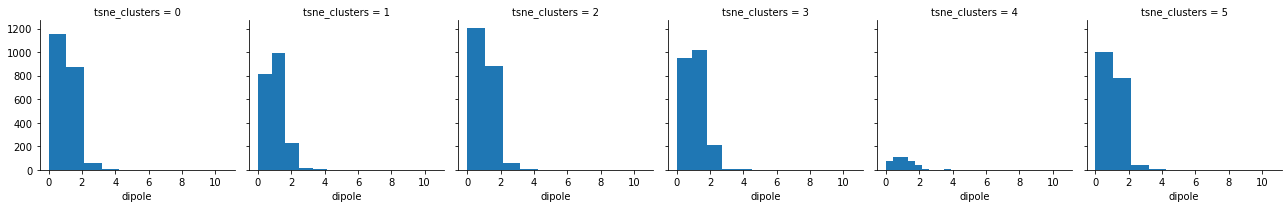

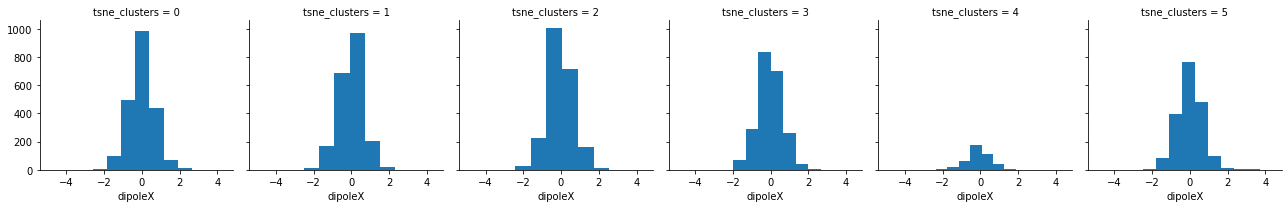

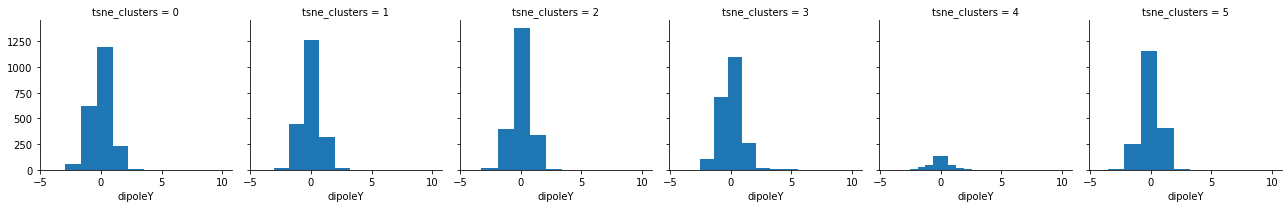

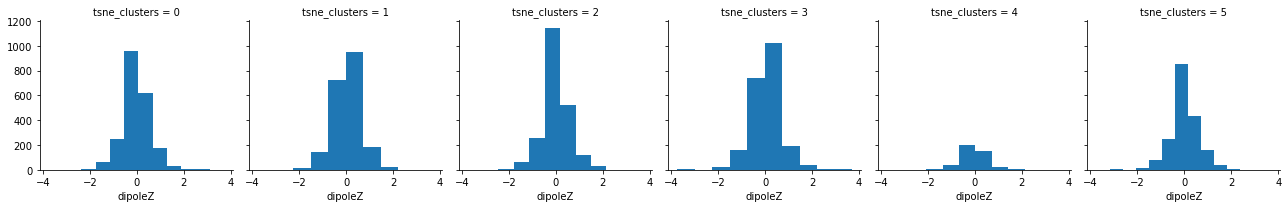

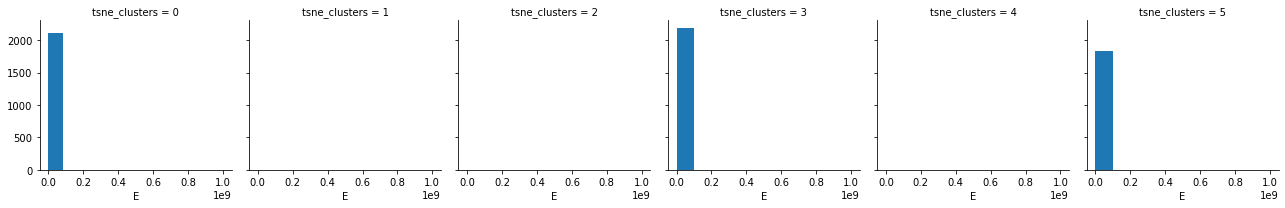

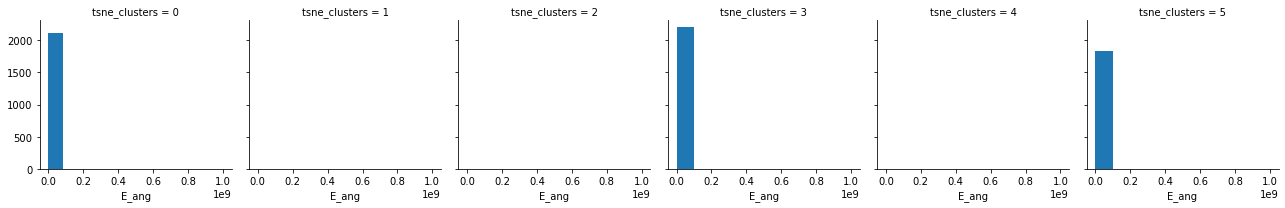

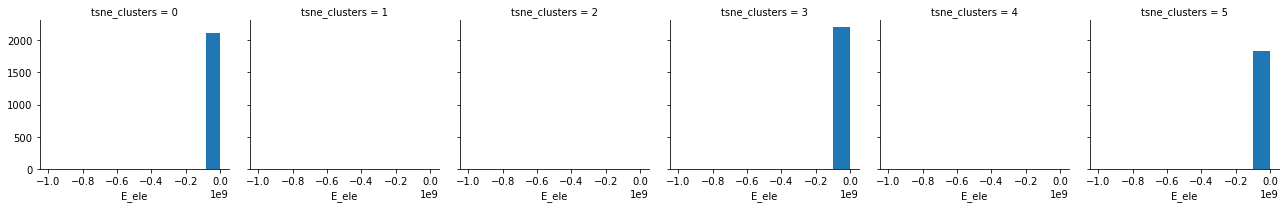

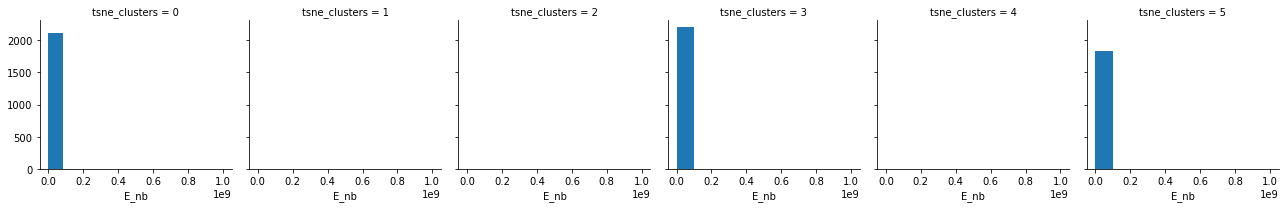

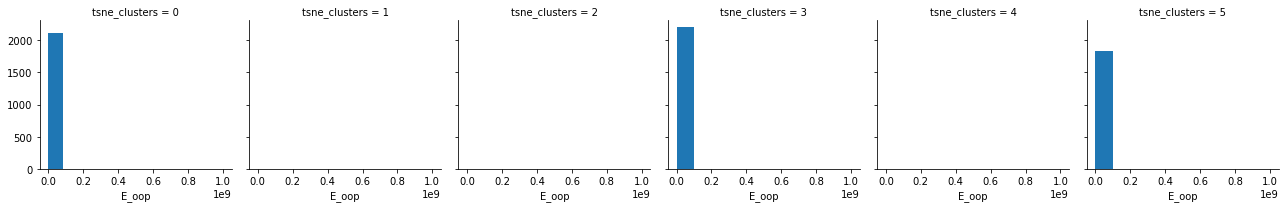

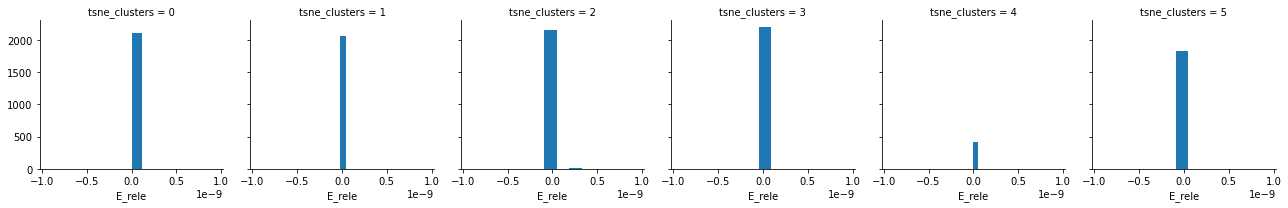

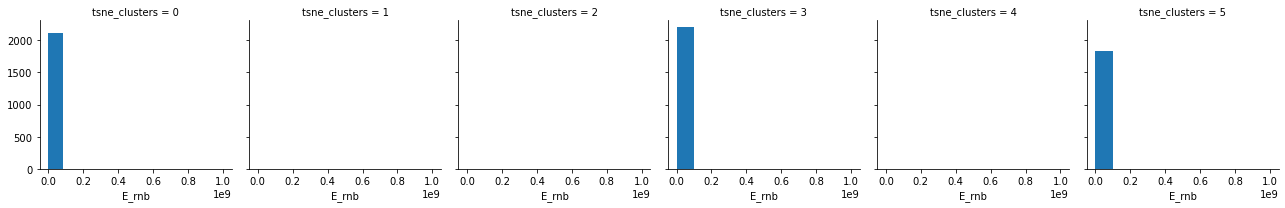

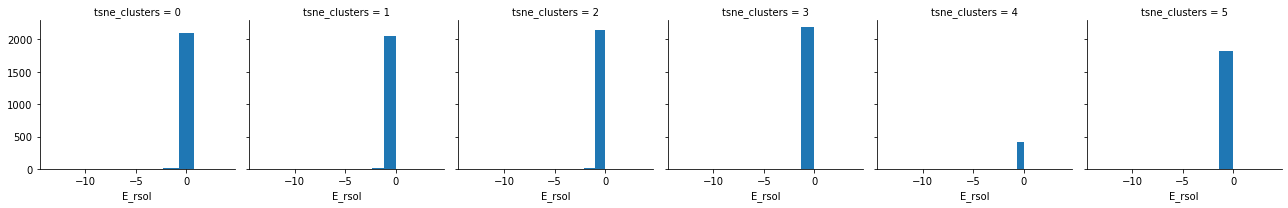

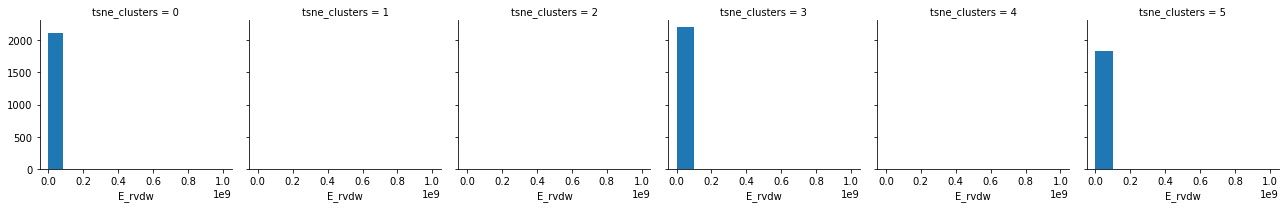

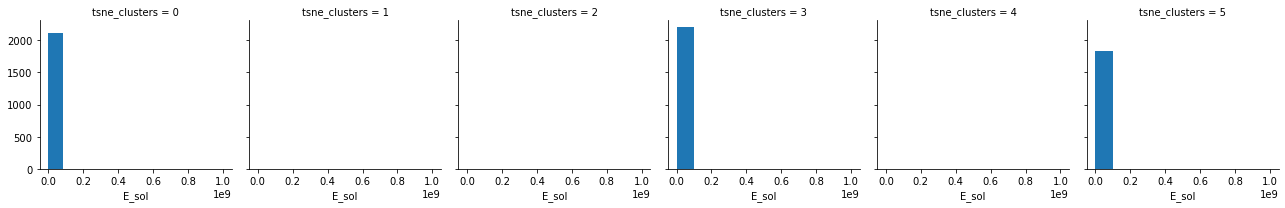

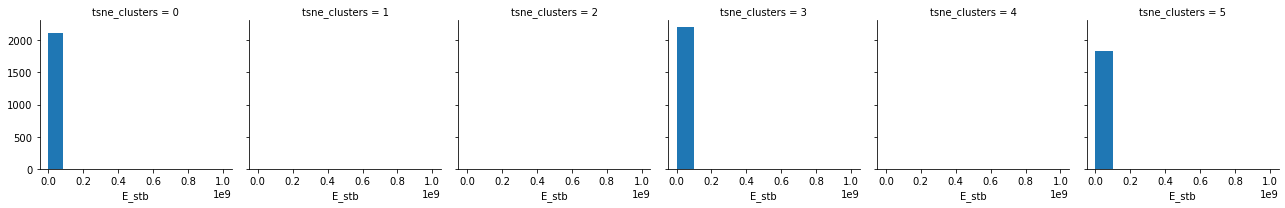

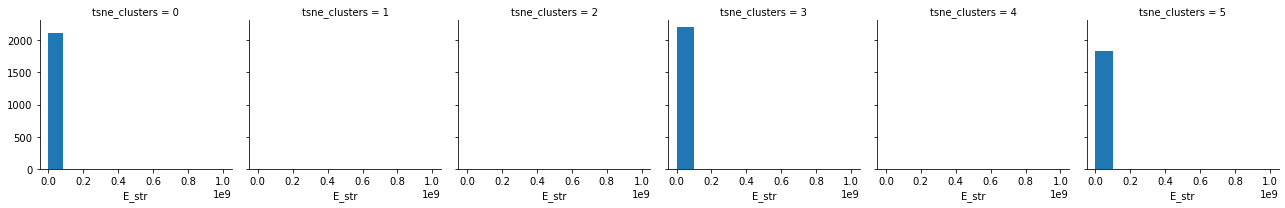

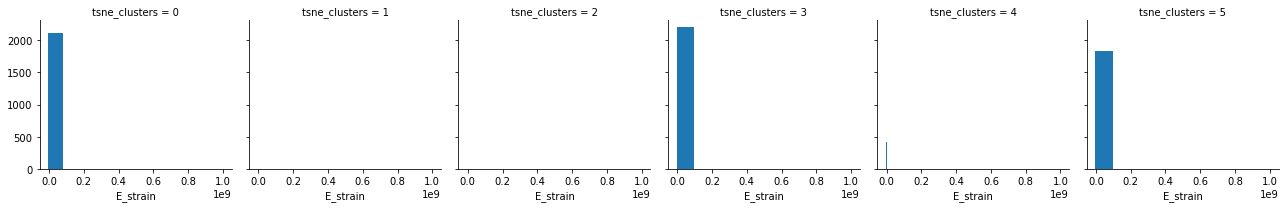

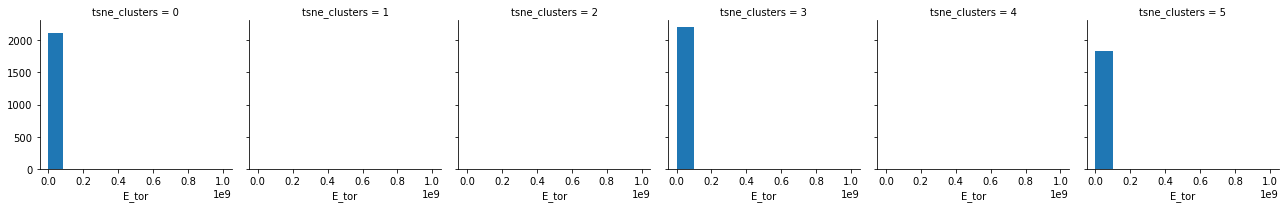

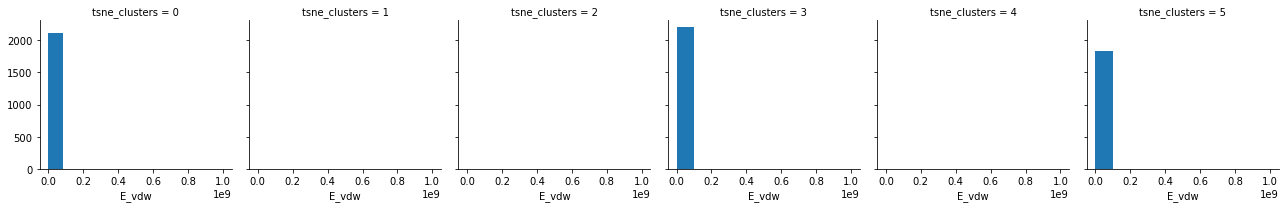

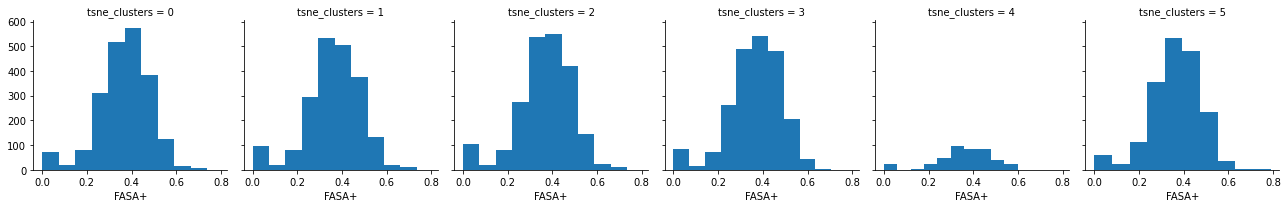

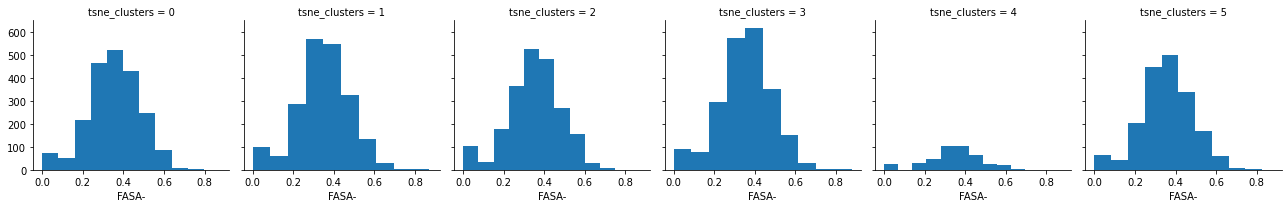

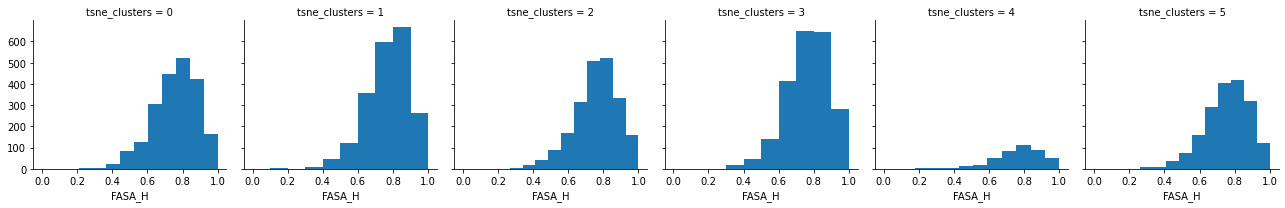

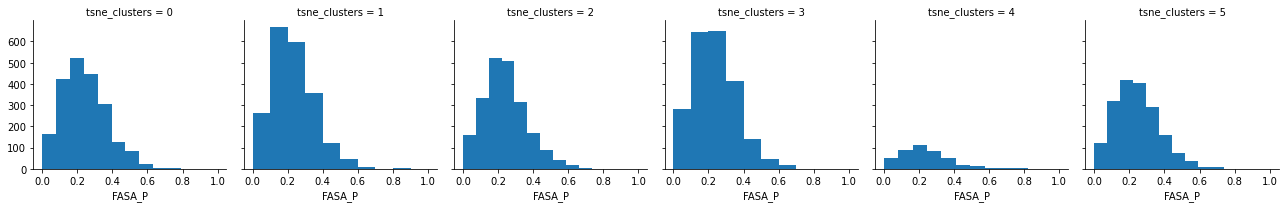

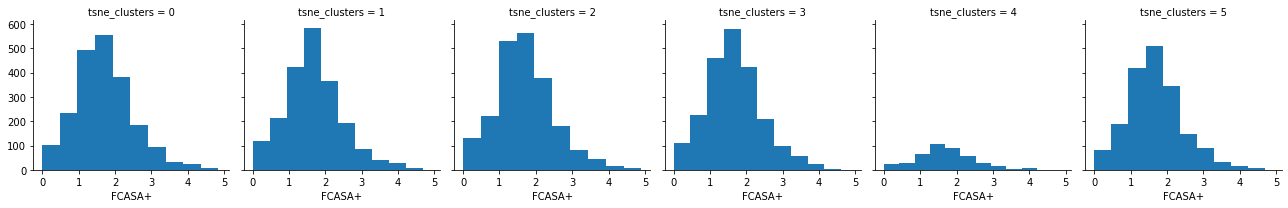

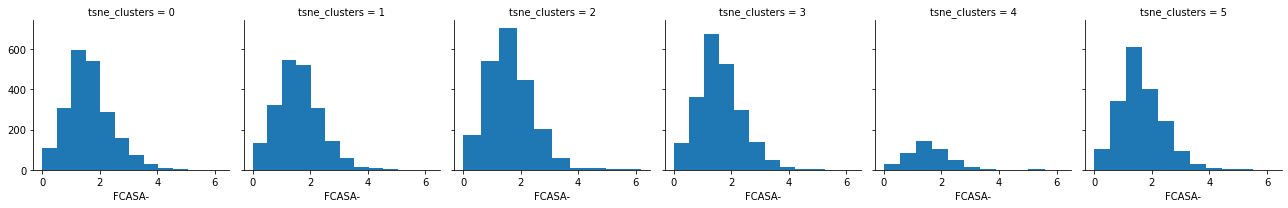

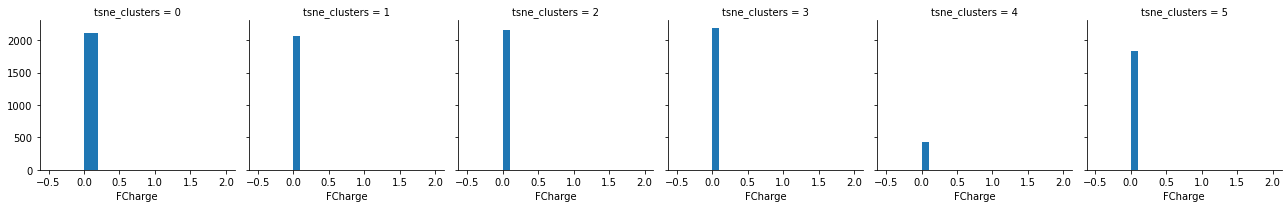

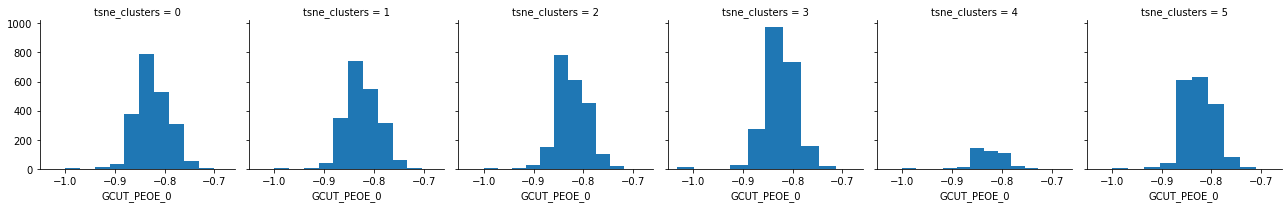

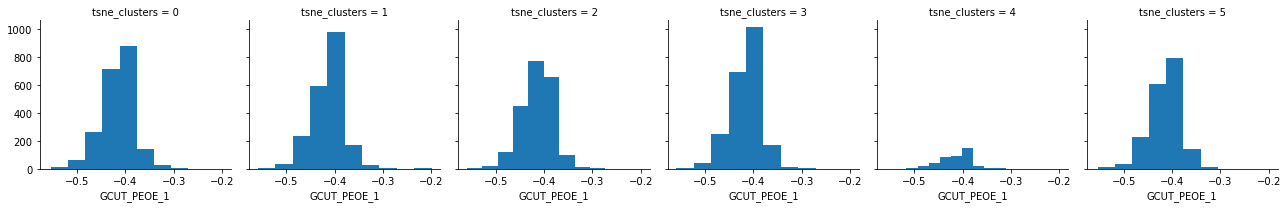

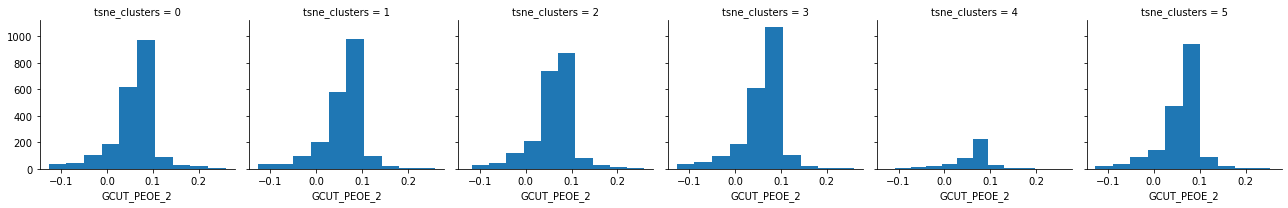

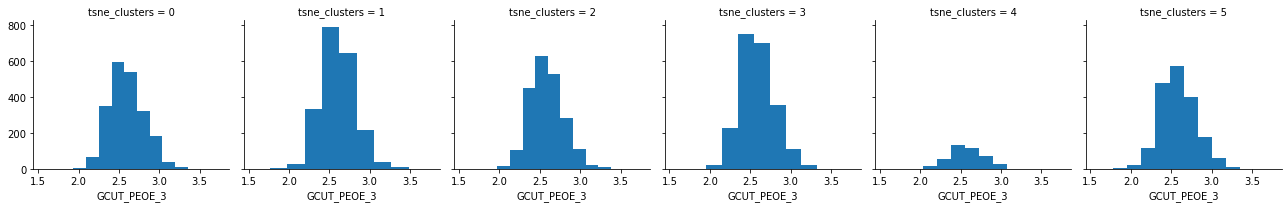

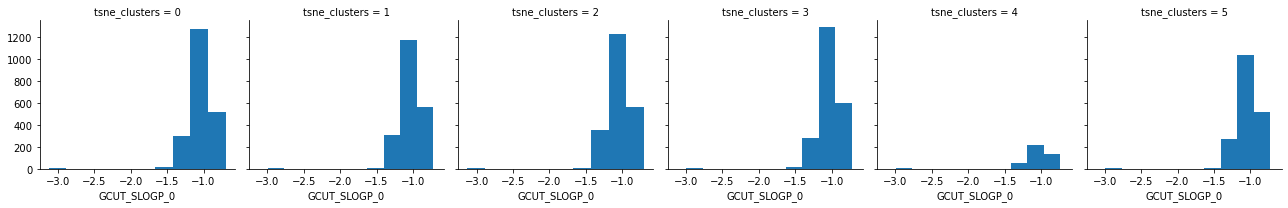

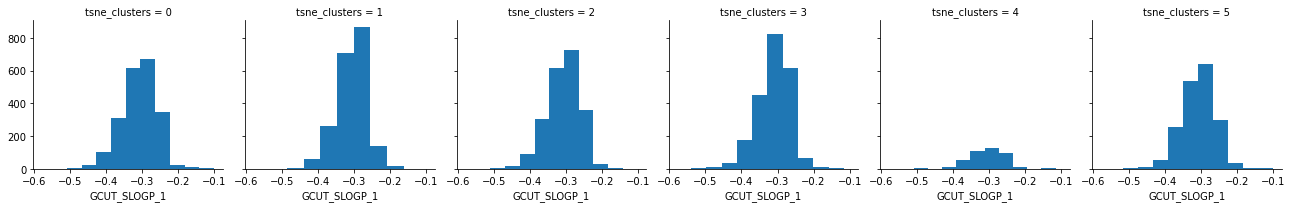

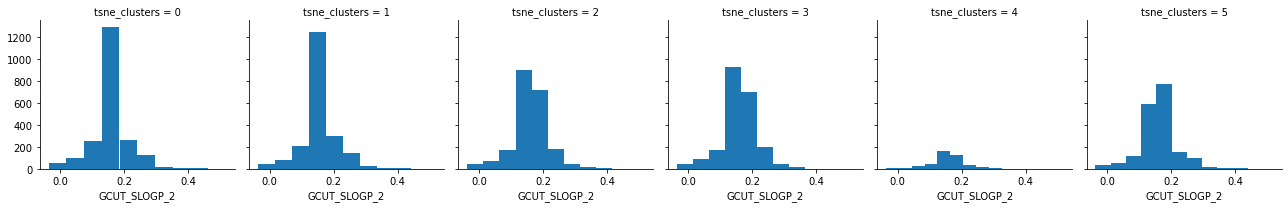

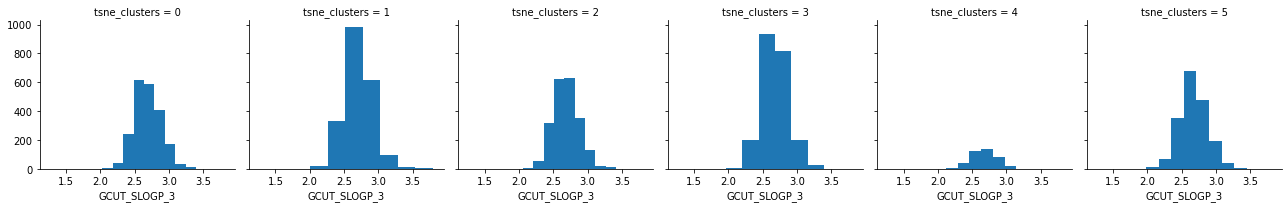

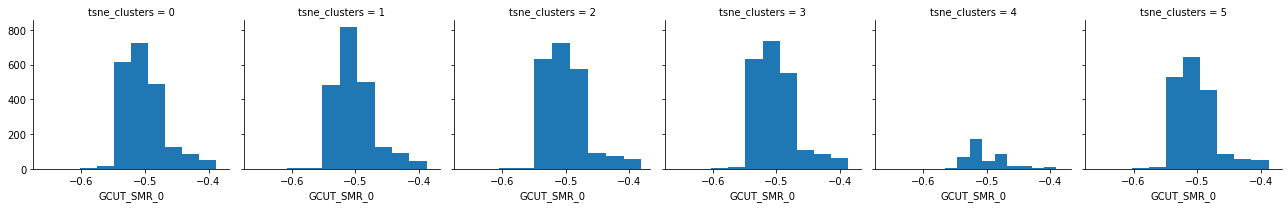

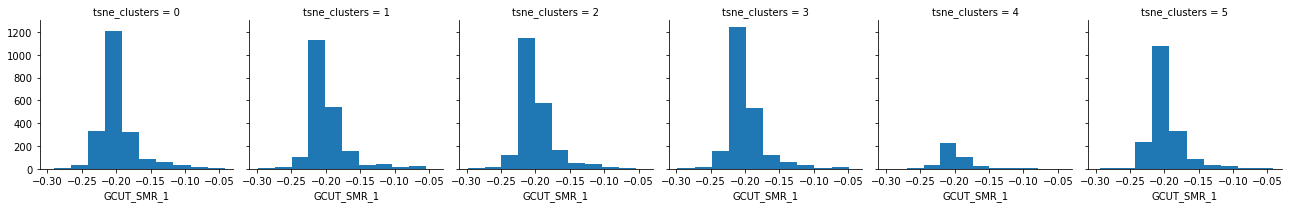

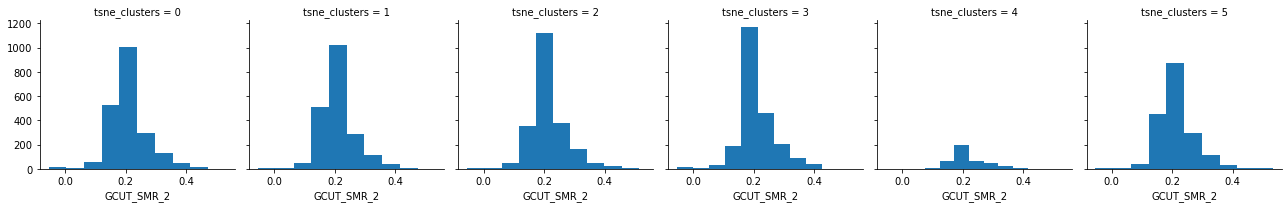

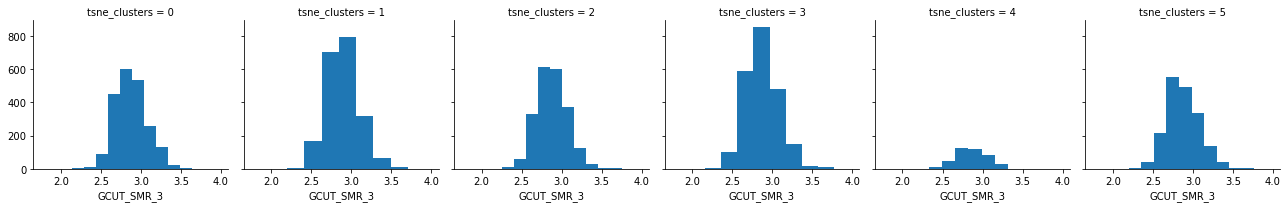

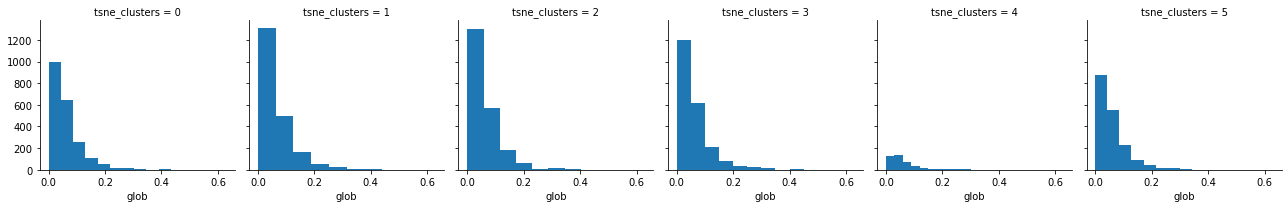

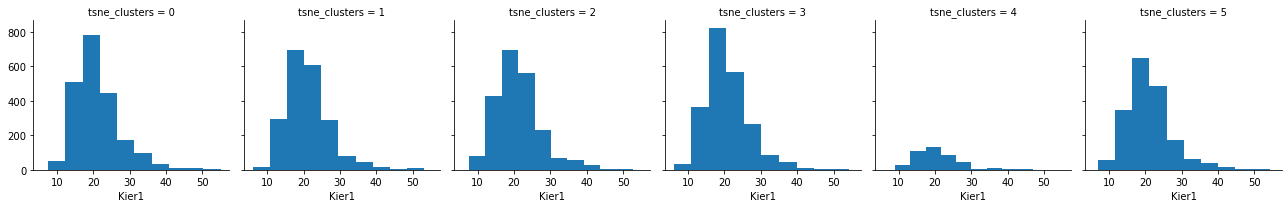

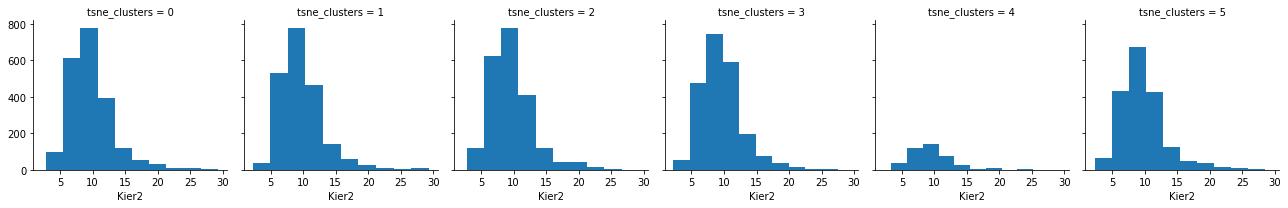

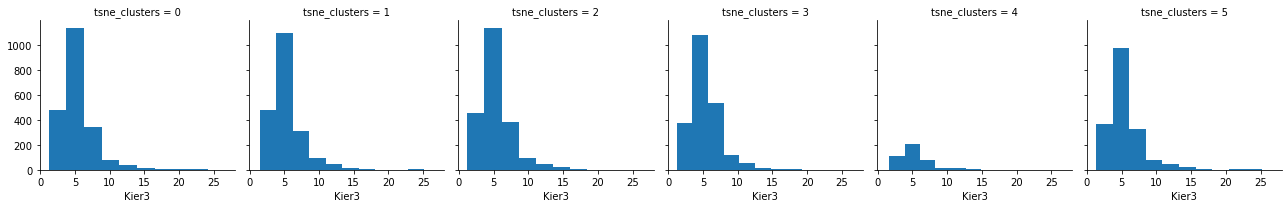

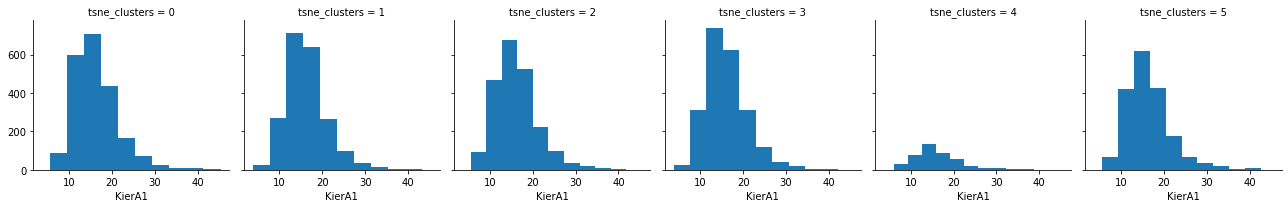

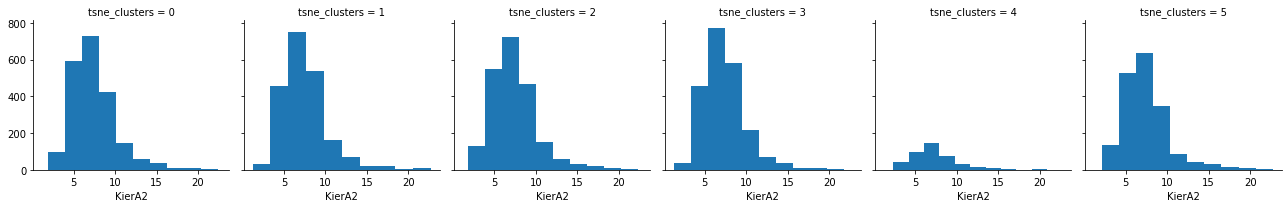

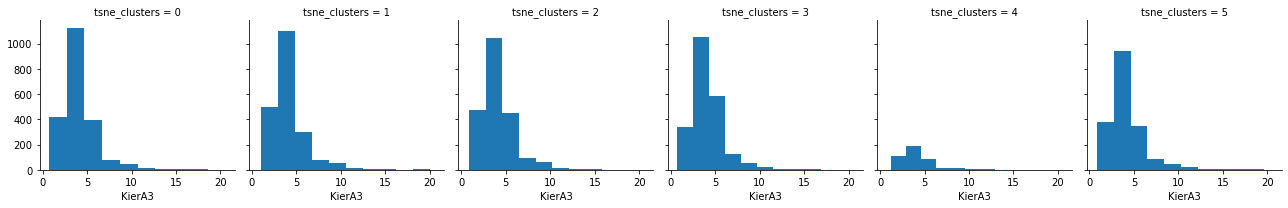

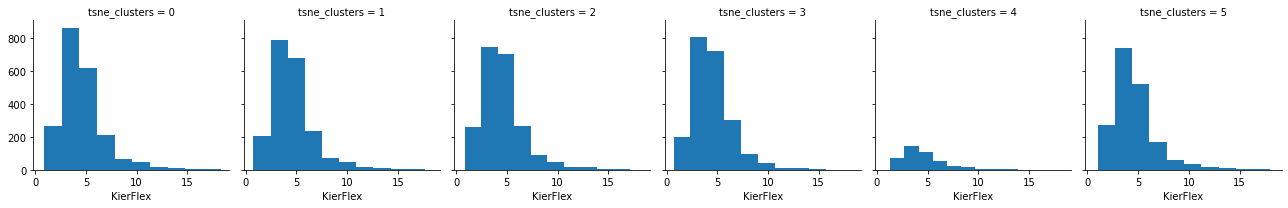

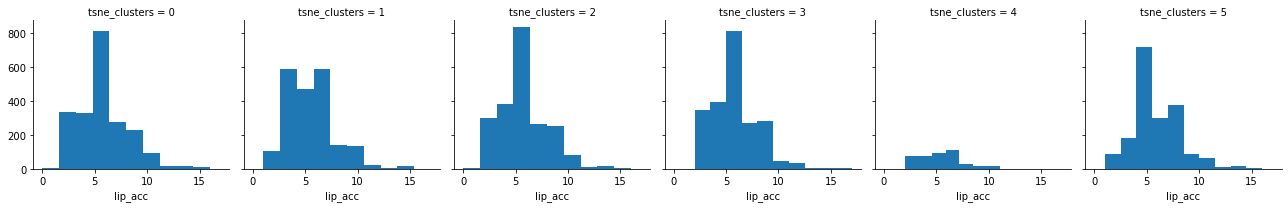

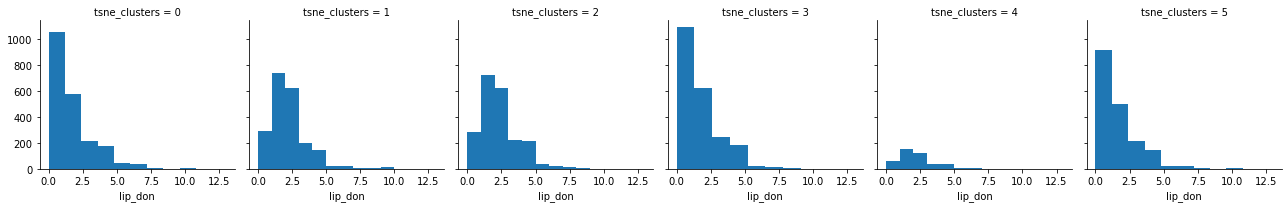

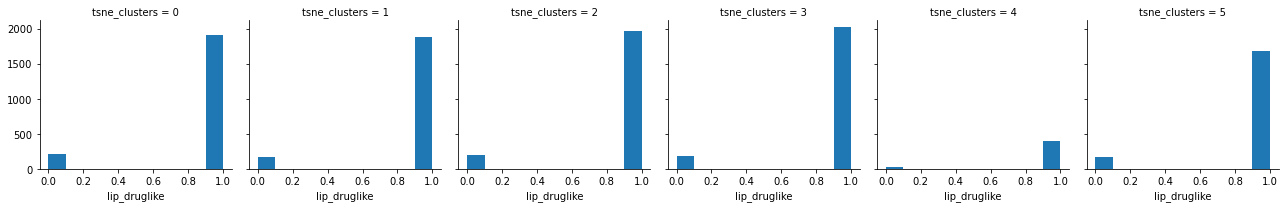

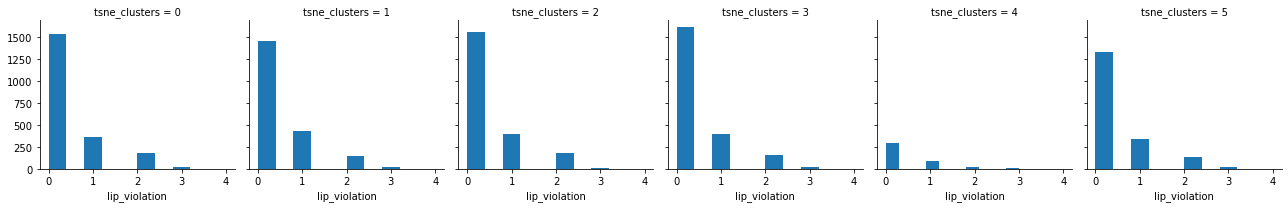

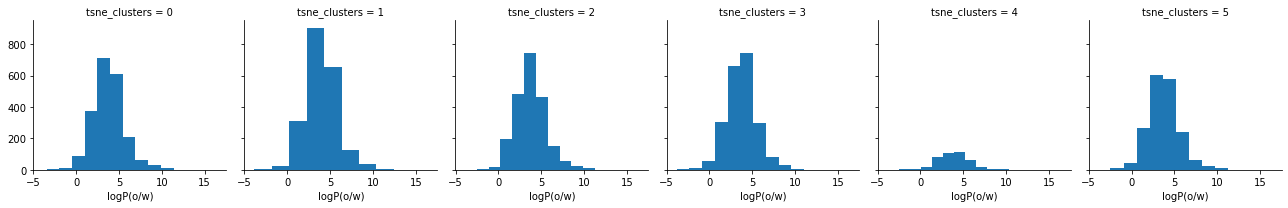

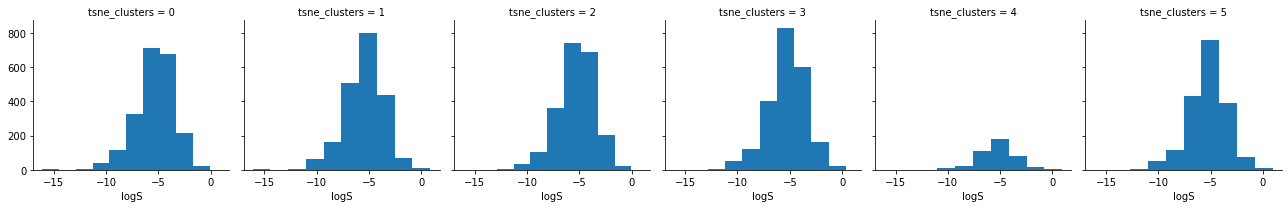

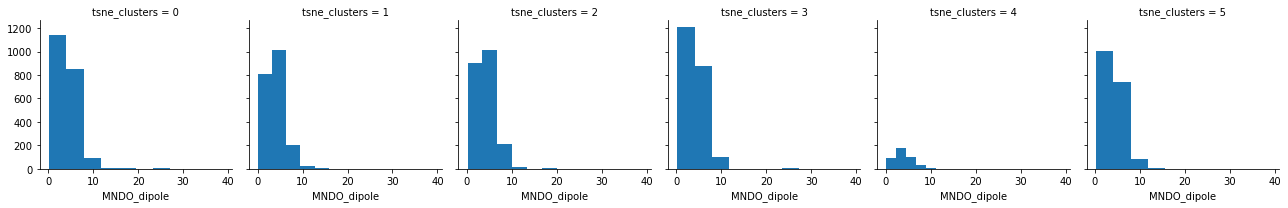

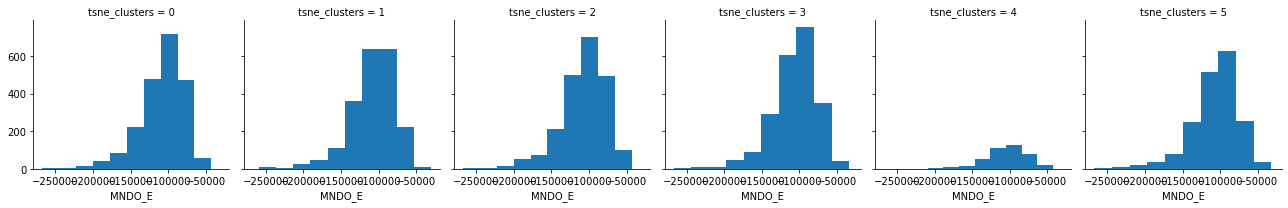

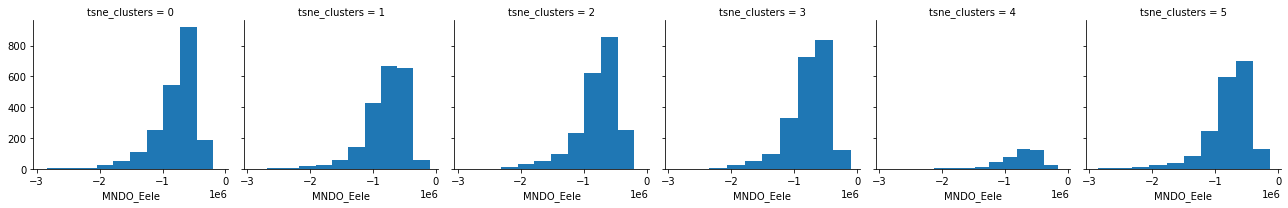

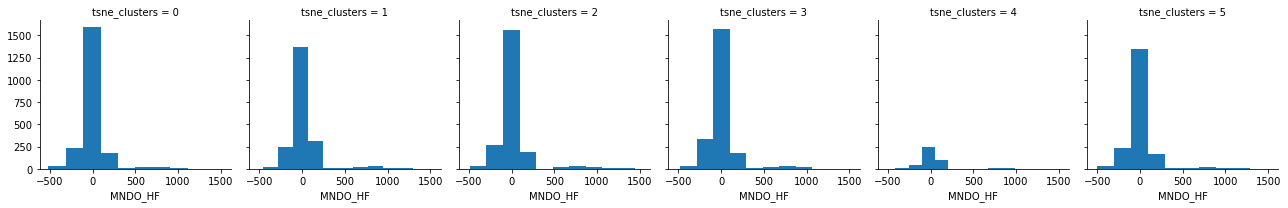

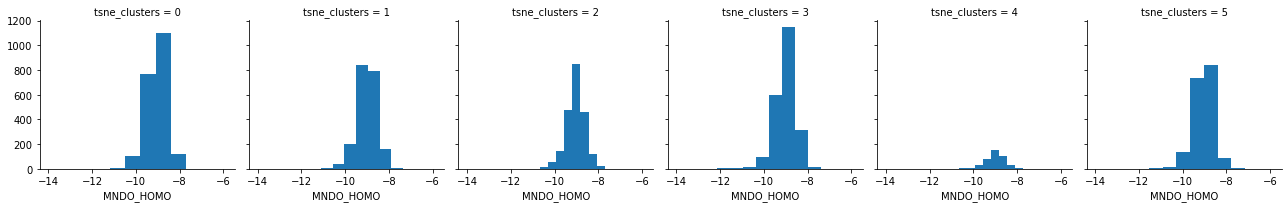

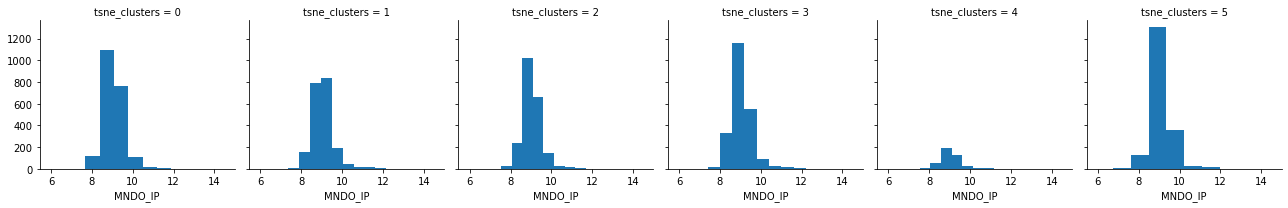

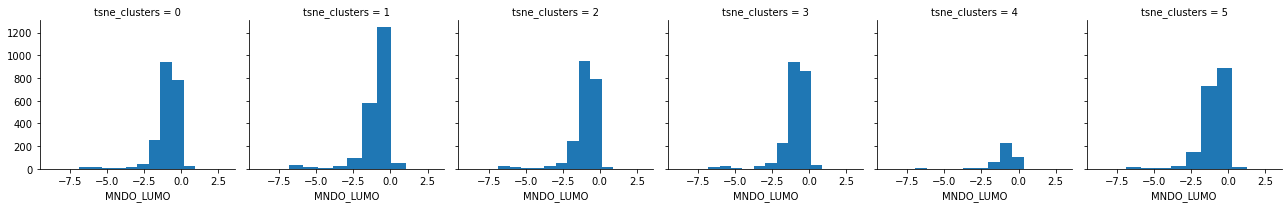

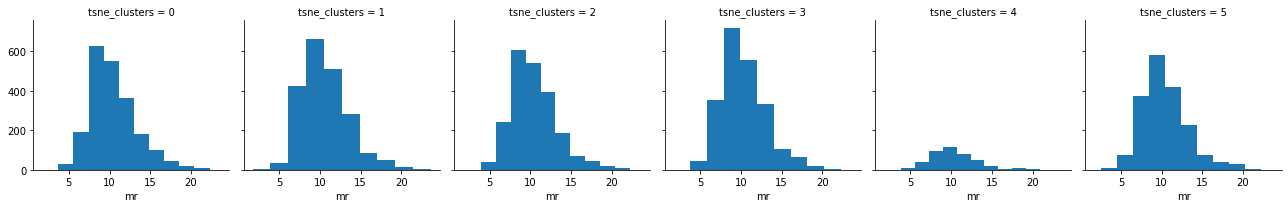

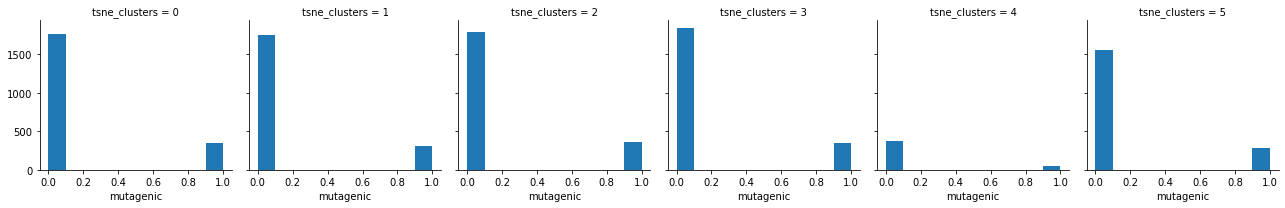

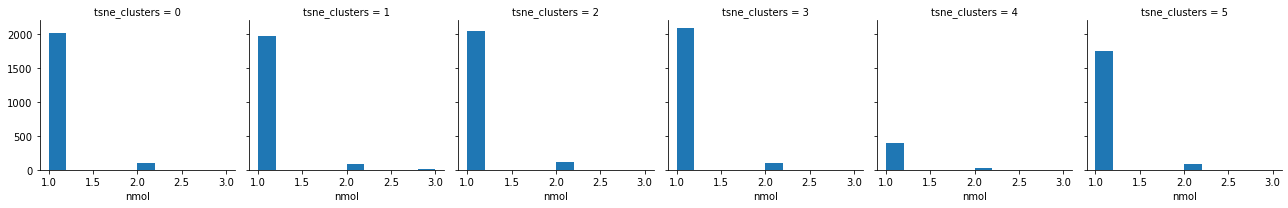

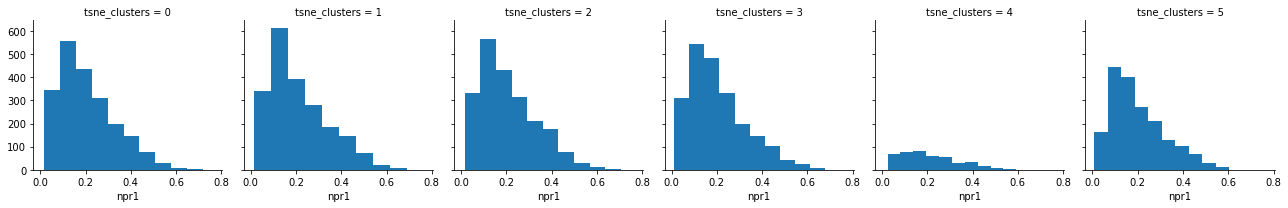

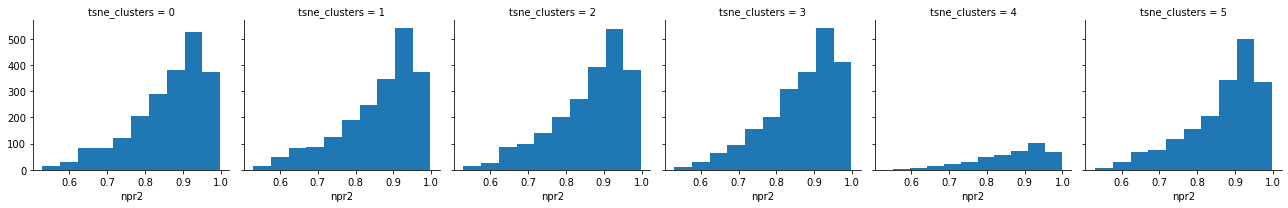

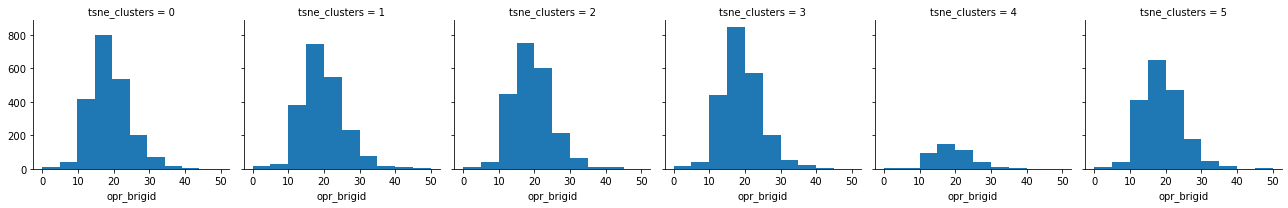

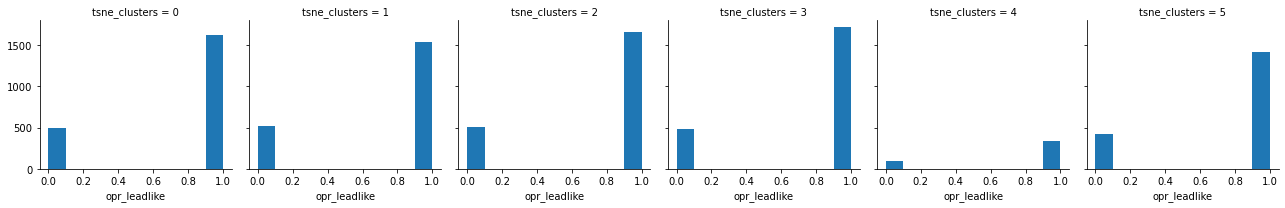

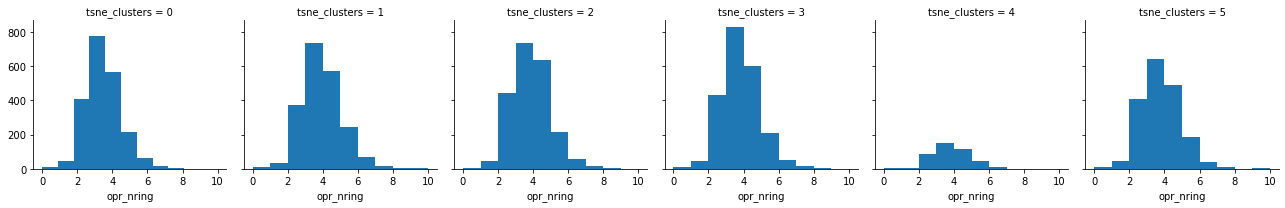

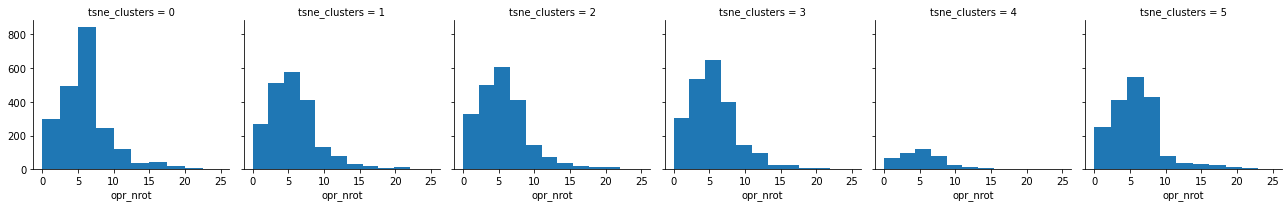

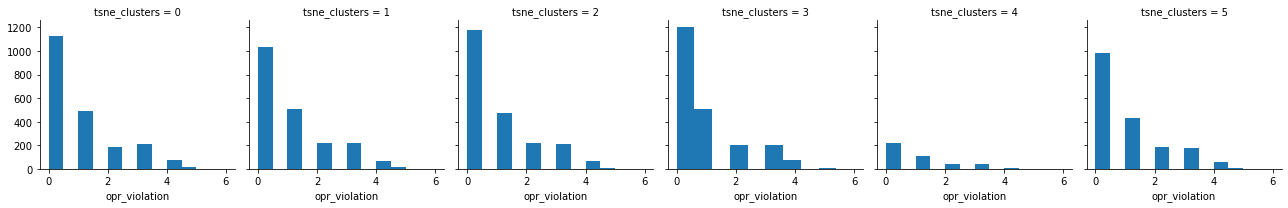

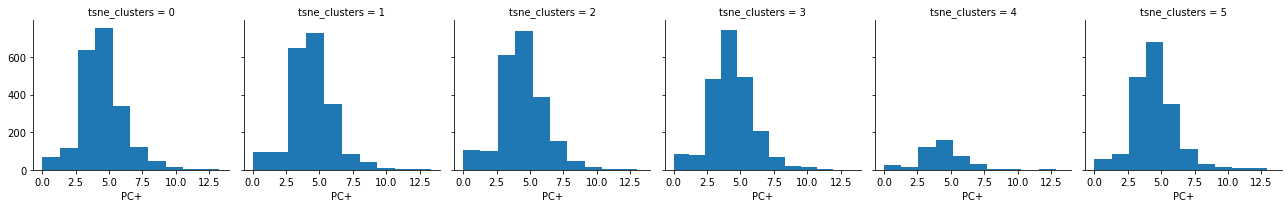

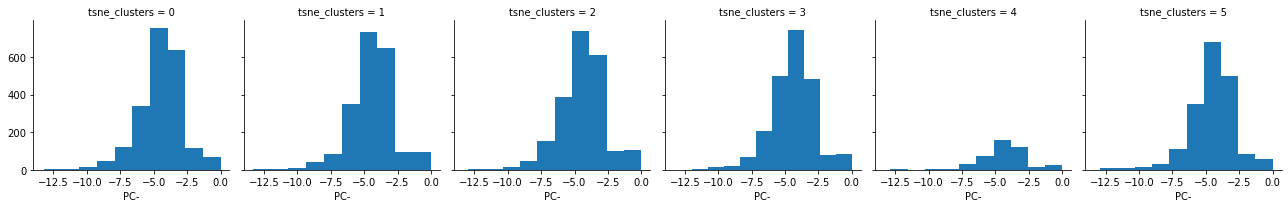

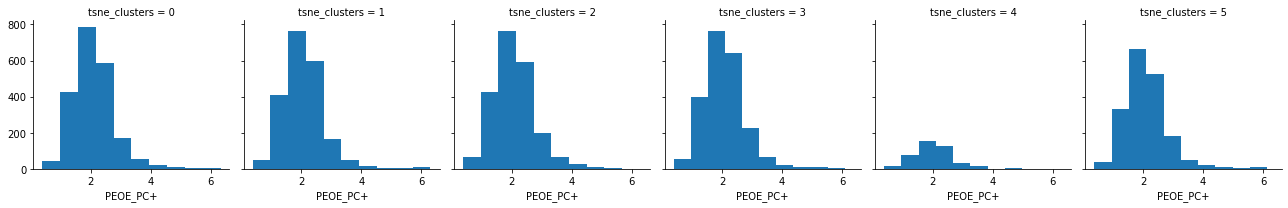

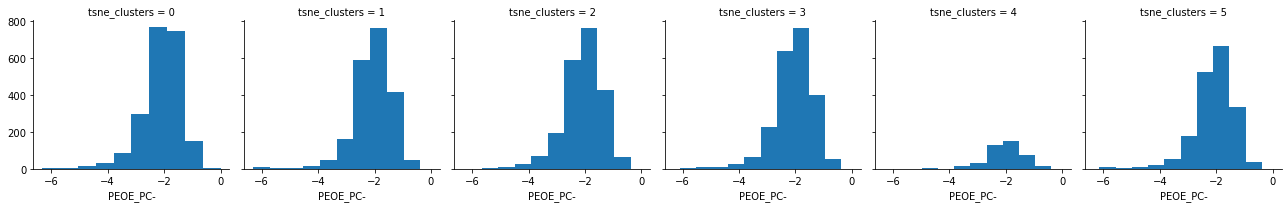

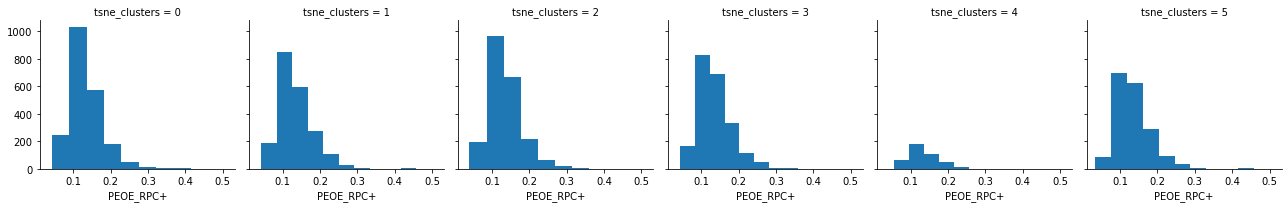

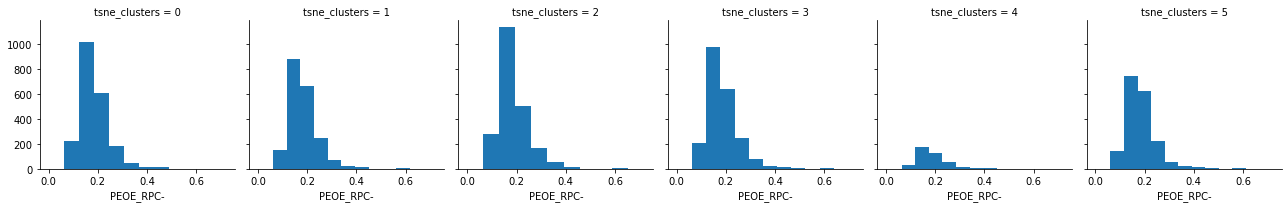

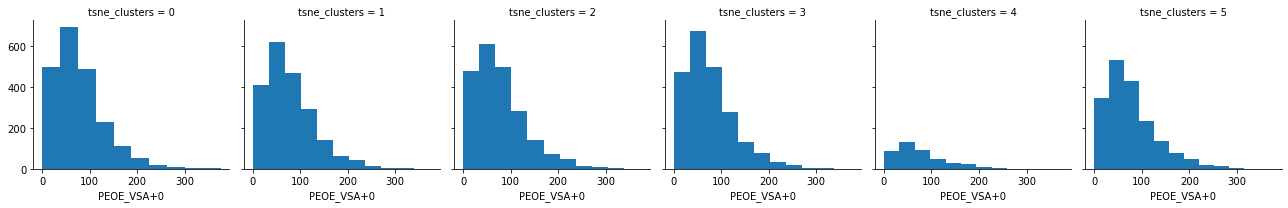

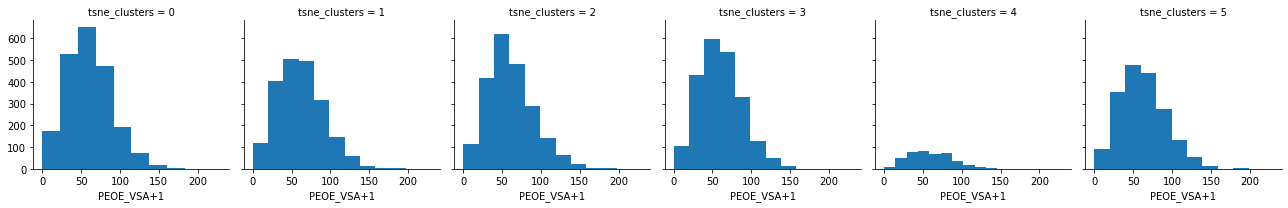

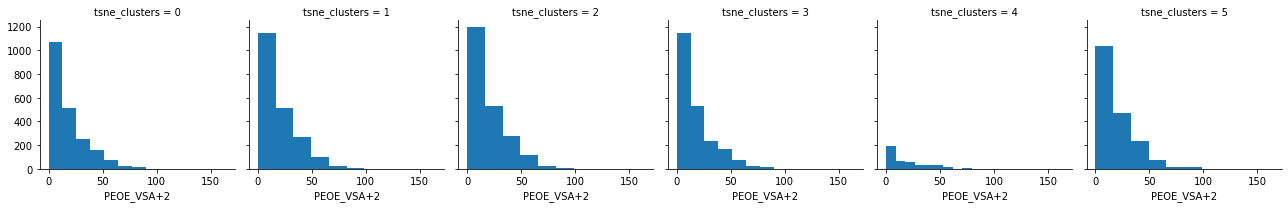

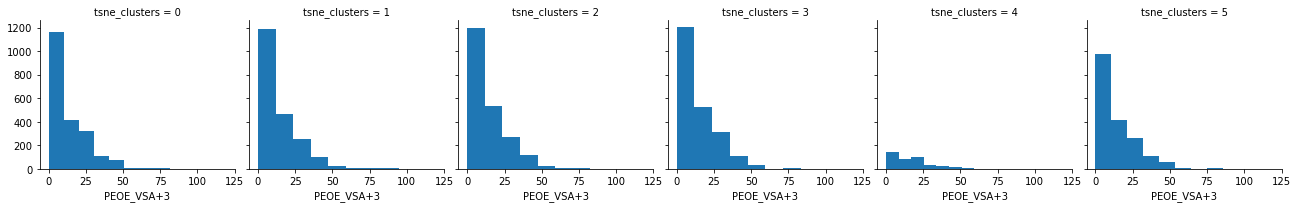

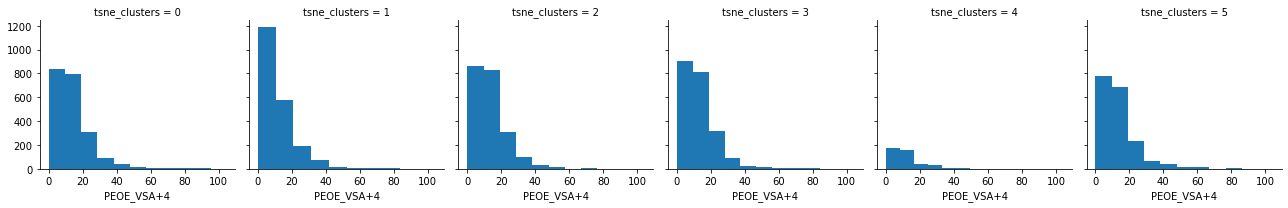

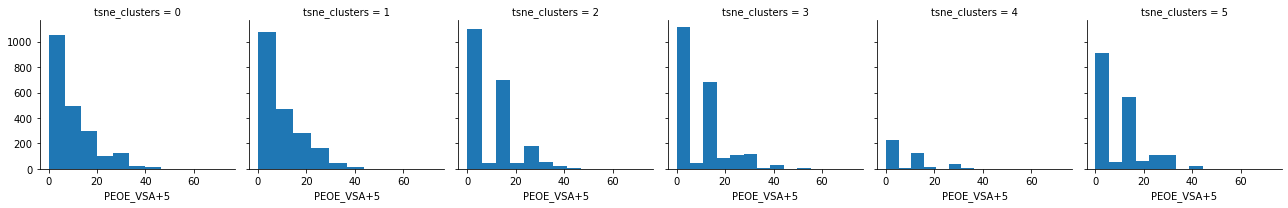

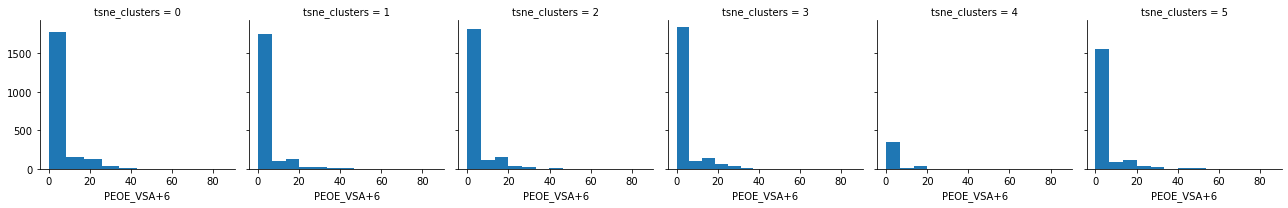

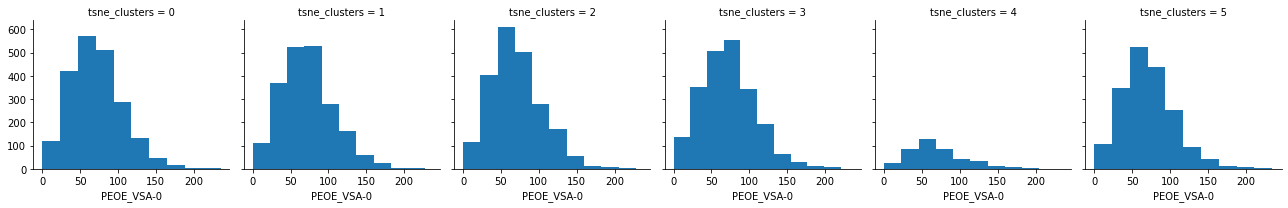

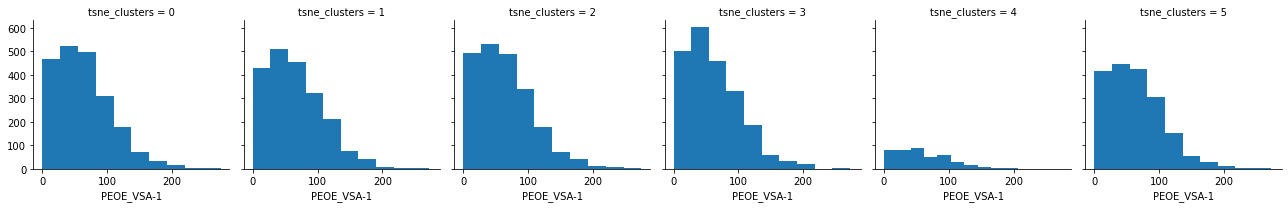

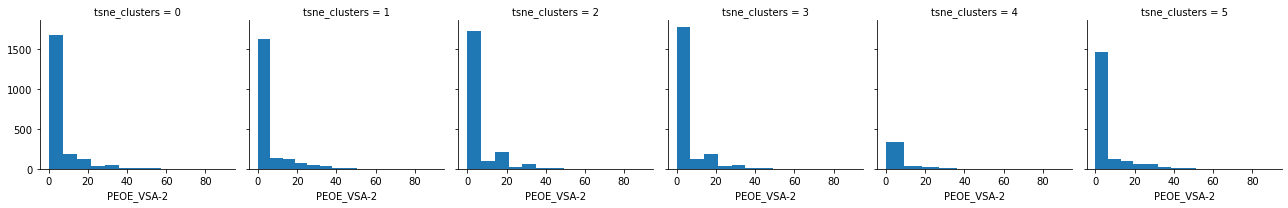

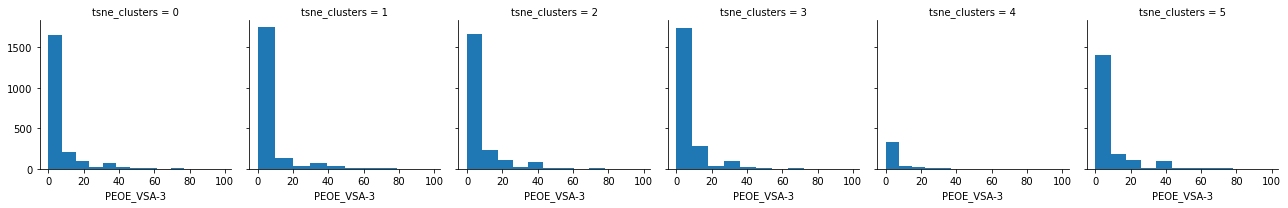

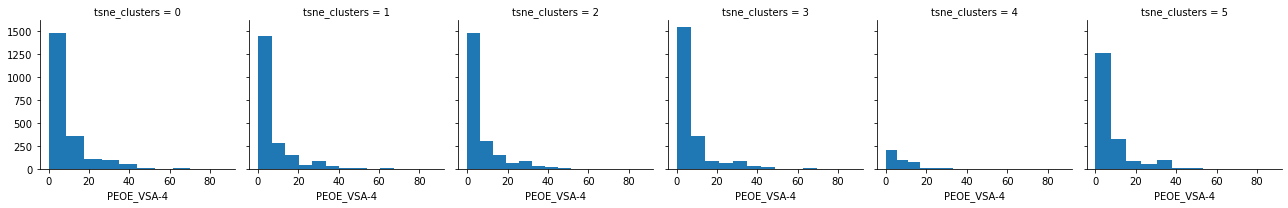

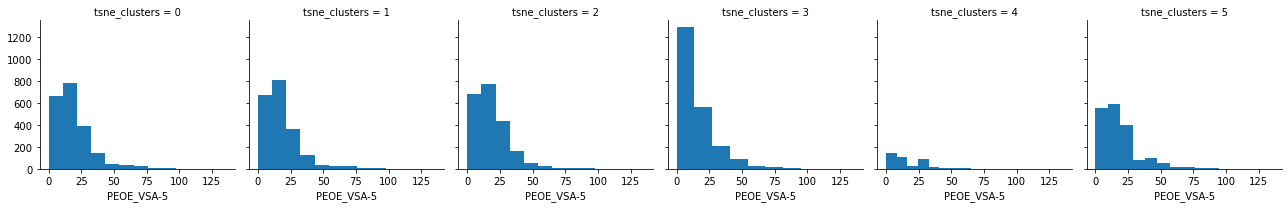

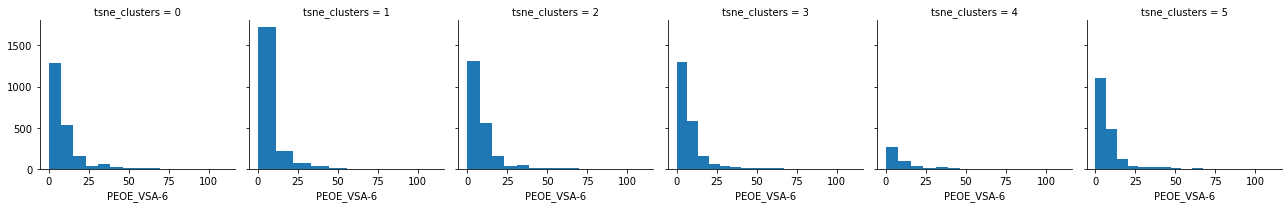

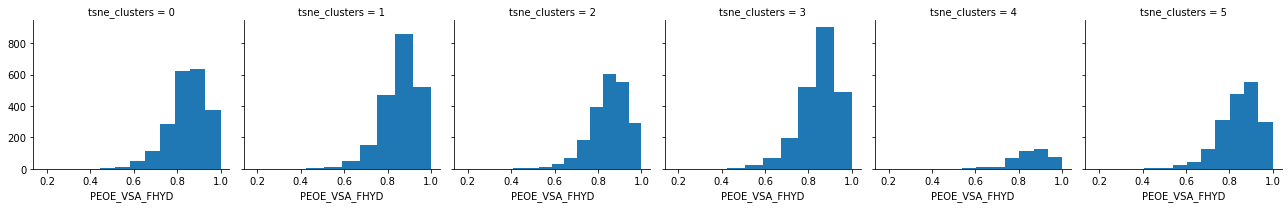

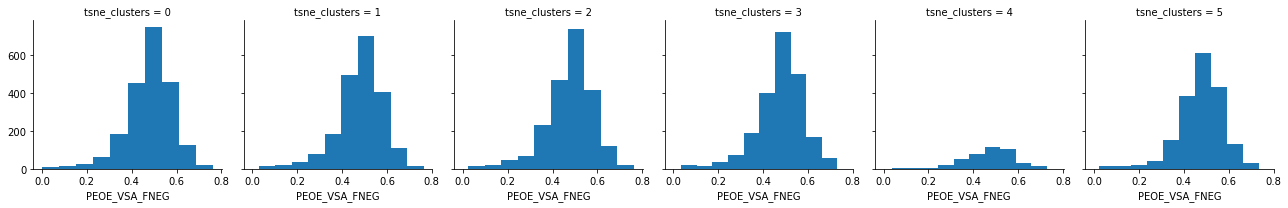

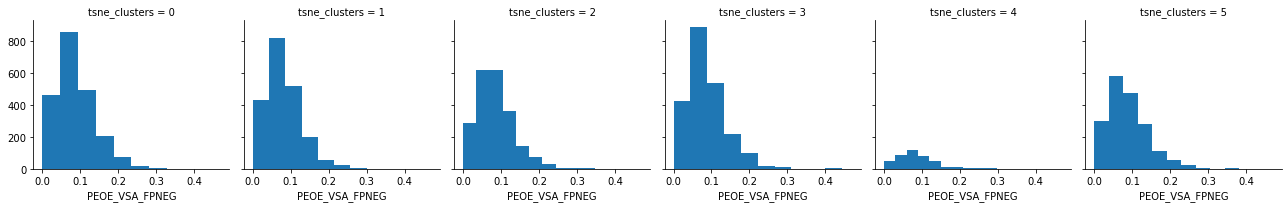

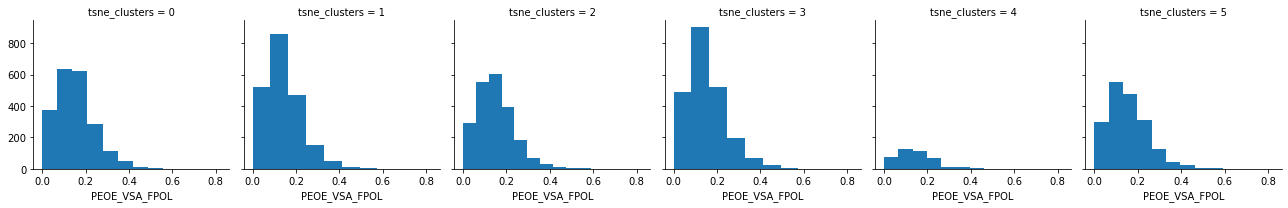

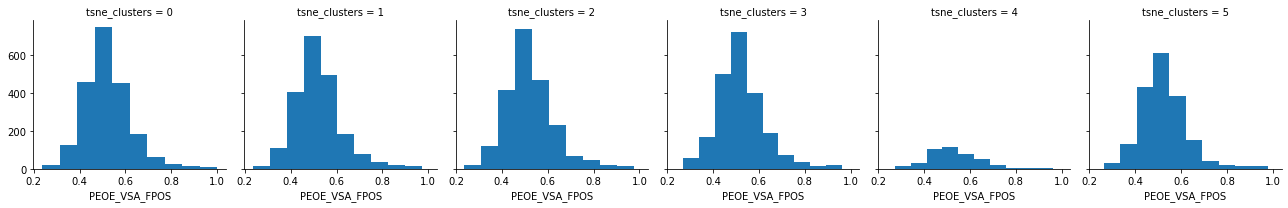

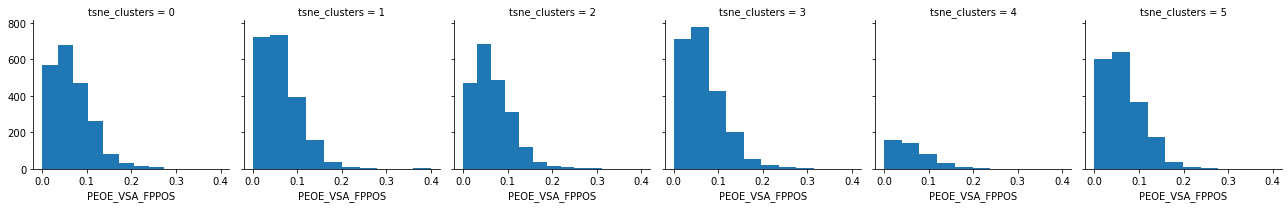

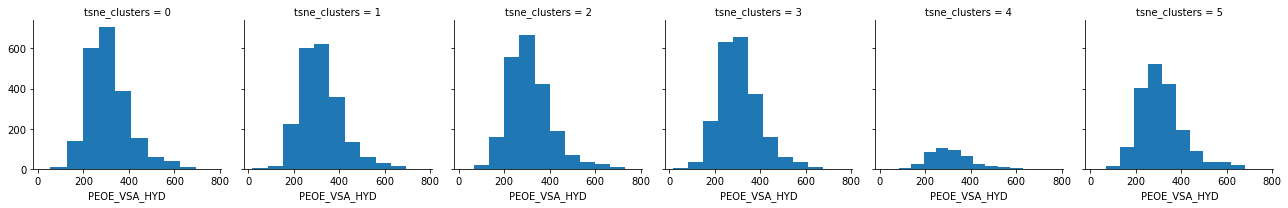

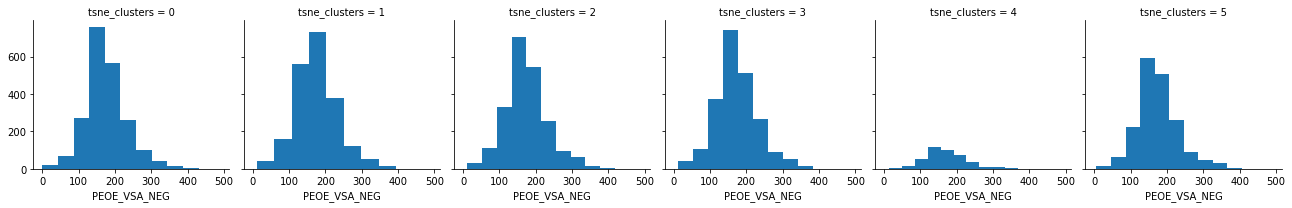

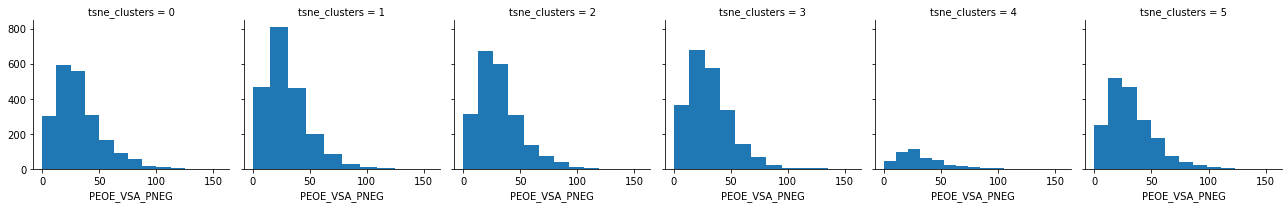

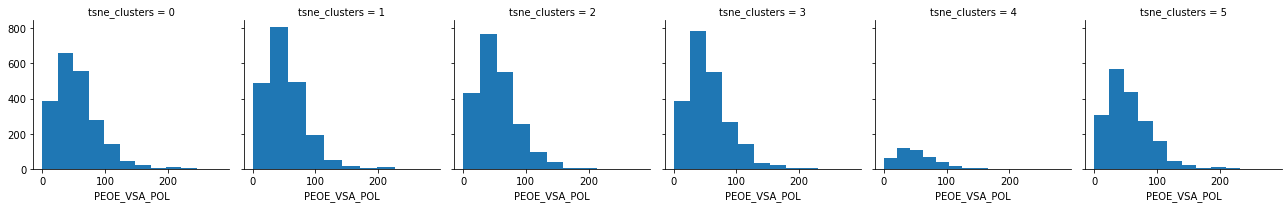

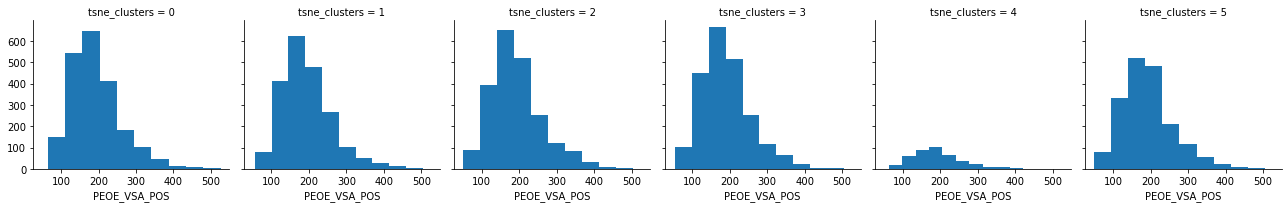

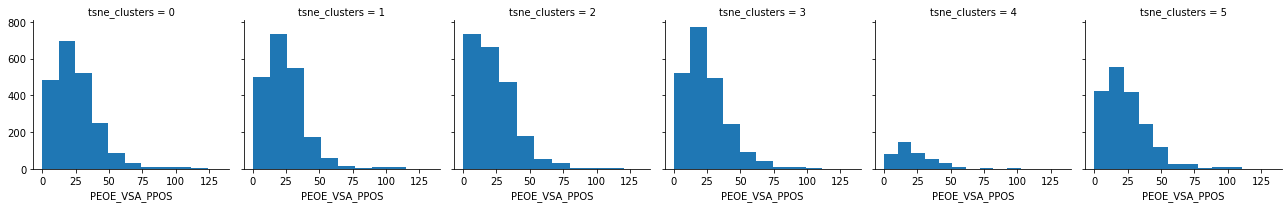

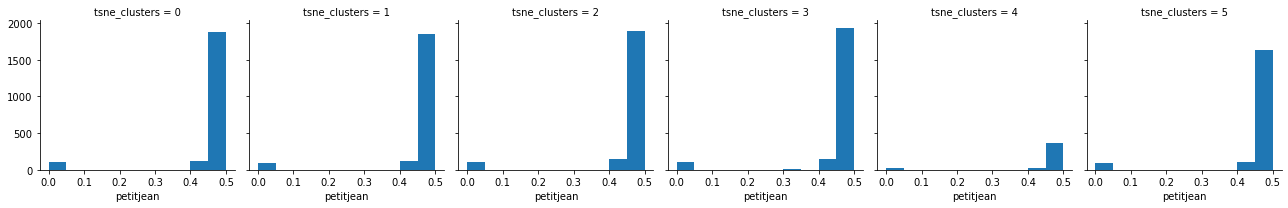

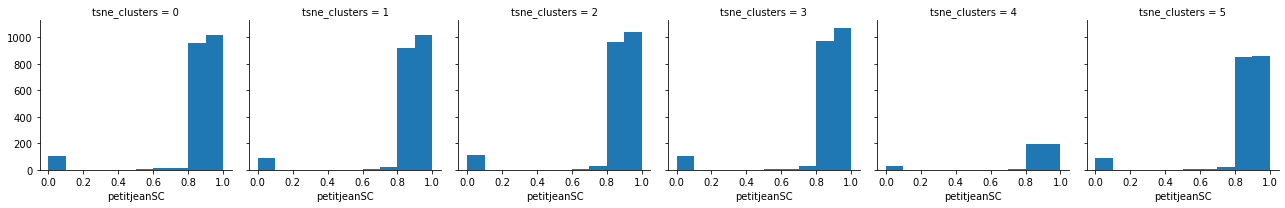

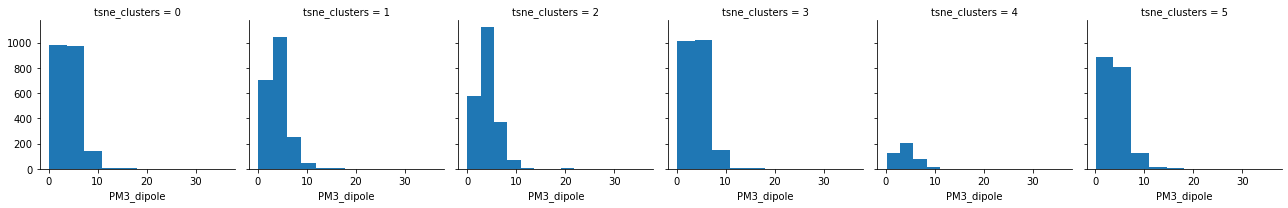

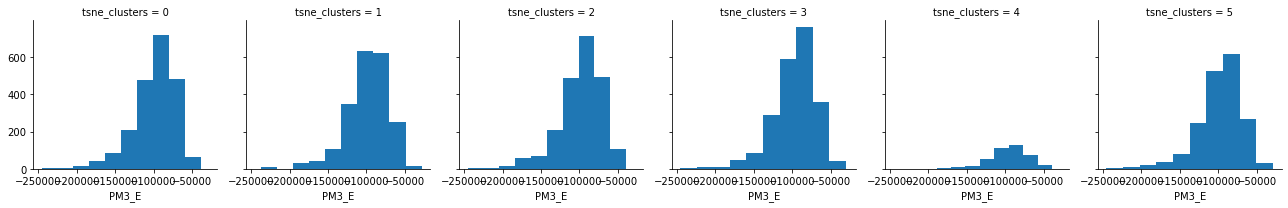

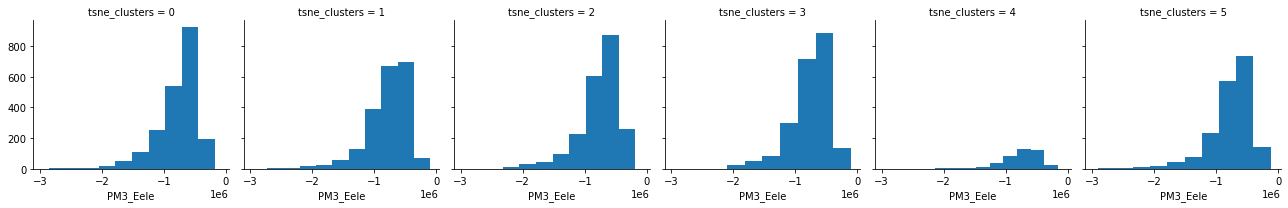

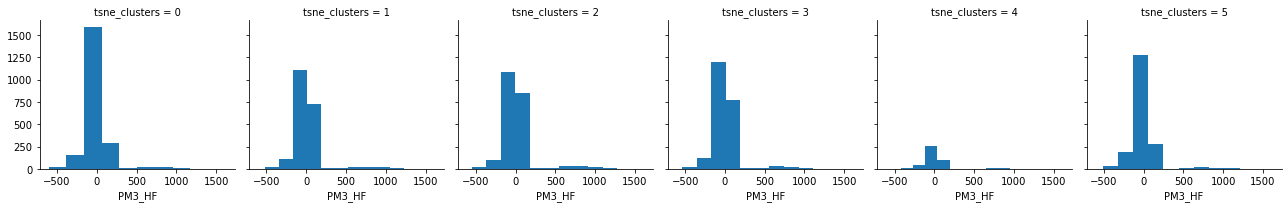

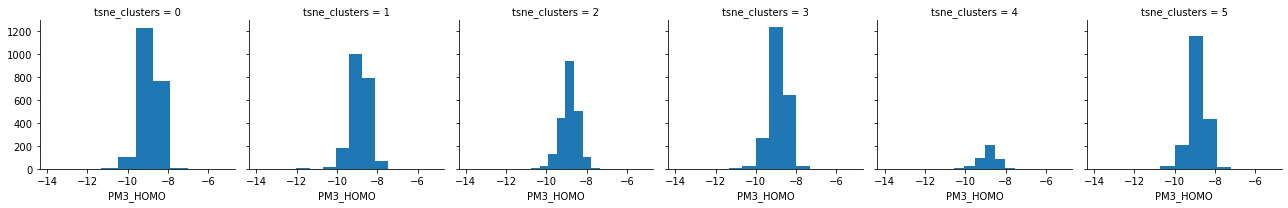

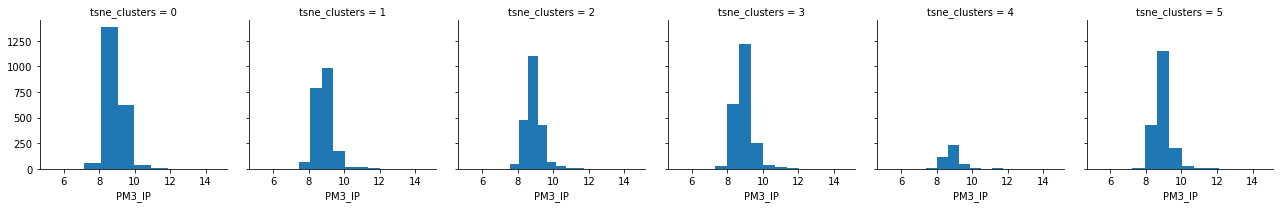

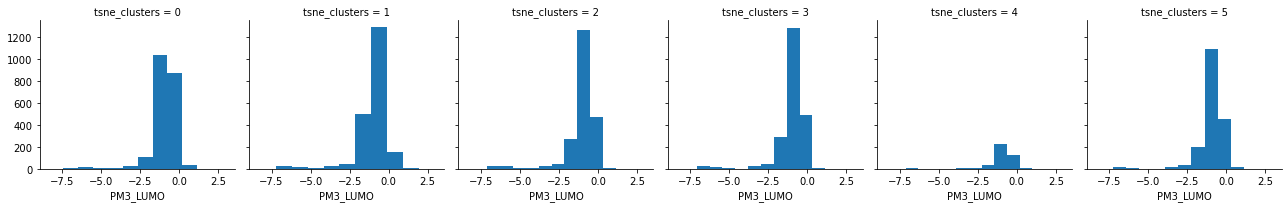

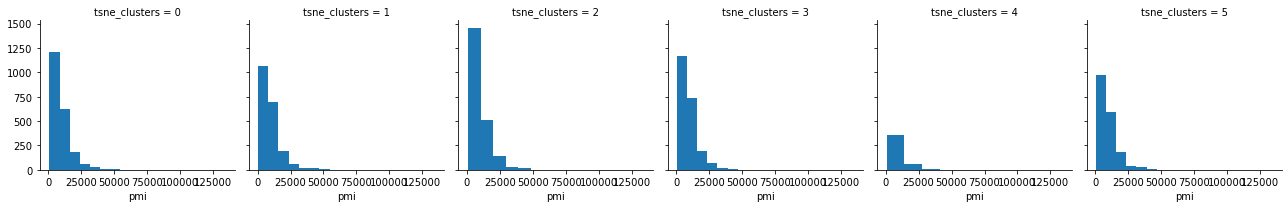

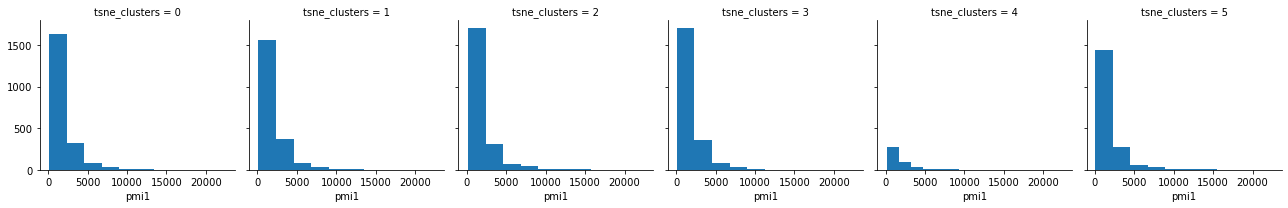

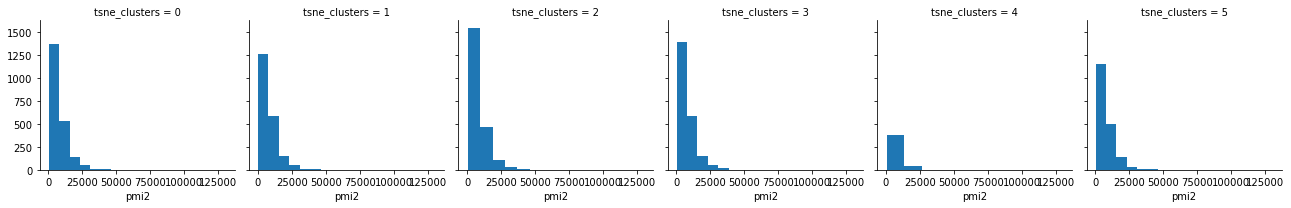

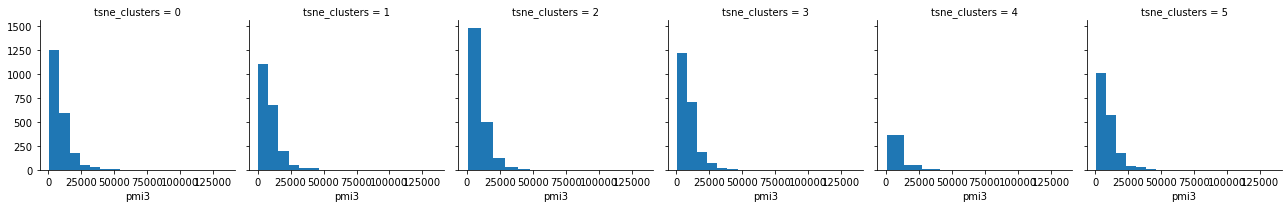

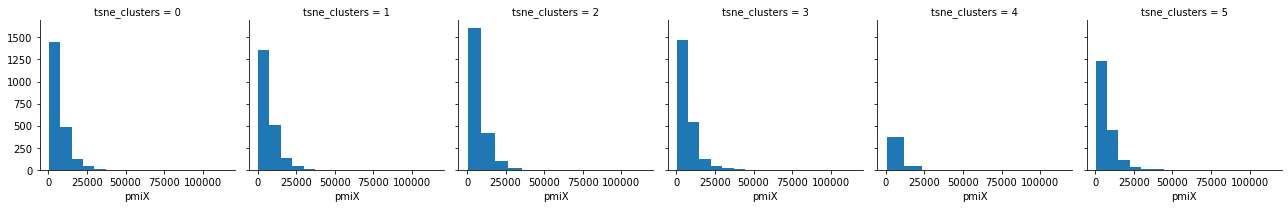

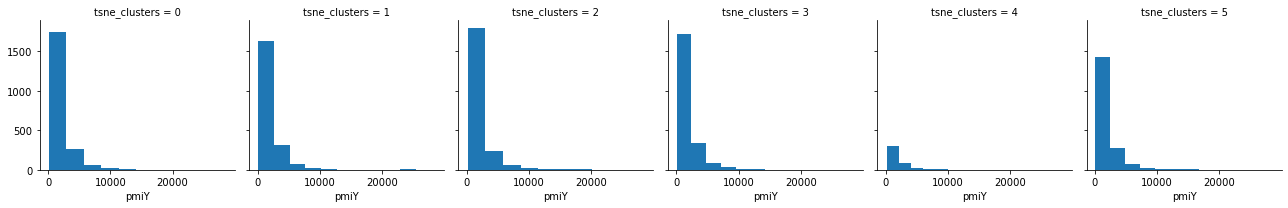

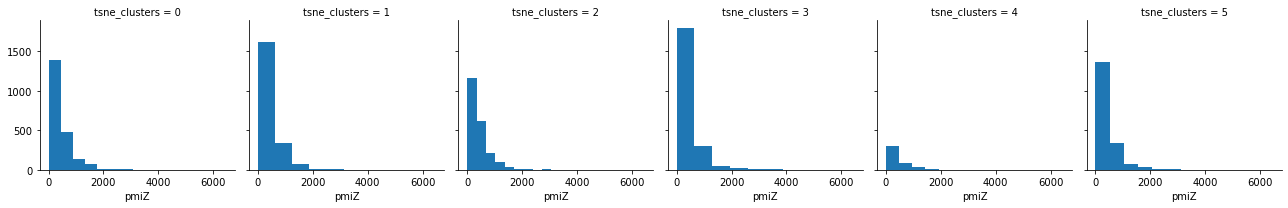

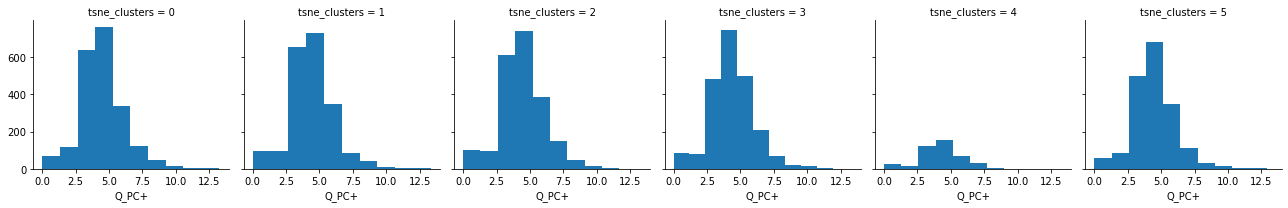

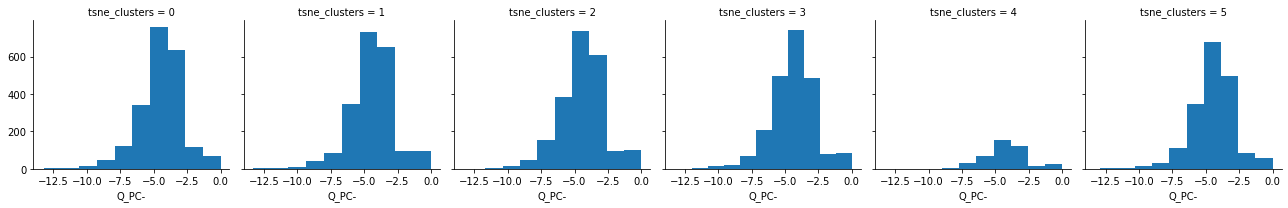

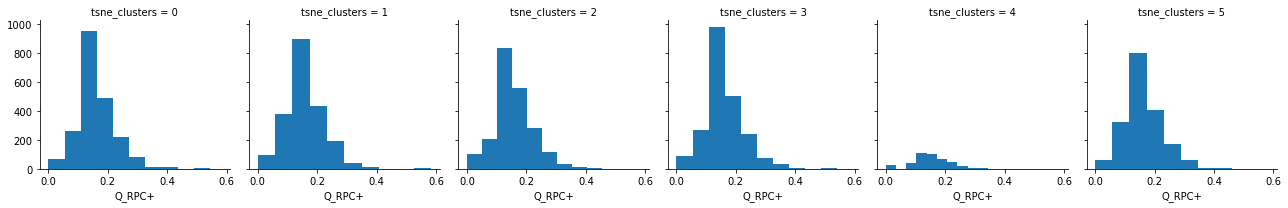

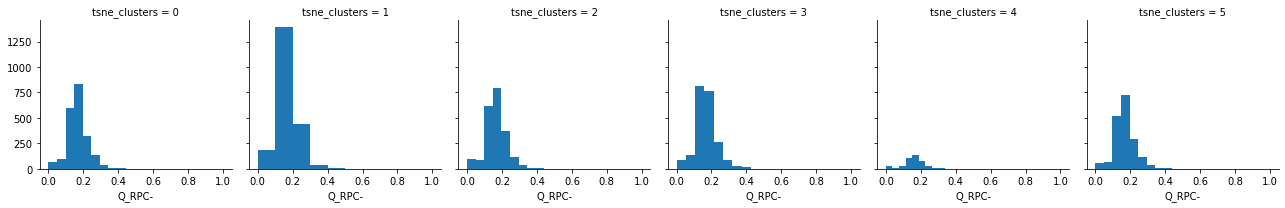

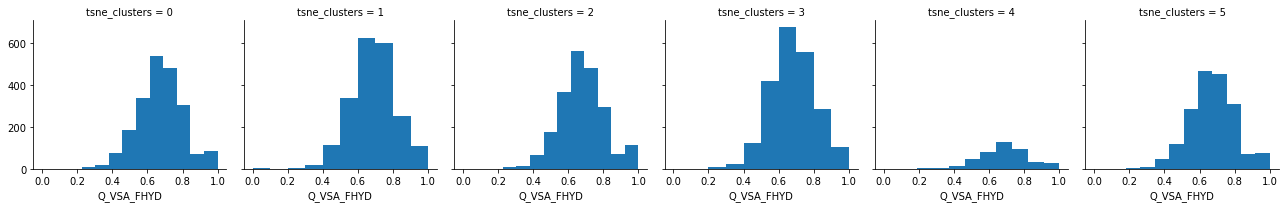

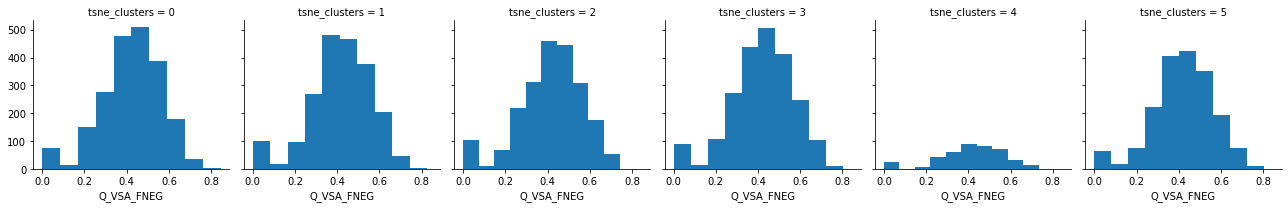

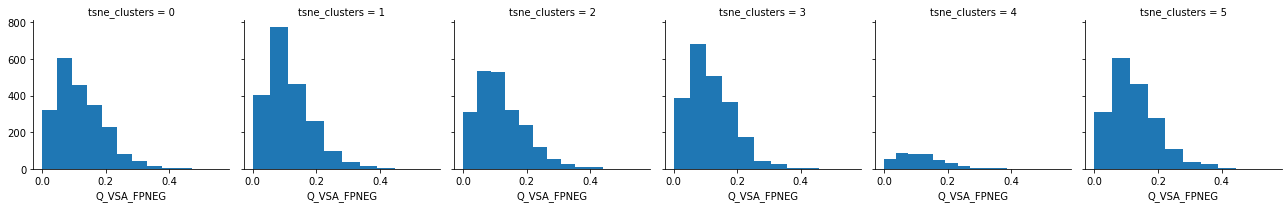

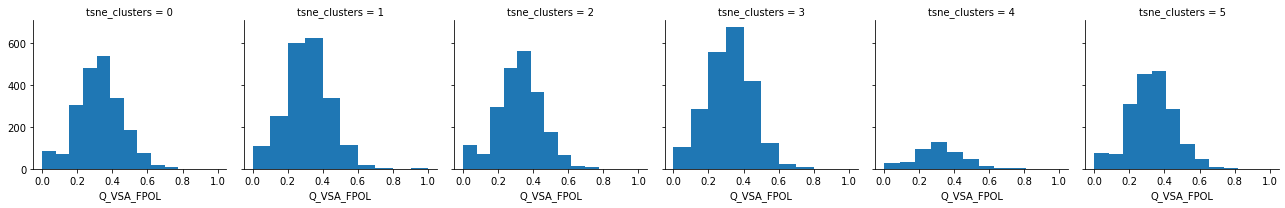

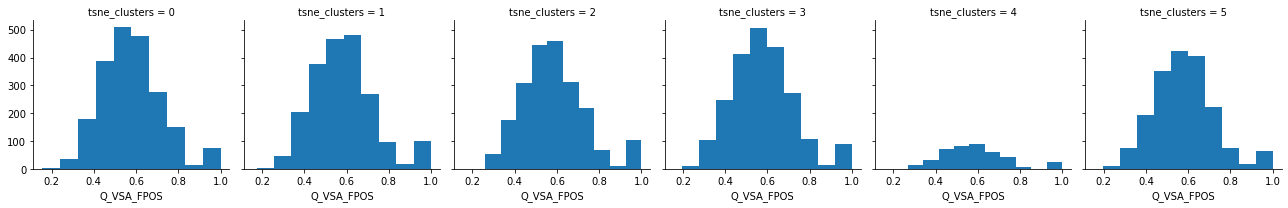

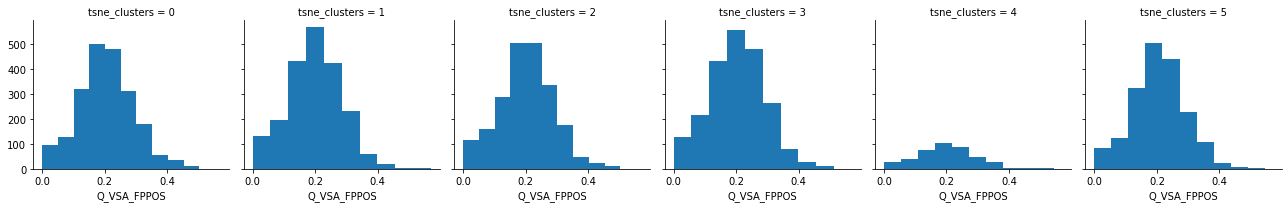

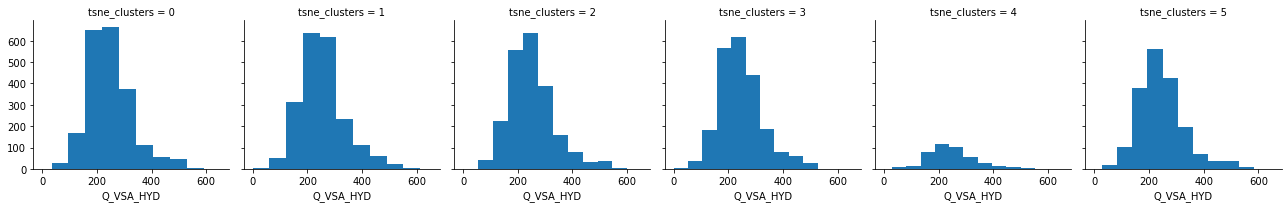

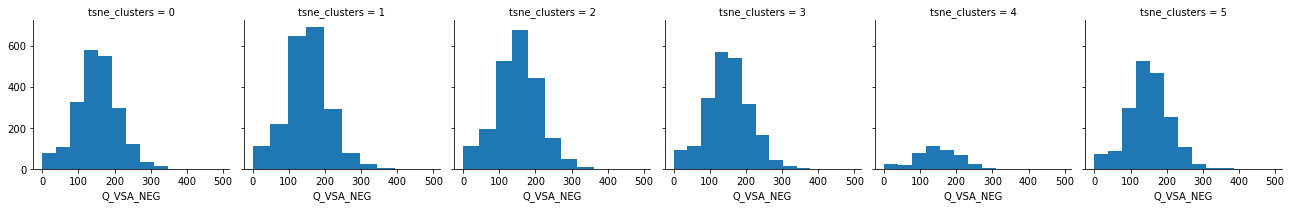

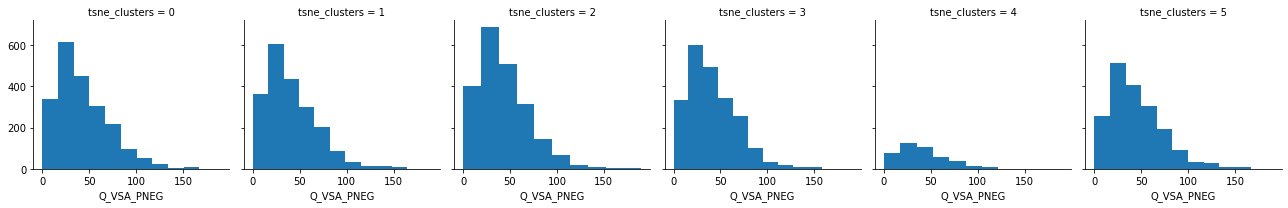

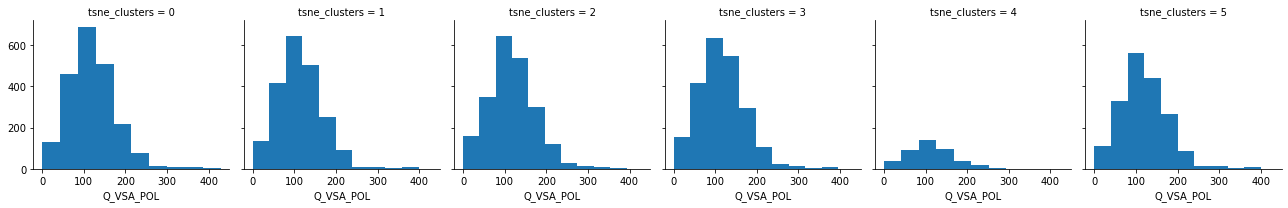

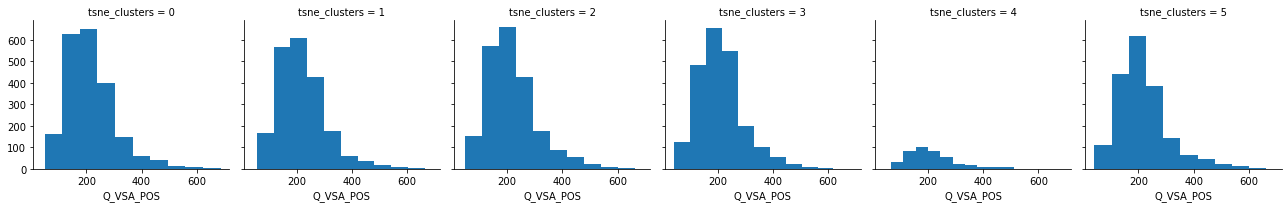

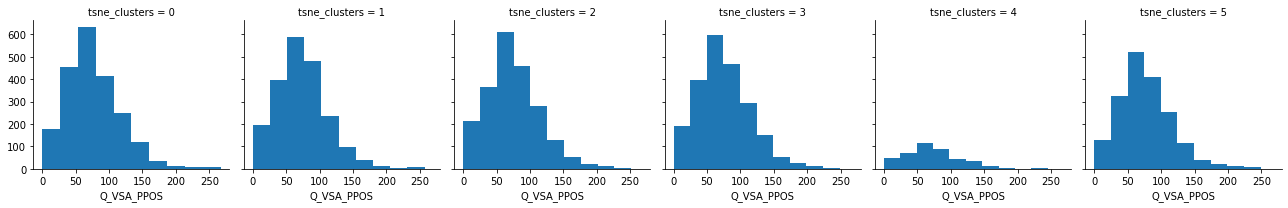

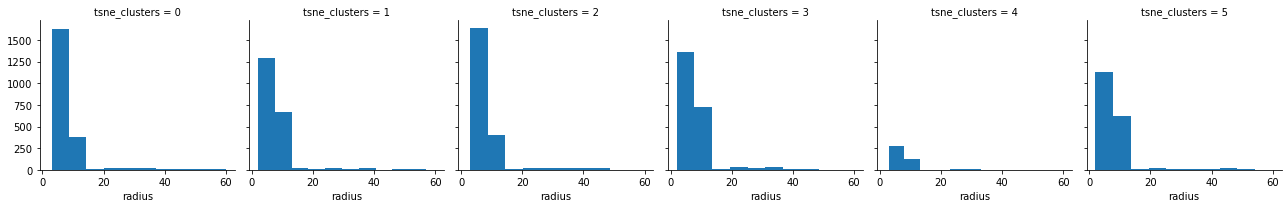

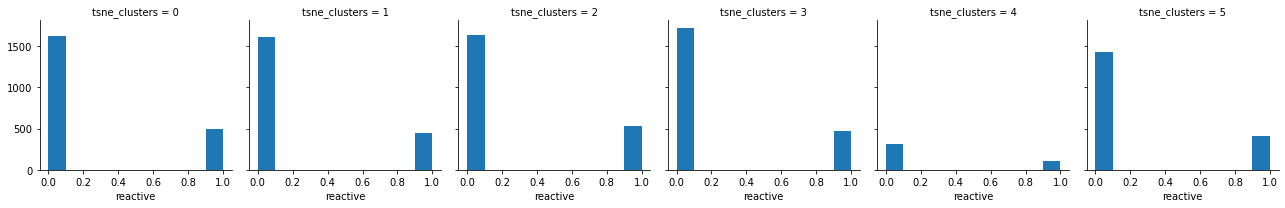

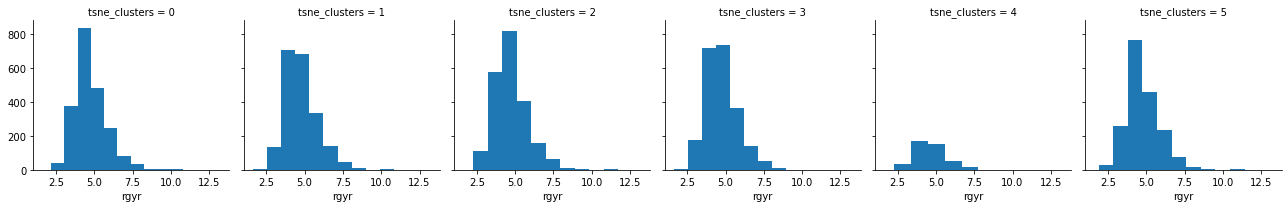

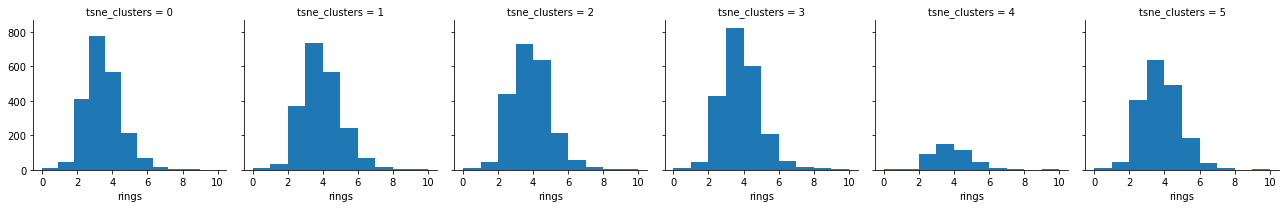

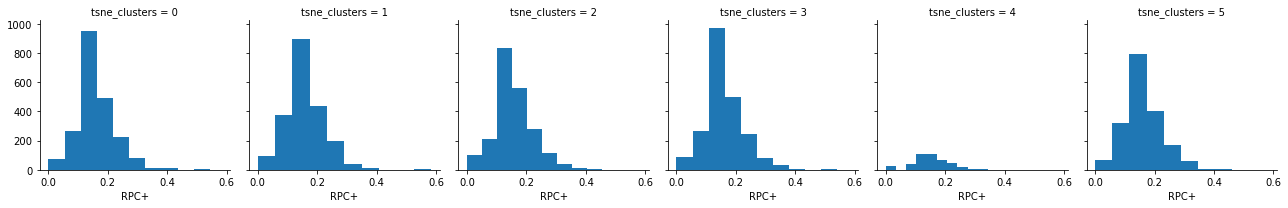

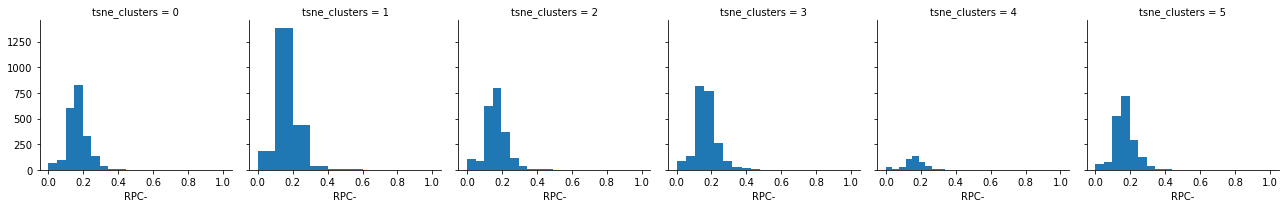

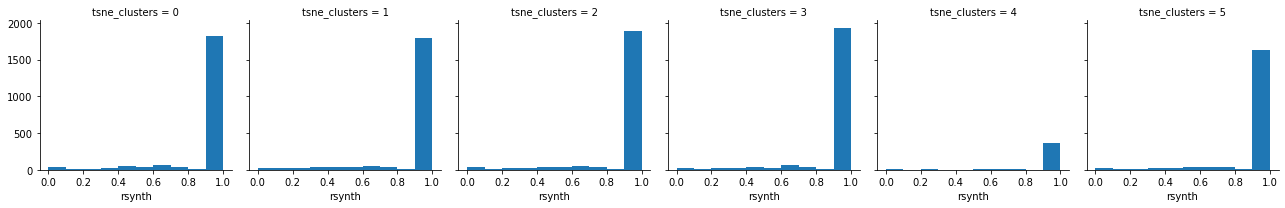

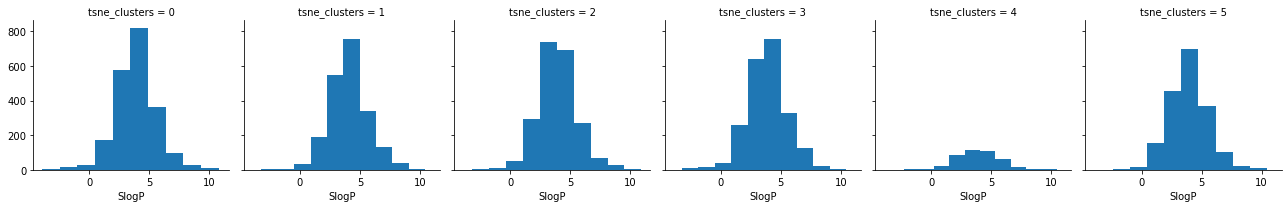

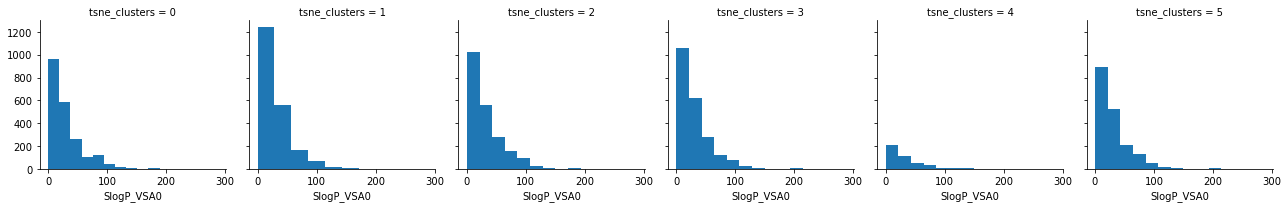

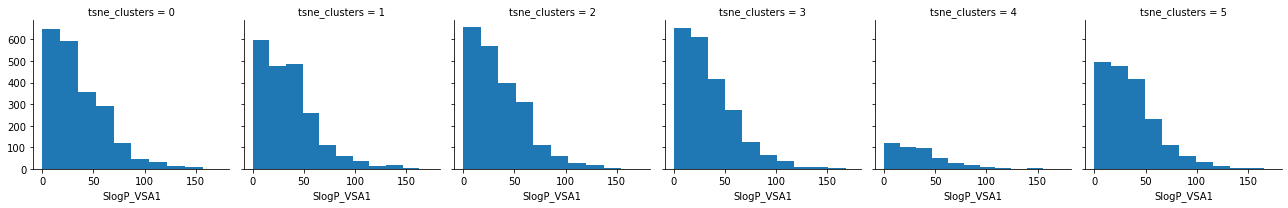

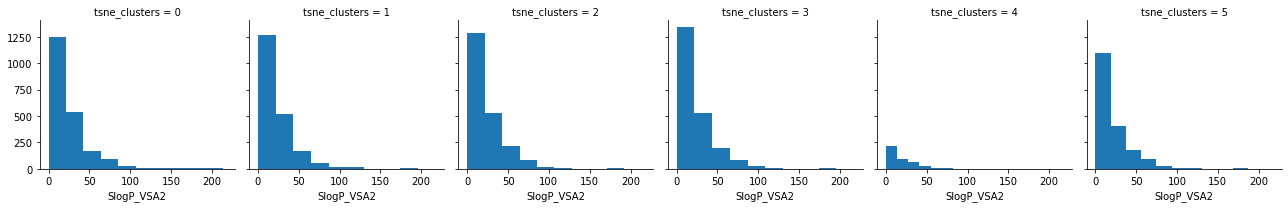

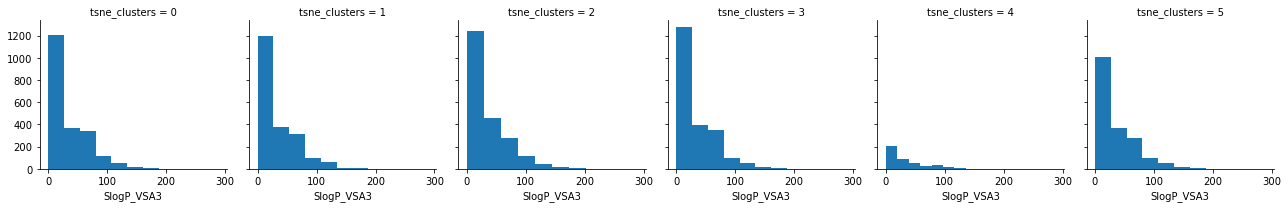

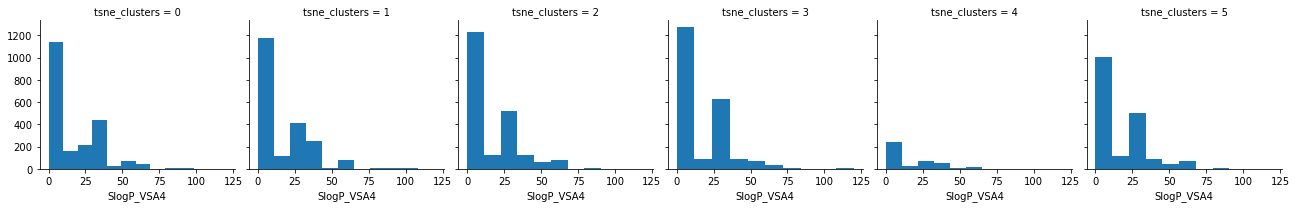

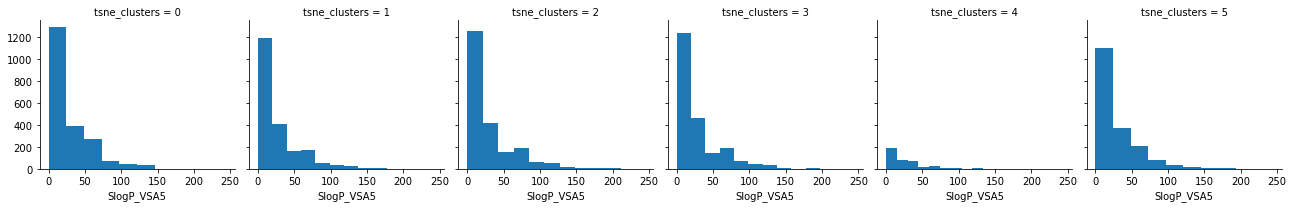

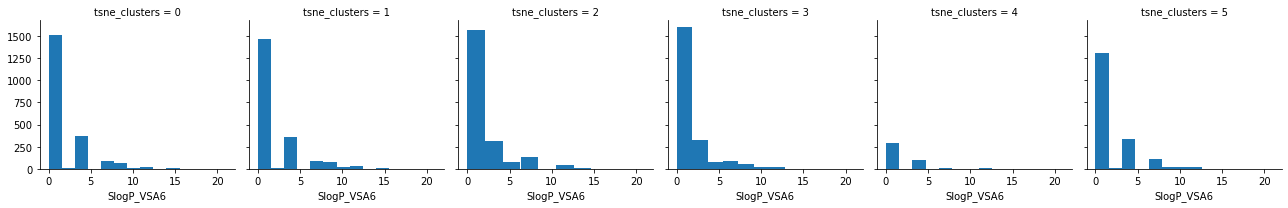

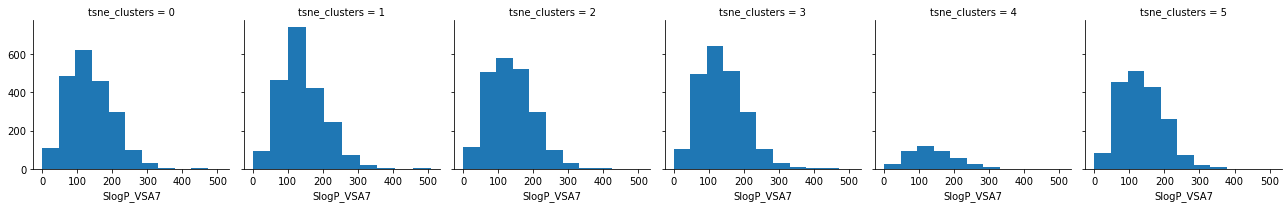

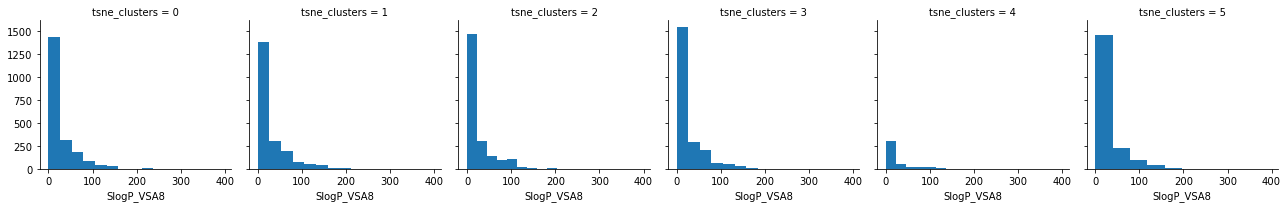

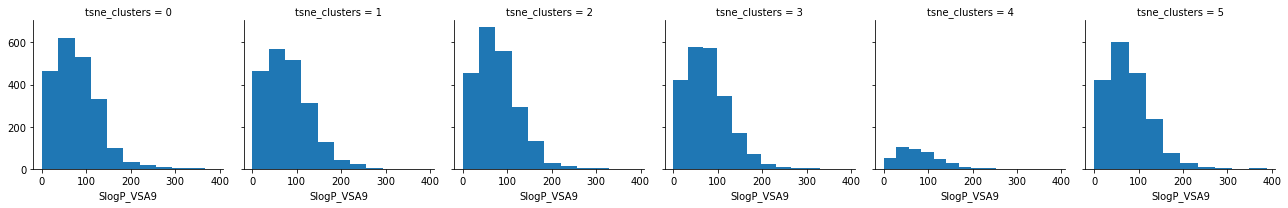

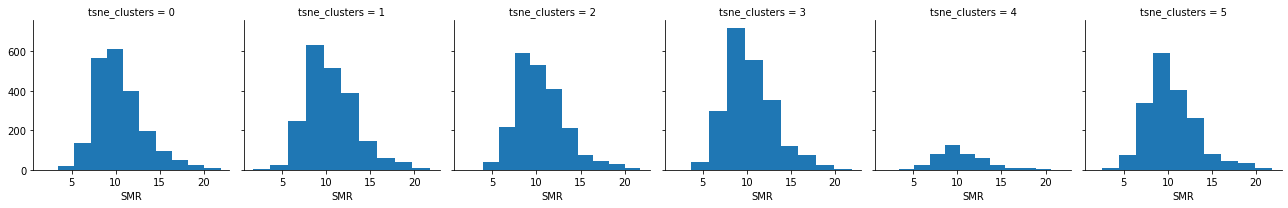

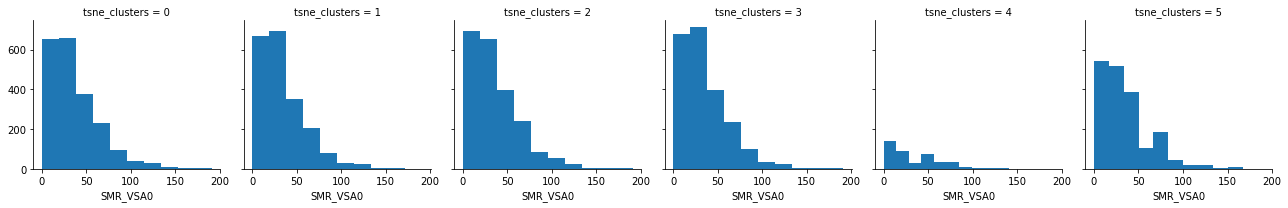

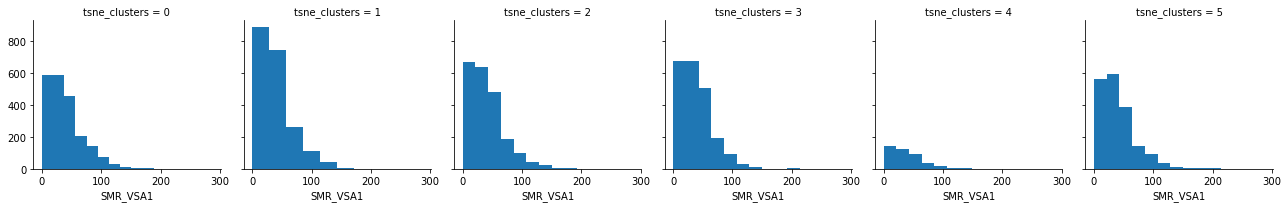

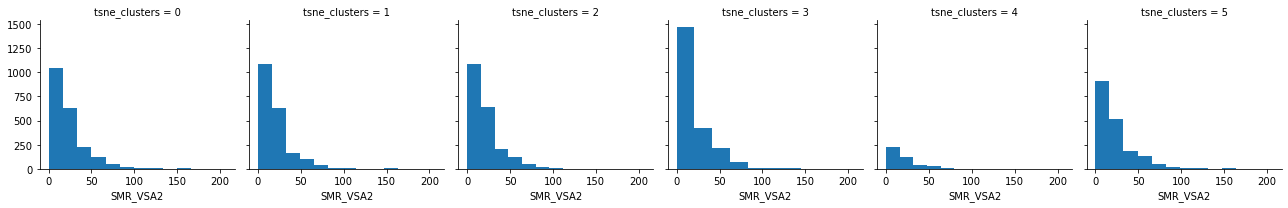

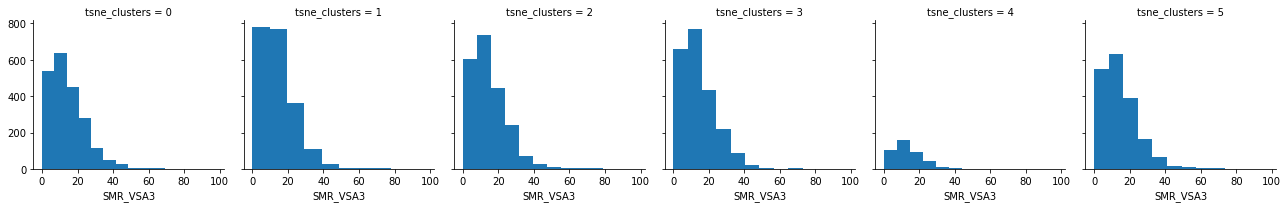

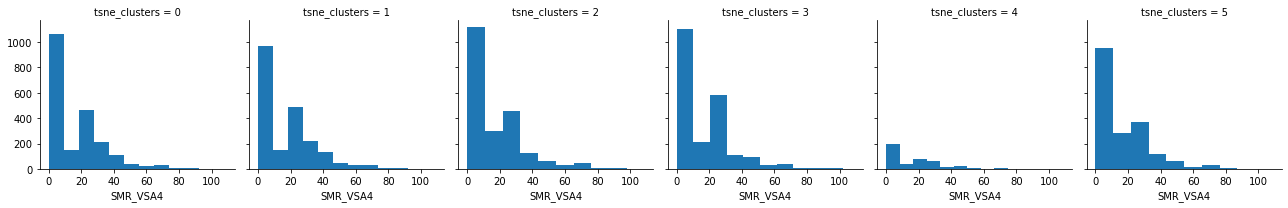

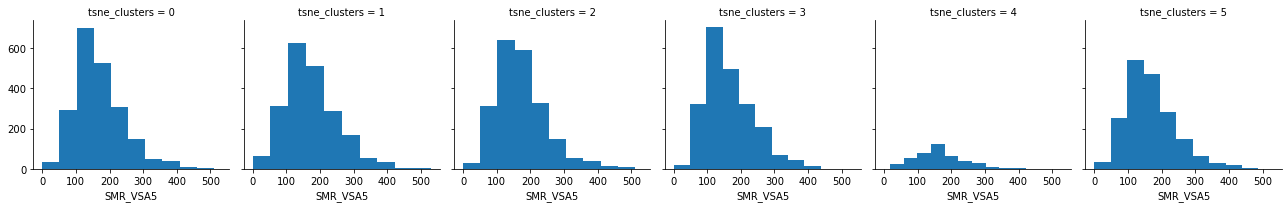

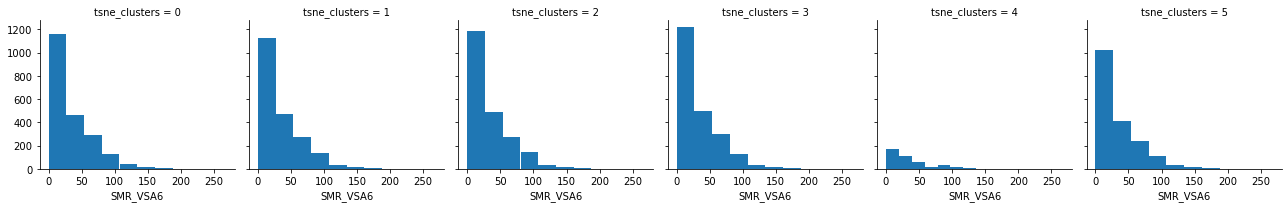

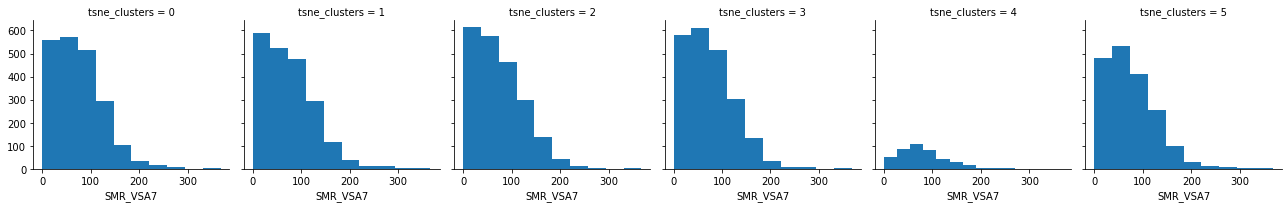

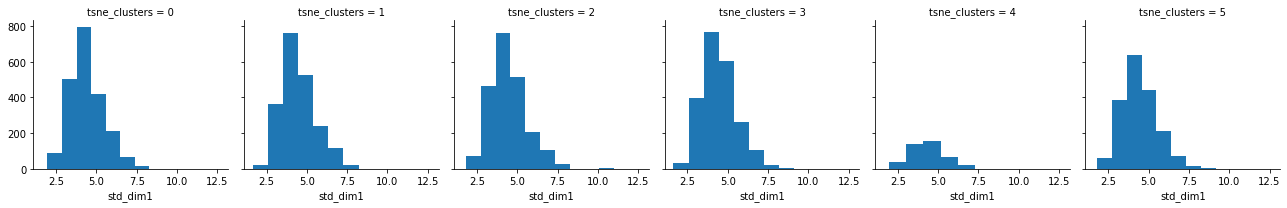

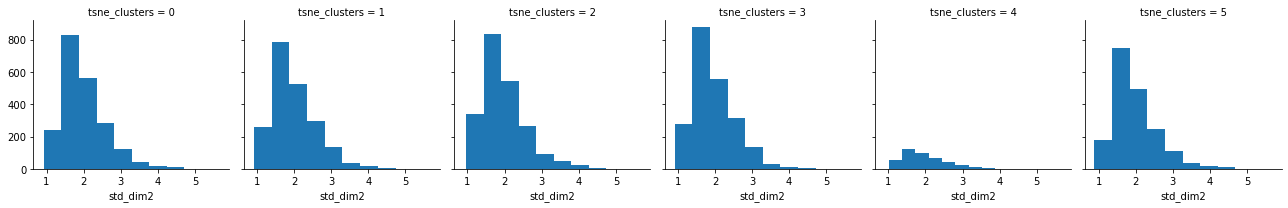

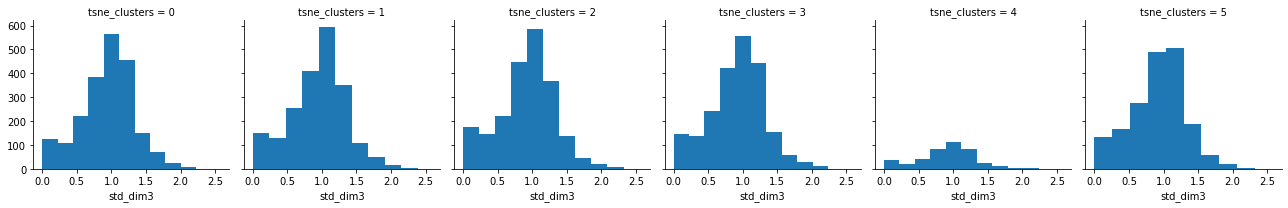

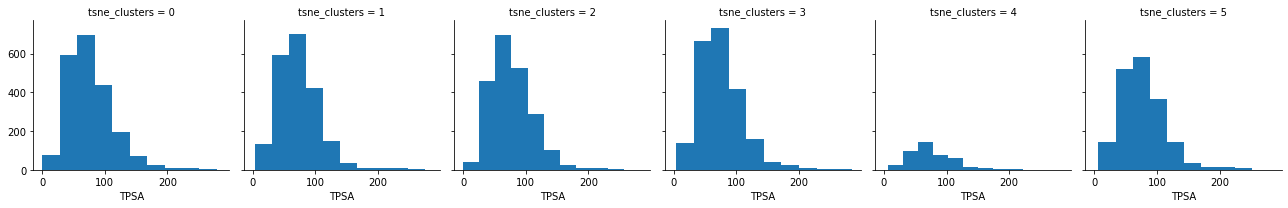

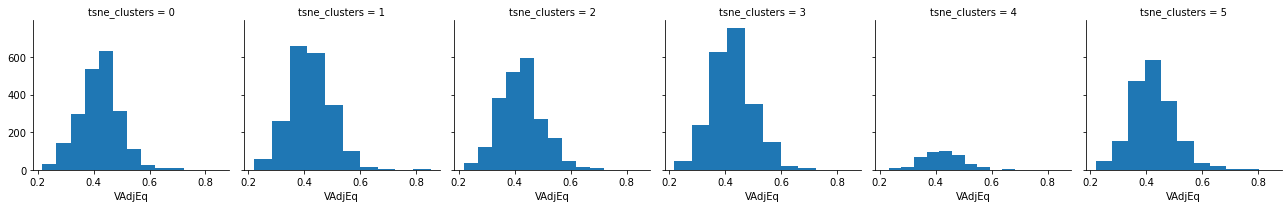

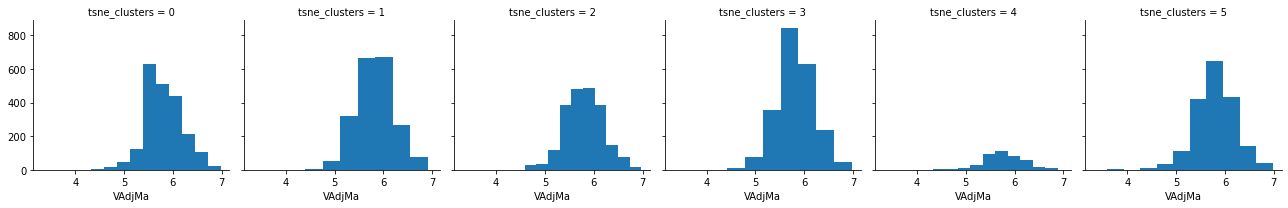

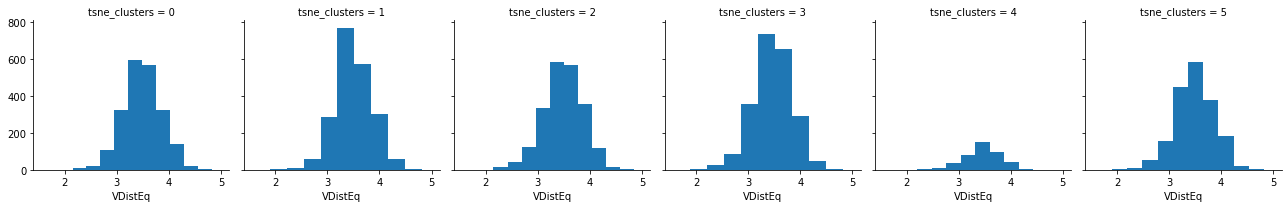

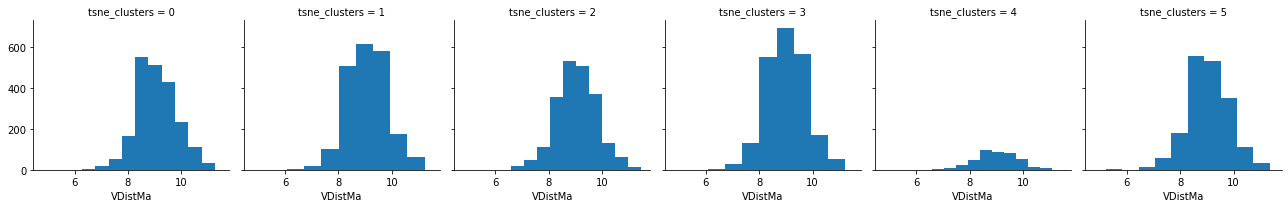

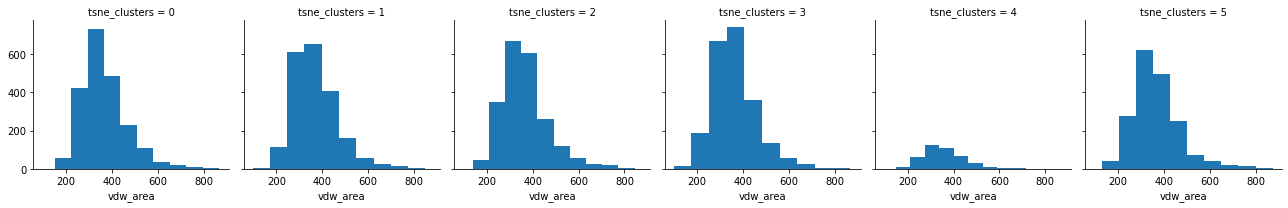

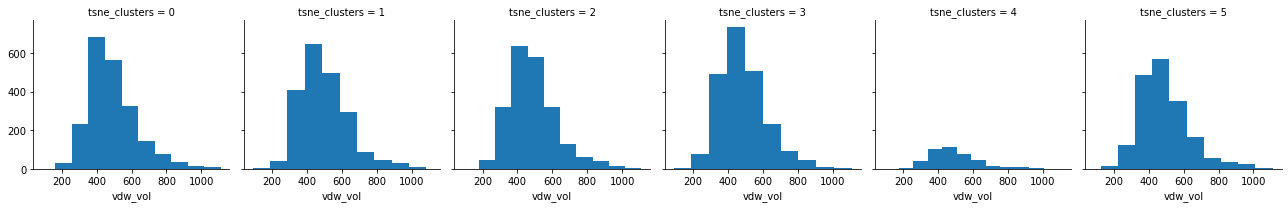

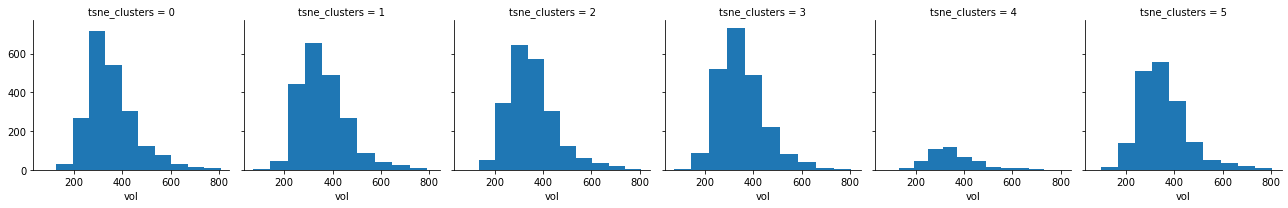

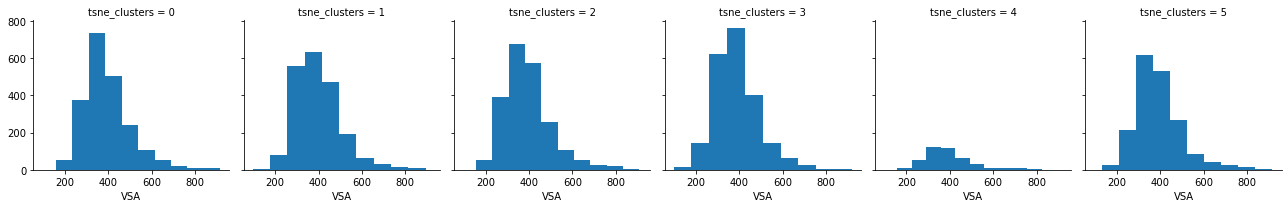

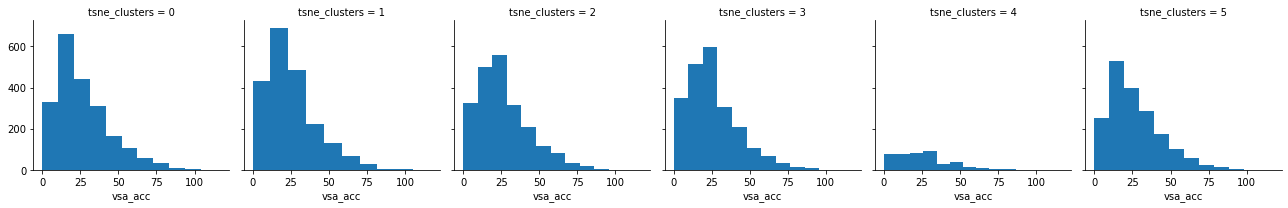

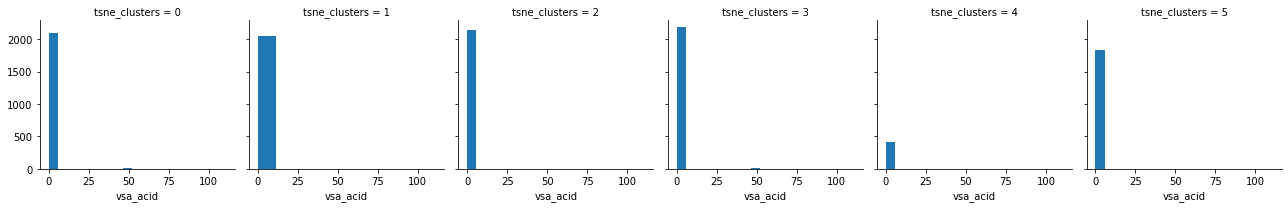

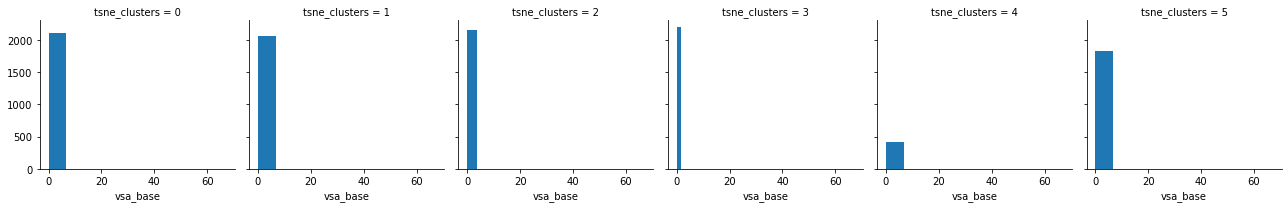

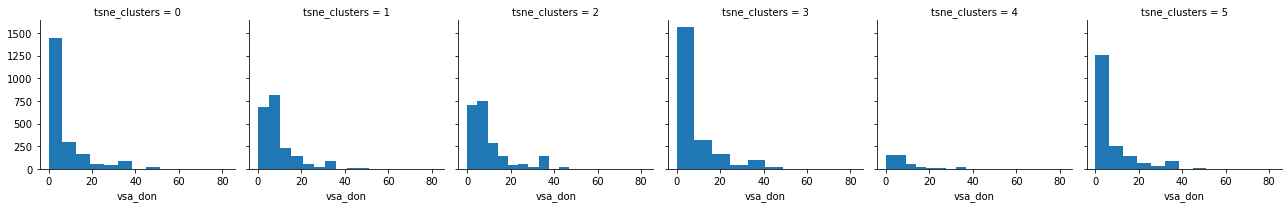

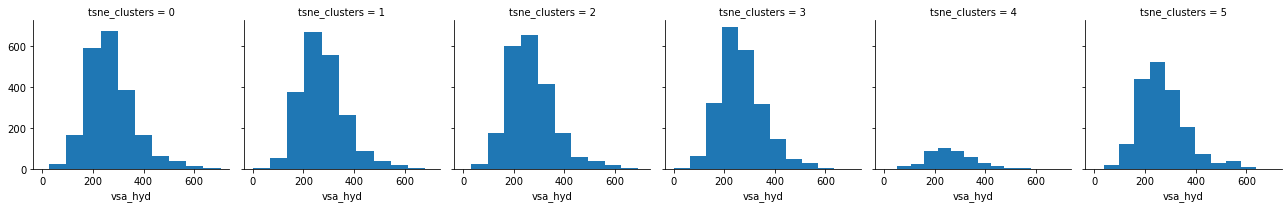

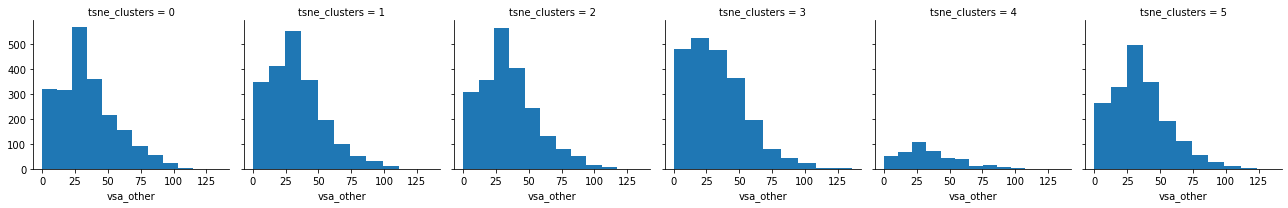

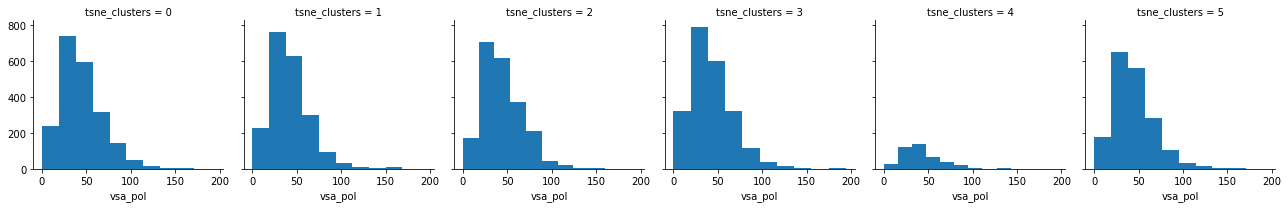

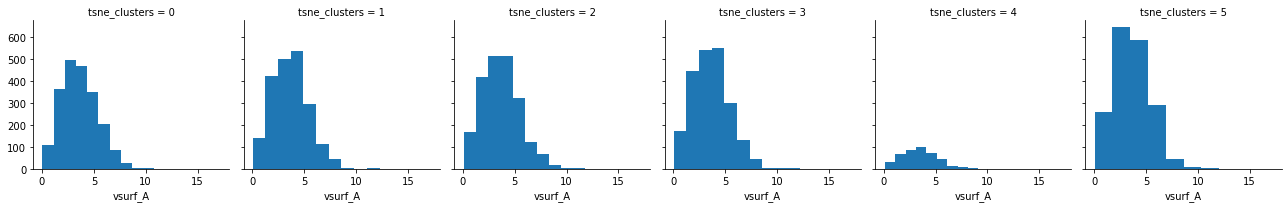

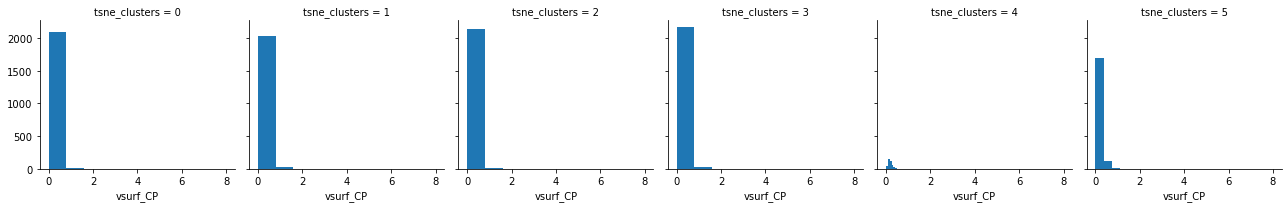

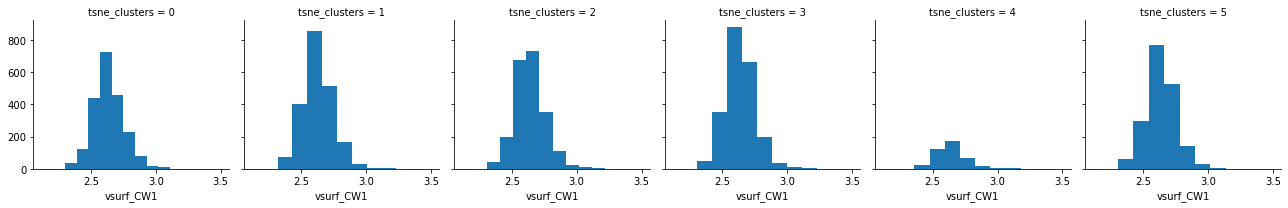

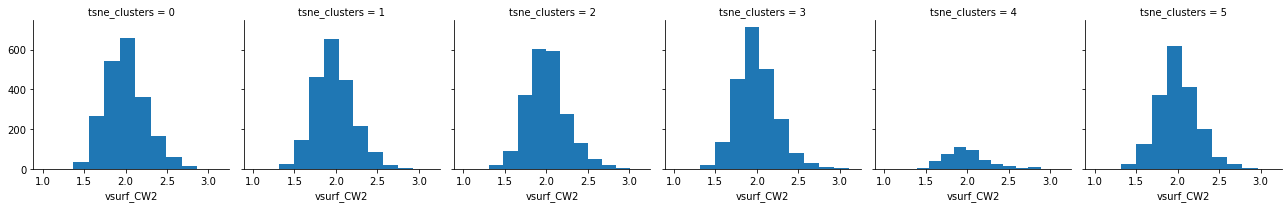

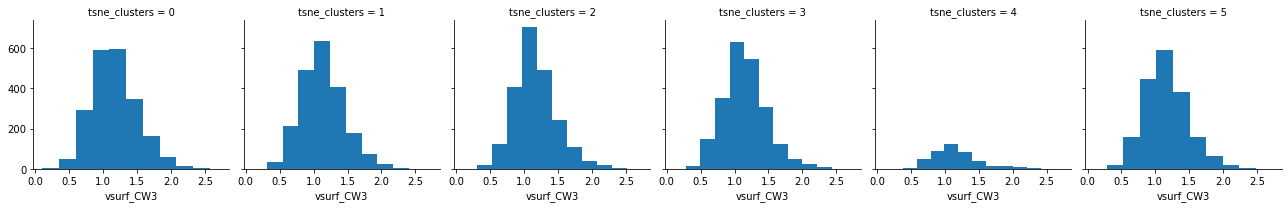

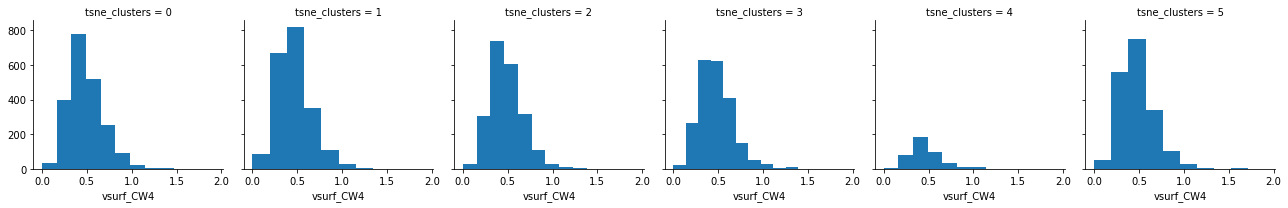

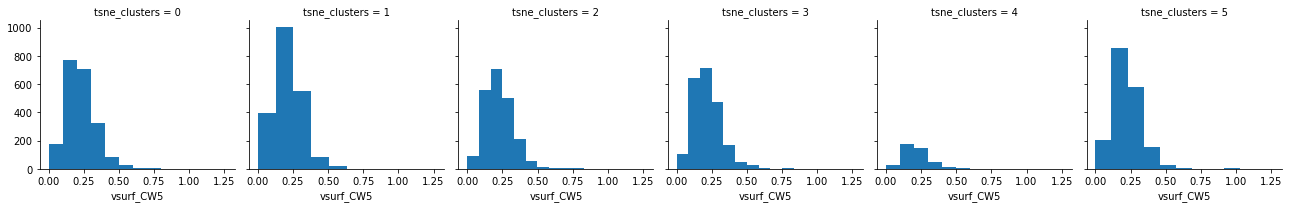

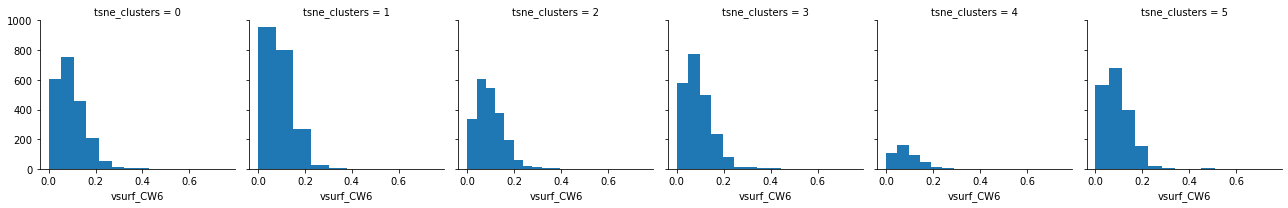

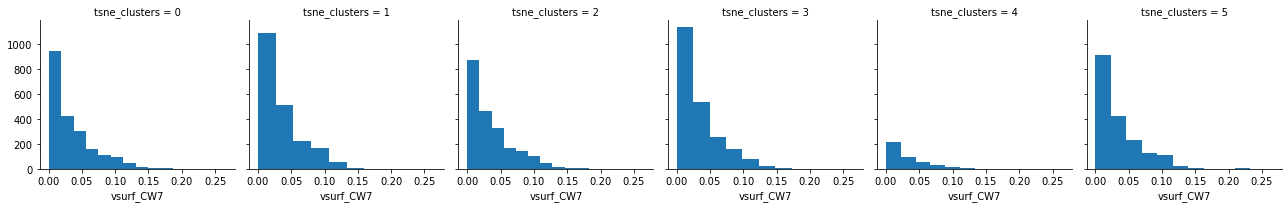

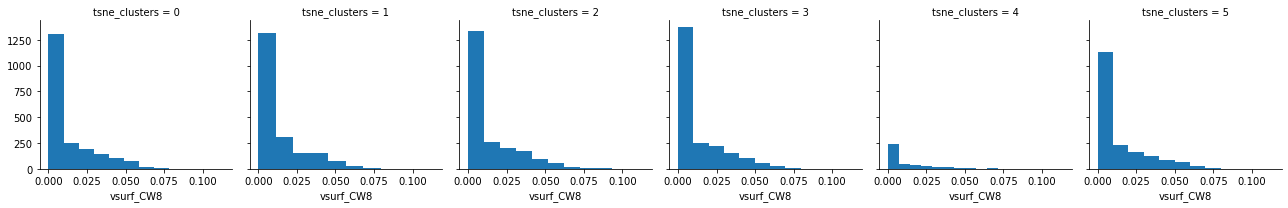

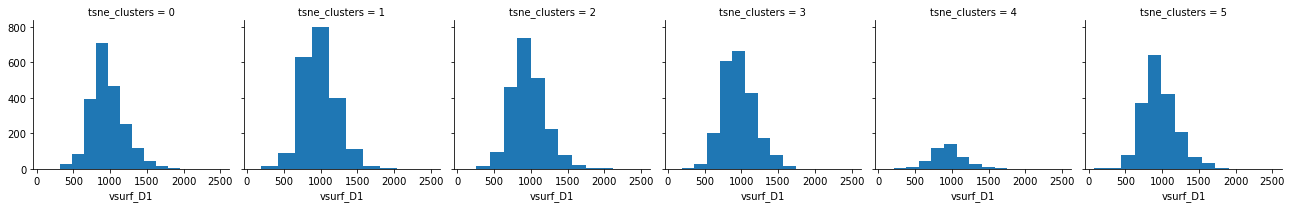

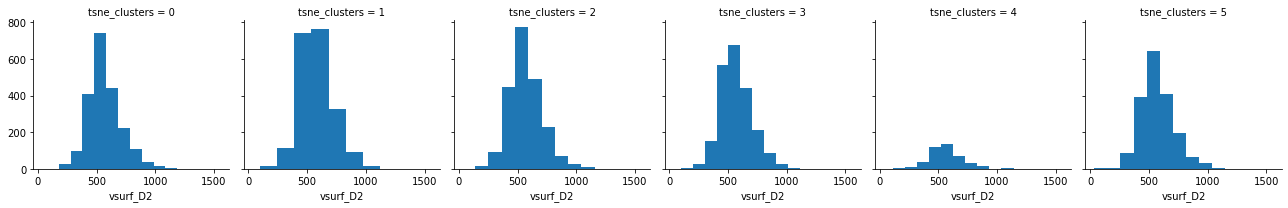

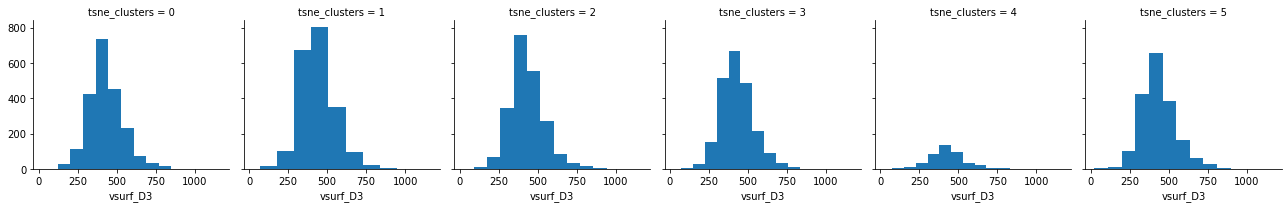

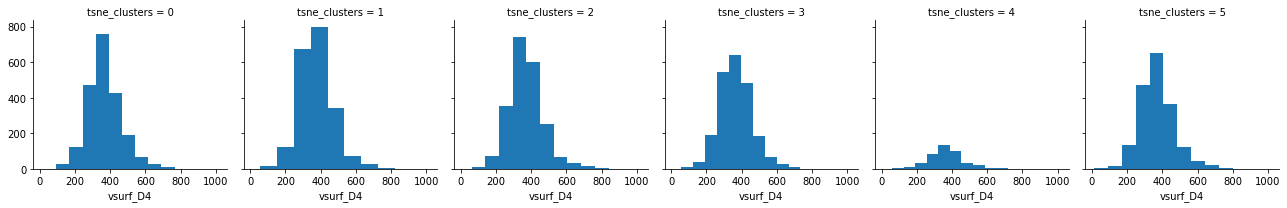

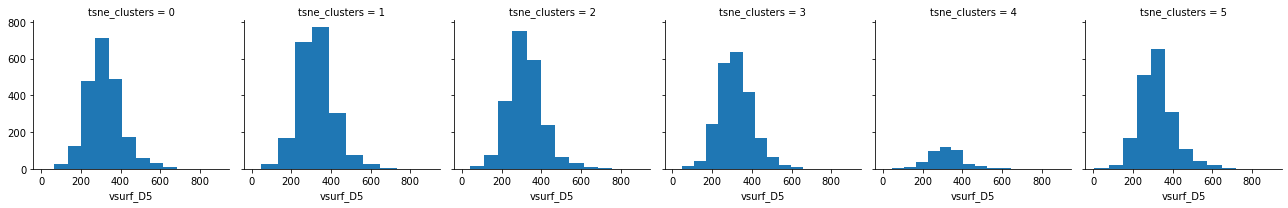

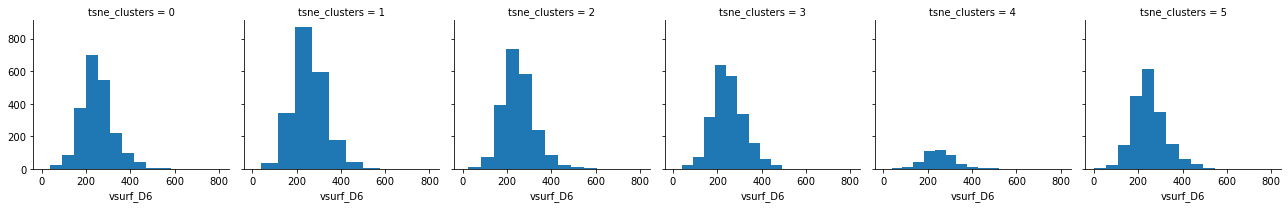

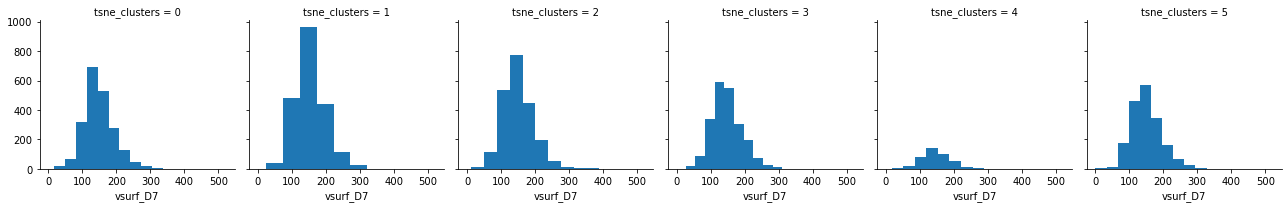

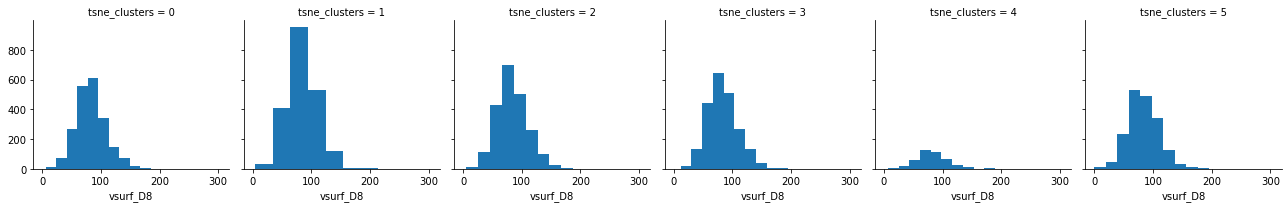

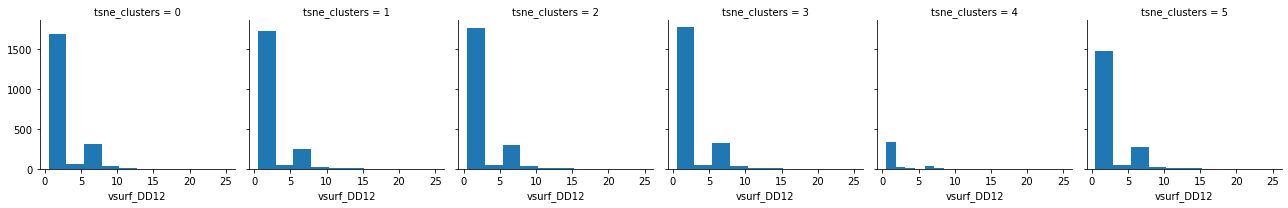

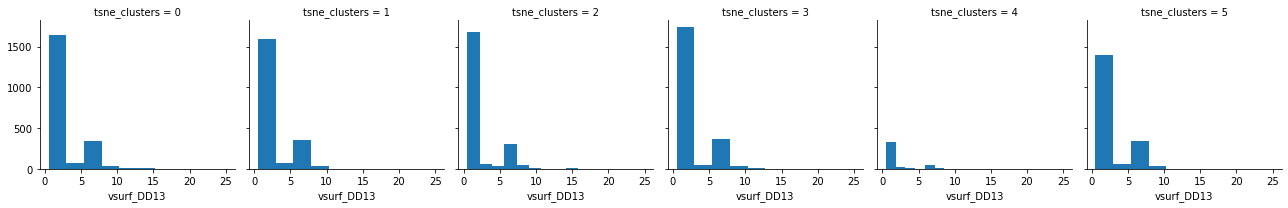

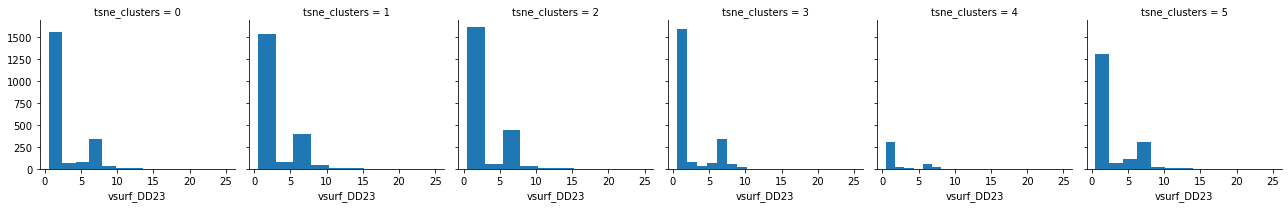

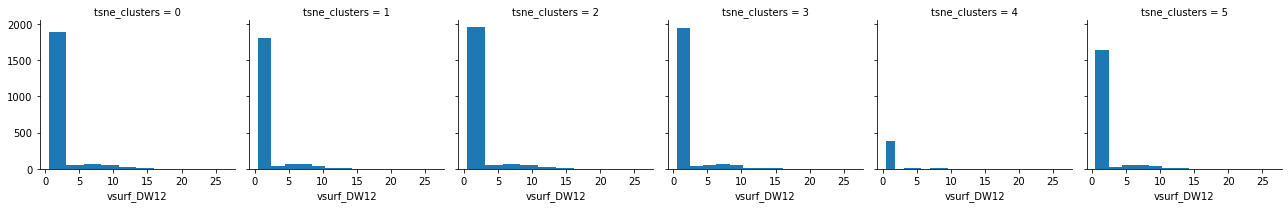

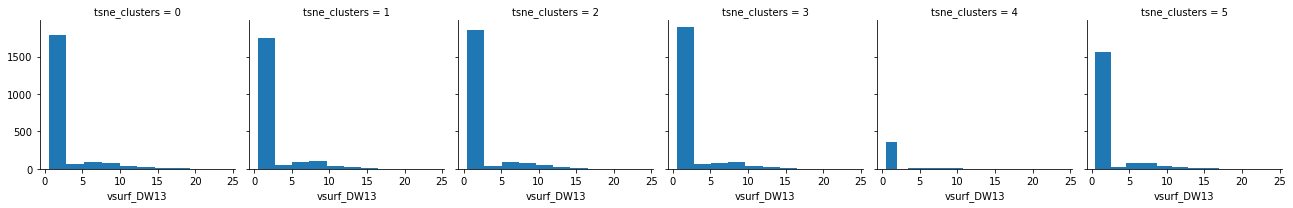

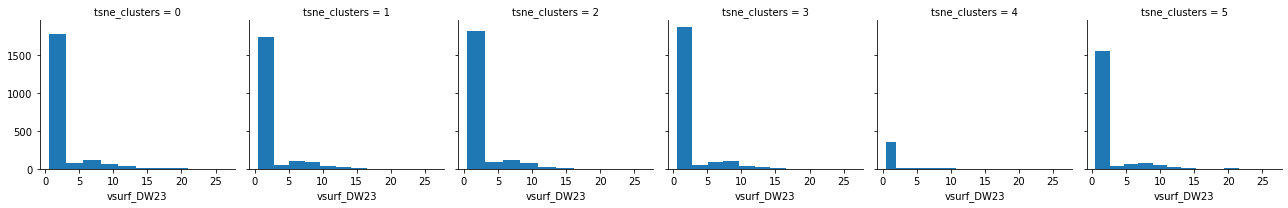

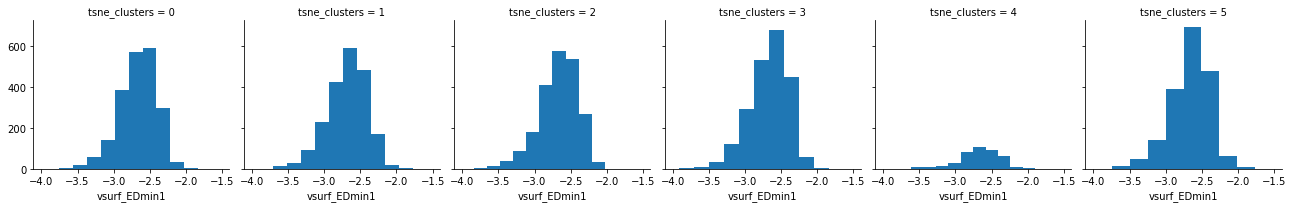

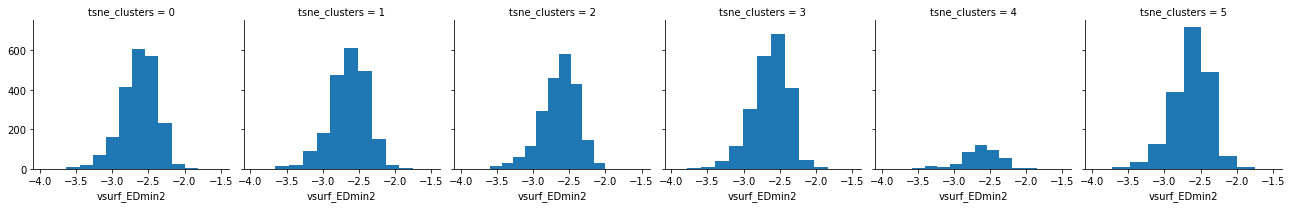

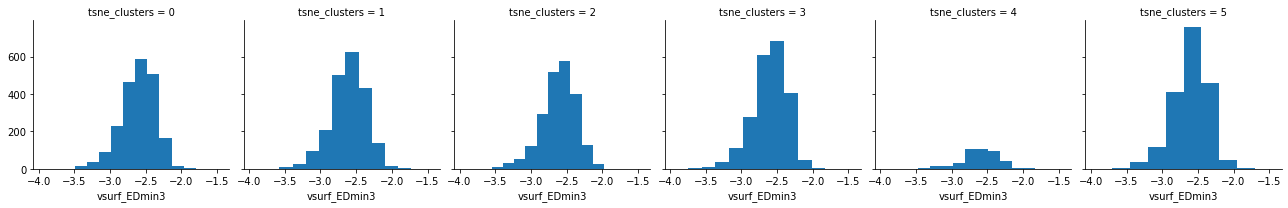

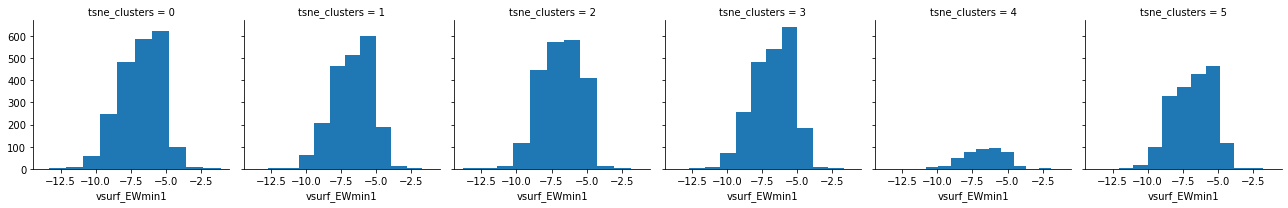

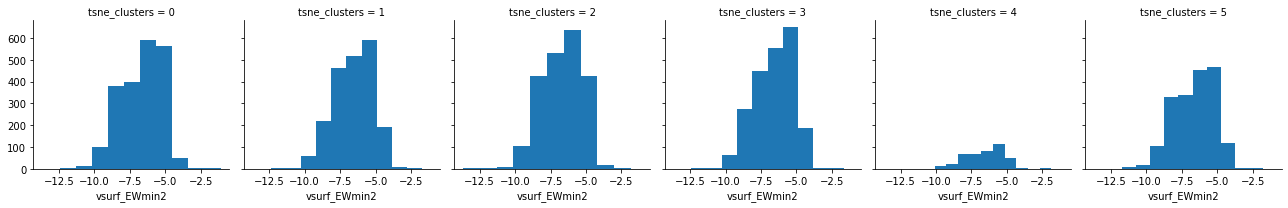

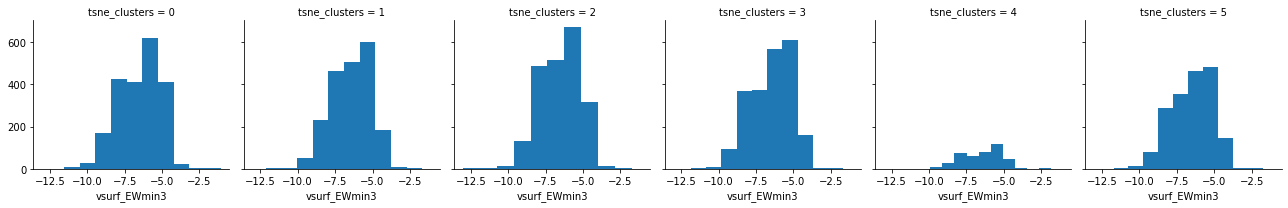

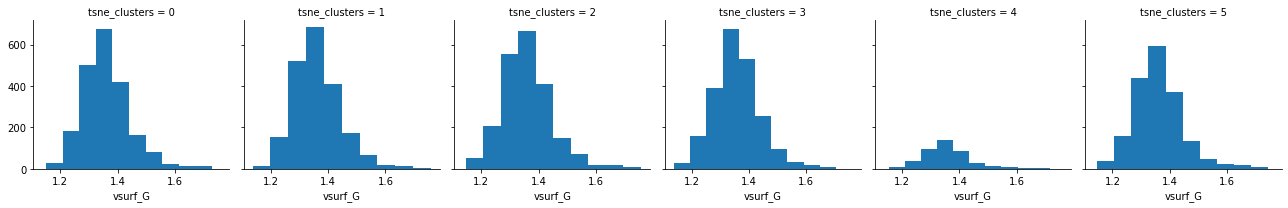

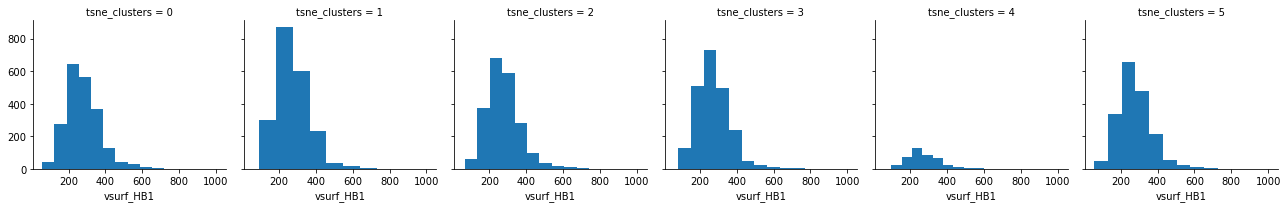

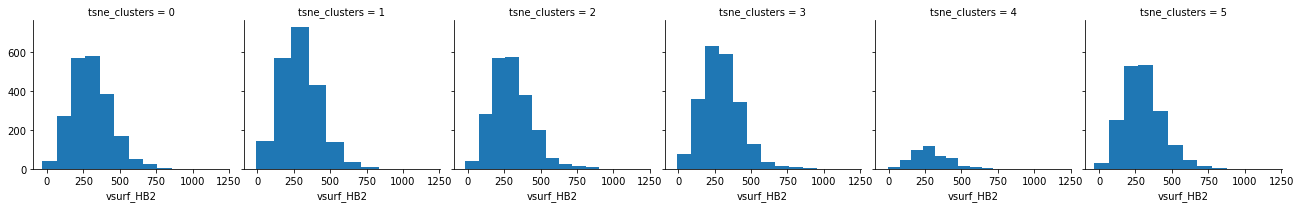

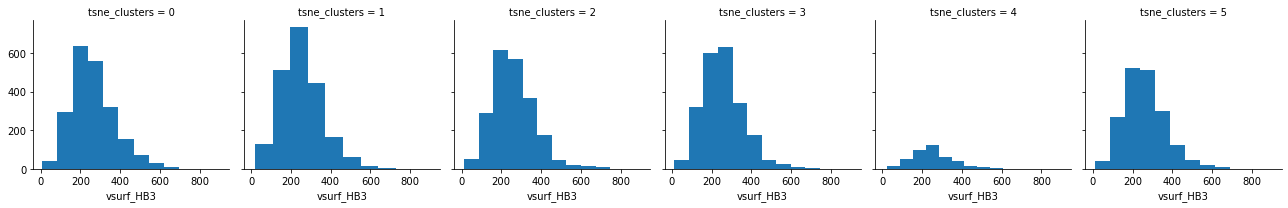

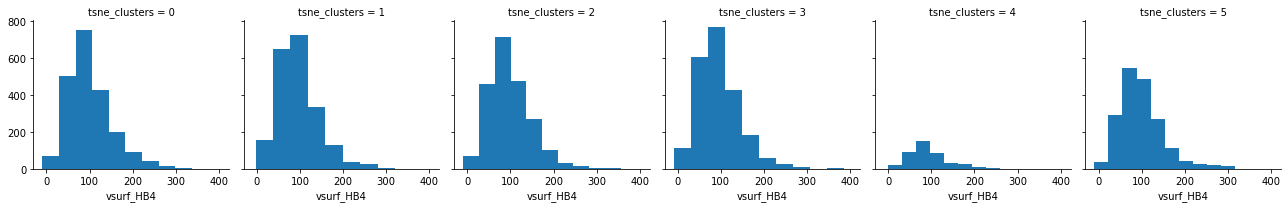

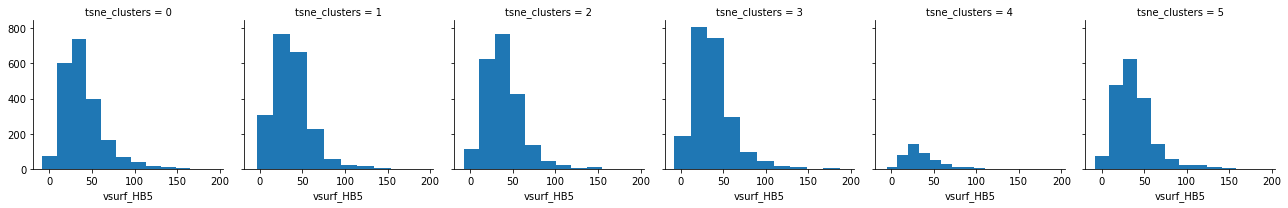

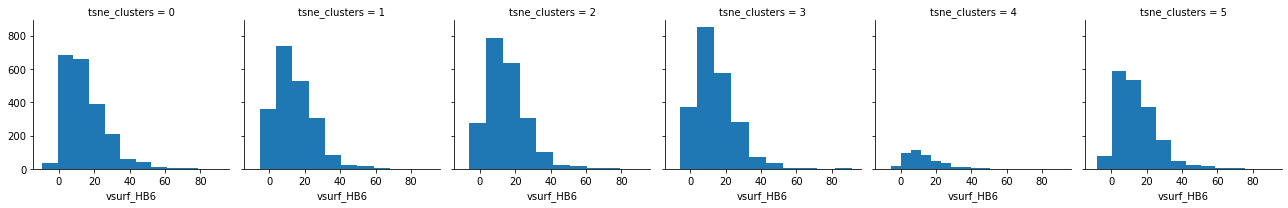

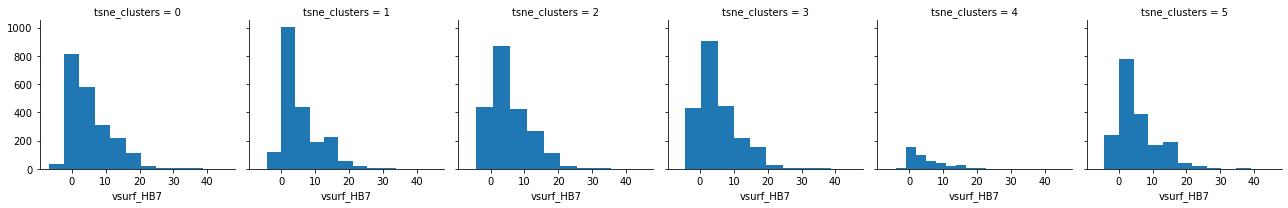

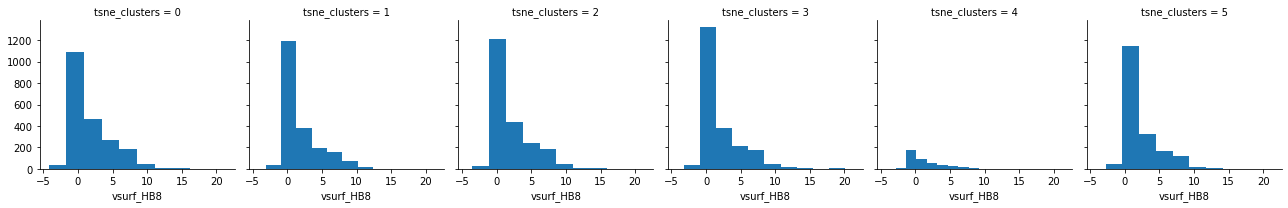

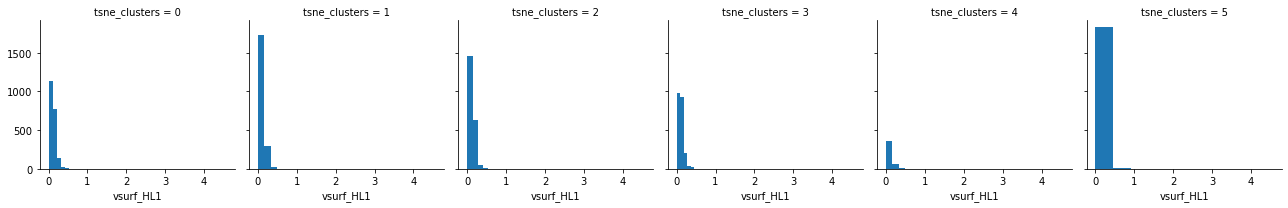

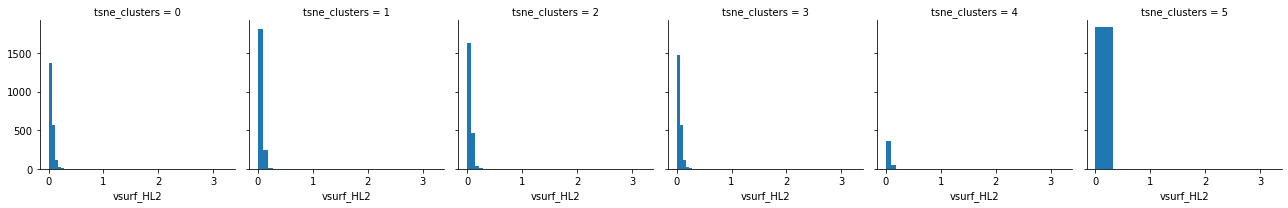

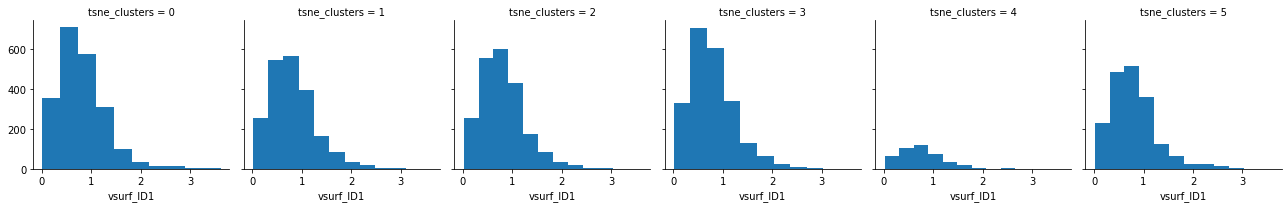

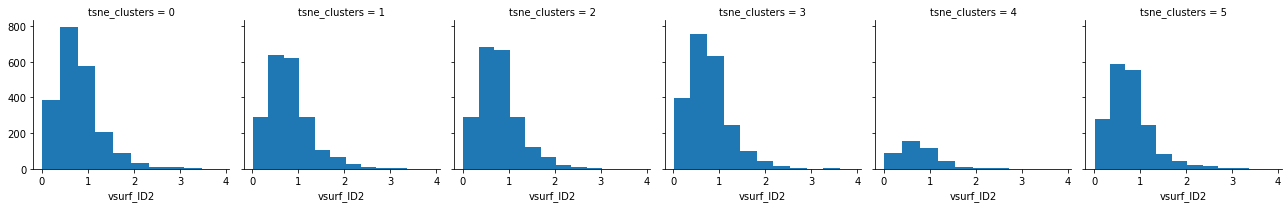

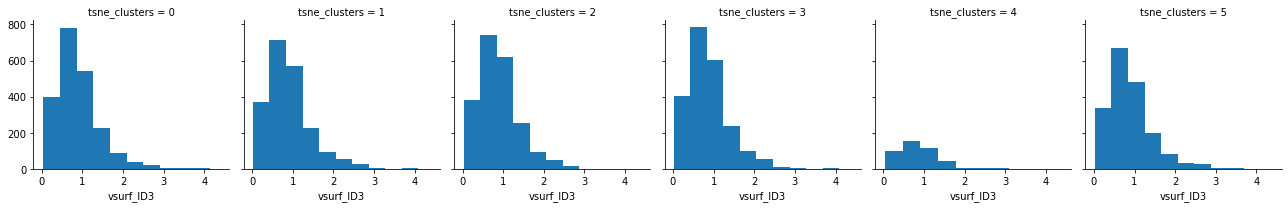

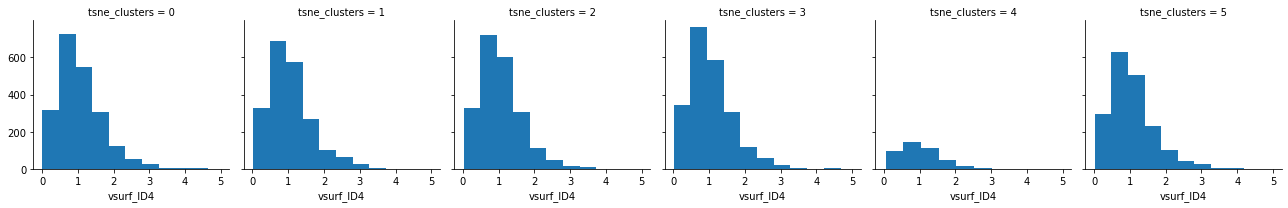

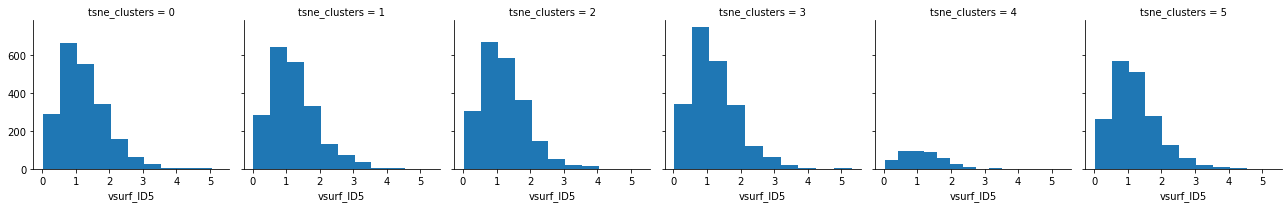

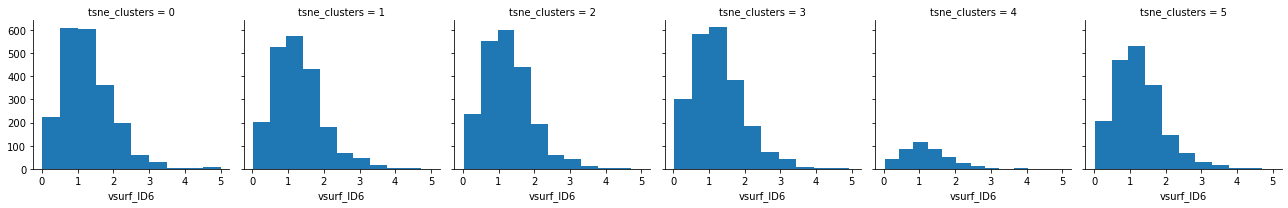

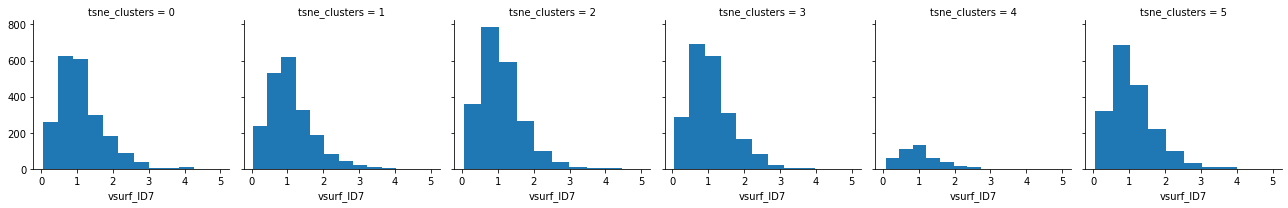

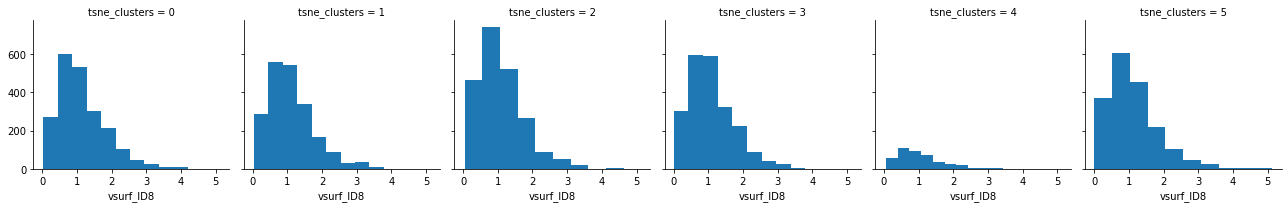

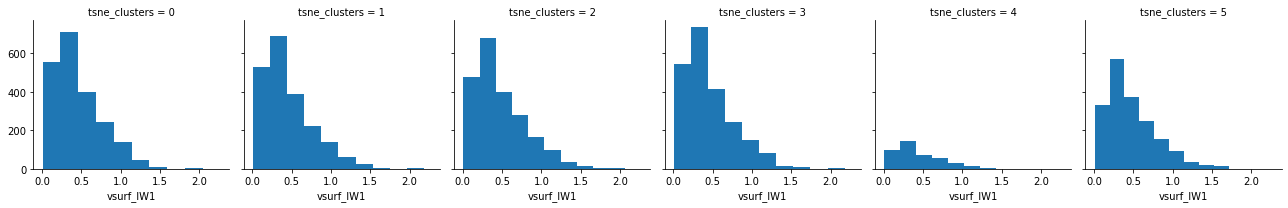

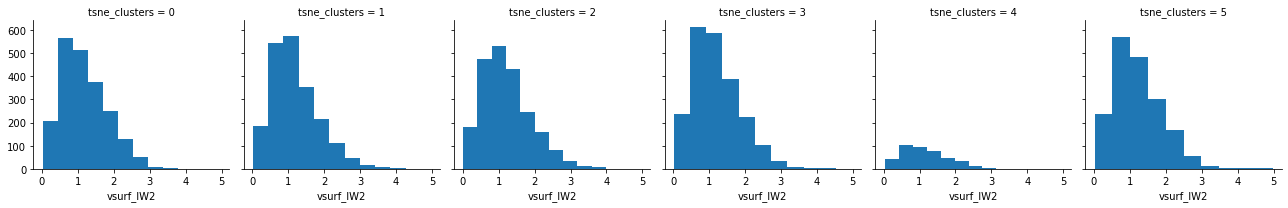

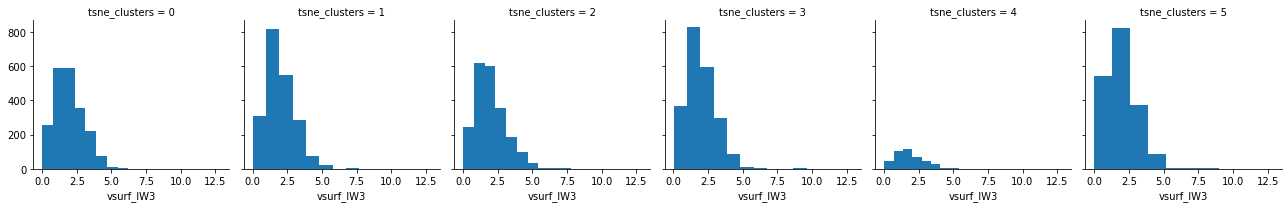

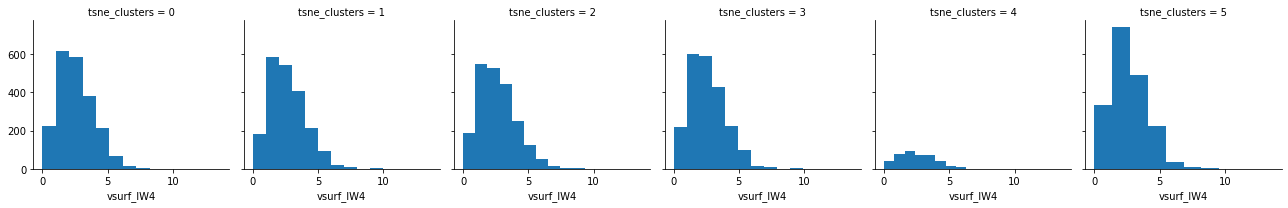

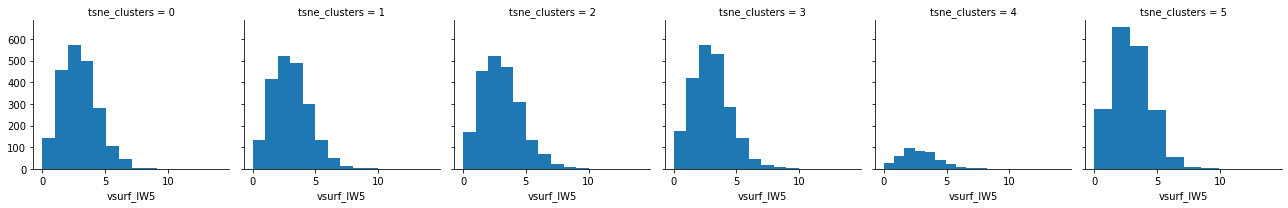

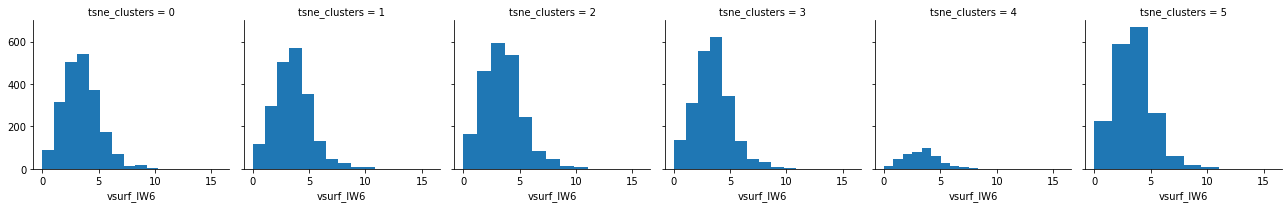

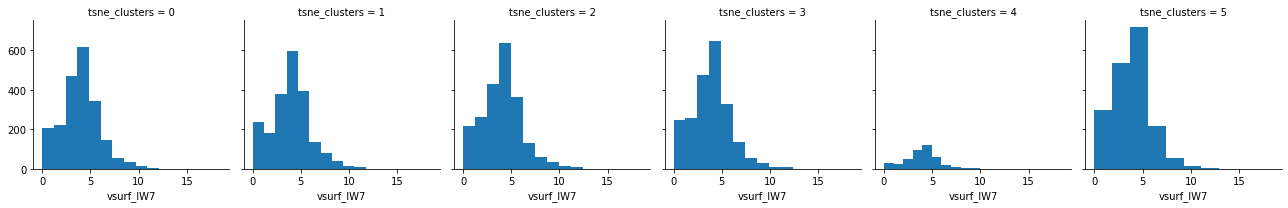

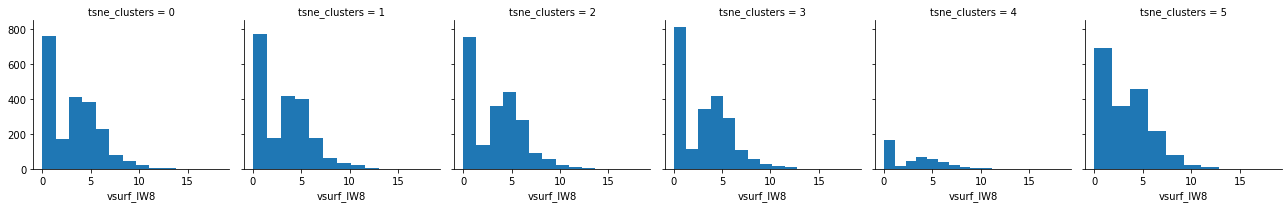

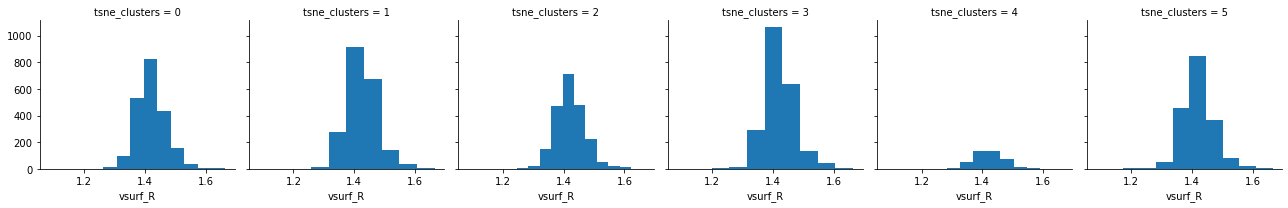

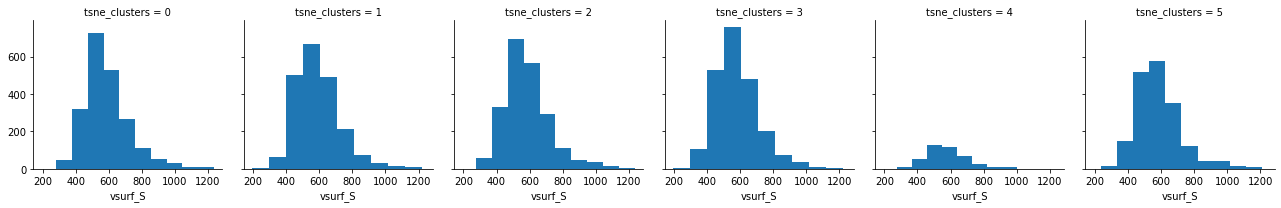

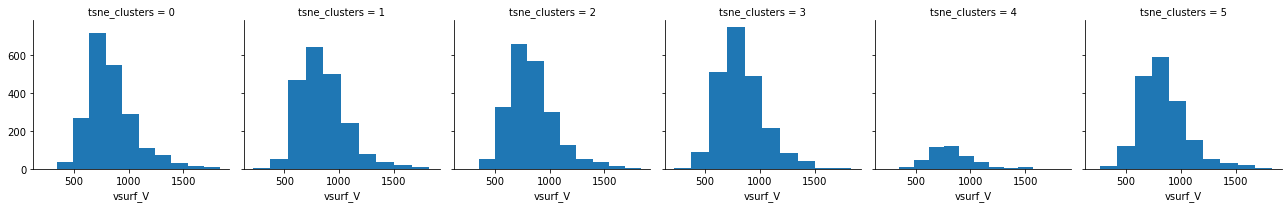

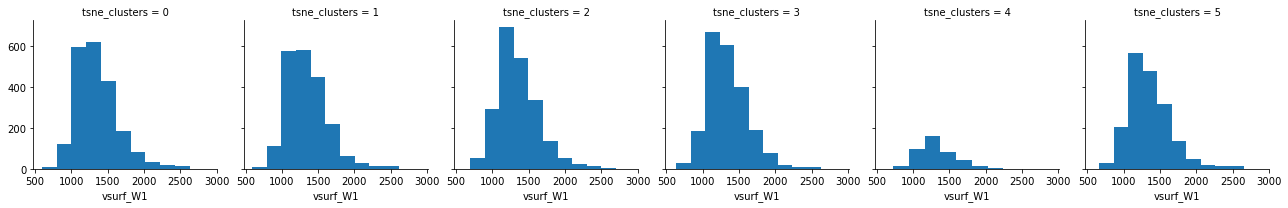

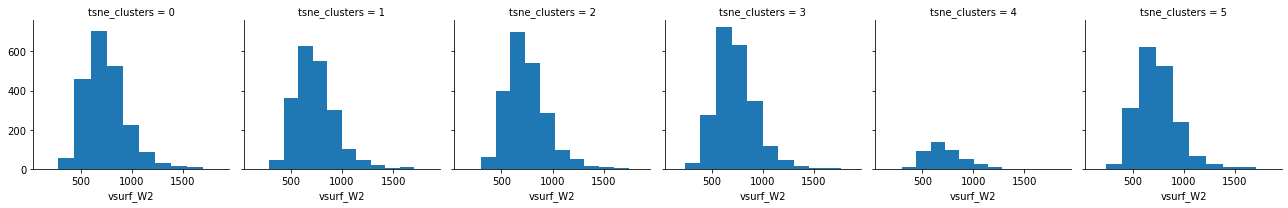

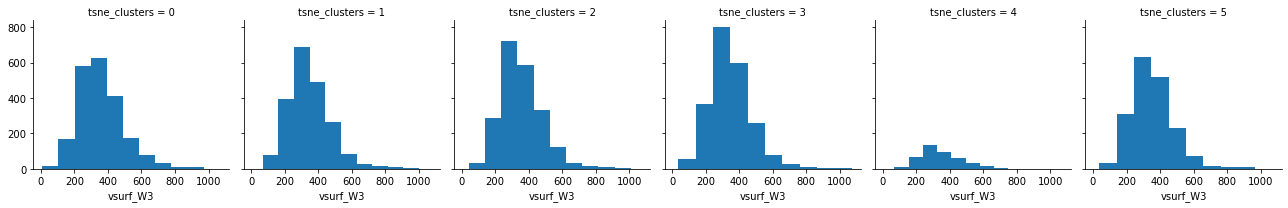

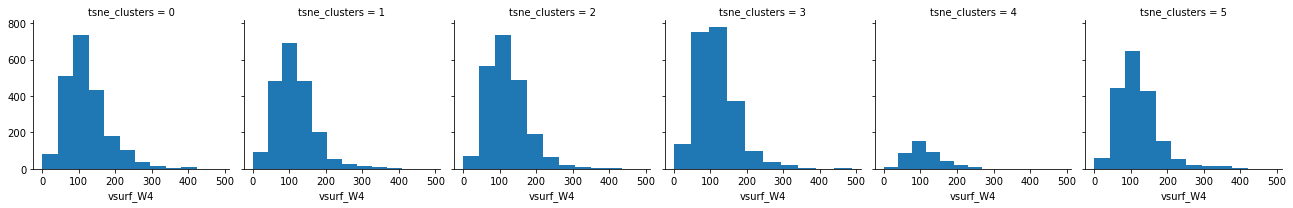

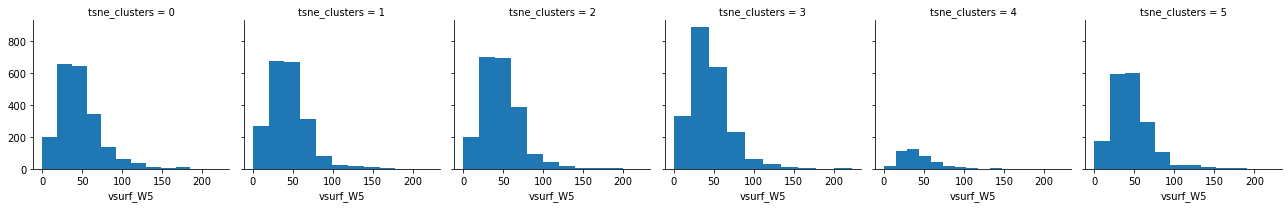

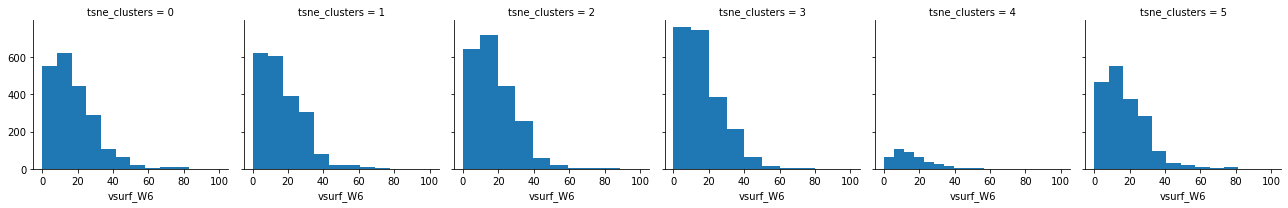

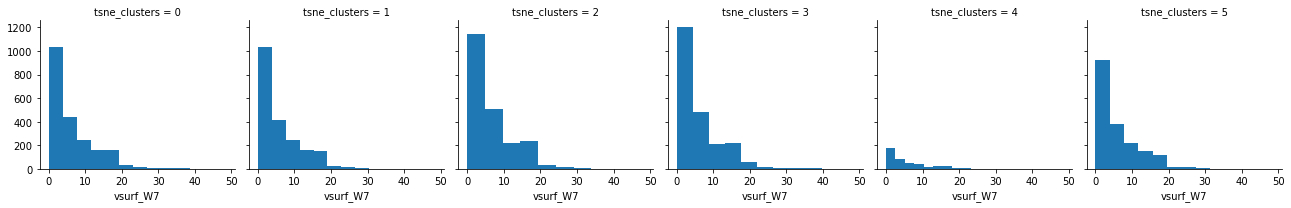

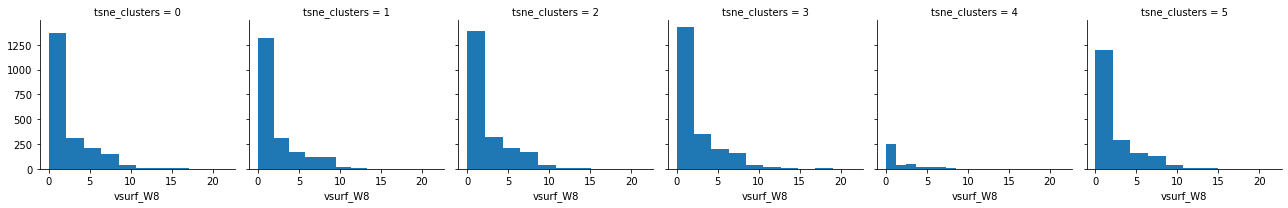

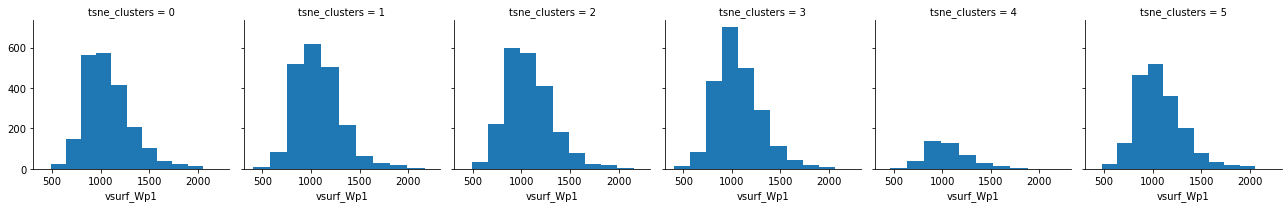

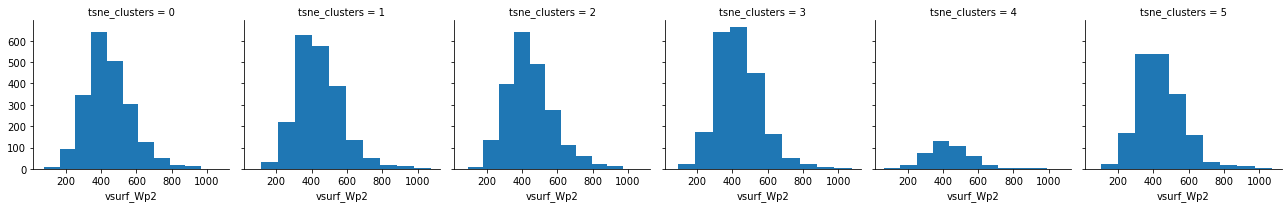

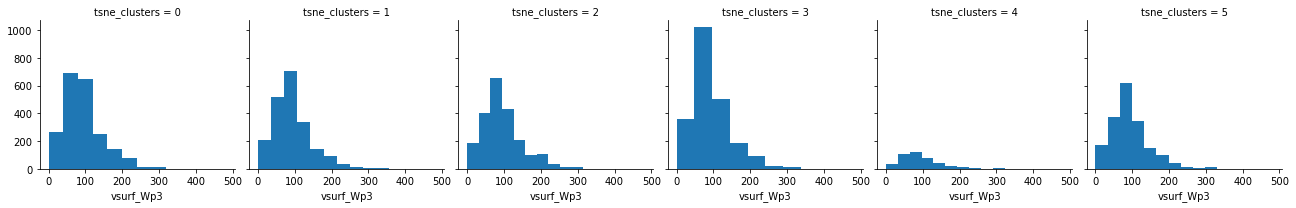

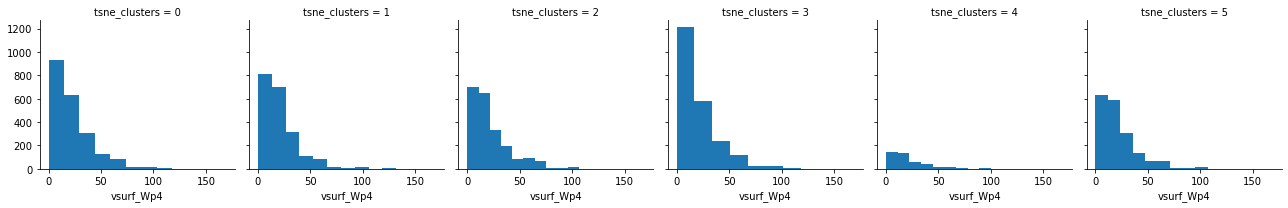

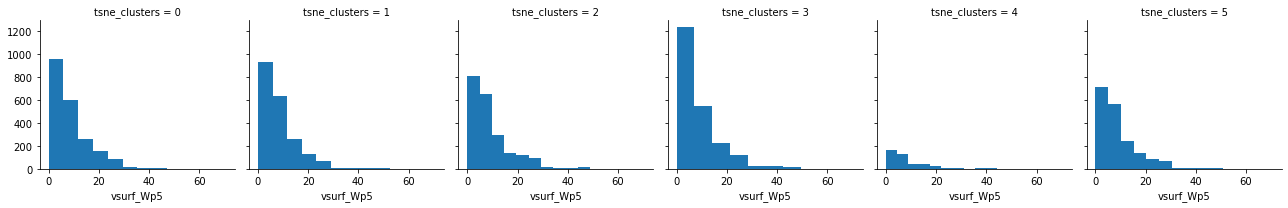

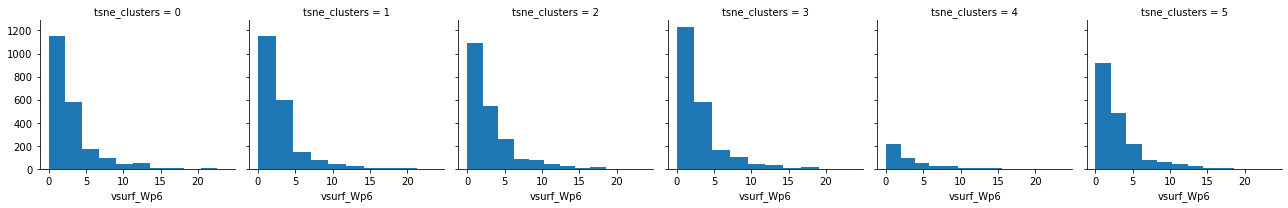

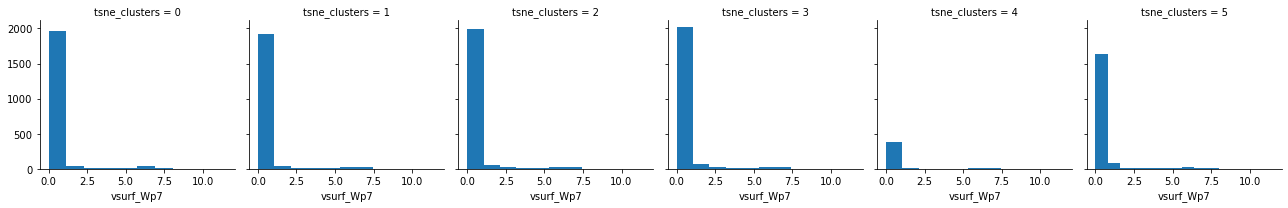

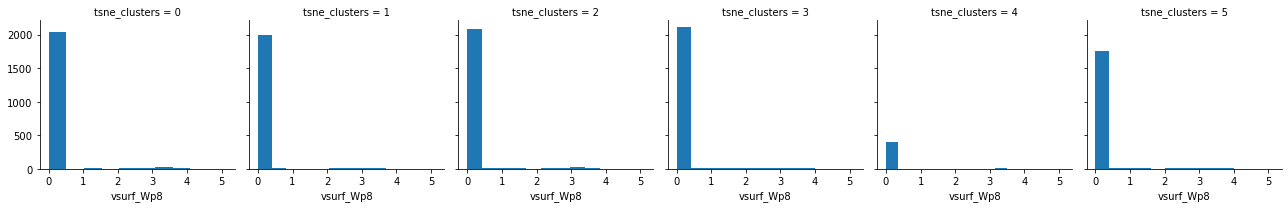

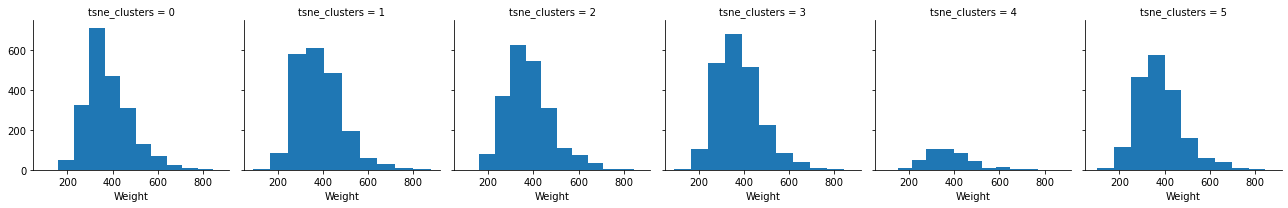

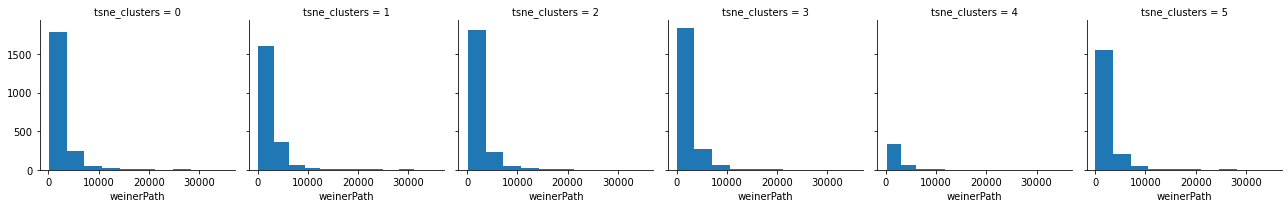

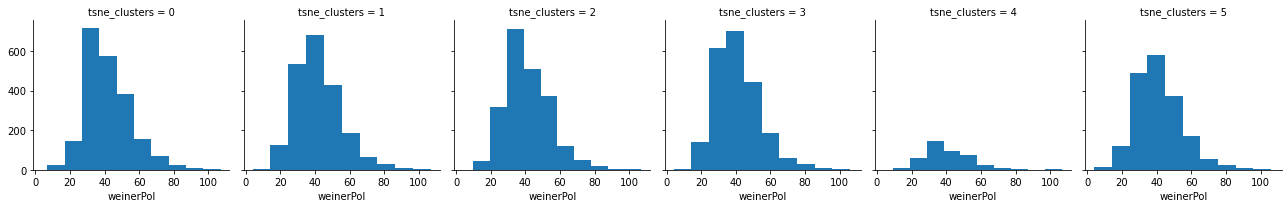

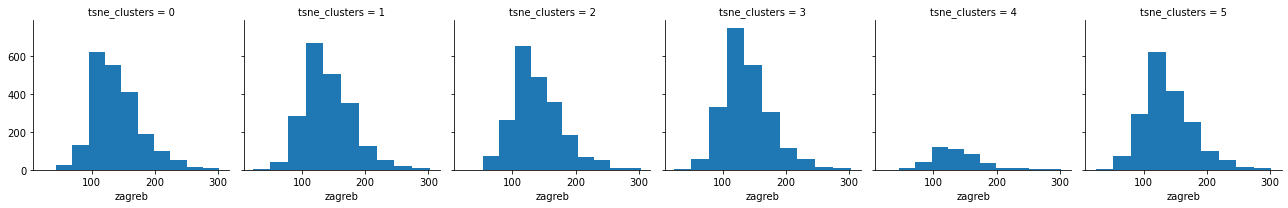

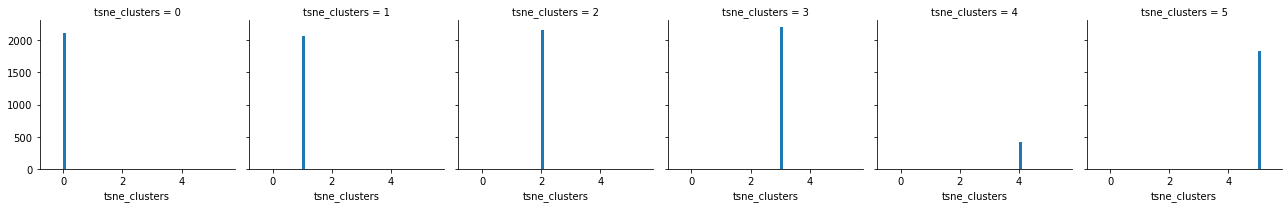

In [61]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)

Text(0.5, 1.0, '(tSNE) Clusters by AM1_dipole and AM1_E')

<Figure size 720x360 with 0 Axes>

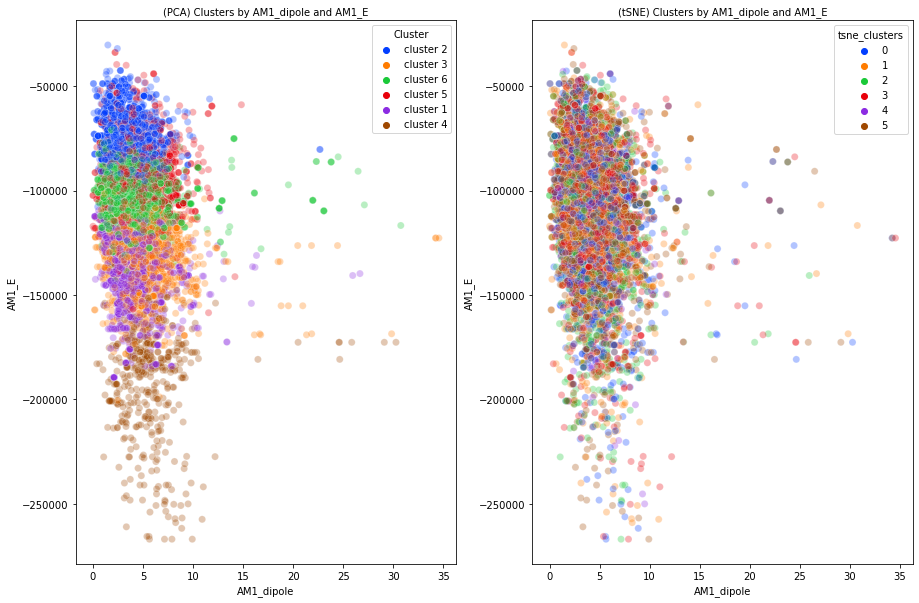

In [62]:
# Evaluation of clusters from a bivariate perspective

plt.figure(figsize=(10,5))
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
sns.scatterplot(data=molecule_pca_kmeans, x='AM1_dipole', y='AM1_E', 
                hue=molecule_pca_kmeans['Cluster'], s=50, alpha=0.3, palette='bright', ax=ax1).set_title(
    '(PCA) Clusters by AM1_dipole and AM1_E',fontsize=10)
sns.scatterplot(data=cluster_tsne_profile, x='AM1_dipole', y='AM1_E', 
                hue='tsne_clusters', s=50, alpha=0.3, palette='bright', ax=ax2).set_title('(tSNE) Clusters by AM1_dipole and AM1_E', fontsize=10)

### DBSCAN Clustering

Selecting optimal value for eps and min_samples
Good values of eps are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.

min_samples must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters.

In [148]:
dbscan = DBSCAN(eps=1.5, min_samples=20)
dbscan_labels = dbscan.fit_predict(scores_pca)
X_dbscan = df_stdmolecule.copy()
X_dbscan["cluster"] = dbscan_labels
X_dbscan["cluster"].unique()

array([ 0, -1,  1,  6,  2,  5,  3,  4], dtype=int64)

From the result of the DBSCAN algorithm with eps and min_samples tuning of 1.5 and 20 respectively, there are 8 unique clusters in the dataset

In [149]:
X_dbscan['cluster'].value_counts()

 0    10241
-1      726
 1       57
 2       45
 5       21
 3       16
 4       13
 6       13
Name: cluster, dtype: int64

0.08167399399245734

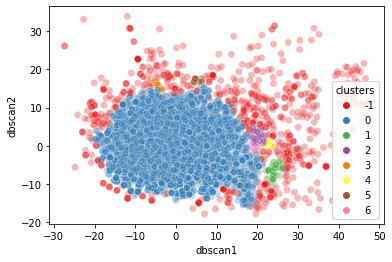

In [150]:
pca = PCA(n_components=2, whiten=False, random_state=42)
X_dbscan_pca = pca.fit_transform(X_dbscan)
X_dbscan_pca = pd.DataFrame(data=X_dbscan_pca, columns=["dbscan1", "dbscan2"])
X_dbscan_pca["clusters"] = dbscan_labels
sns_plot = sns.scatterplot(x="dbscan1", y="dbscan2", hue="clusters", data=X_dbscan_pca, palette='Set1', s=50, alpha=0.3)

score


Figure: Molecule descriptor clusters by DBSCAN on PCA dataset

### KMedoids Clustering - PAM (Partitioning Around Medoids)

K-medoids will be calculated using the euclidean distance metrics on the transformed and scaled data set

In [151]:
centers = [[4, 5], [9, 10], [13, 14]]

X = scores_pca

In [152]:
mhv = pdist(scores_pca, 'euclidean',)
mh = squareform(mhv,force='tomatrix')
print(f"Data shape: {scores_pca.shape}\nMatrix shape: {mh.shape}")
pd.DataFrame(mh[:3,:3])

Data shape: (11132, 2)
Matrix shape: (11132, 11132)


0          1          2
0   0.000000  17.362427  17.591557
1  17.362427   0.000000   0.388676
2  17.591557   0.388676   0.000000

Wall time: 8min 21s
Wall time: 33min 54s
Compiler : 208 ms
Parser   : 696 ms
Wall time: 40min 24s
Compiler : 128 ms
Parser   : 822 ms
Wall time: 3h 57min 24s
Parser   : 248 ms
Wall time: 3h 23min 6s
Parser   : 362 ms
Wall time: 2h 3min 3s
Parser   : 263 ms
Wall time: 8h 4min 45s
Compiler : 481 ms
Parser   : 684 ms


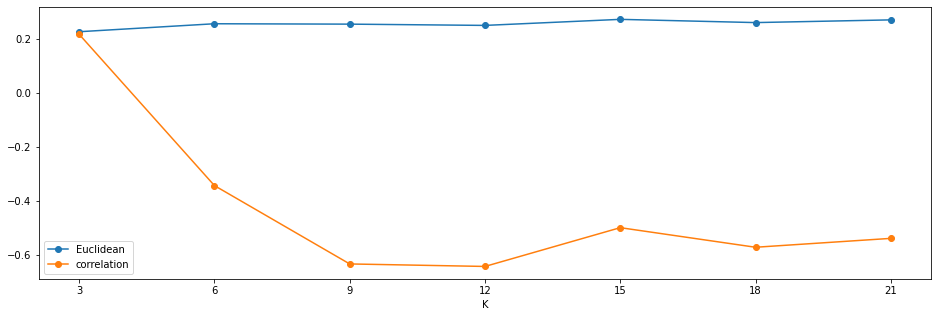

In [49]:
# find k clusters
results_kmedoids = dict()

k_cand = [3,6,9,12,15,18,21]

for k in k_cand:
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,1000,size=k)
    kmedoids_instance = kmedoids(mh,
                                 initial_medoids,
                                 data_type='distance_matrix')    

    # run cluster analysis and obtain results
    %time kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    score1 = silhouette_score(mh, cluster_array, metric='euclidean')
    score2 = silhouette_score(scores_pca, cluster_array,metric='correlation')
    
    # store
    results_kmedoids[k] = {'k':cluster_array,'s1':score1,'s2':score2}

fig,axs = plt.subplots(1,1,figsize=(16,5))
axs.plot([i for i in results_kmedoids.keys()],[i['s1'] for i in results_kmedoids.values()],'o-',label='Euclidean')
axs.plot([i for i in results_kmedoids.keys()],[i['s2'] for i in results_kmedoids.values()],'o-',label='correlation')
axs.set_xticks(k_cand)
axs.set_xlabel('K')
axs.legend();

### Clarans

In [5]:
molecule_clarans,c = molecule.drop("ID", axis=1), molecule[["ID"]].values.flatten()

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(molecule_clarans,c)
scaled_data = scaler.transform(molecule_clarans)
scaled_data = pd.DataFrame(scaled_data,index=molecule.index, columns= molecule.columns)
scaled_data[:2]

AM1_dipole     AM1_E  AM1_Eele    AM1_HF  AM1_HOMO    AM1_IP  AM1_LUMO  \
0    0.038169  0.834244   0.87883  0.306159  0.795025  0.204975  0.670648   
1    0.096231  0.628465   0.73521  0.244627  0.705486  0.294514  0.712775   

       apol       ASA      ASA+  ...  vsurf_Wp3  vsurf_Wp4  vsurf_Wp5  \
0  0.266668  0.216143  0.290961  ...   0.185310   0.095414   0.097345   
1  0.427113  0.449527  0.601068  ...   0.461718   0.351331   0.311504   

   vsurf_Wp6  vsurf_Wp7  vsurf_Wp8    Weight  weinerPath  weinerPol    zagreb  
0   0.084211    0.00000        0.0  0.227897    0.023708   0.271845  0.290780  
1   0.242105    0.01087        0.0  0.389849    0.075431   0.398058  0.439716  

[2 rows x 340 columns]

In [25]:
df_stdmolecule_list = df_stdmolecule.to_numpy().tolist()
len(df_stdmolecule_list)

clarans_instance = clarans(data=df_stdmolecule_list,
                            number_clusters=6,
                            numlocal=1, 
                            maxneighbor=3)

In [26]:
# implement clarans
clarans_instance = clarans(molecule_clarans.to_numpy().tolist(), 5, 2, 4);
%time clarans_instance.process()

Wall time: 21min 31s


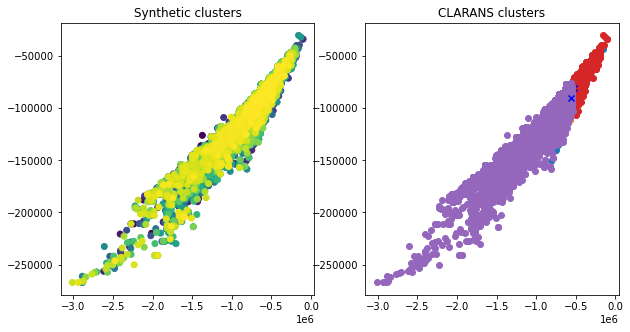

In [33]:
clusters = clarans_instance.get_clusters()
medoids = clarans_instance.get_medoids()

fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(molecule_clarans.iloc[:,2],molecule_clarans.iloc[:,1],c=c)
axs[0].set_title('Synthetic clusters')
axs[1].set_title('CLARANS clusters')
for c_,m in zip(clusters,medoids):
    axs[1].scatter(molecule_clarans.iloc[c_,2],molecule_clarans.iloc[c_,1])
    axs[1].scatter(molecule_clarans.iloc[m,2],molecule_clarans.iloc[m,1],marker='x',c='blue',label='medoids')

Figure: Molecule descriptor clusters by CLARANS

### Agglomerative Hierarchical Clustering with Gower

In [30]:
# create list of cat_feature indicator
cat = [True if x in df_stdmolecule else False for x in df_stdmolecule.columns]

%time gd = gower.gower_matrix(df_stdmolecule, cat_features=cat)

Wall time: 7min 29s


In [34]:
print(f"Data shape: {df_stdmolecule.shape}\nMatrix shape: {gd.shape}")
pd.DataFrame(gd[:3,:3])

Data shape: (11132, 340)
Matrix shape: (11132, 11132)


0         1         2
0  0.000000  0.908824  0.902941
1  0.908824  0.000000  0.458824
2  0.902941  0.458824  0.000000

In [35]:
gdv = squareform(gd,force='tovector')

# output matrix has format [idx1, idx2, dist, sample_count]
Z = linkage(gdv,method='complete')
Z_df = pd.DataFrame(Z,columns=['id1','id2','dist','n'])
Z_df[:2]

id1      id2  dist    n
0   299.0   1289.0   0.0  2.0
1  2944.0  11132.0   0.0  3.0

Hierachical clusters were visualized using a scipy.dendogram. Each level and leaf in the dendogram represents a cluster. Clearly displaying the hierarchical nature of agglomerative clustering.

Leaves = 63


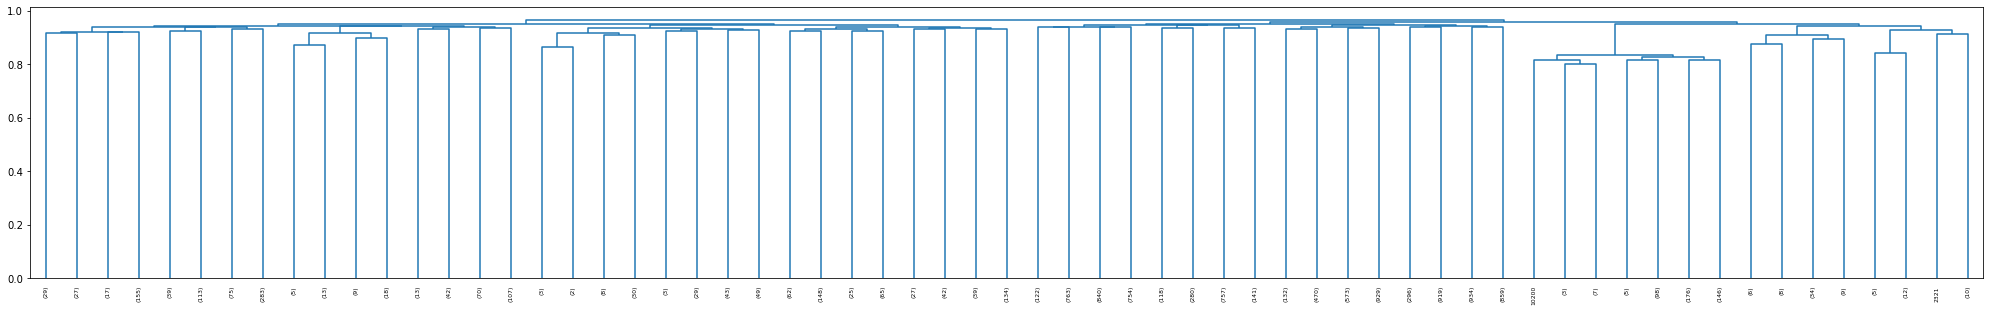

In [36]:
fig,axs = plt.subplots(1,1,figsize=(35,5))
dn = dendrogram(Z, truncate_mode='level',p=5,show_leaf_counts=True,ax=axs);
print(f"Leaves = {len(dn['leaves'])}")

Figure: Hierachical clusters of agglomerative clustering of Molecule descriptors

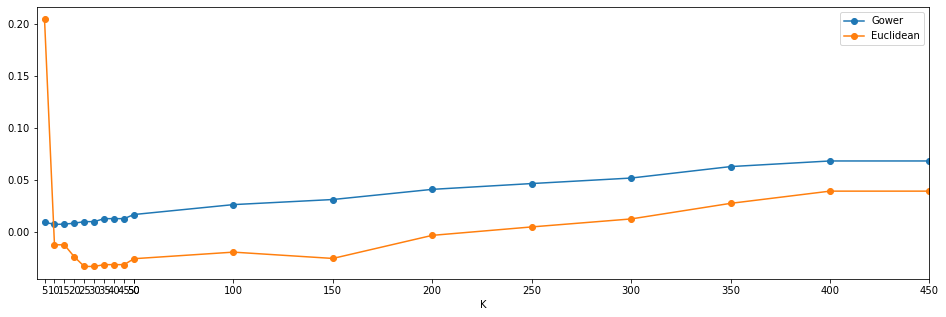

In [37]:
# find k clusters
results = dict()
k_cand = list(np.arange(5,55,5))
k_cand.extend(list(np.arange(50,500,50)))

for k in k_cand:
    cluster_array = fcluster(Z, k, criterion='maxclust')
    score0 = silhouette_score(gd, cluster_array, metric='precomputed')
    score1 = silhouette_score(df_stdmolecule, cluster_array,metric='euclidean')
    results[k] = {'k':cluster_array,'s0':score0,'s1':score1}
    
fig,axs = plt.subplots(1,1,figsize=(16,5))
axs.plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Gower')
axs.plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs.set_xlim(1,340)
axs.set_xticks(k_cand)
axs.set_xlabel('K')
axs.legend();

Figure: Silhouette scores and plots of Molecule descriptors Gower

Visualising the silhouette scores and plots above shows an interesting result. This new round of clusters appears to have an optimal k of around 5, 10, and 35?. Silhouette scores are shown to improve once k exceeed 100. However, the correlation scores are flat and this is again indicative of small unique groups.